In [ ]:
# Running at commit 30e3836987dcf62c37fc47f0115dc614710fe51b

In [1]:
%reload_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import os
import numpy

from nplinker import nplinker
from nplinker import logconfig
logconfig.LogConfig.setLogLevel('DEBUG') # 'INFO' is a lot less spammy
from nplinker.scoring import IOKR


['/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/cdk_pywrapper']
Server process already running: True


In [3]:
# load gross data

In [11]:
npl = nplinker.NPLinker('/home/grimur/iokr_verify_data/gross.toml')

09:47:58 [DEBUG] config.py:72, Parsing default config file: /home/grimur/.config/nplinker/nplinker.toml
09:47:58 [DEBUG] config.py:75, Loading user config /home/grimur/iokr_verify_data/gross.toml
09:47:58 [INFO] config.py:107, Loading from local data in directory /home/grimur/iokr_verify_data/gross
09:47:58 [DEBUG] loader.py:115, DatasetLoader(/home/grimur/iokr_verify_data/gross, , False)
09:47:58 [DEBUG] nplinker.py:119, Enabled scoring method: metcalf
09:47:58 [DEBUG] nplinker.py:119, Enabled scoring method: testscore
09:47:58 [DEBUG] nplinker.py:119, Enabled scoring method: rosetta


In [12]:
npl.load_data()

09:47:58 [DEBUG] nplinker.py:240, load_data (normal case, full load, met_only=False)
09:47:58 [WARNING] loader.py:29, WARNING: unable to find extra_nodes_file in path "/home/grimur/iokr_verify_data/gross/quantification_table_reformatted/*.csv"
09:47:58 [WARNING] loader.py:29, WARNING: unable to find metadata_table_file in path "/home/grimur/iokr_verify_data/gross/metadata_table/metadata_table*.txt"
09:47:58 [WARNING] loader.py:29, WARNING: unable to find quantification_table_file in path "/home/grimur/iokr_verify_data/gross/quantification_table/quantification_table*.csv"
09:47:58 [INFO] loader.py:360, Loaded global strain IDs (0 total)
09:47:58 [INFO] loader.py:368, Loaded dataset strain IDs (8 total)
09:48:00 [INFO] metabolomics.py:612, 9593 molecules parsed from MGF file
09:48:01 [DEBUG] metabolomics.py:327, loading edges file: /home/grimur/iokr_verify_data/gross/networkedges_selfloop/dfbc8c31584f4ae88fb1641936c9d777..selfloop [9593 spectra from MGF]
/home/grimur/iokr_verify_data/gro

True

In [10]:
from nplinker.parsers.kcb import KCBParser

In [11]:
kkb_bgc_hits = {}
for bgc in npl.bgcs:
    kcb_filename = KCBParser.get_kcb_filename_from_bgc(bgc)
    kcb_parser = KCBParser(kcb_filename)
    hits = []
    for mibig_id, hit in kcb_parser.hits.items():
        score = numpy.sum([x['blast_score'] for x in hit['individual_hits']])
        hits.append((mibig_id, score))
    if len(hits) > 0:
        kkb_bgc_hits[bgc] = hits

In [12]:
print(len(kkb_bgc_hits))

99


In [13]:
# These are the links from the paired data platform - so, _verified_ links!!!

In [14]:
established_links = [
    ('GCF_001625105', 'BGC0000632', 603),  # brasilicardin A
    ('GCF_001625105', 'BGC0000632', 97),  # brasilicardin C
    ('GCF_001625105', 'BGC0001381', 116),  # brasilinolide A, nocardia terpenica
    ('GCF_000012445', 'BGC0001842', 3),  # pseudomonas fluorescens pf0-1
    ('GCF_001562525', 'BGC0000463', 3),  # pseudomonas putida
    # ('', 'BGC0000952', 13),
    ('GCF_002899455', 'BGC0001116', 947),  # Streptomyces virginiae -- only have one streptomyces, so assigning that...
    ('GCF_000012265', 'BGC0000399', 16),  # Pseudomonas protegens
    ('GCF_002899455', 'BGC0000296', 370),  # Streptomyces anulatus -- only have one...
    ('GCF_002899455', 'BGC0001298', 222),  # Streptomyces calvus -- only have one...
]

In [15]:
established_link_objects = []
for bgc, kkb_hits in kkb_bgc_hits.items():
    for strain_id, mibig_id, molfam_id in established_links:
        if strain_id == bgc.strain.id or strain_id in bgc.strain.aliases:
            if mibig_id in [x[0] for x in kkb_hits]:
                for molecular_family in npl.molfams:
                    if molecular_family.family_id == molfam_id:
                        for spectrum in molecular_family.spectra:
                            spectrum_strain_ids = set([x.id for x in spectrum.strains])
                            for x in spectrum.strains:
                                spectrum_strain_ids = spectrum_strain_ids.union(x.aliases)
                            if strain_id not in spectrum_strain_ids:
                                continue
                            print(strain_id, mibig_id, spectrum.spectrum_id)
                            established_link_objects.append((bgc, spectrum))
                        
                """        
                for spectrum in npl.spectra:
                    # TODO: This is the wrong ID!!! Should be spectrum.spectrum_id!!!
                    print(spectrum_id, spectrum.spectrum_id)
                    if spectrum.spectrum_id == spectrum_id:
                        print(strain_id, mibig_id, spectrum_id)
                        p.add((strain_id, mibig_id))
                        q.add(spectrum_id)
                        established_link_objects.append((bgc, spectrum))
"""

GCF_000012265 BGC0000399 9416
GCF_000012265 BGC0000399 9478
GCF_000012265 BGC0000399 9483
GCF_000012265 BGC0000399 9492
GCF_000012265 BGC0000399 9495
GCF_000012265 BGC0000399 9498
GCF_000012265 BGC0000399 9500
GCF_000012265 BGC0000399 9503
GCF_000012265 BGC0000399 9506
GCF_000012265 BGC0000399 9511
GCF_000012265 BGC0000399 9512
GCF_000012265 BGC0000399 9517
GCF_000012265 BGC0000399 9518
GCF_000012265 BGC0000399 9528
GCF_000012265 BGC0000399 9529
GCF_000012265 BGC0000399 9534
GCF_000012265 BGC0000399 9542
GCF_001625105 BGC0001381 7892
GCF_001625105 BGC0001381 8160
GCF_001625105 BGC0001381 8373
GCF_001625105 BGC0001381 8466
GCF_001625105 BGC0001381 8514
GCF_001625105 BGC0001381 8550
GCF_001625105 BGC0001381 8568
GCF_001625105 BGC0001381 8573
GCF_001625105 BGC0001381 8595
GCF_001625105 BGC0001381 8605
GCF_001625105 BGC0001381 8636
GCF_001625105 BGC0001381 8654
GCF_001625105 BGC0001381 8660
GCF_001625105 BGC0001381 8694
GCF_001625105 BGC0001381 8700
GCF_001625105 BGC0001381 8743
GCF_001625

In [16]:
len(established_link_objects)

471

In [147]:
print('total bgc with associated structure: {}'.format(len(set(bgc_smiles_index))))
print('total bgcs: {}'.format(len(npl.bgcs)))
print('total spectra: {}'.format(len(npl.spectra)))

total bgc with associated structure: 83
total bgcs: 131
total spectra: 9593


In [17]:
import csv
bgc_structures = {}
with open('/home/grimur/iokr/data/mibig/compunds_structures_2.0.csv') as f:
    r = csv.reader(f)
    for line in r:
        bgc_id, compound_name, smiles, database_ids = line
        if not bgc_id.startswith('BGC'):
            continue
        if bgc_id in bgc_structures:
            bgc_structures[bgc_id].append(smiles)
        else:
            bgc_structures[bgc_id] = [smiles]

In [18]:
scores_thresh = 10000
bgc_smiles = []
bgc_smiles_index = []
bgc_smiles_scores = []

bgc_smiles_lookup = {}

#debug with only members of known links
#bgc_list = [x[0] for x in established_link_objects]
bgc_list = npl.bgcs
for bgc_idx, bgc in enumerate(bgc_list):
    current_bgc_smiles = set([])
    if bgc in kkb_bgc_hits:
        kkb_bgc = kkb_bgc_hits[bgc][0][0]
        smiles_list = bgc_structures[kkb_bgc]
        for smiles in smiles_list:
            if smiles != '':
                current_bgc_smiles.add(smiles)
        """
        for kkb_bgc, score in kkb_bgc_hits[bgc]:
            if kkb_bgc in bgc_structures:
                smiles_list = bgc_structures[kkb_bgc]
                bgc_smiles_scores.append(score)
                if score < scores_thresh:
                    continue
                for smiles in smiles_list:
                    if smiles != '':
                        current_bgc_smiles.add(smiles)"""
                        
    bgc_smiles_lookup[bgc] = current_bgc_smiles
                
    for smiles in current_bgc_smiles:
        bgc_smiles.append(smiles)
        bgc_smiles_index.append(bgc_idx)

In [19]:
spectra_in_molfam = set([])
for molfam in npl.molfams:
    if molfam.family_id != -1:
        spectra_in_molfam = spectra_in_molfam.union(molfam.spectra)



In [20]:
reverse_smiles_lookup = {}
for smiles, bgc_idx in zip(bgc_smiles, bgc_smiles_index):
    if smiles not in reverse_smiles_lookup:
        reverse_smiles_lookup[smiles] = []
    reverse_smiles_lookup[smiles].append(bgc_idx)

In [21]:
smiles_list = list(reverse_smiles_lookup.keys())

In [23]:
from nplinker.scoring.iokr import nplinker_iokr

In [24]:
iokr_server = nplinker_iokr.get_iokr_server()


15:09:00 [DEBUG] nplinker_iokr.py:118, Init IOKR data server
15:09:00 [DEBUG] iokrdata.py:202, IOKRDataServer __init__
15:09:00 [DEBUG] iokrdata.py:38, GNPS __init__
15:09:01 [DEBUG] iokrdata.py:210, No kernel specified. Please initialise manually.
15:09:01 [DEBUG] nplinker_iokr.py:123, Init kernel values
15:09:03 [DEBUG] nplinker_iokr.py:128, Load MS files
15:09:03 [DEBUG] iokrdata.py:226, IOKRDataServer load_ms_files
15:09:03 [DEBUG] iokrdata.py:228, Loading cached MS data
15:09:05 [DEBUG] iokrdata.py:232, Done in 1.173903s
15:09:05 [DEBUG] nplinker_iokr.py:151, Configure kernel
15:09:05 [DEBUG] nplinker_iokr.py:156, Set fingerprint
15:09:05 [DEBUG] iokrdata.py:327, IOKRDataServer set_fingerprint
15:09:05 [DEBUG] iokrdata.py:335, fpfile is "/home/grimur/git/nplinker/nplinker/src/nplinker/scoring/iokr/data/fp_None_gnps.bin.npy"
15:09:05 [DEBUG] iokrdata.py:337, Loading GNPS fingerprints from file
15:09:05 [DEBUG] iokrdata.py:69, GNPS set_fingerprint_from_file
15:09:06 [DEBUG] nplinker

In [25]:
from nplinker.scoring.iokr.spectrum import MSSpectrum

In [26]:
# Debug with only members of known links
# spectra_list = [x[1] for x in established_link_objects]
spectra_list = npl.spectra
spl = [MSSpectrum(spec=x) for x in spectra_list]

In [27]:
# first cached results

In [28]:
rank = iokr_server.score_smiles(spl, smiles_list)

15:14:10 [DEBUG] nplinker_iokr.py:39, cache miss
15:14:10 [DEBUG] nplinker_iokr.py:40, Calculate fingerprints for candidate set
15:14:10 [DEBUG] nplinker_iokr.py:44, done 0/96
15:14:11 [DEBUG] nplinker_iokr.py:44, done 1/96
15:14:12 [DEBUG] nplinker_iokr.py:44, done 2/96
15:14:12 [DEBUG] nplinker_iokr.py:44, done 3/96
15:14:12 [DEBUG] nplinker_iokr.py:44, done 4/96
15:14:13 [DEBUG] nplinker_iokr.py:44, done 5/96
15:14:13 [DEBUG] nplinker_iokr.py:44, done 6/96
15:14:14 [DEBUG] nplinker_iokr.py:44, done 7/96
15:14:14 [DEBUG] nplinker_iokr.py:44, done 8/96
15:14:15 [DEBUG] nplinker_iokr.py:44, done 9/96
15:14:15 [DEBUG] nplinker_iokr.py:44, done 10/96
15:14:15 [DEBUG] nplinker_iokr.py:44, done 11/96
15:14:16 [DEBUG] nplinker_iokr.py:44, done 12/96
15:14:16 [DEBUG] nplinker_iokr.py:44, done 13/96
15:14:16 [DEBUG] nplinker_iokr.py:44, done 14/96
15:14:17 [DEBUG] nplinker_iokr.py:44, done 15/96
15:14:17 [DEBUG] nplinker_iokr.py:44, done 16/96
15:14:17 [DEBUG] nplinker_iokr.py:44, done 17/96


15:16:39 [DEBUG] nplinker_iokr.py:64, done (0.9774446487426758)
15:16:39 [DEBUG] nplinker_iokr.py:65, project
15:16:39 [DEBUG] nplinker_iokr.py:69, done (0.0010242462158203125)
15:16:39 [DEBUG] nplinker_iokr.py:71, save distances
15:16:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 10 (10/9593)
15:16:39 [DEBUG] nplinker_iokr.py:60, kernel vector
15:16:40 [DEBUG] nplinker_iokr.py:64, done (0.9706969261169434)
15:16:40 [DEBUG] nplinker_iokr.py:65, project
15:16:40 [DEBUG] nplinker_iokr.py:69, done (0.0011022090911865234)
15:16:40 [DEBUG] nplinker_iokr.py:71, save distances
15:16:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 11 (11/9593)
15:16:40 [DEBUG] nplinker_iokr.py:60, kernel vector
15:16:41 [DEBUG] nplinker_iokr.py:64, done (0.9739716053009033)
15:16:41 [DEBUG] nplinker_iokr.py:65, project
15:16:41 [DEBUG] nplinker_iokr.py:69, done (0.0010385513305664062)
15:16:41 [DEBUG] nplinker_iokr.py:71, save distances
15:16:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 12 (12/9593)
15:16:41 [D

15:17:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 33 (33/9593)
15:17:02 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:03 [DEBUG] nplinker_iokr.py:64, done (0.9789912700653076)
15:17:03 [DEBUG] nplinker_iokr.py:65, project
15:17:03 [DEBUG] nplinker_iokr.py:69, done (0.0011212825775146484)
15:17:03 [DEBUG] nplinker_iokr.py:71, save distances
15:17:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 34 (34/9593)
15:17:03 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:04 [DEBUG] nplinker_iokr.py:64, done (0.976679801940918)
15:17:04 [DEBUG] nplinker_iokr.py:65, project
15:17:04 [DEBUG] nplinker_iokr.py:69, done (0.0010731220245361328)
15:17:04 [DEBUG] nplinker_iokr.py:71, save distances
15:17:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 35 (35/9593)
15:17:04 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:05 [DEBUG] nplinker_iokr.py:64, done (0.9726793766021729)
15:17:05 [DEBUG] nplinker_iokr.py:65, project
15:17:05 [DEBUG] nplinker_iokr.py:69, done (0.0009558200836181641)
15:17:05 [DEB

15:17:25 [DEBUG] nplinker_iokr.py:71, save distances
15:17:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 57 (57/9593)
15:17:25 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:26 [DEBUG] nplinker_iokr.py:64, done (1.0448923110961914)
15:17:26 [DEBUG] nplinker_iokr.py:65, project
15:17:26 [DEBUG] nplinker_iokr.py:69, done (0.0012011528015136719)
15:17:26 [DEBUG] nplinker_iokr.py:71, save distances
15:17:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 58 (58/9593)
15:17:26 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:27 [DEBUG] nplinker_iokr.py:64, done (0.9765827655792236)
15:17:27 [DEBUG] nplinker_iokr.py:65, project
15:17:27 [DEBUG] nplinker_iokr.py:69, done (0.0011444091796875)
15:17:27 [DEBUG] nplinker_iokr.py:71, save distances
15:17:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 59 (59/9593)
15:17:27 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:28 [DEBUG] nplinker_iokr.py:64, done (1.063779592514038)
15:17:28 [DEBUG] nplinker_iokr.py:65, project
15:17:28 [DEBUG] nplinker_iokr

15:17:49 [DEBUG] nplinker_iokr.py:65, project
15:17:49 [DEBUG] nplinker_iokr.py:69, done (0.0012090206146240234)
15:17:49 [DEBUG] nplinker_iokr.py:71, save distances
15:17:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 81 (81/9593)
15:17:49 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:50 [DEBUG] nplinker_iokr.py:64, done (0.9754257202148438)
15:17:50 [DEBUG] nplinker_iokr.py:65, project
15:17:50 [DEBUG] nplinker_iokr.py:69, done (0.0010921955108642578)
15:17:50 [DEBUG] nplinker_iokr.py:71, save distances
15:17:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 82 (82/9593)
15:17:50 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:51 [DEBUG] nplinker_iokr.py:64, done (0.994316816329956)
15:17:51 [DEBUG] nplinker_iokr.py:65, project
15:17:51 [DEBUG] nplinker_iokr.py:69, done (0.0011208057403564453)
15:17:51 [DEBUG] nplinker_iokr.py:71, save distances
15:17:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 83 (83/9593)
15:17:51 [DEBUG] nplinker_iokr.py:60, kernel vector
15:17:52 [DEBUG] nplinke

15:18:12 [DEBUG] nplinker_iokr.py:60, kernel vector
15:18:13 [DEBUG] nplinker_iokr.py:64, done (0.9715714454650879)
15:18:13 [DEBUG] nplinker_iokr.py:65, project
15:18:13 [DEBUG] nplinker_iokr.py:69, done (0.0011262893676757812)
15:18:13 [DEBUG] nplinker_iokr.py:71, save distances
15:18:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 105 (105/9593)
15:18:13 [DEBUG] nplinker_iokr.py:60, kernel vector
15:18:14 [DEBUG] nplinker_iokr.py:64, done (0.9886510372161865)
15:18:14 [DEBUG] nplinker_iokr.py:65, project
15:18:14 [DEBUG] nplinker_iokr.py:69, done (0.0011107921600341797)
15:18:14 [DEBUG] nplinker_iokr.py:71, save distances
15:18:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 106 (106/9593)
15:18:14 [DEBUG] nplinker_iokr.py:60, kernel vector
15:18:15 [DEBUG] nplinker_iokr.py:64, done (0.9785976409912109)
15:18:15 [DEBUG] nplinker_iokr.py:65, project
15:18:15 [DEBUG] nplinker_iokr.py:69, done (0.0011262893676757812)
15:18:15 [DEBUG] nplinker_iokr.py:71, save distances
15:18:15 [DEBUG] npl

15:18:35 [DEBUG] nplinker_iokr.py:71, save distances
15:18:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 128 (128/9593)
15:18:35 [DEBUG] nplinker_iokr.py:60, kernel vector
15:18:36 [DEBUG] nplinker_iokr.py:64, done (0.9736840724945068)
15:18:36 [DEBUG] nplinker_iokr.py:65, project
15:18:36 [DEBUG] nplinker_iokr.py:69, done (0.0011751651763916016)
15:18:36 [DEBUG] nplinker_iokr.py:71, save distances
15:18:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 129 (129/9593)
15:18:36 [DEBUG] nplinker_iokr.py:60, kernel vector
15:18:37 [DEBUG] nplinker_iokr.py:64, done (0.9796538352966309)
15:18:37 [DEBUG] nplinker_iokr.py:65, project
15:18:37 [DEBUG] nplinker_iokr.py:69, done (0.0012125968933105469)
15:18:37 [DEBUG] nplinker_iokr.py:71, save distances
15:18:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 130 (130/9593)
15:18:37 [DEBUG] nplinker_iokr.py:60, kernel vector
15:18:38 [DEBUG] nplinker_iokr.py:64, done (0.9726276397705078)
15:18:38 [DEBUG] nplinker_iokr.py:65, project
15:18:38 [DEBUG] npl

15:18:59 [DEBUG] nplinker_iokr.py:65, project
15:18:59 [DEBUG] nplinker_iokr.py:69, done (0.0011513233184814453)
15:18:59 [DEBUG] nplinker_iokr.py:71, save distances
15:18:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 152 (152/9593)
15:18:59 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:00 [DEBUG] nplinker_iokr.py:64, done (0.9897334575653076)
15:19:00 [DEBUG] nplinker_iokr.py:65, project
15:19:00 [DEBUG] nplinker_iokr.py:69, done (0.0011382102966308594)
15:19:00 [DEBUG] nplinker_iokr.py:71, save distances
15:19:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 153 (153/9593)
15:19:00 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:01 [DEBUG] nplinker_iokr.py:64, done (0.9967639446258545)
15:19:01 [DEBUG] nplinker_iokr.py:65, project
15:19:01 [DEBUG] nplinker_iokr.py:69, done (0.0011649131774902344)
15:19:01 [DEBUG] nplinker_iokr.py:71, save distances
15:19:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 154 (154/9593)
15:19:01 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:02 [DEBUG] 

15:19:22 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:23 [DEBUG] nplinker_iokr.py:64, done (0.9971210956573486)
15:19:23 [DEBUG] nplinker_iokr.py:65, project
15:19:23 [DEBUG] nplinker_iokr.py:69, done (0.0010597705841064453)
15:19:23 [DEBUG] nplinker_iokr.py:71, save distances
15:19:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 176 (176/9593)
15:19:23 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:24 [DEBUG] nplinker_iokr.py:64, done (0.9913041591644287)
15:19:24 [DEBUG] nplinker_iokr.py:65, project
15:19:24 [DEBUG] nplinker_iokr.py:69, done (0.0010819435119628906)
15:19:24 [DEBUG] nplinker_iokr.py:71, save distances
15:19:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 177 (177/9593)
15:19:24 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:25 [DEBUG] nplinker_iokr.py:64, done (0.9893383979797363)
15:19:25 [DEBUG] nplinker_iokr.py:65, project
15:19:25 [DEBUG] nplinker_iokr.py:69, done (0.0010349750518798828)
15:19:25 [DEBUG] nplinker_iokr.py:71, save distances
15:19:25 [DEBUG] npl

15:19:46 [DEBUG] nplinker_iokr.py:71, save distances
15:19:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 199 (199/9593)
15:19:46 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:47 [DEBUG] nplinker_iokr.py:64, done (1.0018610954284668)
15:19:47 [DEBUG] nplinker_iokr.py:65, project
15:19:47 [DEBUG] nplinker_iokr.py:69, done (0.0011217594146728516)
15:19:47 [DEBUG] nplinker_iokr.py:71, save distances
15:19:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 200 (200/9593)
15:19:47 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:48 [DEBUG] nplinker_iokr.py:64, done (0.9855294227600098)
15:19:48 [DEBUG] nplinker_iokr.py:65, project
15:19:48 [DEBUG] nplinker_iokr.py:69, done (0.0011348724365234375)
15:19:48 [DEBUG] nplinker_iokr.py:71, save distances
15:19:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 201 (201/9593)
15:19:48 [DEBUG] nplinker_iokr.py:60, kernel vector
15:19:49 [DEBUG] nplinker_iokr.py:64, done (0.9885666370391846)
15:19:49 [DEBUG] nplinker_iokr.py:65, project
15:19:49 [DEBUG] npl

15:20:10 [DEBUG] nplinker_iokr.py:65, project
15:20:10 [DEBUG] nplinker_iokr.py:69, done (0.0011050701141357422)
15:20:10 [DEBUG] nplinker_iokr.py:71, save distances
15:20:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 223 (223/9593)
15:20:10 [DEBUG] nplinker_iokr.py:60, kernel vector
15:20:11 [DEBUG] nplinker_iokr.py:64, done (0.9886417388916016)
15:20:11 [DEBUG] nplinker_iokr.py:65, project
15:20:11 [DEBUG] nplinker_iokr.py:69, done (0.0010290145874023438)
15:20:11 [DEBUG] nplinker_iokr.py:71, save distances
15:20:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 224 (224/9593)
15:20:11 [DEBUG] nplinker_iokr.py:60, kernel vector
15:20:12 [DEBUG] nplinker_iokr.py:64, done (0.9919819831848145)
15:20:12 [DEBUG] nplinker_iokr.py:65, project
15:20:12 [DEBUG] nplinker_iokr.py:69, done (0.0010998249053955078)
15:20:12 [DEBUG] nplinker_iokr.py:71, save distances
15:20:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 225 (225/9593)
15:20:12 [DEBUG] nplinker_iokr.py:60, kernel vector
15:20:13 [DEBUG] 

15:20:33 [DEBUG] nplinker_iokr.py:60, kernel vector
15:20:34 [DEBUG] nplinker_iokr.py:64, done (0.9925036430358887)
15:20:34 [DEBUG] nplinker_iokr.py:65, project
15:20:34 [DEBUG] nplinker_iokr.py:69, done (0.00124359130859375)
15:20:34 [DEBUG] nplinker_iokr.py:71, save distances
15:20:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 247 (247/9593)
15:20:34 [DEBUG] nplinker_iokr.py:60, kernel vector
15:20:35 [DEBUG] nplinker_iokr.py:64, done (0.9863016605377197)
15:20:35 [DEBUG] nplinker_iokr.py:65, project
15:20:35 [DEBUG] nplinker_iokr.py:69, done (0.001129150390625)
15:20:35 [DEBUG] nplinker_iokr.py:71, save distances
15:20:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 248 (248/9593)
15:20:35 [DEBUG] nplinker_iokr.py:60, kernel vector
15:20:36 [DEBUG] nplinker_iokr.py:64, done (0.9950048923492432)
15:20:36 [DEBUG] nplinker_iokr.py:65, project
15:20:36 [DEBUG] nplinker_iokr.py:69, done (0.0011408329010009766)
15:20:36 [DEBUG] nplinker_iokr.py:71, save distances
15:20:36 [DEBUG] nplinker_

15:20:57 [DEBUG] nplinker_iokr.py:71, save distances
15:20:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 270 (270/9593)
15:20:57 [DEBUG] nplinker_iokr.py:60, kernel vector
15:20:58 [DEBUG] nplinker_iokr.py:64, done (1.0136470794677734)
15:20:58 [DEBUG] nplinker_iokr.py:65, project
15:20:58 [DEBUG] nplinker_iokr.py:69, done (0.0010073184967041016)
15:20:58 [DEBUG] nplinker_iokr.py:71, save distances
15:20:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 271 (271/9593)
15:20:58 [DEBUG] nplinker_iokr.py:60, kernel vector
15:20:59 [DEBUG] nplinker_iokr.py:64, done (0.9946815967559814)
15:20:59 [DEBUG] nplinker_iokr.py:65, project
15:20:59 [DEBUG] nplinker_iokr.py:69, done (0.0011141300201416016)
15:20:59 [DEBUG] nplinker_iokr.py:71, save distances
15:20:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 272 (272/9593)
15:20:59 [DEBUG] nplinker_iokr.py:60, kernel vector
15:21:00 [DEBUG] nplinker_iokr.py:64, done (0.9976601600646973)
15:21:00 [DEBUG] nplinker_iokr.py:65, project
15:21:00 [DEBUG] npl

15:21:21 [DEBUG] nplinker_iokr.py:65, project
15:21:21 [DEBUG] nplinker_iokr.py:69, done (0.001115560531616211)
15:21:21 [DEBUG] nplinker_iokr.py:71, save distances
15:21:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 294 (294/9593)
15:21:21 [DEBUG] nplinker_iokr.py:60, kernel vector
15:21:22 [DEBUG] nplinker_iokr.py:64, done (1.0061030387878418)
15:21:22 [DEBUG] nplinker_iokr.py:65, project
15:21:22 [DEBUG] nplinker_iokr.py:69, done (0.0011217594146728516)
15:21:22 [DEBUG] nplinker_iokr.py:71, save distances
15:21:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 295 (295/9593)
15:21:22 [DEBUG] nplinker_iokr.py:60, kernel vector
15:21:23 [DEBUG] nplinker_iokr.py:64, done (0.9961395263671875)
15:21:23 [DEBUG] nplinker_iokr.py:65, project
15:21:23 [DEBUG] nplinker_iokr.py:69, done (0.001051187515258789)
15:21:23 [DEBUG] nplinker_iokr.py:71, save distances
15:21:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 296 (296/9593)
15:21:23 [DEBUG] nplinker_iokr.py:60, kernel vector
15:21:24 [DEBUG] np

15:21:44 [DEBUG] nplinker_iokr.py:60, kernel vector
15:21:45 [DEBUG] nplinker_iokr.py:64, done (0.98935866355896)
15:21:45 [DEBUG] nplinker_iokr.py:65, project
15:21:45 [DEBUG] nplinker_iokr.py:69, done (0.0010068416595458984)
15:21:45 [DEBUG] nplinker_iokr.py:71, save distances
15:21:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 318 (318/9593)
15:21:45 [DEBUG] nplinker_iokr.py:60, kernel vector
15:21:46 [DEBUG] nplinker_iokr.py:64, done (1.0037562847137451)
15:21:46 [DEBUG] nplinker_iokr.py:65, project
15:21:46 [DEBUG] nplinker_iokr.py:69, done (0.0012273788452148438)
15:21:46 [DEBUG] nplinker_iokr.py:71, save distances
15:21:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 319 (319/9593)
15:21:46 [DEBUG] nplinker_iokr.py:60, kernel vector
15:21:47 [DEBUG] nplinker_iokr.py:64, done (0.9996428489685059)
15:21:47 [DEBUG] nplinker_iokr.py:65, project
15:21:47 [DEBUG] nplinker_iokr.py:69, done (0.0009870529174804688)
15:21:47 [DEBUG] nplinker_iokr.py:71, save distances
15:21:47 [DEBUG] nplin

15:22:08 [DEBUG] nplinker_iokr.py:71, save distances
15:22:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 341 (341/9593)
15:22:08 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:09 [DEBUG] nplinker_iokr.py:64, done (0.9906537532806396)
15:22:09 [DEBUG] nplinker_iokr.py:65, project
15:22:09 [DEBUG] nplinker_iokr.py:69, done (0.001077890396118164)
15:22:09 [DEBUG] nplinker_iokr.py:71, save distances
15:22:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 342 (342/9593)
15:22:09 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:10 [DEBUG] nplinker_iokr.py:64, done (1.0000011920928955)
15:22:10 [DEBUG] nplinker_iokr.py:65, project
15:22:10 [DEBUG] nplinker_iokr.py:69, done (0.0009601116180419922)
15:22:10 [DEBUG] nplinker_iokr.py:71, save distances
15:22:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 343 (343/9593)
15:22:10 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:11 [DEBUG] nplinker_iokr.py:64, done (0.99873948097229)
15:22:11 [DEBUG] nplinker_iokr.py:65, project
15:22:11 [DEBUG] nplink

15:22:32 [DEBUG] nplinker_iokr.py:65, project
15:22:32 [DEBUG] nplinker_iokr.py:69, done (0.0009531974792480469)
15:22:32 [DEBUG] nplinker_iokr.py:71, save distances
15:22:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 365 (365/9593)
15:22:32 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:32 [DEBUG] nplinker_iokr.py:64, done (0.9919021129608154)
15:22:32 [DEBUG] nplinker_iokr.py:65, project
15:22:32 [DEBUG] nplinker_iokr.py:69, done (0.0012240409851074219)
15:22:32 [DEBUG] nplinker_iokr.py:71, save distances
15:22:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 366 (366/9593)
15:22:32 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:33 [DEBUG] nplinker_iokr.py:64, done (0.9999165534973145)
15:22:34 [DEBUG] nplinker_iokr.py:65, project
15:22:34 [DEBUG] nplinker_iokr.py:69, done (0.0011081695556640625)
15:22:34 [DEBUG] nplinker_iokr.py:71, save distances
15:22:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 367 (367/9593)
15:22:34 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:35 [DEBUG] 

15:22:55 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:56 [DEBUG] nplinker_iokr.py:64, done (0.9991445541381836)
15:22:56 [DEBUG] nplinker_iokr.py:65, project
15:22:56 [DEBUG] nplinker_iokr.py:69, done (0.0011081695556640625)
15:22:56 [DEBUG] nplinker_iokr.py:71, save distances
15:22:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 389 (389/9593)
15:22:56 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:57 [DEBUG] nplinker_iokr.py:64, done (0.9972124099731445)
15:22:57 [DEBUG] nplinker_iokr.py:65, project
15:22:57 [DEBUG] nplinker_iokr.py:69, done (0.001443624496459961)
15:22:57 [DEBUG] nplinker_iokr.py:71, save distances
15:22:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 390 (390/9593)
15:22:57 [DEBUG] nplinker_iokr.py:60, kernel vector
15:22:58 [DEBUG] nplinker_iokr.py:64, done (0.9949297904968262)
15:22:58 [DEBUG] nplinker_iokr.py:65, project
15:22:58 [DEBUG] nplinker_iokr.py:69, done (0.0012373924255371094)
15:22:58 [DEBUG] nplinker_iokr.py:71, save distances
15:22:58 [DEBUG] npli

15:23:19 [DEBUG] nplinker_iokr.py:71, save distances
15:23:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 412 (412/9593)
15:23:19 [DEBUG] nplinker_iokr.py:60, kernel vector
15:23:20 [DEBUG] nplinker_iokr.py:64, done (0.9990968704223633)
15:23:20 [DEBUG] nplinker_iokr.py:65, project
15:23:20 [DEBUG] nplinker_iokr.py:69, done (0.0012149810791015625)
15:23:20 [DEBUG] nplinker_iokr.py:71, save distances
15:23:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 413 (413/9593)
15:23:20 [DEBUG] nplinker_iokr.py:60, kernel vector
15:23:21 [DEBUG] nplinker_iokr.py:64, done (1.0175542831420898)
15:23:21 [DEBUG] nplinker_iokr.py:65, project
15:23:21 [DEBUG] nplinker_iokr.py:69, done (0.0010037422180175781)
15:23:21 [DEBUG] nplinker_iokr.py:71, save distances
15:23:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 414 (414/9593)
15:23:21 [DEBUG] nplinker_iokr.py:60, kernel vector
15:23:22 [DEBUG] nplinker_iokr.py:64, done (0.9985620975494385)
15:23:22 [DEBUG] nplinker_iokr.py:65, project
15:23:22 [DEBUG] npl

15:23:43 [DEBUG] nplinker_iokr.py:65, project
15:23:43 [DEBUG] nplinker_iokr.py:69, done (0.0010979175567626953)
15:23:43 [DEBUG] nplinker_iokr.py:71, save distances
15:23:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 436 (436/9593)
15:23:43 [DEBUG] nplinker_iokr.py:60, kernel vector
15:23:44 [DEBUG] nplinker_iokr.py:64, done (0.9852898120880127)
15:23:44 [DEBUG] nplinker_iokr.py:65, project
15:23:44 [DEBUG] nplinker_iokr.py:69, done (0.001211404800415039)
15:23:44 [DEBUG] nplinker_iokr.py:71, save distances
15:23:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 437 (437/9593)
15:23:44 [DEBUG] nplinker_iokr.py:60, kernel vector
15:23:45 [DEBUG] nplinker_iokr.py:64, done (0.9774401187896729)
15:23:45 [DEBUG] nplinker_iokr.py:65, project
15:23:45 [DEBUG] nplinker_iokr.py:69, done (0.0010218620300292969)
15:23:45 [DEBUG] nplinker_iokr.py:71, save distances
15:23:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 438 (438/9593)
15:23:45 [DEBUG] nplinker_iokr.py:60, kernel vector
15:23:46 [DEBUG] n

15:24:06 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:07 [DEBUG] nplinker_iokr.py:64, done (1.0074121952056885)
15:24:07 [DEBUG] nplinker_iokr.py:65, project
15:24:07 [DEBUG] nplinker_iokr.py:69, done (0.001104116439819336)
15:24:07 [DEBUG] nplinker_iokr.py:71, save distances
15:24:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 460 (460/9593)
15:24:07 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:08 [DEBUG] nplinker_iokr.py:64, done (1.0012128353118896)
15:24:08 [DEBUG] nplinker_iokr.py:65, project
15:24:08 [DEBUG] nplinker_iokr.py:69, done (0.001020669937133789)
15:24:08 [DEBUG] nplinker_iokr.py:71, save distances
15:24:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 461 (461/9593)
15:24:08 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:09 [DEBUG] nplinker_iokr.py:64, done (1.0068714618682861)
15:24:09 [DEBUG] nplinker_iokr.py:65, project
15:24:09 [DEBUG] nplinker_iokr.py:69, done (0.001171112060546875)
15:24:09 [DEBUG] nplinker_iokr.py:71, save distances
15:24:09 [DEBUG] nplink

15:24:30 [DEBUG] nplinker_iokr.py:71, save distances
15:24:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 483 (483/9593)
15:24:30 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:31 [DEBUG] nplinker_iokr.py:64, done (0.9998524188995361)
15:24:31 [DEBUG] nplinker_iokr.py:65, project
15:24:31 [DEBUG] nplinker_iokr.py:69, done (0.0011782646179199219)
15:24:31 [DEBUG] nplinker_iokr.py:71, save distances
15:24:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 484 (484/9593)
15:24:31 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:32 [DEBUG] nplinker_iokr.py:64, done (0.9989972114562988)
15:24:32 [DEBUG] nplinker_iokr.py:65, project
15:24:32 [DEBUG] nplinker_iokr.py:69, done (0.0011713504791259766)
15:24:32 [DEBUG] nplinker_iokr.py:71, save distances
15:24:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 485 (485/9593)
15:24:32 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:33 [DEBUG] nplinker_iokr.py:64, done (0.9962000846862793)
15:24:33 [DEBUG] nplinker_iokr.py:65, project
15:24:33 [DEBUG] npl

15:24:54 [DEBUG] nplinker_iokr.py:65, project
15:24:54 [DEBUG] nplinker_iokr.py:69, done (0.0010268688201904297)
15:24:54 [DEBUG] nplinker_iokr.py:71, save distances
15:24:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 507 (507/9593)
15:24:54 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:55 [DEBUG] nplinker_iokr.py:64, done (0.9992578029632568)
15:24:55 [DEBUG] nplinker_iokr.py:65, project
15:24:55 [DEBUG] nplinker_iokr.py:69, done (0.0013899803161621094)
15:24:55 [DEBUG] nplinker_iokr.py:71, save distances
15:24:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 508 (508/9593)
15:24:55 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:56 [DEBUG] nplinker_iokr.py:64, done (0.995450496673584)
15:24:56 [DEBUG] nplinker_iokr.py:65, project
15:24:56 [DEBUG] nplinker_iokr.py:69, done (0.0010221004486083984)
15:24:56 [DEBUG] nplinker_iokr.py:71, save distances
15:24:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 509 (509/9593)
15:24:56 [DEBUG] nplinker_iokr.py:60, kernel vector
15:24:57 [DEBUG] n

15:25:17 [DEBUG] nplinker_iokr.py:60, kernel vector
15:25:18 [DEBUG] nplinker_iokr.py:64, done (0.9890358448028564)
15:25:18 [DEBUG] nplinker_iokr.py:65, project
15:25:18 [DEBUG] nplinker_iokr.py:69, done (0.0010869503021240234)
15:25:18 [DEBUG] nplinker_iokr.py:71, save distances
15:25:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 531 (531/9593)
15:25:18 [DEBUG] nplinker_iokr.py:60, kernel vector
15:25:19 [DEBUG] nplinker_iokr.py:64, done (0.9957563877105713)
15:25:19 [DEBUG] nplinker_iokr.py:65, project
15:25:19 [DEBUG] nplinker_iokr.py:69, done (0.0011591911315917969)
15:25:19 [DEBUG] nplinker_iokr.py:71, save distances
15:25:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 532 (532/9593)
15:25:19 [DEBUG] nplinker_iokr.py:60, kernel vector
15:25:20 [DEBUG] nplinker_iokr.py:64, done (0.9913303852081299)
15:25:20 [DEBUG] nplinker_iokr.py:65, project
15:25:20 [DEBUG] nplinker_iokr.py:69, done (0.0011391639709472656)
15:25:20 [DEBUG] nplinker_iokr.py:71, save distances
15:25:20 [DEBUG] npl

15:25:41 [DEBUG] nplinker_iokr.py:71, save distances
15:25:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 554 (554/9593)
15:25:41 [DEBUG] nplinker_iokr.py:60, kernel vector
15:25:42 [DEBUG] nplinker_iokr.py:64, done (0.9970664978027344)
15:25:42 [DEBUG] nplinker_iokr.py:65, project
15:25:42 [DEBUG] nplinker_iokr.py:69, done (0.0013117790222167969)
15:25:42 [DEBUG] nplinker_iokr.py:71, save distances
15:25:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 555 (555/9593)
15:25:42 [DEBUG] nplinker_iokr.py:60, kernel vector
15:25:43 [DEBUG] nplinker_iokr.py:64, done (0.9953904151916504)
15:25:43 [DEBUG] nplinker_iokr.py:65, project
15:25:43 [DEBUG] nplinker_iokr.py:69, done (0.0011515617370605469)
15:25:43 [DEBUG] nplinker_iokr.py:71, save distances
15:25:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 556 (556/9593)
15:25:43 [DEBUG] nplinker_iokr.py:60, kernel vector
15:25:44 [DEBUG] nplinker_iokr.py:64, done (1.0008571147918701)
15:25:44 [DEBUG] nplinker_iokr.py:65, project
15:25:44 [DEBUG] npl

15:26:05 [DEBUG] nplinker_iokr.py:65, project
15:26:05 [DEBUG] nplinker_iokr.py:69, done (0.0011298656463623047)
15:26:05 [DEBUG] nplinker_iokr.py:71, save distances
15:26:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 578 (578/9593)
15:26:05 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:06 [DEBUG] nplinker_iokr.py:64, done (0.9985764026641846)
15:26:06 [DEBUG] nplinker_iokr.py:65, project
15:26:06 [DEBUG] nplinker_iokr.py:69, done (0.0011196136474609375)
15:26:06 [DEBUG] nplinker_iokr.py:71, save distances
15:26:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 579 (579/9593)
15:26:06 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:07 [DEBUG] nplinker_iokr.py:64, done (1.0035967826843262)
15:26:07 [DEBUG] nplinker_iokr.py:65, project
15:26:07 [DEBUG] nplinker_iokr.py:69, done (0.0011830329895019531)
15:26:07 [DEBUG] nplinker_iokr.py:71, save distances
15:26:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 580 (580/9593)
15:26:07 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:08 [DEBUG] 

15:26:28 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:29 [DEBUG] nplinker_iokr.py:64, done (1.003373146057129)
15:26:29 [DEBUG] nplinker_iokr.py:65, project
15:26:29 [DEBUG] nplinker_iokr.py:69, done (0.001116037368774414)
15:26:29 [DEBUG] nplinker_iokr.py:71, save distances
15:26:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 602 (602/9593)
15:26:29 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:30 [DEBUG] nplinker_iokr.py:64, done (1.0109586715698242)
15:26:30 [DEBUG] nplinker_iokr.py:65, project
15:26:30 [DEBUG] nplinker_iokr.py:69, done (0.0010890960693359375)
15:26:30 [DEBUG] nplinker_iokr.py:71, save distances
15:26:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 603 (603/9593)
15:26:30 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:31 [DEBUG] nplinker_iokr.py:64, done (0.9976093769073486)
15:26:31 [DEBUG] nplinker_iokr.py:65, project
15:26:31 [DEBUG] nplinker_iokr.py:69, done (0.0011043548583984375)
15:26:31 [DEBUG] nplinker_iokr.py:71, save distances
15:26:31 [DEBUG] nplin

15:26:52 [DEBUG] nplinker_iokr.py:71, save distances
15:26:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 625 (625/9593)
15:26:52 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:53 [DEBUG] nplinker_iokr.py:64, done (0.9965591430664062)
15:26:53 [DEBUG] nplinker_iokr.py:65, project
15:26:53 [DEBUG] nplinker_iokr.py:69, done (0.0011098384857177734)
15:26:53 [DEBUG] nplinker_iokr.py:71, save distances
15:26:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 626 (626/9593)
15:26:53 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:54 [DEBUG] nplinker_iokr.py:64, done (1.010606050491333)
15:26:54 [DEBUG] nplinker_iokr.py:65, project
15:26:54 [DEBUG] nplinker_iokr.py:69, done (0.001667022705078125)
15:26:54 [DEBUG] nplinker_iokr.py:71, save distances
15:26:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 627 (627/9593)
15:26:54 [DEBUG] nplinker_iokr.py:60, kernel vector
15:26:55 [DEBUG] nplinker_iokr.py:64, done (1.000769853591919)
15:26:55 [DEBUG] nplinker_iokr.py:65, project
15:26:55 [DEBUG] nplink

15:27:16 [DEBUG] nplinker_iokr.py:65, project
15:27:16 [DEBUG] nplinker_iokr.py:69, done (0.001155853271484375)
15:27:16 [DEBUG] nplinker_iokr.py:71, save distances
15:27:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 649 (649/9593)
15:27:16 [DEBUG] nplinker_iokr.py:60, kernel vector
15:27:17 [DEBUG] nplinker_iokr.py:64, done (1.0125641822814941)
15:27:17 [DEBUG] nplinker_iokr.py:65, project
15:27:17 [DEBUG] nplinker_iokr.py:69, done (0.0011532306671142578)
15:27:17 [DEBUG] nplinker_iokr.py:71, save distances
15:27:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 650 (650/9593)
15:27:17 [DEBUG] nplinker_iokr.py:60, kernel vector
15:27:18 [DEBUG] nplinker_iokr.py:64, done (0.999861478805542)
15:27:18 [DEBUG] nplinker_iokr.py:65, project
15:27:18 [DEBUG] nplinker_iokr.py:69, done (0.0010020732879638672)
15:27:18 [DEBUG] nplinker_iokr.py:71, save distances
15:27:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 651 (651/9593)
15:27:18 [DEBUG] nplinker_iokr.py:60, kernel vector
15:27:19 [DEBUG] np

15:27:39 [DEBUG] nplinker_iokr.py:60, kernel vector
15:27:40 [DEBUG] nplinker_iokr.py:64, done (1.0148952007293701)
15:27:40 [DEBUG] nplinker_iokr.py:65, project
15:27:40 [DEBUG] nplinker_iokr.py:69, done (0.001077890396118164)
15:27:40 [DEBUG] nplinker_iokr.py:71, save distances
15:27:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 673 (673/9593)
15:27:40 [DEBUG] nplinker_iokr.py:60, kernel vector
15:27:41 [DEBUG] nplinker_iokr.py:64, done (1.0038011074066162)
15:27:41 [DEBUG] nplinker_iokr.py:65, project
15:27:41 [DEBUG] nplinker_iokr.py:69, done (0.0011055469512939453)
15:27:41 [DEBUG] nplinker_iokr.py:71, save distances
15:27:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 674 (674/9593)
15:27:41 [DEBUG] nplinker_iokr.py:60, kernel vector
15:27:42 [DEBUG] nplinker_iokr.py:64, done (1.0055432319641113)
15:27:42 [DEBUG] nplinker_iokr.py:65, project
15:27:42 [DEBUG] nplinker_iokr.py:69, done (0.00118255615234375)
15:27:42 [DEBUG] nplinker_iokr.py:71, save distances
15:27:42 [DEBUG] nplink

15:28:04 [DEBUG] nplinker_iokr.py:71, save distances
15:28:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 696 (696/9593)
15:28:04 [DEBUG] nplinker_iokr.py:60, kernel vector
15:28:05 [DEBUG] nplinker_iokr.py:64, done (0.9870216846466064)
15:28:05 [DEBUG] nplinker_iokr.py:65, project
15:28:05 [DEBUG] nplinker_iokr.py:69, done (0.0009751319885253906)
15:28:05 [DEBUG] nplinker_iokr.py:71, save distances
15:28:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 697 (697/9593)
15:28:05 [DEBUG] nplinker_iokr.py:60, kernel vector
15:28:06 [DEBUG] nplinker_iokr.py:64, done (0.9880414009094238)
15:28:06 [DEBUG] nplinker_iokr.py:65, project
15:28:06 [DEBUG] nplinker_iokr.py:69, done (0.0012617111206054688)
15:28:06 [DEBUG] nplinker_iokr.py:71, save distances
15:28:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 698 (698/9593)
15:28:06 [DEBUG] nplinker_iokr.py:60, kernel vector
15:28:07 [DEBUG] nplinker_iokr.py:64, done (0.991619348526001)
15:28:07 [DEBUG] nplinker_iokr.py:65, project
15:28:07 [DEBUG] npli

15:28:28 [DEBUG] nplinker_iokr.py:64, done (0.9930930137634277)
15:28:28 [DEBUG] nplinker_iokr.py:65, project
15:28:28 [DEBUG] nplinker_iokr.py:69, done (0.0010845661163330078)
15:28:28 [DEBUG] nplinker_iokr.py:71, save distances
15:28:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 720 (720/9593)
15:28:28 [DEBUG] nplinker_iokr.py:60, kernel vector
15:28:29 [DEBUG] nplinker_iokr.py:64, done (1.016597032546997)
15:28:29 [DEBUG] nplinker_iokr.py:65, project
15:28:29 [DEBUG] nplinker_iokr.py:69, done (0.0012509822845458984)
15:28:29 [DEBUG] nplinker_iokr.py:71, save distances
15:28:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 721 (721/9593)
15:28:29 [DEBUG] nplinker_iokr.py:60, kernel vector
15:28:30 [DEBUG] nplinker_iokr.py:64, done (0.9986188411712646)
15:28:30 [DEBUG] nplinker_iokr.py:65, project
15:28:30 [DEBUG] nplinker_iokr.py:69, done (0.0010211467742919922)
15:28:30 [DEBUG] nplinker_iokr.py:71, save distances
15:28:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 722 (722/9593)
15:28:

15:28:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 743 (743/9593)
15:28:51 [DEBUG] nplinker_iokr.py:60, kernel vector
15:28:52 [DEBUG] nplinker_iokr.py:64, done (0.9942317008972168)
15:28:52 [DEBUG] nplinker_iokr.py:65, project
15:28:52 [DEBUG] nplinker_iokr.py:69, done (0.0011053085327148438)
15:28:52 [DEBUG] nplinker_iokr.py:71, save distances
15:28:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 744 (744/9593)
15:28:52 [DEBUG] nplinker_iokr.py:60, kernel vector
15:28:53 [DEBUG] nplinker_iokr.py:64, done (0.9996800422668457)
15:28:53 [DEBUG] nplinker_iokr.py:65, project
15:28:53 [DEBUG] nplinker_iokr.py:69, done (0.0010673999786376953)
15:28:53 [DEBUG] nplinker_iokr.py:71, save distances
15:28:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 745 (745/9593)
15:28:53 [DEBUG] nplinker_iokr.py:60, kernel vector
15:28:54 [DEBUG] nplinker_iokr.py:64, done (0.9854128360748291)
15:28:54 [DEBUG] nplinker_iokr.py:65, project
15:28:54 [DEBUG] nplinker_iokr.py:69, done (0.0010833740234375)
15:28:54 

15:29:15 [DEBUG] nplinker_iokr.py:65, project
15:29:15 [DEBUG] nplinker_iokr.py:69, done (0.0011136531829833984)
15:29:15 [DEBUG] nplinker_iokr.py:71, save distances
15:29:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 767 (767/9593)
15:29:15 [DEBUG] nplinker_iokr.py:60, kernel vector
15:29:16 [DEBUG] nplinker_iokr.py:64, done (0.9949591159820557)
15:29:16 [DEBUG] nplinker_iokr.py:65, project
15:29:16 [DEBUG] nplinker_iokr.py:69, done (0.001168966293334961)
15:29:16 [DEBUG] nplinker_iokr.py:71, save distances
15:29:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 768 (768/9593)
15:29:16 [DEBUG] nplinker_iokr.py:60, kernel vector
15:29:17 [DEBUG] nplinker_iokr.py:64, done (1.0179641246795654)
15:29:17 [DEBUG] nplinker_iokr.py:65, project
15:29:17 [DEBUG] nplinker_iokr.py:69, done (0.0010709762573242188)
15:29:17 [DEBUG] nplinker_iokr.py:71, save distances
15:29:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 769 (769/9593)
15:29:17 [DEBUG] nplinker_iokr.py:60, kernel vector
15:29:18 [DEBUG] n

15:29:38 [DEBUG] nplinker_iokr.py:60, kernel vector
15:29:39 [DEBUG] nplinker_iokr.py:64, done (1.0149056911468506)
15:29:39 [DEBUG] nplinker_iokr.py:65, project
15:29:39 [DEBUG] nplinker_iokr.py:69, done (0.0011737346649169922)
15:29:39 [DEBUG] nplinker_iokr.py:71, save distances
15:29:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 791 (791/9593)
15:29:39 [DEBUG] nplinker_iokr.py:60, kernel vector
15:29:40 [DEBUG] nplinker_iokr.py:64, done (0.9994266033172607)
15:29:40 [DEBUG] nplinker_iokr.py:65, project
15:29:40 [DEBUG] nplinker_iokr.py:69, done (0.0010187625885009766)
15:29:40 [DEBUG] nplinker_iokr.py:71, save distances
15:29:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 792 (792/9593)
15:29:40 [DEBUG] nplinker_iokr.py:60, kernel vector
15:29:41 [DEBUG] nplinker_iokr.py:64, done (1.0029189586639404)
15:29:41 [DEBUG] nplinker_iokr.py:65, project
15:29:41 [DEBUG] nplinker_iokr.py:69, done (0.0009953975677490234)
15:29:41 [DEBUG] nplinker_iokr.py:71, save distances
15:29:41 [DEBUG] npl

15:30:02 [DEBUG] nplinker_iokr.py:71, save distances
15:30:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 814 (814/9593)
15:30:02 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:03 [DEBUG] nplinker_iokr.py:64, done (1.014716386795044)
15:30:03 [DEBUG] nplinker_iokr.py:65, project
15:30:03 [DEBUG] nplinker_iokr.py:69, done (0.0011126995086669922)
15:30:03 [DEBUG] nplinker_iokr.py:71, save distances
15:30:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 815 (815/9593)
15:30:03 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:04 [DEBUG] nplinker_iokr.py:64, done (1.003854751586914)
15:30:04 [DEBUG] nplinker_iokr.py:65, project
15:30:04 [DEBUG] nplinker_iokr.py:69, done (0.0011184215545654297)
15:30:04 [DEBUG] nplinker_iokr.py:71, save distances
15:30:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 816 (816/9593)
15:30:04 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:05 [DEBUG] nplinker_iokr.py:64, done (1.0078392028808594)
15:30:05 [DEBUG] nplinker_iokr.py:65, project
15:30:05 [DEBUG] nplin

15:30:26 [DEBUG] nplinker_iokr.py:65, project
15:30:26 [DEBUG] nplinker_iokr.py:69, done (0.0010857582092285156)
15:30:26 [DEBUG] nplinker_iokr.py:71, save distances
15:30:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 838 (838/9593)
15:30:26 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:27 [DEBUG] nplinker_iokr.py:64, done (0.9957089424133301)
15:30:27 [DEBUG] nplinker_iokr.py:65, project
15:30:27 [DEBUG] nplinker_iokr.py:69, done (0.0011112689971923828)
15:30:27 [DEBUG] nplinker_iokr.py:71, save distances
15:30:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 839 (839/9593)
15:30:27 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:28 [DEBUG] nplinker_iokr.py:64, done (1.0150232315063477)
15:30:28 [DEBUG] nplinker_iokr.py:65, project
15:30:28 [DEBUG] nplinker_iokr.py:69, done (0.0013535022735595703)
15:30:28 [DEBUG] nplinker_iokr.py:71, save distances
15:30:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 840 (840/9593)
15:30:28 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:29 [DEBUG] 

15:30:49 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:50 [DEBUG] nplinker_iokr.py:64, done (1.0167458057403564)
15:30:50 [DEBUG] nplinker_iokr.py:65, project
15:30:50 [DEBUG] nplinker_iokr.py:69, done (0.0010721683502197266)
15:30:50 [DEBUG] nplinker_iokr.py:71, save distances
15:30:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 862 (862/9593)
15:30:50 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:51 [DEBUG] nplinker_iokr.py:64, done (1.0110607147216797)
15:30:51 [DEBUG] nplinker_iokr.py:65, project
15:30:51 [DEBUG] nplinker_iokr.py:69, done (0.0014646053314208984)
15:30:51 [DEBUG] nplinker_iokr.py:71, save distances
15:30:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 863 (863/9593)
15:30:51 [DEBUG] nplinker_iokr.py:60, kernel vector
15:30:52 [DEBUG] nplinker_iokr.py:64, done (1.0060243606567383)
15:30:52 [DEBUG] nplinker_iokr.py:65, project
15:30:52 [DEBUG] nplinker_iokr.py:69, done (0.0010952949523925781)
15:30:52 [DEBUG] nplinker_iokr.py:71, save distances
15:30:52 [DEBUG] npl

15:31:13 [DEBUG] nplinker_iokr.py:71, save distances
15:31:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 885 (885/9593)
15:31:13 [DEBUG] nplinker_iokr.py:60, kernel vector
15:31:14 [DEBUG] nplinker_iokr.py:64, done (1.0216217041015625)
15:31:14 [DEBUG] nplinker_iokr.py:65, project
15:31:14 [DEBUG] nplinker_iokr.py:69, done (0.0011768341064453125)
15:31:14 [DEBUG] nplinker_iokr.py:71, save distances
15:31:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 886 (886/9593)
15:31:14 [DEBUG] nplinker_iokr.py:60, kernel vector
15:31:15 [DEBUG] nplinker_iokr.py:64, done (1.0023040771484375)
15:31:15 [DEBUG] nplinker_iokr.py:65, project
15:31:15 [DEBUG] nplinker_iokr.py:69, done (0.0013859272003173828)
15:31:15 [DEBUG] nplinker_iokr.py:71, save distances
15:31:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 887 (887/9593)
15:31:15 [DEBUG] nplinker_iokr.py:60, kernel vector
15:31:16 [DEBUG] nplinker_iokr.py:64, done (1.0116219520568848)
15:31:16 [DEBUG] nplinker_iokr.py:65, project
15:31:16 [DEBUG] npl

15:31:38 [DEBUG] nplinker_iokr.py:65, project
15:31:38 [DEBUG] nplinker_iokr.py:69, done (0.0010597705841064453)
15:31:38 [DEBUG] nplinker_iokr.py:71, save distances
15:31:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 909 (909/9593)
15:31:38 [DEBUG] nplinker_iokr.py:60, kernel vector
15:31:39 [DEBUG] nplinker_iokr.py:64, done (0.993208646774292)
15:31:39 [DEBUG] nplinker_iokr.py:65, project
15:31:39 [DEBUG] nplinker_iokr.py:69, done (0.001046895980834961)
15:31:39 [DEBUG] nplinker_iokr.py:71, save distances
15:31:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 910 (910/9593)
15:31:39 [DEBUG] nplinker_iokr.py:60, kernel vector
15:31:40 [DEBUG] nplinker_iokr.py:64, done (0.9922089576721191)
15:31:40 [DEBUG] nplinker_iokr.py:65, project
15:31:40 [DEBUG] nplinker_iokr.py:69, done (0.0011074542999267578)
15:31:40 [DEBUG] nplinker_iokr.py:71, save distances
15:31:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 911 (911/9593)
15:31:40 [DEBUG] nplinker_iokr.py:60, kernel vector
15:31:41 [DEBUG] np

15:32:01 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:02 [DEBUG] nplinker_iokr.py:64, done (1.0642142295837402)
15:32:02 [DEBUG] nplinker_iokr.py:65, project
15:32:02 [DEBUG] nplinker_iokr.py:69, done (0.001155853271484375)
15:32:02 [DEBUG] nplinker_iokr.py:71, save distances
15:32:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 933 (933/9593)
15:32:02 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:03 [DEBUG] nplinker_iokr.py:64, done (1.1119589805603027)
15:32:03 [DEBUG] nplinker_iokr.py:65, project
15:32:03 [DEBUG] nplinker_iokr.py:69, done (0.0010976791381835938)
15:32:03 [DEBUG] nplinker_iokr.py:71, save distances
15:32:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 934 (934/9593)
15:32:03 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:04 [DEBUG] nplinker_iokr.py:64, done (1.0829026699066162)
15:32:04 [DEBUG] nplinker_iokr.py:65, project
15:32:04 [DEBUG] nplinker_iokr.py:69, done (0.0010380744934082031)
15:32:04 [DEBUG] nplinker_iokr.py:71, save distances
15:32:04 [DEBUG] npli

15:32:26 [DEBUG] nplinker_iokr.py:71, save distances
15:32:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 956 (956/9593)
15:32:26 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:27 [DEBUG] nplinker_iokr.py:64, done (0.9972438812255859)
15:32:27 [DEBUG] nplinker_iokr.py:65, project
15:32:27 [DEBUG] nplinker_iokr.py:69, done (0.0011963844299316406)
15:32:27 [DEBUG] nplinker_iokr.py:71, save distances
15:32:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 957 (957/9593)
15:32:27 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:28 [DEBUG] nplinker_iokr.py:64, done (0.9904608726501465)
15:32:28 [DEBUG] nplinker_iokr.py:65, project
15:32:28 [DEBUG] nplinker_iokr.py:69, done (0.0011591911315917969)
15:32:28 [DEBUG] nplinker_iokr.py:71, save distances
15:32:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 958 (958/9593)
15:32:28 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:29 [DEBUG] nplinker_iokr.py:64, done (1.0211122035980225)
15:32:29 [DEBUG] nplinker_iokr.py:65, project
15:32:29 [DEBUG] npl

15:32:50 [DEBUG] nplinker_iokr.py:65, project
15:32:50 [DEBUG] nplinker_iokr.py:69, done (0.0010356903076171875)
15:32:50 [DEBUG] nplinker_iokr.py:71, save distances
15:32:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 980 (980/9593)
15:32:50 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:51 [DEBUG] nplinker_iokr.py:64, done (0.9996364116668701)
15:32:51 [DEBUG] nplinker_iokr.py:65, project
15:32:51 [DEBUG] nplinker_iokr.py:69, done (0.0010104179382324219)
15:32:51 [DEBUG] nplinker_iokr.py:71, save distances
15:32:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 981 (981/9593)
15:32:51 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:52 [DEBUG] nplinker_iokr.py:64, done (1.0010321140289307)
15:32:52 [DEBUG] nplinker_iokr.py:65, project
15:32:52 [DEBUG] nplinker_iokr.py:69, done (0.0011293888092041016)
15:32:52 [DEBUG] nplinker_iokr.py:71, save distances
15:32:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 982 (982/9593)
15:32:52 [DEBUG] nplinker_iokr.py:60, kernel vector
15:32:53 [DEBUG] 

15:33:13 [DEBUG] nplinker_iokr.py:60, kernel vector
15:33:14 [DEBUG] nplinker_iokr.py:64, done (0.9929146766662598)
15:33:14 [DEBUG] nplinker_iokr.py:65, project
15:33:14 [DEBUG] nplinker_iokr.py:69, done (0.0010941028594970703)
15:33:14 [DEBUG] nplinker_iokr.py:71, save distances
15:33:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1004 (1004/9593)
15:33:14 [DEBUG] nplinker_iokr.py:60, kernel vector
15:33:15 [DEBUG] nplinker_iokr.py:64, done (1.0182414054870605)
15:33:15 [DEBUG] nplinker_iokr.py:65, project
15:33:15 [DEBUG] nplinker_iokr.py:69, done (0.0012195110321044922)
15:33:15 [DEBUG] nplinker_iokr.py:71, save distances
15:33:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1005 (1005/9593)
15:33:15 [DEBUG] nplinker_iokr.py:60, kernel vector
15:33:16 [DEBUG] nplinker_iokr.py:64, done (0.9947783946990967)
15:33:16 [DEBUG] nplinker_iokr.py:65, project
15:33:16 [DEBUG] nplinker_iokr.py:69, done (0.001199960708618164)
15:33:16 [DEBUG] nplinker_iokr.py:71, save distances
15:33:16 [DEBUG] 

15:33:37 [DEBUG] nplinker_iokr.py:69, done (0.0010569095611572266)
15:33:37 [DEBUG] nplinker_iokr.py:71, save distances
15:33:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1027 (1027/9593)
15:33:37 [DEBUG] nplinker_iokr.py:60, kernel vector
15:33:38 [DEBUG] nplinker_iokr.py:64, done (1.0085492134094238)
15:33:38 [DEBUG] nplinker_iokr.py:65, project
15:33:38 [DEBUG] nplinker_iokr.py:69, done (0.001512765884399414)
15:33:38 [DEBUG] nplinker_iokr.py:71, save distances
15:33:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1028 (1028/9593)
15:33:38 [DEBUG] nplinker_iokr.py:60, kernel vector
15:33:39 [DEBUG] nplinker_iokr.py:64, done (1.0040407180786133)
15:33:39 [DEBUG] nplinker_iokr.py:65, project
15:33:39 [DEBUG] nplinker_iokr.py:69, done (0.0011563301086425781)
15:33:39 [DEBUG] nplinker_iokr.py:71, save distances
15:33:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1029 (1029/9593)
15:33:39 [DEBUG] nplinker_iokr.py:60, kernel vector
15:33:40 [DEBUG] nplinker_iokr.py:64, done (0.992594242095

15:34:00 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:01 [DEBUG] nplinker_iokr.py:64, done (1.0272541046142578)
15:34:01 [DEBUG] nplinker_iokr.py:65, project
15:34:02 [DEBUG] nplinker_iokr.py:69, done (0.0009706020355224609)
15:34:02 [DEBUG] nplinker_iokr.py:71, save distances
15:34:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1051 (1051/9593)
15:34:02 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:03 [DEBUG] nplinker_iokr.py:64, done (1.013075828552246)
15:34:03 [DEBUG] nplinker_iokr.py:65, project
15:34:03 [DEBUG] nplinker_iokr.py:69, done (0.0010395050048828125)
15:34:03 [DEBUG] nplinker_iokr.py:71, save distances
15:34:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1052 (1052/9593)
15:34:03 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:04 [DEBUG] nplinker_iokr.py:64, done (1.0157854557037354)
15:34:04 [DEBUG] nplinker_iokr.py:65, project
15:34:04 [DEBUG] nplinker_iokr.py:69, done (0.0011086463928222656)
15:34:04 [DEBUG] nplinker_iokr.py:71, save distances
15:34:04 [DEBUG] 

15:34:25 [DEBUG] nplinker_iokr.py:69, done (0.0011260509490966797)
15:34:25 [DEBUG] nplinker_iokr.py:71, save distances
15:34:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1074 (1074/9593)
15:34:25 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:26 [DEBUG] nplinker_iokr.py:64, done (1.0033667087554932)
15:34:26 [DEBUG] nplinker_iokr.py:65, project
15:34:26 [DEBUG] nplinker_iokr.py:69, done (0.001094818115234375)
15:34:26 [DEBUG] nplinker_iokr.py:71, save distances
15:34:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1075 (1075/9593)
15:34:26 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:27 [DEBUG] nplinker_iokr.py:64, done (0.9986486434936523)
15:34:27 [DEBUG] nplinker_iokr.py:65, project
15:34:27 [DEBUG] nplinker_iokr.py:69, done (0.0011098384857177734)
15:34:27 [DEBUG] nplinker_iokr.py:71, save distances
15:34:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1076 (1076/9593)
15:34:27 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:28 [DEBUG] nplinker_iokr.py:64, done (1.004894018173

15:34:48 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:49 [DEBUG] nplinker_iokr.py:64, done (1.003786325454712)
15:34:49 [DEBUG] nplinker_iokr.py:65, project
15:34:49 [DEBUG] nplinker_iokr.py:69, done (0.0013322830200195312)
15:34:49 [DEBUG] nplinker_iokr.py:71, save distances
15:34:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1098 (1098/9593)
15:34:49 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:50 [DEBUG] nplinker_iokr.py:64, done (1.00138521194458)
15:34:50 [DEBUG] nplinker_iokr.py:65, project
15:34:50 [DEBUG] nplinker_iokr.py:69, done (0.0010783672332763672)
15:34:50 [DEBUG] nplinker_iokr.py:71, save distances
15:34:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1099 (1099/9593)
15:34:50 [DEBUG] nplinker_iokr.py:60, kernel vector
15:34:51 [DEBUG] nplinker_iokr.py:64, done (1.0007636547088623)
15:34:51 [DEBUG] nplinker_iokr.py:65, project
15:34:51 [DEBUG] nplinker_iokr.py:69, done (0.001199483871459961)
15:34:51 [DEBUG] nplinker_iokr.py:71, save distances
15:34:51 [DEBUG] npl

15:35:12 [DEBUG] nplinker_iokr.py:69, done (0.0010924339294433594)
15:35:12 [DEBUG] nplinker_iokr.py:71, save distances
15:35:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1121 (1121/9593)
15:35:12 [DEBUG] nplinker_iokr.py:60, kernel vector
15:35:13 [DEBUG] nplinker_iokr.py:64, done (0.9917569160461426)
15:35:13 [DEBUG] nplinker_iokr.py:65, project
15:35:13 [DEBUG] nplinker_iokr.py:69, done (0.001123666763305664)
15:35:13 [DEBUG] nplinker_iokr.py:71, save distances
15:35:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1122 (1122/9593)
15:35:13 [DEBUG] nplinker_iokr.py:60, kernel vector
15:35:14 [DEBUG] nplinker_iokr.py:64, done (0.9963908195495605)
15:35:14 [DEBUG] nplinker_iokr.py:65, project
15:35:14 [DEBUG] nplinker_iokr.py:69, done (0.0011813640594482422)
15:35:14 [DEBUG] nplinker_iokr.py:71, save distances
15:35:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1123 (1123/9593)
15:35:14 [DEBUG] nplinker_iokr.py:60, kernel vector
15:35:15 [DEBUG] nplinker_iokr.py:64, done (1.019859313964

15:35:35 [DEBUG] nplinker_iokr.py:60, kernel vector
15:35:36 [DEBUG] nplinker_iokr.py:64, done (1.0125203132629395)
15:35:36 [DEBUG] nplinker_iokr.py:65, project
15:35:36 [DEBUG] nplinker_iokr.py:69, done (0.001077413558959961)
15:35:36 [DEBUG] nplinker_iokr.py:71, save distances
15:35:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1145 (1145/9593)
15:35:36 [DEBUG] nplinker_iokr.py:60, kernel vector
15:35:37 [DEBUG] nplinker_iokr.py:64, done (1.0178453922271729)
15:35:37 [DEBUG] nplinker_iokr.py:65, project
15:35:37 [DEBUG] nplinker_iokr.py:69, done (0.0011603832244873047)
15:35:37 [DEBUG] nplinker_iokr.py:71, save distances
15:35:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1146 (1146/9593)
15:35:37 [DEBUG] nplinker_iokr.py:60, kernel vector
15:35:38 [DEBUG] nplinker_iokr.py:64, done (1.0069937705993652)
15:35:38 [DEBUG] nplinker_iokr.py:65, project
15:35:38 [DEBUG] nplinker_iokr.py:69, done (0.0011034011840820312)
15:35:38 [DEBUG] nplinker_iokr.py:71, save distances
15:35:38 [DEBUG] 

15:36:00 [DEBUG] nplinker_iokr.py:69, done (0.0011091232299804688)
15:36:00 [DEBUG] nplinker_iokr.py:71, save distances
15:36:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1168 (1168/9593)
15:36:00 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:01 [DEBUG] nplinker_iokr.py:64, done (1.0507628917694092)
15:36:01 [DEBUG] nplinker_iokr.py:65, project
15:36:01 [DEBUG] nplinker_iokr.py:69, done (0.0016791820526123047)
15:36:01 [DEBUG] nplinker_iokr.py:71, save distances
15:36:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1169 (1169/9593)
15:36:01 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:02 [DEBUG] nplinker_iokr.py:64, done (1.0477418899536133)
15:36:02 [DEBUG] nplinker_iokr.py:65, project
15:36:02 [DEBUG] nplinker_iokr.py:69, done (0.001119375228881836)
15:36:02 [DEBUG] nplinker_iokr.py:71, save distances
15:36:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1170 (1170/9593)
15:36:02 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:03 [DEBUG] nplinker_iokr.py:64, done (1.005827665328

15:36:23 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:24 [DEBUG] nplinker_iokr.py:64, done (1.0134668350219727)
15:36:24 [DEBUG] nplinker_iokr.py:65, project
15:36:24 [DEBUG] nplinker_iokr.py:69, done (0.0012202262878417969)
15:36:24 [DEBUG] nplinker_iokr.py:71, save distances
15:36:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1192 (1192/9593)
15:36:24 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:25 [DEBUG] nplinker_iokr.py:64, done (0.9889826774597168)
15:36:25 [DEBUG] nplinker_iokr.py:65, project
15:36:25 [DEBUG] nplinker_iokr.py:69, done (0.001184225082397461)
15:36:25 [DEBUG] nplinker_iokr.py:71, save distances
15:36:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1193 (1193/9593)
15:36:25 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:26 [DEBUG] nplinker_iokr.py:64, done (1.0081851482391357)
15:36:26 [DEBUG] nplinker_iokr.py:65, project
15:36:26 [DEBUG] nplinker_iokr.py:69, done (0.0011196136474609375)
15:36:26 [DEBUG] nplinker_iokr.py:71, save distances
15:36:26 [DEBUG] 

15:36:47 [DEBUG] nplinker_iokr.py:69, done (0.0011372566223144531)
15:36:47 [DEBUG] nplinker_iokr.py:71, save distances
15:36:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1215 (1215/9593)
15:36:47 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:48 [DEBUG] nplinker_iokr.py:64, done (1.0258727073669434)
15:36:48 [DEBUG] nplinker_iokr.py:65, project
15:36:48 [DEBUG] nplinker_iokr.py:69, done (0.0011205673217773438)
15:36:48 [DEBUG] nplinker_iokr.py:71, save distances
15:36:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1216 (1216/9593)
15:36:48 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:49 [DEBUG] nplinker_iokr.py:64, done (1.006669521331787)
15:36:49 [DEBUG] nplinker_iokr.py:65, project
15:36:49 [DEBUG] nplinker_iokr.py:69, done (0.0011973381042480469)
15:36:49 [DEBUG] nplinker_iokr.py:71, save distances
15:36:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1217 (1217/9593)
15:36:49 [DEBUG] nplinker_iokr.py:60, kernel vector
15:36:50 [DEBUG] nplinker_iokr.py:64, done (1.009726047515

15:37:10 [DEBUG] nplinker_iokr.py:60, kernel vector
15:37:11 [DEBUG] nplinker_iokr.py:64, done (1.00797438621521)
15:37:11 [DEBUG] nplinker_iokr.py:65, project
15:37:11 [DEBUG] nplinker_iokr.py:69, done (0.0011129379272460938)
15:37:11 [DEBUG] nplinker_iokr.py:71, save distances
15:37:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1239 (1239/9593)
15:37:11 [DEBUG] nplinker_iokr.py:60, kernel vector
15:37:12 [DEBUG] nplinker_iokr.py:64, done (1.0054376125335693)
15:37:12 [DEBUG] nplinker_iokr.py:65, project
15:37:12 [DEBUG] nplinker_iokr.py:69, done (0.0011684894561767578)
15:37:12 [DEBUG] nplinker_iokr.py:71, save distances
15:37:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1240 (1240/9593)
15:37:12 [DEBUG] nplinker_iokr.py:60, kernel vector
15:37:13 [DEBUG] nplinker_iokr.py:64, done (0.993048906326294)
15:37:13 [DEBUG] nplinker_iokr.py:65, project
15:37:13 [DEBUG] nplinker_iokr.py:69, done (0.0011568069458007812)
15:37:13 [DEBUG] nplinker_iokr.py:71, save distances
15:37:13 [DEBUG] np

15:37:34 [DEBUG] nplinker_iokr.py:69, done (0.0011131763458251953)
15:37:34 [DEBUG] nplinker_iokr.py:71, save distances
15:37:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1262 (1262/9593)
15:37:34 [DEBUG] nplinker_iokr.py:60, kernel vector
15:37:35 [DEBUG] nplinker_iokr.py:64, done (1.0110573768615723)
15:37:35 [DEBUG] nplinker_iokr.py:65, project
15:37:35 [DEBUG] nplinker_iokr.py:69, done (0.001093149185180664)
15:37:35 [DEBUG] nplinker_iokr.py:71, save distances
15:37:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1263 (1263/9593)
15:37:35 [DEBUG] nplinker_iokr.py:60, kernel vector
15:37:36 [DEBUG] nplinker_iokr.py:64, done (0.991722822189331)
15:37:36 [DEBUG] nplinker_iokr.py:65, project
15:37:36 [DEBUG] nplinker_iokr.py:69, done (0.0009768009185791016)
15:37:36 [DEBUG] nplinker_iokr.py:71, save distances
15:37:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1264 (1264/9593)
15:37:36 [DEBUG] nplinker_iokr.py:60, kernel vector
15:37:37 [DEBUG] nplinker_iokr.py:64, done (0.9979255199432

15:37:58 [DEBUG] nplinker_iokr.py:60, kernel vector
15:37:59 [DEBUG] nplinker_iokr.py:64, done (1.0144121646881104)
15:37:59 [DEBUG] nplinker_iokr.py:65, project
15:37:59 [DEBUG] nplinker_iokr.py:69, done (0.001134634017944336)
15:37:59 [DEBUG] nplinker_iokr.py:71, save distances
15:37:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1286 (1286/9593)
15:37:59 [DEBUG] nplinker_iokr.py:60, kernel vector
15:38:00 [DEBUG] nplinker_iokr.py:64, done (0.994117259979248)
15:38:00 [DEBUG] nplinker_iokr.py:65, project
15:38:00 [DEBUG] nplinker_iokr.py:69, done (0.0011136531829833984)
15:38:00 [DEBUG] nplinker_iokr.py:71, save distances
15:38:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1287 (1287/9593)
15:38:00 [DEBUG] nplinker_iokr.py:60, kernel vector
15:38:01 [DEBUG] nplinker_iokr.py:64, done (1.0154485702514648)
15:38:01 [DEBUG] nplinker_iokr.py:65, project
15:38:01 [DEBUG] nplinker_iokr.py:69, done (0.0011148452758789062)
15:38:01 [DEBUG] nplinker_iokr.py:71, save distances
15:38:01 [DEBUG] n

15:38:22 [DEBUG] nplinker_iokr.py:69, done (0.0010986328125)
15:38:22 [DEBUG] nplinker_iokr.py:71, save distances
15:38:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1309 (1309/9593)
15:38:22 [DEBUG] nplinker_iokr.py:60, kernel vector
15:38:23 [DEBUG] nplinker_iokr.py:64, done (1.0278029441833496)
15:38:23 [DEBUG] nplinker_iokr.py:65, project
15:38:23 [DEBUG] nplinker_iokr.py:69, done (0.0016870498657226562)
15:38:23 [DEBUG] nplinker_iokr.py:71, save distances
15:38:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1310 (1310/9593)
15:38:23 [DEBUG] nplinker_iokr.py:60, kernel vector
15:38:24 [DEBUG] nplinker_iokr.py:64, done (1.0514514446258545)
15:38:24 [DEBUG] nplinker_iokr.py:65, project
15:38:24 [DEBUG] nplinker_iokr.py:69, done (0.0012516975402832031)
15:38:24 [DEBUG] nplinker_iokr.py:71, save distances
15:38:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1311 (1311/9593)
15:38:24 [DEBUG] nplinker_iokr.py:60, kernel vector
15:38:26 [DEBUG] nplinker_iokr.py:64, done (1.0946102142333984)

15:38:48 [DEBUG] nplinker_iokr.py:60, kernel vector
15:38:49 [DEBUG] nplinker_iokr.py:64, done (1.077446699142456)
15:38:49 [DEBUG] nplinker_iokr.py:65, project
15:38:49 [DEBUG] nplinker_iokr.py:69, done (0.0012581348419189453)
15:38:49 [DEBUG] nplinker_iokr.py:71, save distances
15:38:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1333 (1333/9593)
15:38:49 [DEBUG] nplinker_iokr.py:60, kernel vector
15:38:50 [DEBUG] nplinker_iokr.py:64, done (1.0791826248168945)
15:38:50 [DEBUG] nplinker_iokr.py:65, project
15:38:50 [DEBUG] nplinker_iokr.py:69, done (0.0010688304901123047)
15:38:50 [DEBUG] nplinker_iokr.py:71, save distances
15:38:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1334 (1334/9593)
15:38:50 [DEBUG] nplinker_iokr.py:60, kernel vector
15:38:51 [DEBUG] nplinker_iokr.py:64, done (1.0598690509796143)
15:38:51 [DEBUG] nplinker_iokr.py:65, project
15:38:51 [DEBUG] nplinker_iokr.py:69, done (0.0011057853698730469)
15:38:51 [DEBUG] nplinker_iokr.py:71, save distances
15:38:51 [DEBUG] 

15:39:12 [DEBUG] nplinker_iokr.py:69, done (0.0010924339294433594)
15:39:12 [DEBUG] nplinker_iokr.py:71, save distances
15:39:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1356 (1356/9593)
15:39:12 [DEBUG] nplinker_iokr.py:60, kernel vector
15:39:13 [DEBUG] nplinker_iokr.py:64, done (1.0027947425842285)
15:39:13 [DEBUG] nplinker_iokr.py:65, project
15:39:13 [DEBUG] nplinker_iokr.py:69, done (0.0010831356048583984)
15:39:13 [DEBUG] nplinker_iokr.py:71, save distances
15:39:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1357 (1357/9593)
15:39:13 [DEBUG] nplinker_iokr.py:60, kernel vector
15:39:14 [DEBUG] nplinker_iokr.py:64, done (1.008641242980957)
15:39:14 [DEBUG] nplinker_iokr.py:65, project
15:39:14 [DEBUG] nplinker_iokr.py:69, done (0.0011897087097167969)
15:39:14 [DEBUG] nplinker_iokr.py:71, save distances
15:39:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1358 (1358/9593)
15:39:14 [DEBUG] nplinker_iokr.py:60, kernel vector
15:39:15 [DEBUG] nplinker_iokr.py:64, done (1.005617141723

15:39:35 [DEBUG] nplinker_iokr.py:60, kernel vector
15:39:36 [DEBUG] nplinker_iokr.py:64, done (0.9869711399078369)
15:39:36 [DEBUG] nplinker_iokr.py:65, project
15:39:36 [DEBUG] nplinker_iokr.py:69, done (0.0010211467742919922)
15:39:36 [DEBUG] nplinker_iokr.py:71, save distances
15:39:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1380 (1380/9593)
15:39:36 [DEBUG] nplinker_iokr.py:60, kernel vector
15:39:37 [DEBUG] nplinker_iokr.py:64, done (0.9959478378295898)
15:39:37 [DEBUG] nplinker_iokr.py:65, project
15:39:37 [DEBUG] nplinker_iokr.py:69, done (0.0010082721710205078)
15:39:37 [DEBUG] nplinker_iokr.py:71, save distances
15:39:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1381 (1381/9593)
15:39:37 [DEBUG] nplinker_iokr.py:60, kernel vector
15:39:38 [DEBUG] nplinker_iokr.py:64, done (1.0214295387268066)
15:39:38 [DEBUG] nplinker_iokr.py:65, project
15:39:38 [DEBUG] nplinker_iokr.py:69, done (0.0014567375183105469)
15:39:38 [DEBUG] nplinker_iokr.py:71, save distances
15:39:38 [DEBUG]

15:40:00 [DEBUG] nplinker_iokr.py:69, done (0.001356363296508789)
15:40:00 [DEBUG] nplinker_iokr.py:71, save distances
15:40:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1403 (1403/9593)
15:40:00 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:01 [DEBUG] nplinker_iokr.py:64, done (1.0245821475982666)
15:40:01 [DEBUG] nplinker_iokr.py:65, project
15:40:01 [DEBUG] nplinker_iokr.py:69, done (0.0011568069458007812)
15:40:01 [DEBUG] nplinker_iokr.py:71, save distances
15:40:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1404 (1404/9593)
15:40:01 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:02 [DEBUG] nplinker_iokr.py:64, done (0.9979448318481445)
15:40:02 [DEBUG] nplinker_iokr.py:65, project
15:40:02 [DEBUG] nplinker_iokr.py:69, done (0.0010981559753417969)
15:40:02 [DEBUG] nplinker_iokr.py:71, save distances
15:40:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1405 (1405/9593)
15:40:02 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:03 [DEBUG] nplinker_iokr.py:64, done (1.003577470779

15:40:23 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:24 [DEBUG] nplinker_iokr.py:64, done (0.9826698303222656)
15:40:24 [DEBUG] nplinker_iokr.py:65, project
15:40:24 [DEBUG] nplinker_iokr.py:69, done (0.0010952949523925781)
15:40:24 [DEBUG] nplinker_iokr.py:71, save distances
15:40:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1427 (1427/9593)
15:40:24 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:25 [DEBUG] nplinker_iokr.py:64, done (0.9690241813659668)
15:40:25 [DEBUG] nplinker_iokr.py:65, project
15:40:25 [DEBUG] nplinker_iokr.py:69, done (0.0010695457458496094)
15:40:25 [DEBUG] nplinker_iokr.py:71, save distances
15:40:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1428 (1428/9593)
15:40:25 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:26 [DEBUG] nplinker_iokr.py:64, done (0.9845147132873535)
15:40:26 [DEBUG] nplinker_iokr.py:65, project
15:40:26 [DEBUG] nplinker_iokr.py:69, done (0.001123189926147461)
15:40:26 [DEBUG] nplinker_iokr.py:71, save distances
15:40:26 [DEBUG] 

15:40:47 [DEBUG] nplinker_iokr.py:69, done (0.0010094642639160156)
15:40:47 [DEBUG] nplinker_iokr.py:71, save distances
15:40:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1450 (1450/9593)
15:40:47 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:48 [DEBUG] nplinker_iokr.py:64, done (0.9997844696044922)
15:40:48 [DEBUG] nplinker_iokr.py:65, project
15:40:48 [DEBUG] nplinker_iokr.py:69, done (0.0010454654693603516)
15:40:48 [DEBUG] nplinker_iokr.py:71, save distances
15:40:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1451 (1451/9593)
15:40:48 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:49 [DEBUG] nplinker_iokr.py:64, done (0.9992749691009521)
15:40:49 [DEBUG] nplinker_iokr.py:65, project
15:40:49 [DEBUG] nplinker_iokr.py:69, done (0.0011091232299804688)
15:40:49 [DEBUG] nplinker_iokr.py:71, save distances
15:40:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1452 (1452/9593)
15:40:49 [DEBUG] nplinker_iokr.py:60, kernel vector
15:40:50 [DEBUG] nplinker_iokr.py:64, done (0.99873161315

15:41:10 [DEBUG] nplinker_iokr.py:60, kernel vector
15:41:11 [DEBUG] nplinker_iokr.py:64, done (1.0084948539733887)
15:41:11 [DEBUG] nplinker_iokr.py:65, project
15:41:11 [DEBUG] nplinker_iokr.py:69, done (0.0010254383087158203)
15:41:11 [DEBUG] nplinker_iokr.py:71, save distances
15:41:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1474 (1474/9593)
15:41:11 [DEBUG] nplinker_iokr.py:60, kernel vector
15:41:12 [DEBUG] nplinker_iokr.py:64, done (1.0234248638153076)
15:41:12 [DEBUG] nplinker_iokr.py:65, project
15:41:12 [DEBUG] nplinker_iokr.py:69, done (0.0010793209075927734)
15:41:12 [DEBUG] nplinker_iokr.py:71, save distances
15:41:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1475 (1475/9593)
15:41:12 [DEBUG] nplinker_iokr.py:60, kernel vector
15:41:13 [DEBUG] nplinker_iokr.py:64, done (0.9991884231567383)
15:41:13 [DEBUG] nplinker_iokr.py:65, project
15:41:13 [DEBUG] nplinker_iokr.py:69, done (0.001416921615600586)
15:41:13 [DEBUG] nplinker_iokr.py:71, save distances
15:41:13 [DEBUG] 

15:41:34 [DEBUG] nplinker_iokr.py:69, done (0.0015263557434082031)
15:41:34 [DEBUG] nplinker_iokr.py:71, save distances
15:41:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1497 (1497/9593)
15:41:34 [DEBUG] nplinker_iokr.py:60, kernel vector
15:41:35 [DEBUG] nplinker_iokr.py:64, done (0.9987049102783203)
15:41:35 [DEBUG] nplinker_iokr.py:65, project
15:41:35 [DEBUG] nplinker_iokr.py:69, done (0.0011568069458007812)
15:41:35 [DEBUG] nplinker_iokr.py:71, save distances
15:41:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1498 (1498/9593)
15:41:35 [DEBUG] nplinker_iokr.py:60, kernel vector
15:41:36 [DEBUG] nplinker_iokr.py:64, done (0.9969375133514404)
15:41:36 [DEBUG] nplinker_iokr.py:65, project
15:41:36 [DEBUG] nplinker_iokr.py:69, done (0.001119852066040039)
15:41:36 [DEBUG] nplinker_iokr.py:71, save distances
15:41:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1499 (1499/9593)
15:41:36 [DEBUG] nplinker_iokr.py:60, kernel vector
15:41:37 [DEBUG] nplinker_iokr.py:64, done (0.990961551666

15:41:57 [DEBUG] nplinker_iokr.py:60, kernel vector
15:41:58 [DEBUG] nplinker_iokr.py:64, done (0.999018669128418)
15:41:58 [DEBUG] nplinker_iokr.py:65, project
15:41:58 [DEBUG] nplinker_iokr.py:69, done (0.0012731552124023438)
15:41:58 [DEBUG] nplinker_iokr.py:71, save distances
15:41:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1521 (1521/9593)
15:41:58 [DEBUG] nplinker_iokr.py:60, kernel vector
15:41:59 [DEBUG] nplinker_iokr.py:64, done (0.9931762218475342)
15:41:59 [DEBUG] nplinker_iokr.py:65, project
15:41:59 [DEBUG] nplinker_iokr.py:69, done (0.0011203289031982422)
15:41:59 [DEBUG] nplinker_iokr.py:71, save distances
15:41:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1522 (1522/9593)
15:41:59 [DEBUG] nplinker_iokr.py:60, kernel vector
15:42:00 [DEBUG] nplinker_iokr.py:64, done (1.002652883529663)
15:42:00 [DEBUG] nplinker_iokr.py:65, project
15:42:00 [DEBUG] nplinker_iokr.py:69, done (0.0011894702911376953)
15:42:00 [DEBUG] nplinker_iokr.py:71, save distances
15:42:00 [DEBUG] n

15:42:21 [DEBUG] nplinker_iokr.py:69, done (0.0011432170867919922)
15:42:21 [DEBUG] nplinker_iokr.py:71, save distances
15:42:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1544 (1544/9593)
15:42:21 [DEBUG] nplinker_iokr.py:60, kernel vector
15:42:22 [DEBUG] nplinker_iokr.py:64, done (0.9973323345184326)
15:42:22 [DEBUG] nplinker_iokr.py:65, project
15:42:22 [DEBUG] nplinker_iokr.py:69, done (0.001222848892211914)
15:42:22 [DEBUG] nplinker_iokr.py:71, save distances
15:42:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1545 (1545/9593)
15:42:22 [DEBUG] nplinker_iokr.py:60, kernel vector
15:42:23 [DEBUG] nplinker_iokr.py:64, done (0.991828203201294)
15:42:23 [DEBUG] nplinker_iokr.py:65, project
15:42:23 [DEBUG] nplinker_iokr.py:69, done (0.0012707710266113281)
15:42:23 [DEBUG] nplinker_iokr.py:71, save distances
15:42:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1546 (1546/9593)
15:42:23 [DEBUG] nplinker_iokr.py:60, kernel vector
15:42:24 [DEBUG] nplinker_iokr.py:64, done (0.9934103488922

15:42:44 [DEBUG] nplinker_iokr.py:60, kernel vector
15:42:45 [DEBUG] nplinker_iokr.py:64, done (1.0560939311981201)
15:42:45 [DEBUG] nplinker_iokr.py:65, project
15:42:45 [DEBUG] nplinker_iokr.py:69, done (0.002009153366088867)
15:42:45 [DEBUG] nplinker_iokr.py:71, save distances
15:42:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1568 (1568/9593)
15:42:45 [DEBUG] nplinker_iokr.py:60, kernel vector
15:42:46 [DEBUG] nplinker_iokr.py:64, done (1.036733627319336)
15:42:46 [DEBUG] nplinker_iokr.py:65, project
15:42:46 [DEBUG] nplinker_iokr.py:69, done (0.0010514259338378906)
15:42:46 [DEBUG] nplinker_iokr.py:71, save distances
15:42:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1569 (1569/9593)
15:42:47 [DEBUG] nplinker_iokr.py:60, kernel vector
15:42:48 [DEBUG] nplinker_iokr.py:64, done (1.0099327564239502)
15:42:48 [DEBUG] nplinker_iokr.py:65, project
15:42:48 [DEBUG] nplinker_iokr.py:69, done (0.0012166500091552734)
15:42:48 [DEBUG] nplinker_iokr.py:71, save distances
15:42:48 [DEBUG] n

15:43:09 [DEBUG] nplinker_iokr.py:69, done (0.0011441707611083984)
15:43:09 [DEBUG] nplinker_iokr.py:71, save distances
15:43:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1591 (1591/9593)
15:43:09 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:10 [DEBUG] nplinker_iokr.py:64, done (1.0100646018981934)
15:43:10 [DEBUG] nplinker_iokr.py:65, project
15:43:10 [DEBUG] nplinker_iokr.py:69, done (0.0010223388671875)
15:43:10 [DEBUG] nplinker_iokr.py:71, save distances
15:43:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1592 (1592/9593)
15:43:10 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:11 [DEBUG] nplinker_iokr.py:64, done (1.0004982948303223)
15:43:11 [DEBUG] nplinker_iokr.py:65, project
15:43:11 [DEBUG] nplinker_iokr.py:69, done (0.0010771751403808594)
15:43:11 [DEBUG] nplinker_iokr.py:71, save distances
15:43:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1593 (1593/9593)
15:43:11 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:12 [DEBUG] nplinker_iokr.py:64, done (1.01218795776367

15:43:32 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:33 [DEBUG] nplinker_iokr.py:64, done (0.9972107410430908)
15:43:33 [DEBUG] nplinker_iokr.py:65, project
15:43:33 [DEBUG] nplinker_iokr.py:69, done (0.0011703968048095703)
15:43:33 [DEBUG] nplinker_iokr.py:71, save distances
15:43:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1615 (1615/9593)
15:43:33 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:34 [DEBUG] nplinker_iokr.py:64, done (1.007744312286377)
15:43:34 [DEBUG] nplinker_iokr.py:65, project
15:43:34 [DEBUG] nplinker_iokr.py:69, done (0.0011453628540039062)
15:43:34 [DEBUG] nplinker_iokr.py:71, save distances
15:43:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1616 (1616/9593)
15:43:34 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:35 [DEBUG] nplinker_iokr.py:64, done (1.0090060234069824)
15:43:35 [DEBUG] nplinker_iokr.py:65, project
15:43:35 [DEBUG] nplinker_iokr.py:69, done (0.0010950565338134766)
15:43:35 [DEBUG] nplinker_iokr.py:71, save distances
15:43:35 [DEBUG] 

15:43:56 [DEBUG] nplinker_iokr.py:69, done (0.0011169910430908203)
15:43:56 [DEBUG] nplinker_iokr.py:71, save distances
15:43:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1638 (1638/9593)
15:43:56 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:57 [DEBUG] nplinker_iokr.py:64, done (0.9983303546905518)
15:43:57 [DEBUG] nplinker_iokr.py:65, project
15:43:57 [DEBUG] nplinker_iokr.py:69, done (0.00112152099609375)
15:43:57 [DEBUG] nplinker_iokr.py:71, save distances
15:43:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1639 (1639/9593)
15:43:57 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:58 [DEBUG] nplinker_iokr.py:64, done (1.0080335140228271)
15:43:58 [DEBUG] nplinker_iokr.py:65, project
15:43:58 [DEBUG] nplinker_iokr.py:69, done (0.0010333061218261719)
15:43:58 [DEBUG] nplinker_iokr.py:71, save distances
15:43:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1640 (1640/9593)
15:43:58 [DEBUG] nplinker_iokr.py:60, kernel vector
15:43:59 [DEBUG] nplinker_iokr.py:64, done (1.0024762153625

15:44:19 [DEBUG] nplinker_iokr.py:60, kernel vector
15:44:20 [DEBUG] nplinker_iokr.py:64, done (0.9970605373382568)
15:44:20 [DEBUG] nplinker_iokr.py:65, project
15:44:20 [DEBUG] nplinker_iokr.py:69, done (0.0010499954223632812)
15:44:20 [DEBUG] nplinker_iokr.py:71, save distances
15:44:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1662 (1662/9593)
15:44:20 [DEBUG] nplinker_iokr.py:60, kernel vector
15:44:21 [DEBUG] nplinker_iokr.py:64, done (1.002906322479248)
15:44:21 [DEBUG] nplinker_iokr.py:65, project
15:44:21 [DEBUG] nplinker_iokr.py:69, done (0.0010845661163330078)
15:44:21 [DEBUG] nplinker_iokr.py:71, save distances
15:44:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1663 (1663/9593)
15:44:21 [DEBUG] nplinker_iokr.py:60, kernel vector
15:44:22 [DEBUG] nplinker_iokr.py:64, done (1.0069336891174316)
15:44:22 [DEBUG] nplinker_iokr.py:65, project
15:44:22 [DEBUG] nplinker_iokr.py:69, done (0.001020193099975586)
15:44:22 [DEBUG] nplinker_iokr.py:71, save distances
15:44:22 [DEBUG] n

15:44:43 [DEBUG] nplinker_iokr.py:69, done (0.0010831356048583984)
15:44:43 [DEBUG] nplinker_iokr.py:71, save distances
15:44:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1685 (1685/9593)
15:44:43 [DEBUG] nplinker_iokr.py:60, kernel vector
15:44:44 [DEBUG] nplinker_iokr.py:64, done (0.9970219135284424)
15:44:44 [DEBUG] nplinker_iokr.py:65, project
15:44:44 [DEBUG] nplinker_iokr.py:69, done (0.0012271404266357422)
15:44:44 [DEBUG] nplinker_iokr.py:71, save distances
15:44:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1686 (1686/9593)
15:44:44 [DEBUG] nplinker_iokr.py:60, kernel vector
15:44:45 [DEBUG] nplinker_iokr.py:64, done (0.993816614151001)
15:44:45 [DEBUG] nplinker_iokr.py:65, project
15:44:45 [DEBUG] nplinker_iokr.py:69, done (0.0012385845184326172)
15:44:45 [DEBUG] nplinker_iokr.py:71, save distances
15:44:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1687 (1687/9593)
15:44:45 [DEBUG] nplinker_iokr.py:60, kernel vector
15:44:46 [DEBUG] nplinker_iokr.py:64, done (0.996527194976

15:45:06 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:07 [DEBUG] nplinker_iokr.py:64, done (1.0121901035308838)
15:45:07 [DEBUG] nplinker_iokr.py:65, project
15:45:07 [DEBUG] nplinker_iokr.py:69, done (0.0010917186737060547)
15:45:07 [DEBUG] nplinker_iokr.py:71, save distances
15:45:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1709 (1709/9593)
15:45:07 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:08 [DEBUG] nplinker_iokr.py:64, done (1.0080420970916748)
15:45:08 [DEBUG] nplinker_iokr.py:65, project
15:45:08 [DEBUG] nplinker_iokr.py:69, done (0.0010356903076171875)
15:45:08 [DEBUG] nplinker_iokr.py:71, save distances
15:45:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1710 (1710/9593)
15:45:08 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:09 [DEBUG] nplinker_iokr.py:64, done (1.0129115581512451)
15:45:09 [DEBUG] nplinker_iokr.py:65, project
15:45:09 [DEBUG] nplinker_iokr.py:69, done (0.0011212825775146484)
15:45:09 [DEBUG] nplinker_iokr.py:71, save distances
15:45:09 [DEBUG]

15:45:30 [DEBUG] nplinker_iokr.py:69, done (0.0010807514190673828)
15:45:30 [DEBUG] nplinker_iokr.py:71, save distances
15:45:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1732 (1732/9593)
15:45:30 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:31 [DEBUG] nplinker_iokr.py:64, done (1.0009822845458984)
15:45:31 [DEBUG] nplinker_iokr.py:65, project
15:45:31 [DEBUG] nplinker_iokr.py:69, done (0.0011928081512451172)
15:45:31 [DEBUG] nplinker_iokr.py:71, save distances
15:45:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1733 (1733/9593)
15:45:31 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:32 [DEBUG] nplinker_iokr.py:64, done (1.0096559524536133)
15:45:32 [DEBUG] nplinker_iokr.py:65, project
15:45:32 [DEBUG] nplinker_iokr.py:69, done (0.0012974739074707031)
15:45:32 [DEBUG] nplinker_iokr.py:71, save distances
15:45:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1734 (1734/9593)
15:45:32 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:33 [DEBUG] nplinker_iokr.py:64, done (0.99402546882

15:45:54 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:55 [DEBUG] nplinker_iokr.py:64, done (0.993382453918457)
15:45:55 [DEBUG] nplinker_iokr.py:65, project
15:45:55 [DEBUG] nplinker_iokr.py:69, done (0.0011203289031982422)
15:45:55 [DEBUG] nplinker_iokr.py:71, save distances
15:45:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1756 (1756/9593)
15:45:55 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:56 [DEBUG] nplinker_iokr.py:64, done (0.9954073429107666)
15:45:56 [DEBUG] nplinker_iokr.py:65, project
15:45:56 [DEBUG] nplinker_iokr.py:69, done (0.0010747909545898438)
15:45:56 [DEBUG] nplinker_iokr.py:71, save distances
15:45:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1757 (1757/9593)
15:45:56 [DEBUG] nplinker_iokr.py:60, kernel vector
15:45:57 [DEBUG] nplinker_iokr.py:64, done (0.9923365116119385)
15:45:57 [DEBUG] nplinker_iokr.py:65, project
15:45:57 [DEBUG] nplinker_iokr.py:69, done (0.0011239051818847656)
15:45:57 [DEBUG] nplinker_iokr.py:71, save distances
15:45:57 [DEBUG] 

15:46:18 [DEBUG] nplinker_iokr.py:69, done (0.0010864734649658203)
15:46:18 [DEBUG] nplinker_iokr.py:71, save distances
15:46:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1779 (1779/9593)
15:46:18 [DEBUG] nplinker_iokr.py:60, kernel vector
15:46:19 [DEBUG] nplinker_iokr.py:64, done (1.008040189743042)
15:46:19 [DEBUG] nplinker_iokr.py:65, project
15:46:19 [DEBUG] nplinker_iokr.py:69, done (0.0010290145874023438)
15:46:19 [DEBUG] nplinker_iokr.py:71, save distances
15:46:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1780 (1780/9593)
15:46:19 [DEBUG] nplinker_iokr.py:60, kernel vector
15:46:20 [DEBUG] nplinker_iokr.py:64, done (0.9951846599578857)
15:46:20 [DEBUG] nplinker_iokr.py:65, project
15:46:20 [DEBUG] nplinker_iokr.py:69, done (0.0010862350463867188)
15:46:20 [DEBUG] nplinker_iokr.py:71, save distances
15:46:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1781 (1781/9593)
15:46:20 [DEBUG] nplinker_iokr.py:60, kernel vector
15:46:21 [DEBUG] nplinker_iokr.py:64, done (0.992512702941

15:46:41 [DEBUG] nplinker_iokr.py:60, kernel vector
15:46:42 [DEBUG] nplinker_iokr.py:64, done (0.9890131950378418)
15:46:42 [DEBUG] nplinker_iokr.py:65, project
15:46:42 [DEBUG] nplinker_iokr.py:69, done (0.0011932849884033203)
15:46:42 [DEBUG] nplinker_iokr.py:71, save distances
15:46:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1803 (1803/9593)
15:46:42 [DEBUG] nplinker_iokr.py:60, kernel vector
15:46:43 [DEBUG] nplinker_iokr.py:64, done (0.9957449436187744)
15:46:43 [DEBUG] nplinker_iokr.py:65, project
15:46:43 [DEBUG] nplinker_iokr.py:69, done (0.0010919570922851562)
15:46:43 [DEBUG] nplinker_iokr.py:71, save distances
15:46:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1804 (1804/9593)
15:46:43 [DEBUG] nplinker_iokr.py:60, kernel vector
15:46:44 [DEBUG] nplinker_iokr.py:64, done (0.9886064529418945)
15:46:44 [DEBUG] nplinker_iokr.py:65, project
15:46:44 [DEBUG] nplinker_iokr.py:69, done (0.0011126995086669922)
15:46:44 [DEBUG] nplinker_iokr.py:71, save distances
15:46:44 [DEBUG]

15:47:05 [DEBUG] nplinker_iokr.py:69, done (0.0011172294616699219)
15:47:05 [DEBUG] nplinker_iokr.py:71, save distances
15:47:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1826 (1826/9593)
15:47:05 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:06 [DEBUG] nplinker_iokr.py:64, done (0.9943606853485107)
15:47:06 [DEBUG] nplinker_iokr.py:65, project
15:47:06 [DEBUG] nplinker_iokr.py:69, done (0.0011053085327148438)
15:47:06 [DEBUG] nplinker_iokr.py:71, save distances
15:47:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1827 (1827/9593)
15:47:06 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:07 [DEBUG] nplinker_iokr.py:64, done (1.005014181137085)
15:47:07 [DEBUG] nplinker_iokr.py:65, project
15:47:07 [DEBUG] nplinker_iokr.py:69, done (0.0012466907501220703)
15:47:07 [DEBUG] nplinker_iokr.py:71, save distances
15:47:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1828 (1828/9593)
15:47:07 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:08 [DEBUG] nplinker_iokr.py:64, done (0.998795747756

15:47:28 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:29 [DEBUG] nplinker_iokr.py:64, done (0.9963698387145996)
15:47:29 [DEBUG] nplinker_iokr.py:65, project
15:47:29 [DEBUG] nplinker_iokr.py:69, done (0.001119852066040039)
15:47:29 [DEBUG] nplinker_iokr.py:71, save distances
15:47:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1850 (1850/9593)
15:47:29 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:30 [DEBUG] nplinker_iokr.py:64, done (1.0012891292572021)
15:47:30 [DEBUG] nplinker_iokr.py:65, project
15:47:30 [DEBUG] nplinker_iokr.py:69, done (0.0010955333709716797)
15:47:30 [DEBUG] nplinker_iokr.py:71, save distances
15:47:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1851 (1851/9593)
15:47:30 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:31 [DEBUG] nplinker_iokr.py:64, done (0.9933915138244629)
15:47:31 [DEBUG] nplinker_iokr.py:65, project
15:47:31 [DEBUG] nplinker_iokr.py:69, done (0.0010941028594970703)
15:47:31 [DEBUG] nplinker_iokr.py:71, save distances
15:47:31 [DEBUG] 

15:47:53 [DEBUG] nplinker_iokr.py:69, done (0.0027229785919189453)
15:47:53 [DEBUG] nplinker_iokr.py:71, save distances
15:47:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1873 (1873/9593)
15:47:53 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:54 [DEBUG] nplinker_iokr.py:64, done (1.0299460887908936)
15:47:54 [DEBUG] nplinker_iokr.py:65, project
15:47:54 [DEBUG] nplinker_iokr.py:69, done (0.0010459423065185547)
15:47:54 [DEBUG] nplinker_iokr.py:71, save distances
15:47:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1874 (1874/9593)
15:47:54 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:55 [DEBUG] nplinker_iokr.py:64, done (0.9956645965576172)
15:47:55 [DEBUG] nplinker_iokr.py:65, project
15:47:55 [DEBUG] nplinker_iokr.py:69, done (0.0011615753173828125)
15:47:55 [DEBUG] nplinker_iokr.py:71, save distances
15:47:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1875 (1875/9593)
15:47:55 [DEBUG] nplinker_iokr.py:60, kernel vector
15:47:56 [DEBUG] nplinker_iokr.py:64, done (1.00843620300

15:48:16 [DEBUG] nplinker_iokr.py:60, kernel vector
15:48:17 [DEBUG] nplinker_iokr.py:64, done (0.9945464134216309)
15:48:17 [DEBUG] nplinker_iokr.py:65, project
15:48:17 [DEBUG] nplinker_iokr.py:69, done (0.0010673999786376953)
15:48:17 [DEBUG] nplinker_iokr.py:71, save distances
15:48:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1897 (1897/9593)
15:48:17 [DEBUG] nplinker_iokr.py:60, kernel vector
15:48:18 [DEBUG] nplinker_iokr.py:64, done (1.0021486282348633)
15:48:18 [DEBUG] nplinker_iokr.py:65, project
15:48:18 [DEBUG] nplinker_iokr.py:69, done (0.00101470947265625)
15:48:18 [DEBUG] nplinker_iokr.py:71, save distances
15:48:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1898 (1898/9593)
15:48:18 [DEBUG] nplinker_iokr.py:60, kernel vector
15:48:19 [DEBUG] nplinker_iokr.py:64, done (1.0122249126434326)
15:48:19 [DEBUG] nplinker_iokr.py:65, project
15:48:19 [DEBUG] nplinker_iokr.py:69, done (0.0011069774627685547)
15:48:19 [DEBUG] nplinker_iokr.py:71, save distances
15:48:19 [DEBUG] n

15:48:40 [DEBUG] nplinker_iokr.py:69, done (0.0010182857513427734)
15:48:40 [DEBUG] nplinker_iokr.py:71, save distances
15:48:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1920 (1920/9593)
15:48:40 [DEBUG] nplinker_iokr.py:60, kernel vector
15:48:41 [DEBUG] nplinker_iokr.py:64, done (0.9990160465240479)
15:48:41 [DEBUG] nplinker_iokr.py:65, project
15:48:41 [DEBUG] nplinker_iokr.py:69, done (0.0011179447174072266)
15:48:41 [DEBUG] nplinker_iokr.py:71, save distances
15:48:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1921 (1921/9593)
15:48:41 [DEBUG] nplinker_iokr.py:60, kernel vector
15:48:42 [DEBUG] nplinker_iokr.py:64, done (1.0057227611541748)
15:48:42 [DEBUG] nplinker_iokr.py:65, project
15:48:42 [DEBUG] nplinker_iokr.py:69, done (0.0011448860168457031)
15:48:42 [DEBUG] nplinker_iokr.py:71, save distances
15:48:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1922 (1922/9593)
15:48:42 [DEBUG] nplinker_iokr.py:60, kernel vector
15:48:43 [DEBUG] nplinker_iokr.py:64, done (1.00978970527

15:49:04 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:05 [DEBUG] nplinker_iokr.py:64, done (1.00693678855896)
15:49:05 [DEBUG] nplinker_iokr.py:65, project
15:49:05 [DEBUG] nplinker_iokr.py:69, done (0.0010502338409423828)
15:49:05 [DEBUG] nplinker_iokr.py:71, save distances
15:49:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1944 (1944/9593)
15:49:05 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:06 [DEBUG] nplinker_iokr.py:64, done (1.06669020652771)
15:49:06 [DEBUG] nplinker_iokr.py:65, project
15:49:06 [DEBUG] nplinker_iokr.py:69, done (0.0011174678802490234)
15:49:06 [DEBUG] nplinker_iokr.py:71, save distances
15:49:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1945 (1945/9593)
15:49:06 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:07 [DEBUG] nplinker_iokr.py:64, done (1.010495662689209)
15:49:07 [DEBUG] nplinker_iokr.py:65, project
15:49:07 [DEBUG] nplinker_iokr.py:69, done (0.0011129379272460938)
15:49:07 [DEBUG] nplinker_iokr.py:71, save distances
15:49:07 [DEBUG] npli

15:49:28 [DEBUG] nplinker_iokr.py:69, done (0.001088857650756836)
15:49:28 [DEBUG] nplinker_iokr.py:71, save distances
15:49:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1967 (1967/9593)
15:49:28 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:29 [DEBUG] nplinker_iokr.py:64, done (1.0025393962860107)
15:49:29 [DEBUG] nplinker_iokr.py:65, project
15:49:29 [DEBUG] nplinker_iokr.py:69, done (0.001165628433227539)
15:49:29 [DEBUG] nplinker_iokr.py:71, save distances
15:49:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1968 (1968/9593)
15:49:29 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:30 [DEBUG] nplinker_iokr.py:64, done (1.0084176063537598)
15:49:30 [DEBUG] nplinker_iokr.py:65, project
15:49:30 [DEBUG] nplinker_iokr.py:69, done (0.00109100341796875)
15:49:30 [DEBUG] nplinker_iokr.py:71, save distances
15:49:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1969 (1969/9593)
15:49:30 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:31 [DEBUG] nplinker_iokr.py:64, done (1.012934446334838

15:49:51 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:52 [DEBUG] nplinker_iokr.py:64, done (1.0006811618804932)
15:49:52 [DEBUG] nplinker_iokr.py:65, project
15:49:52 [DEBUG] nplinker_iokr.py:69, done (0.0010704994201660156)
15:49:52 [DEBUG] nplinker_iokr.py:71, save distances
15:49:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1991 (1991/9593)
15:49:52 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:53 [DEBUG] nplinker_iokr.py:64, done (1.0074999332427979)
15:49:53 [DEBUG] nplinker_iokr.py:65, project
15:49:53 [DEBUG] nplinker_iokr.py:69, done (0.0010123252868652344)
15:49:53 [DEBUG] nplinker_iokr.py:71, save distances
15:49:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 1992 (1992/9593)
15:49:53 [DEBUG] nplinker_iokr.py:60, kernel vector
15:49:54 [DEBUG] nplinker_iokr.py:64, done (1.0149648189544678)
15:49:54 [DEBUG] nplinker_iokr.py:65, project
15:49:54 [DEBUG] nplinker_iokr.py:69, done (0.001146078109741211)
15:49:54 [DEBUG] nplinker_iokr.py:71, save distances
15:49:54 [DEBUG] 

15:50:16 [DEBUG] nplinker_iokr.py:69, done (0.0010900497436523438)
15:50:16 [DEBUG] nplinker_iokr.py:71, save distances
15:50:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2014 (2014/9593)
15:50:16 [DEBUG] nplinker_iokr.py:60, kernel vector
15:50:17 [DEBUG] nplinker_iokr.py:64, done (1.0264263153076172)
15:50:17 [DEBUG] nplinker_iokr.py:65, project
15:50:17 [DEBUG] nplinker_iokr.py:69, done (0.0010333061218261719)
15:50:17 [DEBUG] nplinker_iokr.py:71, save distances
15:50:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2015 (2015/9593)
15:50:17 [DEBUG] nplinker_iokr.py:60, kernel vector
15:50:18 [DEBUG] nplinker_iokr.py:64, done (0.9951424598693848)
15:50:18 [DEBUG] nplinker_iokr.py:65, project
15:50:18 [DEBUG] nplinker_iokr.py:69, done (0.0010023117065429688)
15:50:18 [DEBUG] nplinker_iokr.py:71, save distances
15:50:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2016 (2016/9593)
15:50:18 [DEBUG] nplinker_iokr.py:60, kernel vector
15:50:19 [DEBUG] nplinker_iokr.py:64, done (1.00844311714

15:50:39 [DEBUG] nplinker_iokr.py:60, kernel vector
15:50:40 [DEBUG] nplinker_iokr.py:64, done (1.0076608657836914)
15:50:40 [DEBUG] nplinker_iokr.py:65, project
15:50:40 [DEBUG] nplinker_iokr.py:69, done (0.0011510848999023438)
15:50:40 [DEBUG] nplinker_iokr.py:71, save distances
15:50:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2038 (2038/9593)
15:50:40 [DEBUG] nplinker_iokr.py:60, kernel vector
15:50:41 [DEBUG] nplinker_iokr.py:64, done (1.0151433944702148)
15:50:41 [DEBUG] nplinker_iokr.py:65, project
15:50:41 [DEBUG] nplinker_iokr.py:69, done (0.0012259483337402344)
15:50:41 [DEBUG] nplinker_iokr.py:71, save distances
15:50:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2039 (2039/9593)
15:50:41 [DEBUG] nplinker_iokr.py:60, kernel vector
15:50:42 [DEBUG] nplinker_iokr.py:64, done (1.0070033073425293)
15:50:42 [DEBUG] nplinker_iokr.py:65, project
15:50:42 [DEBUG] nplinker_iokr.py:69, done (0.001218557357788086)
15:50:42 [DEBUG] nplinker_iokr.py:71, save distances
15:50:42 [DEBUG] 

15:51:03 [DEBUG] nplinker_iokr.py:69, done (0.002483367919921875)
15:51:03 [DEBUG] nplinker_iokr.py:71, save distances
15:51:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2061 (2061/9593)
15:51:03 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:04 [DEBUG] nplinker_iokr.py:64, done (1.0828793048858643)
15:51:04 [DEBUG] nplinker_iokr.py:65, project
15:51:04 [DEBUG] nplinker_iokr.py:69, done (0.0013628005981445312)
15:51:04 [DEBUG] nplinker_iokr.py:71, save distances
15:51:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2062 (2062/9593)
15:51:04 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:05 [DEBUG] nplinker_iokr.py:64, done (1.0797569751739502)
15:51:05 [DEBUG] nplinker_iokr.py:65, project
15:51:05 [DEBUG] nplinker_iokr.py:69, done (0.0013210773468017578)
15:51:05 [DEBUG] nplinker_iokr.py:71, save distances
15:51:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2063 (2063/9593)
15:51:05 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:06 [DEBUG] nplinker_iokr.py:64, done (0.990196228027

15:51:26 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:27 [DEBUG] nplinker_iokr.py:64, done (1.0143611431121826)
15:51:27 [DEBUG] nplinker_iokr.py:65, project
15:51:27 [DEBUG] nplinker_iokr.py:69, done (0.001092672348022461)
15:51:27 [DEBUG] nplinker_iokr.py:71, save distances
15:51:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2085 (2085/9593)
15:51:27 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:29 [DEBUG] nplinker_iokr.py:64, done (1.0168609619140625)
15:51:29 [DEBUG] nplinker_iokr.py:65, project
15:51:29 [DEBUG] nplinker_iokr.py:69, done (0.0013554096221923828)
15:51:29 [DEBUG] nplinker_iokr.py:71, save distances
15:51:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2086 (2086/9593)
15:51:29 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:30 [DEBUG] nplinker_iokr.py:64, done (1.1069657802581787)
15:51:30 [DEBUG] nplinker_iokr.py:65, project
15:51:30 [DEBUG] nplinker_iokr.py:69, done (0.0010559558868408203)
15:51:30 [DEBUG] nplinker_iokr.py:71, save distances
15:51:30 [DEBUG] 

15:51:51 [DEBUG] nplinker_iokr.py:69, done (0.0011317729949951172)
15:51:51 [DEBUG] nplinker_iokr.py:71, save distances
15:51:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2108 (2108/9593)
15:51:51 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:52 [DEBUG] nplinker_iokr.py:64, done (1.0021913051605225)
15:51:52 [DEBUG] nplinker_iokr.py:65, project
15:51:52 [DEBUG] nplinker_iokr.py:69, done (0.0010976791381835938)
15:51:52 [DEBUG] nplinker_iokr.py:71, save distances
15:51:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2109 (2109/9593)
15:51:52 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:53 [DEBUG] nplinker_iokr.py:64, done (0.9934744834899902)
15:51:53 [DEBUG] nplinker_iokr.py:65, project
15:51:53 [DEBUG] nplinker_iokr.py:69, done (0.0011143684387207031)
15:51:53 [DEBUG] nplinker_iokr.py:71, save distances
15:51:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2110 (2110/9593)
15:51:53 [DEBUG] nplinker_iokr.py:60, kernel vector
15:51:54 [DEBUG] nplinker_iokr.py:64, done (1.00836801528

15:52:14 [DEBUG] nplinker_iokr.py:60, kernel vector
15:52:15 [DEBUG] nplinker_iokr.py:64, done (1.0086653232574463)
15:52:15 [DEBUG] nplinker_iokr.py:65, project
15:52:15 [DEBUG] nplinker_iokr.py:69, done (0.0010099411010742188)
15:52:15 [DEBUG] nplinker_iokr.py:71, save distances
15:52:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2132 (2132/9593)
15:52:15 [DEBUG] nplinker_iokr.py:60, kernel vector
15:52:16 [DEBUG] nplinker_iokr.py:64, done (1.009986400604248)
15:52:16 [DEBUG] nplinker_iokr.py:65, project
15:52:16 [DEBUG] nplinker_iokr.py:69, done (0.0010848045349121094)
15:52:16 [DEBUG] nplinker_iokr.py:71, save distances
15:52:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2133 (2133/9593)
15:52:16 [DEBUG] nplinker_iokr.py:60, kernel vector
15:52:17 [DEBUG] nplinker_iokr.py:64, done (0.9992382526397705)
15:52:17 [DEBUG] nplinker_iokr.py:65, project
15:52:17 [DEBUG] nplinker_iokr.py:69, done (0.001135110855102539)
15:52:17 [DEBUG] nplinker_iokr.py:71, save distances
15:52:17 [DEBUG] n

15:52:38 [DEBUG] nplinker_iokr.py:69, done (0.001155853271484375)
15:52:38 [DEBUG] nplinker_iokr.py:71, save distances
15:52:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2155 (2155/9593)
15:52:38 [DEBUG] nplinker_iokr.py:60, kernel vector
15:52:39 [DEBUG] nplinker_iokr.py:64, done (1.0081727504730225)
15:52:39 [DEBUG] nplinker_iokr.py:65, project
15:52:39 [DEBUG] nplinker_iokr.py:69, done (0.0011916160583496094)
15:52:39 [DEBUG] nplinker_iokr.py:71, save distances
15:52:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2156 (2156/9593)
15:52:39 [DEBUG] nplinker_iokr.py:60, kernel vector
15:52:40 [DEBUG] nplinker_iokr.py:64, done (0.9997909069061279)
15:52:40 [DEBUG] nplinker_iokr.py:65, project
15:52:40 [DEBUG] nplinker_iokr.py:69, done (0.0012412071228027344)
15:52:40 [DEBUG] nplinker_iokr.py:71, save distances
15:52:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2157 (2157/9593)
15:52:40 [DEBUG] nplinker_iokr.py:60, kernel vector
15:52:41 [DEBUG] nplinker_iokr.py:64, done (1.011059761047

15:53:01 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:02 [DEBUG] nplinker_iokr.py:64, done (1.019782543182373)
15:53:02 [DEBUG] nplinker_iokr.py:65, project
15:53:02 [DEBUG] nplinker_iokr.py:69, done (0.0013206005096435547)
15:53:02 [DEBUG] nplinker_iokr.py:71, save distances
15:53:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2179 (2179/9593)
15:53:02 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:03 [DEBUG] nplinker_iokr.py:64, done (1.006040096282959)
15:53:03 [DEBUG] nplinker_iokr.py:65, project
15:53:03 [DEBUG] nplinker_iokr.py:69, done (0.0010156631469726562)
15:53:03 [DEBUG] nplinker_iokr.py:71, save distances
15:53:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2180 (2180/9593)
15:53:03 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:04 [DEBUG] nplinker_iokr.py:64, done (1.012664794921875)
15:53:04 [DEBUG] nplinker_iokr.py:65, project
15:53:04 [DEBUG] nplinker_iokr.py:69, done (0.0011680126190185547)
15:53:04 [DEBUG] nplinker_iokr.py:71, save distances
15:53:04 [DEBUG] np

15:53:25 [DEBUG] nplinker_iokr.py:69, done (0.0010199546813964844)
15:53:25 [DEBUG] nplinker_iokr.py:71, save distances
15:53:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2202 (2202/9593)
15:53:25 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:26 [DEBUG] nplinker_iokr.py:64, done (1.0053703784942627)
15:53:26 [DEBUG] nplinker_iokr.py:65, project
15:53:26 [DEBUG] nplinker_iokr.py:69, done (0.0010845661163330078)
15:53:26 [DEBUG] nplinker_iokr.py:71, save distances
15:53:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2203 (2203/9593)
15:53:26 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:27 [DEBUG] nplinker_iokr.py:64, done (0.9921939373016357)
15:53:27 [DEBUG] nplinker_iokr.py:65, project
15:53:27 [DEBUG] nplinker_iokr.py:69, done (0.0010156631469726562)
15:53:27 [DEBUG] nplinker_iokr.py:71, save distances
15:53:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2204 (2204/9593)
15:53:27 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:28 [DEBUG] nplinker_iokr.py:64, done (0.98809671401

15:53:48 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:49 [DEBUG] nplinker_iokr.py:64, done (0.9953880310058594)
15:53:49 [DEBUG] nplinker_iokr.py:65, project
15:53:49 [DEBUG] nplinker_iokr.py:69, done (0.0010139942169189453)
15:53:49 [DEBUG] nplinker_iokr.py:71, save distances
15:53:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2226 (2226/9593)
15:53:49 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:50 [DEBUG] nplinker_iokr.py:64, done (0.9961750507354736)
15:53:50 [DEBUG] nplinker_iokr.py:65, project
15:53:50 [DEBUG] nplinker_iokr.py:69, done (0.0010290145874023438)
15:53:50 [DEBUG] nplinker_iokr.py:71, save distances
15:53:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2227 (2227/9593)
15:53:50 [DEBUG] nplinker_iokr.py:60, kernel vector
15:53:51 [DEBUG] nplinker_iokr.py:64, done (0.9954156875610352)
15:53:51 [DEBUG] nplinker_iokr.py:65, project
15:53:51 [DEBUG] nplinker_iokr.py:69, done (0.0010242462158203125)
15:53:51 [DEBUG] nplinker_iokr.py:71, save distances
15:53:51 [DEBUG]

15:54:12 [DEBUG] nplinker_iokr.py:69, done (0.0011222362518310547)
15:54:12 [DEBUG] nplinker_iokr.py:71, save distances
15:54:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2249 (2249/9593)
15:54:12 [DEBUG] nplinker_iokr.py:60, kernel vector
15:54:13 [DEBUG] nplinker_iokr.py:64, done (0.9976346492767334)
15:54:13 [DEBUG] nplinker_iokr.py:65, project
15:54:13 [DEBUG] nplinker_iokr.py:69, done (0.0010981559753417969)
15:54:13 [DEBUG] nplinker_iokr.py:71, save distances
15:54:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2250 (2250/9593)
15:54:13 [DEBUG] nplinker_iokr.py:60, kernel vector
15:54:14 [DEBUG] nplinker_iokr.py:64, done (0.9987900257110596)
15:54:14 [DEBUG] nplinker_iokr.py:65, project
15:54:14 [DEBUG] nplinker_iokr.py:69, done (0.0011610984802246094)
15:54:14 [DEBUG] nplinker_iokr.py:71, save distances
15:54:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2251 (2251/9593)
15:54:14 [DEBUG] nplinker_iokr.py:60, kernel vector
15:54:15 [DEBUG] nplinker_iokr.py:64, done (0.99226117134

15:54:35 [DEBUG] nplinker_iokr.py:60, kernel vector
15:54:36 [DEBUG] nplinker_iokr.py:64, done (0.9844615459442139)
15:54:36 [DEBUG] nplinker_iokr.py:65, project
15:54:36 [DEBUG] nplinker_iokr.py:69, done (0.0011348724365234375)
15:54:36 [DEBUG] nplinker_iokr.py:71, save distances
15:54:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2273 (2273/9593)
15:54:36 [DEBUG] nplinker_iokr.py:60, kernel vector
15:54:37 [DEBUG] nplinker_iokr.py:64, done (0.9934372901916504)
15:54:37 [DEBUG] nplinker_iokr.py:65, project
15:54:37 [DEBUG] nplinker_iokr.py:69, done (0.001218557357788086)
15:54:37 [DEBUG] nplinker_iokr.py:71, save distances
15:54:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2274 (2274/9593)
15:54:37 [DEBUG] nplinker_iokr.py:60, kernel vector
15:54:38 [DEBUG] nplinker_iokr.py:64, done (1.0063958168029785)
15:54:38 [DEBUG] nplinker_iokr.py:65, project
15:54:38 [DEBUG] nplinker_iokr.py:69, done (0.0012104511260986328)
15:54:38 [DEBUG] nplinker_iokr.py:71, save distances
15:54:38 [DEBUG] 

15:54:59 [DEBUG] nplinker_iokr.py:69, done (0.0010726451873779297)
15:54:59 [DEBUG] nplinker_iokr.py:71, save distances
15:54:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2296 (2296/9593)
15:54:59 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:00 [DEBUG] nplinker_iokr.py:64, done (1.0143311023712158)
15:55:00 [DEBUG] nplinker_iokr.py:65, project
15:55:00 [DEBUG] nplinker_iokr.py:69, done (0.0010638236999511719)
15:55:00 [DEBUG] nplinker_iokr.py:71, save distances
15:55:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2297 (2297/9593)
15:55:00 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:01 [DEBUG] nplinker_iokr.py:64, done (0.9934656620025635)
15:55:01 [DEBUG] nplinker_iokr.py:65, project
15:55:01 [DEBUG] nplinker_iokr.py:69, done (0.0011267662048339844)
15:55:01 [DEBUG] nplinker_iokr.py:71, save distances
15:55:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2298 (2298/9593)
15:55:01 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:02 [DEBUG] nplinker_iokr.py:64, done (1.00585675239

15:55:22 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:23 [DEBUG] nplinker_iokr.py:64, done (1.0218749046325684)
15:55:23 [DEBUG] nplinker_iokr.py:65, project
15:55:23 [DEBUG] nplinker_iokr.py:69, done (0.0010499954223632812)
15:55:23 [DEBUG] nplinker_iokr.py:71, save distances
15:55:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2320 (2320/9593)
15:55:23 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:24 [DEBUG] nplinker_iokr.py:64, done (1.0453310012817383)
15:55:24 [DEBUG] nplinker_iokr.py:65, project
15:55:24 [DEBUG] nplinker_iokr.py:69, done (0.0010387897491455078)
15:55:24 [DEBUG] nplinker_iokr.py:71, save distances
15:55:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2321 (2321/9593)
15:55:24 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:26 [DEBUG] nplinker_iokr.py:64, done (1.1686973571777344)
15:55:26 [DEBUG] nplinker_iokr.py:65, project
15:55:26 [DEBUG] nplinker_iokr.py:69, done (0.0010769367218017578)
15:55:26 [DEBUG] nplinker_iokr.py:71, save distances
15:55:26 [DEBUG]

15:55:47 [DEBUG] nplinker_iokr.py:69, done (0.0010082721710205078)
15:55:47 [DEBUG] nplinker_iokr.py:71, save distances
15:55:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2343 (2343/9593)
15:55:47 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:48 [DEBUG] nplinker_iokr.py:64, done (1.0018367767333984)
15:55:48 [DEBUG] nplinker_iokr.py:65, project
15:55:48 [DEBUG] nplinker_iokr.py:69, done (0.0010025501251220703)
15:55:48 [DEBUG] nplinker_iokr.py:71, save distances
15:55:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2344 (2344/9593)
15:55:48 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:49 [DEBUG] nplinker_iokr.py:64, done (1.0020172595977783)
15:55:49 [DEBUG] nplinker_iokr.py:65, project
15:55:49 [DEBUG] nplinker_iokr.py:69, done (0.0010426044464111328)
15:55:49 [DEBUG] nplinker_iokr.py:71, save distances
15:55:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2345 (2345/9593)
15:55:49 [DEBUG] nplinker_iokr.py:60, kernel vector
15:55:50 [DEBUG] nplinker_iokr.py:64, done (0.99318051338

15:56:10 [DEBUG] nplinker_iokr.py:60, kernel vector
15:56:11 [DEBUG] nplinker_iokr.py:64, done (0.9942128658294678)
15:56:11 [DEBUG] nplinker_iokr.py:65, project
15:56:11 [DEBUG] nplinker_iokr.py:69, done (0.0010447502136230469)
15:56:11 [DEBUG] nplinker_iokr.py:71, save distances
15:56:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2367 (2367/9593)
15:56:11 [DEBUG] nplinker_iokr.py:60, kernel vector
15:56:12 [DEBUG] nplinker_iokr.py:64, done (0.9971065521240234)
15:56:12 [DEBUG] nplinker_iokr.py:65, project
15:56:12 [DEBUG] nplinker_iokr.py:69, done (0.001352548599243164)
15:56:12 [DEBUG] nplinker_iokr.py:71, save distances
15:56:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2368 (2368/9593)
15:56:12 [DEBUG] nplinker_iokr.py:60, kernel vector
15:56:13 [DEBUG] nplinker_iokr.py:64, done (0.9990856647491455)
15:56:13 [DEBUG] nplinker_iokr.py:65, project
15:56:13 [DEBUG] nplinker_iokr.py:69, done (0.0011832714080810547)
15:56:13 [DEBUG] nplinker_iokr.py:71, save distances
15:56:13 [DEBUG] 

15:56:34 [DEBUG] nplinker_iokr.py:69, done (0.0012309551239013672)
15:56:34 [DEBUG] nplinker_iokr.py:71, save distances
15:56:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2390 (2390/9593)
15:56:34 [DEBUG] nplinker_iokr.py:60, kernel vector
15:56:35 [DEBUG] nplinker_iokr.py:64, done (1.006105661392212)
15:56:35 [DEBUG] nplinker_iokr.py:65, project
15:56:35 [DEBUG] nplinker_iokr.py:69, done (0.0010478496551513672)
15:56:35 [DEBUG] nplinker_iokr.py:71, save distances
15:56:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2391 (2391/9593)
15:56:35 [DEBUG] nplinker_iokr.py:60, kernel vector
15:56:36 [DEBUG] nplinker_iokr.py:64, done (0.9940507411956787)
15:56:36 [DEBUG] nplinker_iokr.py:65, project
15:56:36 [DEBUG] nplinker_iokr.py:69, done (0.0010411739349365234)
15:56:36 [DEBUG] nplinker_iokr.py:71, save distances
15:56:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2392 (2392/9593)
15:56:36 [DEBUG] nplinker_iokr.py:60, kernel vector
15:56:37 [DEBUG] nplinker_iokr.py:64, done (0.999699831008

15:56:57 [DEBUG] nplinker_iokr.py:60, kernel vector
15:56:58 [DEBUG] nplinker_iokr.py:64, done (1.0023150444030762)
15:56:58 [DEBUG] nplinker_iokr.py:65, project
15:56:58 [DEBUG] nplinker_iokr.py:69, done (0.0010986328125)
15:56:58 [DEBUG] nplinker_iokr.py:71, save distances
15:56:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2414 (2414/9593)
15:56:58 [DEBUG] nplinker_iokr.py:60, kernel vector
15:56:59 [DEBUG] nplinker_iokr.py:64, done (1.0127286911010742)
15:56:59 [DEBUG] nplinker_iokr.py:65, project
15:56:59 [DEBUG] nplinker_iokr.py:69, done (0.0011014938354492188)
15:56:59 [DEBUG] nplinker_iokr.py:71, save distances
15:56:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2415 (2415/9593)
15:56:59 [DEBUG] nplinker_iokr.py:60, kernel vector
15:57:00 [DEBUG] nplinker_iokr.py:64, done (0.9954020977020264)
15:57:00 [DEBUG] nplinker_iokr.py:65, project
15:57:00 [DEBUG] nplinker_iokr.py:69, done (0.0011742115020751953)
15:57:00 [DEBUG] nplinker_iokr.py:71, save distances
15:57:00 [DEBUG] nplin

15:57:21 [DEBUG] nplinker_iokr.py:69, done (0.0009646415710449219)
15:57:21 [DEBUG] nplinker_iokr.py:71, save distances
15:57:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2437 (2437/9593)
15:57:21 [DEBUG] nplinker_iokr.py:60, kernel vector
15:57:22 [DEBUG] nplinker_iokr.py:64, done (0.9953596591949463)
15:57:22 [DEBUG] nplinker_iokr.py:65, project
15:57:22 [DEBUG] nplinker_iokr.py:69, done (0.0009806156158447266)
15:57:22 [DEBUG] nplinker_iokr.py:71, save distances
15:57:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2438 (2438/9593)
15:57:22 [DEBUG] nplinker_iokr.py:60, kernel vector
15:57:23 [DEBUG] nplinker_iokr.py:64, done (0.9992284774780273)
15:57:23 [DEBUG] nplinker_iokr.py:65, project
15:57:23 [DEBUG] nplinker_iokr.py:69, done (0.001088857650756836)
15:57:23 [DEBUG] nplinker_iokr.py:71, save distances
15:57:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2439 (2439/9593)
15:57:23 [DEBUG] nplinker_iokr.py:60, kernel vector
15:57:24 [DEBUG] nplinker_iokr.py:64, done (0.997568368911

15:57:44 [DEBUG] nplinker_iokr.py:60, kernel vector
15:57:45 [DEBUG] nplinker_iokr.py:64, done (1.0008854866027832)
15:57:45 [DEBUG] nplinker_iokr.py:65, project
15:57:45 [DEBUG] nplinker_iokr.py:69, done (0.001110076904296875)
15:57:45 [DEBUG] nplinker_iokr.py:71, save distances
15:57:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2461 (2461/9593)
15:57:45 [DEBUG] nplinker_iokr.py:60, kernel vector
15:57:46 [DEBUG] nplinker_iokr.py:64, done (0.9988512992858887)
15:57:46 [DEBUG] nplinker_iokr.py:65, project
15:57:46 [DEBUG] nplinker_iokr.py:69, done (0.0009927749633789062)
15:57:46 [DEBUG] nplinker_iokr.py:71, save distances
15:57:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2462 (2462/9593)
15:57:46 [DEBUG] nplinker_iokr.py:60, kernel vector
15:57:47 [DEBUG] nplinker_iokr.py:64, done (1.0030081272125244)
15:57:47 [DEBUG] nplinker_iokr.py:65, project
15:57:47 [DEBUG] nplinker_iokr.py:69, done (0.001104593276977539)
15:57:47 [DEBUG] nplinker_iokr.py:71, save distances
15:57:47 [DEBUG] n

15:58:08 [DEBUG] nplinker_iokr.py:69, done (0.0011017322540283203)
15:58:08 [DEBUG] nplinker_iokr.py:71, save distances
15:58:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2484 (2484/9593)
15:58:08 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:09 [DEBUG] nplinker_iokr.py:64, done (0.9837584495544434)
15:58:09 [DEBUG] nplinker_iokr.py:65, project
15:58:09 [DEBUG] nplinker_iokr.py:69, done (0.0011343955993652344)
15:58:09 [DEBUG] nplinker_iokr.py:71, save distances
15:58:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2485 (2485/9593)
15:58:09 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:10 [DEBUG] nplinker_iokr.py:64, done (0.9949803352355957)
15:58:10 [DEBUG] nplinker_iokr.py:65, project
15:58:10 [DEBUG] nplinker_iokr.py:69, done (0.0011622905731201172)
15:58:10 [DEBUG] nplinker_iokr.py:71, save distances
15:58:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2486 (2486/9593)
15:58:10 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:11 [DEBUG] nplinker_iokr.py:64, done (0.99999713897

15:58:31 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:32 [DEBUG] nplinker_iokr.py:64, done (0.9950933456420898)
15:58:32 [DEBUG] nplinker_iokr.py:65, project
15:58:32 [DEBUG] nplinker_iokr.py:69, done (0.0011868476867675781)
15:58:32 [DEBUG] nplinker_iokr.py:71, save distances
15:58:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2508 (2508/9593)
15:58:32 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:33 [DEBUG] nplinker_iokr.py:64, done (0.9996476173400879)
15:58:33 [DEBUG] nplinker_iokr.py:65, project
15:58:33 [DEBUG] nplinker_iokr.py:69, done (0.001094818115234375)
15:58:33 [DEBUG] nplinker_iokr.py:71, save distances
15:58:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2509 (2509/9593)
15:58:33 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:34 [DEBUG] nplinker_iokr.py:64, done (1.0111334323883057)
15:58:34 [DEBUG] nplinker_iokr.py:65, project
15:58:34 [DEBUG] nplinker_iokr.py:69, done (0.0011799335479736328)
15:58:34 [DEBUG] nplinker_iokr.py:71, save distances
15:58:34 [DEBUG] 

15:58:55 [DEBUG] nplinker_iokr.py:69, done (0.0011942386627197266)
15:58:55 [DEBUG] nplinker_iokr.py:71, save distances
15:58:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2531 (2531/9593)
15:58:55 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:56 [DEBUG] nplinker_iokr.py:64, done (0.9982800483703613)
15:58:56 [DEBUG] nplinker_iokr.py:65, project
15:58:56 [DEBUG] nplinker_iokr.py:69, done (0.0012249946594238281)
15:58:56 [DEBUG] nplinker_iokr.py:71, save distances
15:58:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2532 (2532/9593)
15:58:56 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:57 [DEBUG] nplinker_iokr.py:64, done (1.0068044662475586)
15:58:57 [DEBUG] nplinker_iokr.py:65, project
15:58:57 [DEBUG] nplinker_iokr.py:69, done (0.0010132789611816406)
15:58:57 [DEBUG] nplinker_iokr.py:71, save distances
15:58:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2533 (2533/9593)
15:58:57 [DEBUG] nplinker_iokr.py:60, kernel vector
15:58:58 [DEBUG] nplinker_iokr.py:64, done (1.00628471374

15:59:18 [DEBUG] nplinker_iokr.py:60, kernel vector
15:59:19 [DEBUG] nplinker_iokr.py:64, done (0.9915728569030762)
15:59:19 [DEBUG] nplinker_iokr.py:65, project
15:59:19 [DEBUG] nplinker_iokr.py:69, done (0.0011050701141357422)
15:59:19 [DEBUG] nplinker_iokr.py:71, save distances
15:59:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2555 (2555/9593)
15:59:19 [DEBUG] nplinker_iokr.py:60, kernel vector
15:59:20 [DEBUG] nplinker_iokr.py:64, done (0.9983932971954346)
15:59:20 [DEBUG] nplinker_iokr.py:65, project
15:59:20 [DEBUG] nplinker_iokr.py:69, done (0.0009810924530029297)
15:59:20 [DEBUG] nplinker_iokr.py:71, save distances
15:59:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2556 (2556/9593)
15:59:20 [DEBUG] nplinker_iokr.py:60, kernel vector
15:59:21 [DEBUG] nplinker_iokr.py:64, done (0.9903340339660645)
15:59:21 [DEBUG] nplinker_iokr.py:65, project
15:59:21 [DEBUG] nplinker_iokr.py:69, done (0.0010037422180175781)
15:59:21 [DEBUG] nplinker_iokr.py:71, save distances
15:59:21 [DEBUG]

15:59:42 [DEBUG] nplinker_iokr.py:69, done (0.0011110305786132812)
15:59:42 [DEBUG] nplinker_iokr.py:71, save distances
15:59:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2578 (2578/9593)
15:59:42 [DEBUG] nplinker_iokr.py:60, kernel vector
15:59:43 [DEBUG] nplinker_iokr.py:64, done (0.9953925609588623)
15:59:43 [DEBUG] nplinker_iokr.py:65, project
15:59:43 [DEBUG] nplinker_iokr.py:69, done (0.0011844635009765625)
15:59:43 [DEBUG] nplinker_iokr.py:71, save distances
15:59:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2579 (2579/9593)
15:59:43 [DEBUG] nplinker_iokr.py:60, kernel vector
15:59:44 [DEBUG] nplinker_iokr.py:64, done (0.9977061748504639)
15:59:44 [DEBUG] nplinker_iokr.py:65, project
15:59:44 [DEBUG] nplinker_iokr.py:69, done (0.0010678768157958984)
15:59:44 [DEBUG] nplinker_iokr.py:71, save distances
15:59:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2580 (2580/9593)
15:59:44 [DEBUG] nplinker_iokr.py:60, kernel vector
15:59:45 [DEBUG] nplinker_iokr.py:64, done (1.00588822364

16:00:05 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:06 [DEBUG] nplinker_iokr.py:64, done (0.9964442253112793)
16:00:06 [DEBUG] nplinker_iokr.py:65, project
16:00:06 [DEBUG] nplinker_iokr.py:69, done (0.0010540485382080078)
16:00:06 [DEBUG] nplinker_iokr.py:71, save distances
16:00:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2602 (2602/9593)
16:00:06 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:07 [DEBUG] nplinker_iokr.py:64, done (0.9917654991149902)
16:00:07 [DEBUG] nplinker_iokr.py:65, project
16:00:07 [DEBUG] nplinker_iokr.py:69, done (0.0011415481567382812)
16:00:07 [DEBUG] nplinker_iokr.py:71, save distances
16:00:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2603 (2603/9593)
16:00:07 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:08 [DEBUG] nplinker_iokr.py:64, done (0.9946339130401611)
16:00:08 [DEBUG] nplinker_iokr.py:65, project
16:00:08 [DEBUG] nplinker_iokr.py:69, done (0.0011165142059326172)
16:00:08 [DEBUG] nplinker_iokr.py:71, save distances
16:00:08 [DEBUG]

16:00:29 [DEBUG] nplinker_iokr.py:69, done (0.001110076904296875)
16:00:29 [DEBUG] nplinker_iokr.py:71, save distances
16:00:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2625 (2625/9593)
16:00:29 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:30 [DEBUG] nplinker_iokr.py:64, done (1.0011751651763916)
16:00:30 [DEBUG] nplinker_iokr.py:65, project
16:00:30 [DEBUG] nplinker_iokr.py:69, done (0.0011222362518310547)
16:00:30 [DEBUG] nplinker_iokr.py:71, save distances
16:00:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2626 (2626/9593)
16:00:30 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:31 [DEBUG] nplinker_iokr.py:64, done (0.9939496517181396)
16:00:31 [DEBUG] nplinker_iokr.py:65, project
16:00:31 [DEBUG] nplinker_iokr.py:69, done (0.0010547637939453125)
16:00:31 [DEBUG] nplinker_iokr.py:71, save distances
16:00:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2627 (2627/9593)
16:00:31 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:32 [DEBUG] nplinker_iokr.py:64, done (0.986177921295

16:00:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:53 [DEBUG] nplinker_iokr.py:64, done (1.0074987411499023)
16:00:53 [DEBUG] nplinker_iokr.py:65, project
16:00:53 [DEBUG] nplinker_iokr.py:69, done (0.0010919570922851562)
16:00:53 [DEBUG] nplinker_iokr.py:71, save distances
16:00:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2649 (2649/9593)
16:00:53 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:54 [DEBUG] nplinker_iokr.py:64, done (1.0154435634613037)
16:00:54 [DEBUG] nplinker_iokr.py:65, project
16:00:54 [DEBUG] nplinker_iokr.py:69, done (0.0010995864868164062)
16:00:54 [DEBUG] nplinker_iokr.py:71, save distances
16:00:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2650 (2650/9593)
16:00:54 [DEBUG] nplinker_iokr.py:60, kernel vector
16:00:55 [DEBUG] nplinker_iokr.py:64, done (0.9878509044647217)
16:00:55 [DEBUG] nplinker_iokr.py:65, project
16:00:55 [DEBUG] nplinker_iokr.py:69, done (0.0011627674102783203)
16:00:55 [DEBUG] nplinker_iokr.py:71, save distances
16:00:55 [DEBUG]

16:01:16 [DEBUG] nplinker_iokr.py:69, done (0.0011396408081054688)
16:01:16 [DEBUG] nplinker_iokr.py:71, save distances
16:01:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2672 (2672/9593)
16:01:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:01:17 [DEBUG] nplinker_iokr.py:64, done (0.9932992458343506)
16:01:17 [DEBUG] nplinker_iokr.py:65, project
16:01:17 [DEBUG] nplinker_iokr.py:69, done (0.0011293888092041016)
16:01:17 [DEBUG] nplinker_iokr.py:71, save distances
16:01:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2673 (2673/9593)
16:01:17 [DEBUG] nplinker_iokr.py:60, kernel vector
16:01:18 [DEBUG] nplinker_iokr.py:64, done (1.0020112991333008)
16:01:18 [DEBUG] nplinker_iokr.py:65, project
16:01:18 [DEBUG] nplinker_iokr.py:69, done (0.0011293888092041016)
16:01:18 [DEBUG] nplinker_iokr.py:71, save distances
16:01:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2674 (2674/9593)
16:01:18 [DEBUG] nplinker_iokr.py:60, kernel vector
16:01:19 [DEBUG] nplinker_iokr.py:64, done (1.00832939147

16:01:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:01:40 [DEBUG] nplinker_iokr.py:64, done (0.9864745140075684)
16:01:40 [DEBUG] nplinker_iokr.py:65, project
16:01:40 [DEBUG] nplinker_iokr.py:69, done (0.0011267662048339844)
16:01:40 [DEBUG] nplinker_iokr.py:71, save distances
16:01:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2696 (2696/9593)
16:01:40 [DEBUG] nplinker_iokr.py:60, kernel vector
16:01:41 [DEBUG] nplinker_iokr.py:64, done (0.9862174987792969)
16:01:41 [DEBUG] nplinker_iokr.py:65, project
16:01:41 [DEBUG] nplinker_iokr.py:69, done (0.0012123584747314453)
16:01:41 [DEBUG] nplinker_iokr.py:71, save distances
16:01:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2697 (2697/9593)
16:01:41 [DEBUG] nplinker_iokr.py:60, kernel vector
16:01:42 [DEBUG] nplinker_iokr.py:64, done (0.9793140888214111)
16:01:42 [DEBUG] nplinker_iokr.py:65, project
16:01:42 [DEBUG] nplinker_iokr.py:69, done (0.0012271404266357422)
16:01:42 [DEBUG] nplinker_iokr.py:71, save distances
16:01:42 [DEBUG]

16:02:03 [DEBUG] nplinker_iokr.py:69, done (0.0010101795196533203)
16:02:03 [DEBUG] nplinker_iokr.py:71, save distances
16:02:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2719 (2719/9593)
16:02:03 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:04 [DEBUG] nplinker_iokr.py:64, done (0.986851692199707)
16:02:04 [DEBUG] nplinker_iokr.py:65, project
16:02:04 [DEBUG] nplinker_iokr.py:69, done (0.0010232925415039062)
16:02:04 [DEBUG] nplinker_iokr.py:71, save distances
16:02:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2720 (2720/9593)
16:02:04 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:05 [DEBUG] nplinker_iokr.py:64, done (0.9945785999298096)
16:02:05 [DEBUG] nplinker_iokr.py:65, project
16:02:05 [DEBUG] nplinker_iokr.py:69, done (0.0011212825775146484)
16:02:05 [DEBUG] nplinker_iokr.py:71, save distances
16:02:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2721 (2721/9593)
16:02:05 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:06 [DEBUG] nplinker_iokr.py:64, done (1.009897232055

16:02:26 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:27 [DEBUG] nplinker_iokr.py:64, done (0.986853837966919)
16:02:27 [DEBUG] nplinker_iokr.py:65, project
16:02:27 [DEBUG] nplinker_iokr.py:69, done (0.001028299331665039)
16:02:27 [DEBUG] nplinker_iokr.py:71, save distances
16:02:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2743 (2743/9593)
16:02:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:28 [DEBUG] nplinker_iokr.py:64, done (0.9910154342651367)
16:02:28 [DEBUG] nplinker_iokr.py:65, project
16:02:28 [DEBUG] nplinker_iokr.py:69, done (0.000993490219116211)
16:02:28 [DEBUG] nplinker_iokr.py:71, save distances
16:02:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2744 (2744/9593)
16:02:28 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:29 [DEBUG] nplinker_iokr.py:64, done (0.9990963935852051)
16:02:29 [DEBUG] nplinker_iokr.py:65, project
16:02:29 [DEBUG] nplinker_iokr.py:69, done (0.0010180473327636719)
16:02:29 [DEBUG] nplinker_iokr.py:71, save distances
16:02:29 [DEBUG] np

16:02:50 [DEBUG] nplinker_iokr.py:69, done (0.0010890960693359375)
16:02:50 [DEBUG] nplinker_iokr.py:71, save distances
16:02:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2766 (2766/9593)
16:02:50 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:51 [DEBUG] nplinker_iokr.py:64, done (1.0114097595214844)
16:02:51 [DEBUG] nplinker_iokr.py:65, project
16:02:51 [DEBUG] nplinker_iokr.py:69, done (0.001283407211303711)
16:02:51 [DEBUG] nplinker_iokr.py:71, save distances
16:02:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2767 (2767/9593)
16:02:51 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:52 [DEBUG] nplinker_iokr.py:64, done (0.9974625110626221)
16:02:52 [DEBUG] nplinker_iokr.py:65, project
16:02:52 [DEBUG] nplinker_iokr.py:69, done (0.001199483871459961)
16:02:52 [DEBUG] nplinker_iokr.py:71, save distances
16:02:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2768 (2768/9593)
16:02:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:02:53 [DEBUG] nplinker_iokr.py:64, done (1.0012898445129

16:03:13 [DEBUG] nplinker_iokr.py:60, kernel vector
16:03:14 [DEBUG] nplinker_iokr.py:64, done (1.0040876865386963)
16:03:14 [DEBUG] nplinker_iokr.py:65, project
16:03:14 [DEBUG] nplinker_iokr.py:69, done (0.0010724067687988281)
16:03:14 [DEBUG] nplinker_iokr.py:71, save distances
16:03:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2790 (2790/9593)
16:03:14 [DEBUG] nplinker_iokr.py:60, kernel vector
16:03:15 [DEBUG] nplinker_iokr.py:64, done (1.0224394798278809)
16:03:15 [DEBUG] nplinker_iokr.py:65, project
16:03:15 [DEBUG] nplinker_iokr.py:69, done (0.001028299331665039)
16:03:15 [DEBUG] nplinker_iokr.py:71, save distances
16:03:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2791 (2791/9593)
16:03:15 [DEBUG] nplinker_iokr.py:60, kernel vector
16:03:16 [DEBUG] nplinker_iokr.py:64, done (0.97762131690979)
16:03:16 [DEBUG] nplinker_iokr.py:65, project
16:03:16 [DEBUG] nplinker_iokr.py:69, done (0.0010724067687988281)
16:03:16 [DEBUG] nplinker_iokr.py:71, save distances
16:03:16 [DEBUG] np

16:03:37 [DEBUG] nplinker_iokr.py:69, done (0.0011017322540283203)
16:03:37 [DEBUG] nplinker_iokr.py:71, save distances
16:03:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2813 (2813/9593)
16:03:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:03:38 [DEBUG] nplinker_iokr.py:64, done (0.9825618267059326)
16:03:38 [DEBUG] nplinker_iokr.py:65, project
16:03:38 [DEBUG] nplinker_iokr.py:69, done (0.0011408329010009766)
16:03:38 [DEBUG] nplinker_iokr.py:71, save distances
16:03:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2814 (2814/9593)
16:03:38 [DEBUG] nplinker_iokr.py:60, kernel vector
16:03:39 [DEBUG] nplinker_iokr.py:64, done (1.005124568939209)
16:03:39 [DEBUG] nplinker_iokr.py:65, project
16:03:39 [DEBUG] nplinker_iokr.py:69, done (0.0011298656463623047)
16:03:39 [DEBUG] nplinker_iokr.py:71, save distances
16:03:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2815 (2815/9593)
16:03:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:03:40 [DEBUG] nplinker_iokr.py:64, done (1.019039154052

16:04:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:02 [DEBUG] nplinker_iokr.py:64, done (1.0219087600708008)
16:04:02 [DEBUG] nplinker_iokr.py:65, project
16:04:02 [DEBUG] nplinker_iokr.py:69, done (0.001129150390625)
16:04:02 [DEBUG] nplinker_iokr.py:71, save distances
16:04:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2837 (2837/9593)
16:04:02 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:03 [DEBUG] nplinker_iokr.py:64, done (1.0312371253967285)
16:04:03 [DEBUG] nplinker_iokr.py:65, project
16:04:03 [DEBUG] nplinker_iokr.py:69, done (0.0010173320770263672)
16:04:03 [DEBUG] nplinker_iokr.py:71, save distances
16:04:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2838 (2838/9593)
16:04:03 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:04 [DEBUG] nplinker_iokr.py:64, done (0.998126745223999)
16:04:04 [DEBUG] nplinker_iokr.py:65, project
16:04:04 [DEBUG] nplinker_iokr.py:69, done (0.0010030269622802734)
16:04:04 [DEBUG] nplinker_iokr.py:71, save distances
16:04:04 [DEBUG] npli

16:04:26 [DEBUG] nplinker_iokr.py:69, done (0.0012557506561279297)
16:04:26 [DEBUG] nplinker_iokr.py:71, save distances
16:04:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2860 (2860/9593)
16:04:26 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:27 [DEBUG] nplinker_iokr.py:64, done (1.0741078853607178)
16:04:27 [DEBUG] nplinker_iokr.py:65, project
16:04:27 [DEBUG] nplinker_iokr.py:69, done (0.0010917186737060547)
16:04:27 [DEBUG] nplinker_iokr.py:71, save distances
16:04:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2861 (2861/9593)
16:04:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:28 [DEBUG] nplinker_iokr.py:64, done (1.0861272811889648)
16:04:28 [DEBUG] nplinker_iokr.py:65, project
16:04:28 [DEBUG] nplinker_iokr.py:69, done (0.0014753341674804688)
16:04:28 [DEBUG] nplinker_iokr.py:71, save distances
16:04:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2862 (2862/9593)
16:04:28 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:29 [DEBUG] nplinker_iokr.py:64, done (1.11070203781

16:04:51 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:52 [DEBUG] nplinker_iokr.py:64, done (1.0224790573120117)
16:04:52 [DEBUG] nplinker_iokr.py:65, project
16:04:52 [DEBUG] nplinker_iokr.py:69, done (0.0011975765228271484)
16:04:52 [DEBUG] nplinker_iokr.py:71, save distances
16:04:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2884 (2884/9593)
16:04:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:53 [DEBUG] nplinker_iokr.py:64, done (1.0282719135284424)
16:04:53 [DEBUG] nplinker_iokr.py:65, project
16:04:53 [DEBUG] nplinker_iokr.py:69, done (0.0011143684387207031)
16:04:53 [DEBUG] nplinker_iokr.py:71, save distances
16:04:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2885 (2885/9593)
16:04:53 [DEBUG] nplinker_iokr.py:60, kernel vector
16:04:54 [DEBUG] nplinker_iokr.py:64, done (1.0257346630096436)
16:04:54 [DEBUG] nplinker_iokr.py:65, project
16:04:54 [DEBUG] nplinker_iokr.py:69, done (0.0011055469512939453)
16:04:54 [DEBUG] nplinker_iokr.py:71, save distances
16:04:54 [DEBUG]

16:05:16 [DEBUG] nplinker_iokr.py:69, done (0.0013973712921142578)
16:05:16 [DEBUG] nplinker_iokr.py:71, save distances
16:05:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2907 (2907/9593)
16:05:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:05:17 [DEBUG] nplinker_iokr.py:64, done (1.0123648643493652)
16:05:17 [DEBUG] nplinker_iokr.py:65, project
16:05:17 [DEBUG] nplinker_iokr.py:69, done (0.0010976791381835938)
16:05:17 [DEBUG] nplinker_iokr.py:71, save distances
16:05:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2908 (2908/9593)
16:05:17 [DEBUG] nplinker_iokr.py:60, kernel vector
16:05:18 [DEBUG] nplinker_iokr.py:64, done (1.0265092849731445)
16:05:18 [DEBUG] nplinker_iokr.py:65, project
16:05:18 [DEBUG] nplinker_iokr.py:69, done (0.0011203289031982422)
16:05:18 [DEBUG] nplinker_iokr.py:71, save distances
16:05:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2909 (2909/9593)
16:05:18 [DEBUG] nplinker_iokr.py:60, kernel vector
16:05:19 [DEBUG] nplinker_iokr.py:64, done (1.01039910316

16:05:40 [DEBUG] nplinker_iokr.py:60, kernel vector
16:05:41 [DEBUG] nplinker_iokr.py:64, done (1.004908800125122)
16:05:41 [DEBUG] nplinker_iokr.py:65, project
16:05:41 [DEBUG] nplinker_iokr.py:69, done (0.0011453628540039062)
16:05:41 [DEBUG] nplinker_iokr.py:71, save distances
16:05:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2931 (2931/9593)
16:05:41 [DEBUG] nplinker_iokr.py:60, kernel vector
16:05:42 [DEBUG] nplinker_iokr.py:64, done (0.9979252815246582)
16:05:42 [DEBUG] nplinker_iokr.py:65, project
16:05:42 [DEBUG] nplinker_iokr.py:69, done (0.0011627674102783203)
16:05:42 [DEBUG] nplinker_iokr.py:71, save distances
16:05:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2932 (2932/9593)
16:05:42 [DEBUG] nplinker_iokr.py:60, kernel vector
16:05:43 [DEBUG] nplinker_iokr.py:64, done (1.0014064311981201)
16:05:43 [DEBUG] nplinker_iokr.py:65, project
16:05:43 [DEBUG] nplinker_iokr.py:69, done (0.0010428428649902344)
16:05:43 [DEBUG] nplinker_iokr.py:71, save distances
16:05:43 [DEBUG] 

16:06:04 [DEBUG] nplinker_iokr.py:69, done (0.0011229515075683594)
16:06:04 [DEBUG] nplinker_iokr.py:71, save distances
16:06:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2954 (2954/9593)
16:06:04 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:05 [DEBUG] nplinker_iokr.py:64, done (1.0041232109069824)
16:06:05 [DEBUG] nplinker_iokr.py:65, project
16:06:05 [DEBUG] nplinker_iokr.py:69, done (0.0014252662658691406)
16:06:05 [DEBUG] nplinker_iokr.py:71, save distances
16:06:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2955 (2955/9593)
16:06:05 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:06 [DEBUG] nplinker_iokr.py:64, done (1.0078637599945068)
16:06:06 [DEBUG] nplinker_iokr.py:65, project
16:06:06 [DEBUG] nplinker_iokr.py:69, done (0.0011074542999267578)
16:06:06 [DEBUG] nplinker_iokr.py:71, save distances
16:06:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2956 (2956/9593)
16:06:06 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:07 [DEBUG] nplinker_iokr.py:64, done (1.01550841331

16:06:28 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:29 [DEBUG] nplinker_iokr.py:64, done (1.0024452209472656)
16:06:29 [DEBUG] nplinker_iokr.py:65, project
16:06:29 [DEBUG] nplinker_iokr.py:69, done (0.0011141300201416016)
16:06:29 [DEBUG] nplinker_iokr.py:71, save distances
16:06:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2978 (2978/9593)
16:06:29 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:30 [DEBUG] nplinker_iokr.py:64, done (1.0089762210845947)
16:06:30 [DEBUG] nplinker_iokr.py:65, project
16:06:30 [DEBUG] nplinker_iokr.py:69, done (0.0011017322540283203)
16:06:30 [DEBUG] nplinker_iokr.py:71, save distances
16:06:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 2979 (2979/9593)
16:06:30 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:31 [DEBUG] nplinker_iokr.py:64, done (1.016860008239746)
16:06:31 [DEBUG] nplinker_iokr.py:65, project
16:06:31 [DEBUG] nplinker_iokr.py:69, done (0.001077890396118164)
16:06:31 [DEBUG] nplinker_iokr.py:71, save distances
16:06:31 [DEBUG] n

16:06:52 [DEBUG] nplinker_iokr.py:69, done (0.0011751651763916016)
16:06:52 [DEBUG] nplinker_iokr.py:71, save distances
16:06:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3001 (3001/9593)
16:06:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:53 [DEBUG] nplinker_iokr.py:64, done (1.005124568939209)
16:06:53 [DEBUG] nplinker_iokr.py:65, project
16:06:53 [DEBUG] nplinker_iokr.py:69, done (0.001134634017944336)
16:06:53 [DEBUG] nplinker_iokr.py:71, save distances
16:06:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3002 (3002/9593)
16:06:53 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:54 [DEBUG] nplinker_iokr.py:64, done (1.0000967979431152)
16:06:54 [DEBUG] nplinker_iokr.py:65, project
16:06:54 [DEBUG] nplinker_iokr.py:69, done (0.0010030269622802734)
16:06:54 [DEBUG] nplinker_iokr.py:71, save distances
16:06:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3003 (3003/9593)
16:06:54 [DEBUG] nplinker_iokr.py:60, kernel vector
16:06:55 [DEBUG] nplinker_iokr.py:64, done (0.9939143657684

16:07:15 [DEBUG] nplinker_iokr.py:60, kernel vector
16:07:16 [DEBUG] nplinker_iokr.py:64, done (1.0113286972045898)
16:07:16 [DEBUG] nplinker_iokr.py:65, project
16:07:16 [DEBUG] nplinker_iokr.py:69, done (0.0010666847229003906)
16:07:16 [DEBUG] nplinker_iokr.py:71, save distances
16:07:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3025 (3025/9593)
16:07:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:07:17 [DEBUG] nplinker_iokr.py:64, done (0.9944639205932617)
16:07:17 [DEBUG] nplinker_iokr.py:65, project
16:07:17 [DEBUG] nplinker_iokr.py:69, done (0.0009999275207519531)
16:07:17 [DEBUG] nplinker_iokr.py:71, save distances
16:07:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3026 (3026/9593)
16:07:17 [DEBUG] nplinker_iokr.py:60, kernel vector
16:07:18 [DEBUG] nplinker_iokr.py:64, done (0.9964272975921631)
16:07:18 [DEBUG] nplinker_iokr.py:65, project
16:07:18 [DEBUG] nplinker_iokr.py:69, done (0.0009899139404296875)
16:07:18 [DEBUG] nplinker_iokr.py:71, save distances
16:07:18 [DEBUG]

16:07:39 [DEBUG] nplinker_iokr.py:69, done (0.001129150390625)
16:07:39 [DEBUG] nplinker_iokr.py:71, save distances
16:07:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3048 (3048/9593)
16:07:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:07:40 [DEBUG] nplinker_iokr.py:64, done (0.9966459274291992)
16:07:40 [DEBUG] nplinker_iokr.py:65, project
16:07:40 [DEBUG] nplinker_iokr.py:69, done (0.0010921955108642578)
16:07:40 [DEBUG] nplinker_iokr.py:71, save distances
16:07:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3049 (3049/9593)
16:07:40 [DEBUG] nplinker_iokr.py:60, kernel vector
16:07:41 [DEBUG] nplinker_iokr.py:64, done (0.9966590404510498)
16:07:41 [DEBUG] nplinker_iokr.py:65, project
16:07:41 [DEBUG] nplinker_iokr.py:69, done (0.0012426376342773438)
16:07:41 [DEBUG] nplinker_iokr.py:71, save distances
16:07:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3050 (3050/9593)
16:07:41 [DEBUG] nplinker_iokr.py:60, kernel vector
16:07:42 [DEBUG] nplinker_iokr.py:64, done (1.006573677062988

16:08:02 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:03 [DEBUG] nplinker_iokr.py:64, done (1.0147545337677002)
16:08:03 [DEBUG] nplinker_iokr.py:65, project
16:08:03 [DEBUG] nplinker_iokr.py:69, done (0.0010762214660644531)
16:08:03 [DEBUG] nplinker_iokr.py:71, save distances
16:08:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3072 (3072/9593)
16:08:03 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:04 [DEBUG] nplinker_iokr.py:64, done (1.0156431198120117)
16:08:04 [DEBUG] nplinker_iokr.py:65, project
16:08:04 [DEBUG] nplinker_iokr.py:69, done (0.001085519790649414)
16:08:04 [DEBUG] nplinker_iokr.py:71, save distances
16:08:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3073 (3073/9593)
16:08:04 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:05 [DEBUG] nplinker_iokr.py:64, done (1.0052247047424316)
16:08:05 [DEBUG] nplinker_iokr.py:65, project
16:08:05 [DEBUG] nplinker_iokr.py:69, done (0.0010263919830322266)
16:08:05 [DEBUG] nplinker_iokr.py:71, save distances
16:08:05 [DEBUG] 

16:08:26 [DEBUG] nplinker_iokr.py:69, done (0.0011293888092041016)
16:08:26 [DEBUG] nplinker_iokr.py:71, save distances
16:08:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3095 (3095/9593)
16:08:26 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:27 [DEBUG] nplinker_iokr.py:64, done (0.9947664737701416)
16:08:27 [DEBUG] nplinker_iokr.py:65, project
16:08:27 [DEBUG] nplinker_iokr.py:69, done (0.0011332035064697266)
16:08:27 [DEBUG] nplinker_iokr.py:71, save distances
16:08:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3096 (3096/9593)
16:08:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:28 [DEBUG] nplinker_iokr.py:64, done (0.9923744201660156)
16:08:28 [DEBUG] nplinker_iokr.py:65, project
16:08:28 [DEBUG] nplinker_iokr.py:69, done (0.0011572837829589844)
16:08:28 [DEBUG] nplinker_iokr.py:71, save distances
16:08:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3097 (3097/9593)
16:08:28 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:29 [DEBUG] nplinker_iokr.py:64, done (0.98647379875

16:08:50 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:51 [DEBUG] nplinker_iokr.py:64, done (1.0070278644561768)
16:08:51 [DEBUG] nplinker_iokr.py:65, project
16:08:51 [DEBUG] nplinker_iokr.py:69, done (0.0010902881622314453)
16:08:51 [DEBUG] nplinker_iokr.py:71, save distances
16:08:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3119 (3119/9593)
16:08:51 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:52 [DEBUG] nplinker_iokr.py:64, done (0.9969475269317627)
16:08:52 [DEBUG] nplinker_iokr.py:65, project
16:08:52 [DEBUG] nplinker_iokr.py:69, done (0.0009520053863525391)
16:08:52 [DEBUG] nplinker_iokr.py:71, save distances
16:08:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3120 (3120/9593)
16:08:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:08:53 [DEBUG] nplinker_iokr.py:64, done (1.0035672187805176)
16:08:53 [DEBUG] nplinker_iokr.py:65, project
16:08:53 [DEBUG] nplinker_iokr.py:69, done (0.0009660720825195312)
16:08:53 [DEBUG] nplinker_iokr.py:71, save distances
16:08:53 [DEBUG]

16:09:14 [DEBUG] nplinker_iokr.py:69, done (0.0010764598846435547)
16:09:14 [DEBUG] nplinker_iokr.py:71, save distances
16:09:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3142 (3142/9593)
16:09:14 [DEBUG] nplinker_iokr.py:60, kernel vector
16:09:15 [DEBUG] nplinker_iokr.py:64, done (1.015197515487671)
16:09:15 [DEBUG] nplinker_iokr.py:65, project
16:09:15 [DEBUG] nplinker_iokr.py:69, done (0.0011949539184570312)
16:09:15 [DEBUG] nplinker_iokr.py:71, save distances
16:09:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3143 (3143/9593)
16:09:15 [DEBUG] nplinker_iokr.py:60, kernel vector
16:09:16 [DEBUG] nplinker_iokr.py:64, done (1.0041000843048096)
16:09:16 [DEBUG] nplinker_iokr.py:65, project
16:09:16 [DEBUG] nplinker_iokr.py:69, done (0.0011446475982666016)
16:09:16 [DEBUG] nplinker_iokr.py:71, save distances
16:09:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3144 (3144/9593)
16:09:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:09:17 [DEBUG] nplinker_iokr.py:64, done (0.982347726821

16:09:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:09:38 [DEBUG] nplinker_iokr.py:64, done (1.0015239715576172)
16:09:38 [DEBUG] nplinker_iokr.py:65, project
16:09:38 [DEBUG] nplinker_iokr.py:69, done (0.0011153221130371094)
16:09:38 [DEBUG] nplinker_iokr.py:71, save distances
16:09:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3166 (3166/9593)
16:09:38 [DEBUG] nplinker_iokr.py:60, kernel vector
16:09:39 [DEBUG] nplinker_iokr.py:64, done (0.9965815544128418)
16:09:39 [DEBUG] nplinker_iokr.py:65, project
16:09:39 [DEBUG] nplinker_iokr.py:69, done (0.001247406005859375)
16:09:39 [DEBUG] nplinker_iokr.py:71, save distances
16:09:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3167 (3167/9593)
16:09:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:09:40 [DEBUG] nplinker_iokr.py:64, done (0.9951667785644531)
16:09:40 [DEBUG] nplinker_iokr.py:65, project
16:09:40 [DEBUG] nplinker_iokr.py:69, done (0.0011012554168701172)
16:09:40 [DEBUG] nplinker_iokr.py:71, save distances
16:09:40 [DEBUG] 

16:10:01 [DEBUG] nplinker_iokr.py:69, done (0.0010378360748291016)
16:10:01 [DEBUG] nplinker_iokr.py:71, save distances
16:10:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3189 (3189/9593)
16:10:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:02 [DEBUG] nplinker_iokr.py:64, done (1.0026779174804688)
16:10:02 [DEBUG] nplinker_iokr.py:65, project
16:10:02 [DEBUG] nplinker_iokr.py:69, done (0.0011050701141357422)
16:10:02 [DEBUG] nplinker_iokr.py:71, save distances
16:10:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3190 (3190/9593)
16:10:02 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:03 [DEBUG] nplinker_iokr.py:64, done (1.0088608264923096)
16:10:03 [DEBUG] nplinker_iokr.py:65, project
16:10:03 [DEBUG] nplinker_iokr.py:69, done (0.0010955333709716797)
16:10:03 [DEBUG] nplinker_iokr.py:71, save distances
16:10:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3191 (3191/9593)
16:10:03 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:04 [DEBUG] nplinker_iokr.py:64, done (1.00104856491

16:10:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:25 [DEBUG] nplinker_iokr.py:64, done (1.0547657012939453)
16:10:25 [DEBUG] nplinker_iokr.py:65, project
16:10:25 [DEBUG] nplinker_iokr.py:69, done (0.0010216236114501953)
16:10:25 [DEBUG] nplinker_iokr.py:71, save distances
16:10:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3213 (3213/9593)
16:10:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:27 [DEBUG] nplinker_iokr.py:64, done (1.019310712814331)
16:10:27 [DEBUG] nplinker_iokr.py:65, project
16:10:27 [DEBUG] nplinker_iokr.py:69, done (0.0010442733764648438)
16:10:27 [DEBUG] nplinker_iokr.py:71, save distances
16:10:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3214 (3214/9593)
16:10:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:28 [DEBUG] nplinker_iokr.py:64, done (1.0219290256500244)
16:10:28 [DEBUG] nplinker_iokr.py:65, project
16:10:28 [DEBUG] nplinker_iokr.py:69, done (0.0012221336364746094)
16:10:28 [DEBUG] nplinker_iokr.py:71, save distances
16:10:28 [DEBUG] 

16:10:49 [DEBUG] nplinker_iokr.py:69, done (0.0011067390441894531)
16:10:49 [DEBUG] nplinker_iokr.py:71, save distances
16:10:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3236 (3236/9593)
16:10:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:50 [DEBUG] nplinker_iokr.py:64, done (1.0283098220825195)
16:10:50 [DEBUG] nplinker_iokr.py:65, project
16:10:50 [DEBUG] nplinker_iokr.py:69, done (0.0021131038665771484)
16:10:50 [DEBUG] nplinker_iokr.py:71, save distances
16:10:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3237 (3237/9593)
16:10:50 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:51 [DEBUG] nplinker_iokr.py:64, done (1.157444953918457)
16:10:51 [DEBUG] nplinker_iokr.py:65, project
16:10:51 [DEBUG] nplinker_iokr.py:69, done (0.0012726783752441406)
16:10:51 [DEBUG] nplinker_iokr.py:71, save distances
16:10:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3238 (3238/9593)
16:10:51 [DEBUG] nplinker_iokr.py:60, kernel vector
16:10:52 [DEBUG] nplinker_iokr.py:64, done (1.017864942550

16:11:13 [DEBUG] nplinker_iokr.py:60, kernel vector
16:11:14 [DEBUG] nplinker_iokr.py:64, done (1.0076141357421875)
16:11:14 [DEBUG] nplinker_iokr.py:65, project
16:11:14 [DEBUG] nplinker_iokr.py:69, done (0.001104116439819336)
16:11:14 [DEBUG] nplinker_iokr.py:71, save distances
16:11:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3260 (3260/9593)
16:11:14 [DEBUG] nplinker_iokr.py:60, kernel vector
16:11:15 [DEBUG] nplinker_iokr.py:64, done (1.0061581134796143)
16:11:15 [DEBUG] nplinker_iokr.py:65, project
16:11:15 [DEBUG] nplinker_iokr.py:69, done (0.0011725425720214844)
16:11:15 [DEBUG] nplinker_iokr.py:71, save distances
16:11:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3261 (3261/9593)
16:11:15 [DEBUG] nplinker_iokr.py:60, kernel vector
16:11:16 [DEBUG] nplinker_iokr.py:64, done (0.9859216213226318)
16:11:16 [DEBUG] nplinker_iokr.py:65, project
16:11:16 [DEBUG] nplinker_iokr.py:69, done (0.0011162757873535156)
16:11:16 [DEBUG] nplinker_iokr.py:71, save distances
16:11:16 [DEBUG] 

16:11:37 [DEBUG] nplinker_iokr.py:69, done (0.001027822494506836)
16:11:37 [DEBUG] nplinker_iokr.py:71, save distances
16:11:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3283 (3283/9593)
16:11:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:11:38 [DEBUG] nplinker_iokr.py:64, done (1.0066823959350586)
16:11:38 [DEBUG] nplinker_iokr.py:65, project
16:11:38 [DEBUG] nplinker_iokr.py:69, done (0.0010693073272705078)
16:11:38 [DEBUG] nplinker_iokr.py:71, save distances
16:11:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3284 (3284/9593)
16:11:38 [DEBUG] nplinker_iokr.py:60, kernel vector
16:11:39 [DEBUG] nplinker_iokr.py:64, done (1.0051989555358887)
16:11:39 [DEBUG] nplinker_iokr.py:65, project
16:11:39 [DEBUG] nplinker_iokr.py:69, done (0.0010485649108886719)
16:11:39 [DEBUG] nplinker_iokr.py:71, save distances
16:11:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3285 (3285/9593)
16:11:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:11:40 [DEBUG] nplinker_iokr.py:64, done (1.003746509552

16:12:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:02 [DEBUG] nplinker_iokr.py:64, done (1.0135068893432617)
16:12:02 [DEBUG] nplinker_iokr.py:65, project
16:12:02 [DEBUG] nplinker_iokr.py:69, done (0.0015630722045898438)
16:12:02 [DEBUG] nplinker_iokr.py:71, save distances
16:12:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3307 (3307/9593)
16:12:02 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:03 [DEBUG] nplinker_iokr.py:64, done (1.0007057189941406)
16:12:03 [DEBUG] nplinker_iokr.py:65, project
16:12:03 [DEBUG] nplinker_iokr.py:69, done (0.0012469291687011719)
16:12:03 [DEBUG] nplinker_iokr.py:71, save distances
16:12:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3308 (3308/9593)
16:12:03 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:04 [DEBUG] nplinker_iokr.py:64, done (1.0053637027740479)
16:12:04 [DEBUG] nplinker_iokr.py:65, project
16:12:04 [DEBUG] nplinker_iokr.py:69, done (0.0011913776397705078)
16:12:04 [DEBUG] nplinker_iokr.py:71, save distances
16:12:04 [DEBUG]

16:12:25 [DEBUG] nplinker_iokr.py:69, done (0.0011591911315917969)
16:12:25 [DEBUG] nplinker_iokr.py:71, save distances
16:12:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3330 (3330/9593)
16:12:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:26 [DEBUG] nplinker_iokr.py:64, done (1.0081021785736084)
16:12:26 [DEBUG] nplinker_iokr.py:65, project
16:12:26 [DEBUG] nplinker_iokr.py:69, done (0.0010416507720947266)
16:12:26 [DEBUG] nplinker_iokr.py:71, save distances
16:12:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3331 (3331/9593)
16:12:26 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:27 [DEBUG] nplinker_iokr.py:64, done (1.0012035369873047)
16:12:27 [DEBUG] nplinker_iokr.py:65, project
16:12:27 [DEBUG] nplinker_iokr.py:69, done (0.0009894371032714844)
16:12:27 [DEBUG] nplinker_iokr.py:71, save distances
16:12:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3332 (3332/9593)
16:12:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:28 [DEBUG] nplinker_iokr.py:64, done (0.99613213539

16:12:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:49 [DEBUG] nplinker_iokr.py:64, done (0.994927167892456)
16:12:49 [DEBUG] nplinker_iokr.py:65, project
16:12:49 [DEBUG] nplinker_iokr.py:69, done (0.0010502338409423828)
16:12:49 [DEBUG] nplinker_iokr.py:71, save distances
16:12:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3354 (3354/9593)
16:12:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:50 [DEBUG] nplinker_iokr.py:64, done (1.003282070159912)
16:12:50 [DEBUG] nplinker_iokr.py:65, project
16:12:50 [DEBUG] nplinker_iokr.py:69, done (0.0010073184967041016)
16:12:50 [DEBUG] nplinker_iokr.py:71, save distances
16:12:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3355 (3355/9593)
16:12:50 [DEBUG] nplinker_iokr.py:60, kernel vector
16:12:51 [DEBUG] nplinker_iokr.py:64, done (0.9922292232513428)
16:12:51 [DEBUG] nplinker_iokr.py:65, project
16:12:51 [DEBUG] nplinker_iokr.py:69, done (0.001043558120727539)
16:12:51 [DEBUG] nplinker_iokr.py:71, save distances
16:12:51 [DEBUG] np

16:13:12 [DEBUG] nplinker_iokr.py:69, done (0.0010247230529785156)
16:13:12 [DEBUG] nplinker_iokr.py:71, save distances
16:13:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3377 (3377/9593)
16:13:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:13:13 [DEBUG] nplinker_iokr.py:64, done (0.9847891330718994)
16:13:13 [DEBUG] nplinker_iokr.py:65, project
16:13:13 [DEBUG] nplinker_iokr.py:69, done (0.0011382102966308594)
16:13:13 [DEBUG] nplinker_iokr.py:71, save distances
16:13:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3378 (3378/9593)
16:13:13 [DEBUG] nplinker_iokr.py:60, kernel vector
16:13:14 [DEBUG] nplinker_iokr.py:64, done (0.9949977397918701)
16:13:14 [DEBUG] nplinker_iokr.py:65, project
16:13:14 [DEBUG] nplinker_iokr.py:69, done (0.0010099411010742188)
16:13:14 [DEBUG] nplinker_iokr.py:71, save distances
16:13:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3379 (3379/9593)
16:13:14 [DEBUG] nplinker_iokr.py:60, kernel vector
16:13:15 [DEBUG] nplinker_iokr.py:64, done (1.00496292114

16:13:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:13:36 [DEBUG] nplinker_iokr.py:64, done (0.9945800304412842)
16:13:36 [DEBUG] nplinker_iokr.py:65, project
16:13:36 [DEBUG] nplinker_iokr.py:69, done (0.00115203857421875)
16:13:36 [DEBUG] nplinker_iokr.py:71, save distances
16:13:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3401 (3401/9593)
16:13:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:13:37 [DEBUG] nplinker_iokr.py:64, done (0.986520528793335)
16:13:37 [DEBUG] nplinker_iokr.py:65, project
16:13:37 [DEBUG] nplinker_iokr.py:69, done (0.001131296157836914)
16:13:37 [DEBUG] nplinker_iokr.py:71, save distances
16:13:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3402 (3402/9593)
16:13:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:13:38 [DEBUG] nplinker_iokr.py:64, done (0.9905459880828857)
16:13:38 [DEBUG] nplinker_iokr.py:65, project
16:13:38 [DEBUG] nplinker_iokr.py:69, done (0.0009398460388183594)
16:13:38 [DEBUG] nplinker_iokr.py:71, save distances
16:13:38 [DEBUG] npl

16:13:59 [DEBUG] nplinker_iokr.py:69, done (0.0009686946868896484)
16:13:59 [DEBUG] nplinker_iokr.py:71, save distances
16:13:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3424 (3424/9593)
16:13:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:00 [DEBUG] nplinker_iokr.py:64, done (0.9962141513824463)
16:14:00 [DEBUG] nplinker_iokr.py:65, project
16:14:00 [DEBUG] nplinker_iokr.py:69, done (0.0010957717895507812)
16:14:00 [DEBUG] nplinker_iokr.py:71, save distances
16:14:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3425 (3425/9593)
16:14:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:01 [DEBUG] nplinker_iokr.py:64, done (0.9970273971557617)
16:14:01 [DEBUG] nplinker_iokr.py:65, project
16:14:01 [DEBUG] nplinker_iokr.py:69, done (0.0009672641754150391)
16:14:01 [DEBUG] nplinker_iokr.py:71, save distances
16:14:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3426 (3426/9593)
16:14:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:02 [DEBUG] nplinker_iokr.py:64, done (0.99420690536

16:14:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:23 [DEBUG] nplinker_iokr.py:64, done (1.0126919746398926)
16:14:23 [DEBUG] nplinker_iokr.py:65, project
16:14:23 [DEBUG] nplinker_iokr.py:69, done (0.0011708736419677734)
16:14:23 [DEBUG] nplinker_iokr.py:71, save distances
16:14:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3448 (3448/9593)
16:14:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:24 [DEBUG] nplinker_iokr.py:64, done (1.0066139698028564)
16:14:24 [DEBUG] nplinker_iokr.py:65, project
16:14:24 [DEBUG] nplinker_iokr.py:69, done (0.0011570453643798828)
16:14:24 [DEBUG] nplinker_iokr.py:71, save distances
16:14:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3449 (3449/9593)
16:14:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:25 [DEBUG] nplinker_iokr.py:64, done (1.0059313774108887)
16:14:25 [DEBUG] nplinker_iokr.py:65, project
16:14:25 [DEBUG] nplinker_iokr.py:69, done (0.0011162757873535156)
16:14:25 [DEBUG] nplinker_iokr.py:71, save distances
16:14:25 [DEBUG]

16:14:46 [DEBUG] nplinker_iokr.py:69, done (0.0009996891021728516)
16:14:46 [DEBUG] nplinker_iokr.py:71, save distances
16:14:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3471 (3471/9593)
16:14:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:47 [DEBUG] nplinker_iokr.py:64, done (0.9994652271270752)
16:14:47 [DEBUG] nplinker_iokr.py:65, project
16:14:47 [DEBUG] nplinker_iokr.py:69, done (0.0010673999786376953)
16:14:47 [DEBUG] nplinker_iokr.py:71, save distances
16:14:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3472 (3472/9593)
16:14:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:48 [DEBUG] nplinker_iokr.py:64, done (1.0109946727752686)
16:14:48 [DEBUG] nplinker_iokr.py:65, project
16:14:48 [DEBUG] nplinker_iokr.py:69, done (0.0009741783142089844)
16:14:48 [DEBUG] nplinker_iokr.py:71, save distances
16:14:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3473 (3473/9593)
16:14:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:14:49 [DEBUG] nplinker_iokr.py:64, done (1.01654005050

16:15:09 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:10 [DEBUG] nplinker_iokr.py:64, done (1.0045208930969238)
16:15:10 [DEBUG] nplinker_iokr.py:65, project
16:15:10 [DEBUG] nplinker_iokr.py:69, done (0.0012166500091552734)
16:15:10 [DEBUG] nplinker_iokr.py:71, save distances
16:15:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3495 (3495/9593)
16:15:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:11 [DEBUG] nplinker_iokr.py:64, done (0.9981894493103027)
16:15:11 [DEBUG] nplinker_iokr.py:65, project
16:15:11 [DEBUG] nplinker_iokr.py:69, done (0.0012471675872802734)
16:15:11 [DEBUG] nplinker_iokr.py:71, save distances
16:15:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3496 (3496/9593)
16:15:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:12 [DEBUG] nplinker_iokr.py:64, done (1.0097618103027344)
16:15:12 [DEBUG] nplinker_iokr.py:65, project
16:15:12 [DEBUG] nplinker_iokr.py:69, done (0.0011398792266845703)
16:15:12 [DEBUG] nplinker_iokr.py:71, save distances
16:15:12 [DEBUG]

16:15:33 [DEBUG] nplinker_iokr.py:69, done (0.0010569095611572266)
16:15:33 [DEBUG] nplinker_iokr.py:71, save distances
16:15:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3518 (3518/9593)
16:15:33 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:34 [DEBUG] nplinker_iokr.py:64, done (0.9839398860931396)
16:15:34 [DEBUG] nplinker_iokr.py:65, project
16:15:34 [DEBUG] nplinker_iokr.py:69, done (0.001051187515258789)
16:15:34 [DEBUG] nplinker_iokr.py:71, save distances
16:15:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3519 (3519/9593)
16:15:34 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:35 [DEBUG] nplinker_iokr.py:64, done (0.9927239418029785)
16:15:35 [DEBUG] nplinker_iokr.py:65, project
16:15:35 [DEBUG] nplinker_iokr.py:69, done (0.0011119842529296875)
16:15:35 [DEBUG] nplinker_iokr.py:71, save distances
16:15:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3520 (3520/9593)
16:15:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:36 [DEBUG] nplinker_iokr.py:64, done (1.005578994750

16:15:56 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:57 [DEBUG] nplinker_iokr.py:64, done (0.9979064464569092)
16:15:57 [DEBUG] nplinker_iokr.py:65, project
16:15:57 [DEBUG] nplinker_iokr.py:69, done (0.001071929931640625)
16:15:57 [DEBUG] nplinker_iokr.py:71, save distances
16:15:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3542 (3542/9593)
16:15:57 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:58 [DEBUG] nplinker_iokr.py:64, done (0.9924285411834717)
16:15:58 [DEBUG] nplinker_iokr.py:65, project
16:15:58 [DEBUG] nplinker_iokr.py:69, done (0.001003265380859375)
16:15:58 [DEBUG] nplinker_iokr.py:71, save distances
16:15:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3543 (3543/9593)
16:15:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:15:59 [DEBUG] nplinker_iokr.py:64, done (0.993295431137085)
16:15:59 [DEBUG] nplinker_iokr.py:65, project
16:15:59 [DEBUG] nplinker_iokr.py:69, done (0.0010097026824951172)
16:15:59 [DEBUG] nplinker_iokr.py:71, save distances
16:15:59 [DEBUG] np

16:16:20 [DEBUG] nplinker_iokr.py:69, done (0.0011789798736572266)
16:16:20 [DEBUG] nplinker_iokr.py:71, save distances
16:16:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3565 (3565/9593)
16:16:20 [DEBUG] nplinker_iokr.py:60, kernel vector
16:16:21 [DEBUG] nplinker_iokr.py:64, done (1.0130946636199951)
16:16:21 [DEBUG] nplinker_iokr.py:65, project
16:16:21 [DEBUG] nplinker_iokr.py:69, done (0.0011484622955322266)
16:16:21 [DEBUG] nplinker_iokr.py:71, save distances
16:16:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3566 (3566/9593)
16:16:21 [DEBUG] nplinker_iokr.py:60, kernel vector
16:16:22 [DEBUG] nplinker_iokr.py:64, done (0.9896345138549805)
16:16:22 [DEBUG] nplinker_iokr.py:65, project
16:16:22 [DEBUG] nplinker_iokr.py:69, done (0.0011463165283203125)
16:16:22 [DEBUG] nplinker_iokr.py:71, save distances
16:16:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3567 (3567/9593)
16:16:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:16:23 [DEBUG] nplinker_iokr.py:64, done (1.00827121734

16:16:43 [DEBUG] nplinker_iokr.py:60, kernel vector
16:16:44 [DEBUG] nplinker_iokr.py:64, done (1.0066285133361816)
16:16:44 [DEBUG] nplinker_iokr.py:65, project
16:16:44 [DEBUG] nplinker_iokr.py:69, done (0.0010771751403808594)
16:16:44 [DEBUG] nplinker_iokr.py:71, save distances
16:16:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3589 (3589/9593)
16:16:44 [DEBUG] nplinker_iokr.py:60, kernel vector
16:16:45 [DEBUG] nplinker_iokr.py:64, done (1.0024776458740234)
16:16:45 [DEBUG] nplinker_iokr.py:65, project
16:16:45 [DEBUG] nplinker_iokr.py:69, done (0.00099945068359375)
16:16:45 [DEBUG] nplinker_iokr.py:71, save distances
16:16:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3590 (3590/9593)
16:16:45 [DEBUG] nplinker_iokr.py:60, kernel vector
16:16:46 [DEBUG] nplinker_iokr.py:64, done (0.9950203895568848)
16:16:46 [DEBUG] nplinker_iokr.py:65, project
16:16:46 [DEBUG] nplinker_iokr.py:69, done (0.0010008811950683594)
16:16:46 [DEBUG] nplinker_iokr.py:71, save distances
16:16:46 [DEBUG] n

16:17:07 [DEBUG] nplinker_iokr.py:69, done (0.0010323524475097656)
16:17:07 [DEBUG] nplinker_iokr.py:71, save distances
16:17:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3612 (3612/9593)
16:17:07 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:08 [DEBUG] nplinker_iokr.py:64, done (0.9917652606964111)
16:17:08 [DEBUG] nplinker_iokr.py:65, project
16:17:08 [DEBUG] nplinker_iokr.py:69, done (0.0010495185852050781)
16:17:08 [DEBUG] nplinker_iokr.py:71, save distances
16:17:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3613 (3613/9593)
16:17:08 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:09 [DEBUG] nplinker_iokr.py:64, done (0.9905650615692139)
16:17:09 [DEBUG] nplinker_iokr.py:65, project
16:17:09 [DEBUG] nplinker_iokr.py:69, done (0.0009953975677490234)
16:17:09 [DEBUG] nplinker_iokr.py:71, save distances
16:17:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3614 (3614/9593)
16:17:09 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:10 [DEBUG] nplinker_iokr.py:64, done (0.98458194732

16:17:30 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:31 [DEBUG] nplinker_iokr.py:64, done (1.0049793720245361)
16:17:31 [DEBUG] nplinker_iokr.py:65, project
16:17:31 [DEBUG] nplinker_iokr.py:69, done (0.0010831356048583984)
16:17:31 [DEBUG] nplinker_iokr.py:71, save distances
16:17:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3636 (3636/9593)
16:17:31 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:32 [DEBUG] nplinker_iokr.py:64, done (1.0020453929901123)
16:17:32 [DEBUG] nplinker_iokr.py:65, project
16:17:32 [DEBUG] nplinker_iokr.py:69, done (0.0010745525360107422)
16:17:32 [DEBUG] nplinker_iokr.py:71, save distances
16:17:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3637 (3637/9593)
16:17:32 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:33 [DEBUG] nplinker_iokr.py:64, done (0.9923641681671143)
16:17:33 [DEBUG] nplinker_iokr.py:65, project
16:17:33 [DEBUG] nplinker_iokr.py:69, done (0.0010426044464111328)
16:17:33 [DEBUG] nplinker_iokr.py:71, save distances
16:17:33 [DEBUG]

16:17:54 [DEBUG] nplinker_iokr.py:69, done (0.0009961128234863281)
16:17:54 [DEBUG] nplinker_iokr.py:71, save distances
16:17:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3659 (3659/9593)
16:17:54 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:55 [DEBUG] nplinker_iokr.py:64, done (1.0066959857940674)
16:17:55 [DEBUG] nplinker_iokr.py:65, project
16:17:55 [DEBUG] nplinker_iokr.py:69, done (0.0010135173797607422)
16:17:55 [DEBUG] nplinker_iokr.py:71, save distances
16:17:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3660 (3660/9593)
16:17:55 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:56 [DEBUG] nplinker_iokr.py:64, done (0.9977765083312988)
16:17:56 [DEBUG] nplinker_iokr.py:65, project
16:17:56 [DEBUG] nplinker_iokr.py:69, done (0.0010166168212890625)
16:17:56 [DEBUG] nplinker_iokr.py:71, save distances
16:17:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3661 (3661/9593)
16:17:56 [DEBUG] nplinker_iokr.py:60, kernel vector
16:17:57 [DEBUG] nplinker_iokr.py:64, done (1.00643873214

16:18:17 [DEBUG] nplinker_iokr.py:60, kernel vector
16:18:18 [DEBUG] nplinker_iokr.py:64, done (1.0070383548736572)
16:18:18 [DEBUG] nplinker_iokr.py:65, project
16:18:18 [DEBUG] nplinker_iokr.py:69, done (0.0011057853698730469)
16:18:18 [DEBUG] nplinker_iokr.py:71, save distances
16:18:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3683 (3683/9593)
16:18:18 [DEBUG] nplinker_iokr.py:60, kernel vector
16:18:19 [DEBUG] nplinker_iokr.py:64, done (0.9945883750915527)
16:18:19 [DEBUG] nplinker_iokr.py:65, project
16:18:19 [DEBUG] nplinker_iokr.py:69, done (0.0011017322540283203)
16:18:19 [DEBUG] nplinker_iokr.py:71, save distances
16:18:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3684 (3684/9593)
16:18:19 [DEBUG] nplinker_iokr.py:60, kernel vector
16:18:20 [DEBUG] nplinker_iokr.py:64, done (0.9979307651519775)
16:18:20 [DEBUG] nplinker_iokr.py:65, project
16:18:20 [DEBUG] nplinker_iokr.py:69, done (0.0010280609130859375)
16:18:20 [DEBUG] nplinker_iokr.py:71, save distances
16:18:20 [DEBUG]

16:18:42 [DEBUG] nplinker_iokr.py:69, done (0.0011172294616699219)
16:18:42 [DEBUG] nplinker_iokr.py:71, save distances
16:18:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3706 (3706/9593)
16:18:42 [DEBUG] nplinker_iokr.py:60, kernel vector
16:18:43 [DEBUG] nplinker_iokr.py:64, done (0.9894716739654541)
16:18:43 [DEBUG] nplinker_iokr.py:65, project
16:18:43 [DEBUG] nplinker_iokr.py:69, done (0.0010447502136230469)
16:18:43 [DEBUG] nplinker_iokr.py:71, save distances
16:18:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3707 (3707/9593)
16:18:43 [DEBUG] nplinker_iokr.py:60, kernel vector
16:18:44 [DEBUG] nplinker_iokr.py:64, done (1.0011520385742188)
16:18:44 [DEBUG] nplinker_iokr.py:65, project
16:18:44 [DEBUG] nplinker_iokr.py:69, done (0.0009984970092773438)
16:18:44 [DEBUG] nplinker_iokr.py:71, save distances
16:18:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3708 (3708/9593)
16:18:44 [DEBUG] nplinker_iokr.py:60, kernel vector
16:18:44 [DEBUG] nplinker_iokr.py:64, done (0.98778891563

16:19:04 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:05 [DEBUG] nplinker_iokr.py:64, done (0.9858527183532715)
16:19:05 [DEBUG] nplinker_iokr.py:65, project
16:19:05 [DEBUG] nplinker_iokr.py:69, done (0.001041412353515625)
16:19:05 [DEBUG] nplinker_iokr.py:71, save distances
16:19:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3730 (3730/9593)
16:19:05 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:06 [DEBUG] nplinker_iokr.py:64, done (0.9807853698730469)
16:19:06 [DEBUG] nplinker_iokr.py:65, project
16:19:06 [DEBUG] nplinker_iokr.py:69, done (0.001077890396118164)
16:19:06 [DEBUG] nplinker_iokr.py:71, save distances
16:19:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3731 (3731/9593)
16:19:06 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:07 [DEBUG] nplinker_iokr.py:64, done (1.00105881690979)
16:19:07 [DEBUG] nplinker_iokr.py:65, project
16:19:07 [DEBUG] nplinker_iokr.py:69, done (0.0010476112365722656)
16:19:07 [DEBUG] nplinker_iokr.py:71, save distances
16:19:07 [DEBUG] npl

16:19:28 [DEBUG] nplinker_iokr.py:69, done (0.0010826587677001953)
16:19:28 [DEBUG] nplinker_iokr.py:71, save distances
16:19:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3753 (3753/9593)
16:19:28 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:29 [DEBUG] nplinker_iokr.py:64, done (1.00645112991333)
16:19:29 [DEBUG] nplinker_iokr.py:65, project
16:19:29 [DEBUG] nplinker_iokr.py:69, done (0.0012204647064208984)
16:19:29 [DEBUG] nplinker_iokr.py:71, save distances
16:19:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3754 (3754/9593)
16:19:29 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:30 [DEBUG] nplinker_iokr.py:64, done (0.9980528354644775)
16:19:30 [DEBUG] nplinker_iokr.py:65, project
16:19:30 [DEBUG] nplinker_iokr.py:69, done (0.000997304916381836)
16:19:30 [DEBUG] nplinker_iokr.py:71, save distances
16:19:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3755 (3755/9593)
16:19:30 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:31 [DEBUG] nplinker_iokr.py:64, done (1.00352716445922

16:19:51 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:52 [DEBUG] nplinker_iokr.py:64, done (0.9872884750366211)
16:19:52 [DEBUG] nplinker_iokr.py:65, project
16:19:52 [DEBUG] nplinker_iokr.py:69, done (0.001203298568725586)
16:19:52 [DEBUG] nplinker_iokr.py:71, save distances
16:19:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3777 (3777/9593)
16:19:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:53 [DEBUG] nplinker_iokr.py:64, done (0.9912960529327393)
16:19:53 [DEBUG] nplinker_iokr.py:65, project
16:19:53 [DEBUG] nplinker_iokr.py:69, done (0.0011005401611328125)
16:19:53 [DEBUG] nplinker_iokr.py:71, save distances
16:19:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3778 (3778/9593)
16:19:53 [DEBUG] nplinker_iokr.py:60, kernel vector
16:19:54 [DEBUG] nplinker_iokr.py:64, done (1.0057704448699951)
16:19:54 [DEBUG] nplinker_iokr.py:65, project
16:19:54 [DEBUG] nplinker_iokr.py:69, done (0.0011162757873535156)
16:19:54 [DEBUG] nplinker_iokr.py:71, save distances
16:19:54 [DEBUG] 

16:20:15 [DEBUG] nplinker_iokr.py:69, done (0.0011219978332519531)
16:20:15 [DEBUG] nplinker_iokr.py:71, save distances
16:20:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3800 (3800/9593)
16:20:15 [DEBUG] nplinker_iokr.py:60, kernel vector
16:20:16 [DEBUG] nplinker_iokr.py:64, done (0.9993331432342529)
16:20:16 [DEBUG] nplinker_iokr.py:65, project
16:20:16 [DEBUG] nplinker_iokr.py:69, done (0.0011012554168701172)
16:20:16 [DEBUG] nplinker_iokr.py:71, save distances
16:20:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3801 (3801/9593)
16:20:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:20:17 [DEBUG] nplinker_iokr.py:64, done (1.0092203617095947)
16:20:17 [DEBUG] nplinker_iokr.py:65, project
16:20:17 [DEBUG] nplinker_iokr.py:69, done (0.001155853271484375)
16:20:17 [DEBUG] nplinker_iokr.py:71, save distances
16:20:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3802 (3802/9593)
16:20:17 [DEBUG] nplinker_iokr.py:60, kernel vector
16:20:18 [DEBUG] nplinker_iokr.py:64, done (0.992753505706

16:20:38 [DEBUG] nplinker_iokr.py:60, kernel vector
16:20:39 [DEBUG] nplinker_iokr.py:64, done (0.9909241199493408)
16:20:39 [DEBUG] nplinker_iokr.py:65, project
16:20:39 [DEBUG] nplinker_iokr.py:69, done (0.0010156631469726562)
16:20:39 [DEBUG] nplinker_iokr.py:71, save distances
16:20:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3824 (3824/9593)
16:20:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:20:40 [DEBUG] nplinker_iokr.py:64, done (0.9983632564544678)
16:20:40 [DEBUG] nplinker_iokr.py:65, project
16:20:40 [DEBUG] nplinker_iokr.py:69, done (0.0010960102081298828)
16:20:40 [DEBUG] nplinker_iokr.py:71, save distances
16:20:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3825 (3825/9593)
16:20:40 [DEBUG] nplinker_iokr.py:60, kernel vector
16:20:41 [DEBUG] nplinker_iokr.py:64, done (0.9991252422332764)
16:20:41 [DEBUG] nplinker_iokr.py:65, project
16:20:41 [DEBUG] nplinker_iokr.py:69, done (0.0011255741119384766)
16:20:41 [DEBUG] nplinker_iokr.py:71, save distances
16:20:41 [DEBUG]

16:21:02 [DEBUG] nplinker_iokr.py:69, done (0.0010275840759277344)
16:21:02 [DEBUG] nplinker_iokr.py:71, save distances
16:21:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3847 (3847/9593)
16:21:02 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:03 [DEBUG] nplinker_iokr.py:64, done (1.0147709846496582)
16:21:03 [DEBUG] nplinker_iokr.py:65, project
16:21:03 [DEBUG] nplinker_iokr.py:69, done (0.0010960102081298828)
16:21:03 [DEBUG] nplinker_iokr.py:71, save distances
16:21:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3848 (3848/9593)
16:21:03 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:04 [DEBUG] nplinker_iokr.py:64, done (1.014028787612915)
16:21:04 [DEBUG] nplinker_iokr.py:65, project
16:21:04 [DEBUG] nplinker_iokr.py:69, done (0.0009629726409912109)
16:21:04 [DEBUG] nplinker_iokr.py:71, save distances
16:21:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3849 (3849/9593)
16:21:04 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:05 [DEBUG] nplinker_iokr.py:64, done (0.995671272277

16:21:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:26 [DEBUG] nplinker_iokr.py:64, done (0.9961557388305664)
16:21:26 [DEBUG] nplinker_iokr.py:65, project
16:21:26 [DEBUG] nplinker_iokr.py:69, done (0.001123189926147461)
16:21:26 [DEBUG] nplinker_iokr.py:71, save distances
16:21:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3871 (3871/9593)
16:21:26 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:27 [DEBUG] nplinker_iokr.py:64, done (1.007279396057129)
16:21:27 [DEBUG] nplinker_iokr.py:65, project
16:21:27 [DEBUG] nplinker_iokr.py:69, done (0.0011951923370361328)
16:21:27 [DEBUG] nplinker_iokr.py:71, save distances
16:21:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3872 (3872/9593)
16:21:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:28 [DEBUG] nplinker_iokr.py:64, done (0.9886429309844971)
16:21:28 [DEBUG] nplinker_iokr.py:65, project
16:21:28 [DEBUG] nplinker_iokr.py:69, done (0.0011608600616455078)
16:21:28 [DEBUG] nplinker_iokr.py:71, save distances
16:21:28 [DEBUG] n

16:21:49 [DEBUG] nplinker_iokr.py:69, done (0.0011188983917236328)
16:21:49 [DEBUG] nplinker_iokr.py:71, save distances
16:21:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3894 (3894/9593)
16:21:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:50 [DEBUG] nplinker_iokr.py:64, done (1.00081467628479)
16:21:50 [DEBUG] nplinker_iokr.py:65, project
16:21:50 [DEBUG] nplinker_iokr.py:69, done (0.0010521411895751953)
16:21:50 [DEBUG] nplinker_iokr.py:71, save distances
16:21:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3895 (3895/9593)
16:21:50 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:51 [DEBUG] nplinker_iokr.py:64, done (0.9950690269470215)
16:21:51 [DEBUG] nplinker_iokr.py:65, project
16:21:51 [DEBUG] nplinker_iokr.py:69, done (0.0009984970092773438)
16:21:51 [DEBUG] nplinker_iokr.py:71, save distances
16:21:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3896 (3896/9593)
16:21:51 [DEBUG] nplinker_iokr.py:60, kernel vector
16:21:52 [DEBUG] nplinker_iokr.py:64, done (1.0012674331665

16:22:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:22:13 [DEBUG] nplinker_iokr.py:64, done (0.9943482875823975)
16:22:13 [DEBUG] nplinker_iokr.py:65, project
16:22:13 [DEBUG] nplinker_iokr.py:69, done (0.001058816909790039)
16:22:13 [DEBUG] nplinker_iokr.py:71, save distances
16:22:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3918 (3918/9593)
16:22:13 [DEBUG] nplinker_iokr.py:60, kernel vector
16:22:14 [DEBUG] nplinker_iokr.py:64, done (1.0049936771392822)
16:22:14 [DEBUG] nplinker_iokr.py:65, project
16:22:14 [DEBUG] nplinker_iokr.py:69, done (0.001026153564453125)
16:22:14 [DEBUG] nplinker_iokr.py:71, save distances
16:22:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3919 (3919/9593)
16:22:14 [DEBUG] nplinker_iokr.py:60, kernel vector
16:22:15 [DEBUG] nplinker_iokr.py:64, done (0.9928817749023438)
16:22:15 [DEBUG] nplinker_iokr.py:65, project
16:22:15 [DEBUG] nplinker_iokr.py:69, done (0.0010232925415039062)
16:22:15 [DEBUG] nplinker_iokr.py:71, save distances
16:22:15 [DEBUG] n

16:22:36 [DEBUG] nplinker_iokr.py:69, done (0.0011315345764160156)
16:22:36 [DEBUG] nplinker_iokr.py:71, save distances
16:22:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3941 (3941/9593)
16:22:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:22:37 [DEBUG] nplinker_iokr.py:64, done (0.9862198829650879)
16:22:37 [DEBUG] nplinker_iokr.py:65, project
16:22:37 [DEBUG] nplinker_iokr.py:69, done (0.0010428428649902344)
16:22:37 [DEBUG] nplinker_iokr.py:71, save distances
16:22:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3942 (3942/9593)
16:22:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:22:38 [DEBUG] nplinker_iokr.py:64, done (0.9835739135742188)
16:22:38 [DEBUG] nplinker_iokr.py:65, project
16:22:38 [DEBUG] nplinker_iokr.py:69, done (0.0011246204376220703)
16:22:38 [DEBUG] nplinker_iokr.py:71, save distances
16:22:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3943 (3943/9593)
16:22:38 [DEBUG] nplinker_iokr.py:60, kernel vector
16:22:39 [DEBUG] nplinker_iokr.py:64, done (0.98858118057

16:22:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:00 [DEBUG] nplinker_iokr.py:64, done (0.9977269172668457)
16:23:00 [DEBUG] nplinker_iokr.py:65, project
16:23:00 [DEBUG] nplinker_iokr.py:69, done (0.0010268688201904297)
16:23:00 [DEBUG] nplinker_iokr.py:71, save distances
16:23:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3965 (3965/9593)
16:23:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:01 [DEBUG] nplinker_iokr.py:64, done (1.017223596572876)
16:23:01 [DEBUG] nplinker_iokr.py:65, project
16:23:01 [DEBUG] nplinker_iokr.py:69, done (0.0011272430419921875)
16:23:01 [DEBUG] nplinker_iokr.py:71, save distances
16:23:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3966 (3966/9593)
16:23:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:02 [DEBUG] nplinker_iokr.py:64, done (1.0085391998291016)
16:23:02 [DEBUG] nplinker_iokr.py:65, project
16:23:02 [DEBUG] nplinker_iokr.py:69, done (0.0011513233184814453)
16:23:02 [DEBUG] nplinker_iokr.py:71, save distances
16:23:02 [DEBUG] 

16:23:23 [DEBUG] nplinker_iokr.py:69, done (0.0011432170867919922)
16:23:23 [DEBUG] nplinker_iokr.py:71, save distances
16:23:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3988 (3988/9593)
16:23:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:24 [DEBUG] nplinker_iokr.py:64, done (0.99863600730896)
16:23:24 [DEBUG] nplinker_iokr.py:65, project
16:23:24 [DEBUG] nplinker_iokr.py:69, done (0.0011370182037353516)
16:23:24 [DEBUG] nplinker_iokr.py:71, save distances
16:23:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3989 (3989/9593)
16:23:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:25 [DEBUG] nplinker_iokr.py:64, done (1.0063982009887695)
16:23:25 [DEBUG] nplinker_iokr.py:65, project
16:23:25 [DEBUG] nplinker_iokr.py:69, done (0.0011928081512451172)
16:23:25 [DEBUG] nplinker_iokr.py:71, save distances
16:23:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 3990 (3990/9593)
16:23:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:26 [DEBUG] nplinker_iokr.py:64, done (0.9928400516510

16:23:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:47 [DEBUG] nplinker_iokr.py:64, done (0.9884819984436035)
16:23:47 [DEBUG] nplinker_iokr.py:65, project
16:23:47 [DEBUG] nplinker_iokr.py:69, done (0.0011322498321533203)
16:23:47 [DEBUG] nplinker_iokr.py:71, save distances
16:23:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4012 (4012/9593)
16:23:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:48 [DEBUG] nplinker_iokr.py:64, done (0.9894237518310547)
16:23:48 [DEBUG] nplinker_iokr.py:65, project
16:23:48 [DEBUG] nplinker_iokr.py:69, done (0.0012314319610595703)
16:23:48 [DEBUG] nplinker_iokr.py:71, save distances
16:23:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4013 (4013/9593)
16:23:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:23:49 [DEBUG] nplinker_iokr.py:64, done (0.9845855236053467)
16:23:49 [DEBUG] nplinker_iokr.py:65, project
16:23:49 [DEBUG] nplinker_iokr.py:69, done (0.0012133121490478516)
16:23:49 [DEBUG] nplinker_iokr.py:71, save distances
16:23:49 [DEBUG]

16:24:10 [DEBUG] nplinker_iokr.py:69, done (0.0011248588562011719)
16:24:10 [DEBUG] nplinker_iokr.py:71, save distances
16:24:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4035 (4035/9593)
16:24:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:24:11 [DEBUG] nplinker_iokr.py:64, done (1.0066814422607422)
16:24:11 [DEBUG] nplinker_iokr.py:65, project
16:24:11 [DEBUG] nplinker_iokr.py:69, done (0.0013232231140136719)
16:24:11 [DEBUG] nplinker_iokr.py:71, save distances
16:24:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4036 (4036/9593)
16:24:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:24:12 [DEBUG] nplinker_iokr.py:64, done (1.0050370693206787)
16:24:12 [DEBUG] nplinker_iokr.py:65, project
16:24:12 [DEBUG] nplinker_iokr.py:69, done (0.0010957717895507812)
16:24:12 [DEBUG] nplinker_iokr.py:71, save distances
16:24:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4037 (4037/9593)
16:24:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:24:13 [DEBUG] nplinker_iokr.py:64, done (0.98874115943

16:24:33 [DEBUG] nplinker_iokr.py:60, kernel vector
16:24:34 [DEBUG] nplinker_iokr.py:64, done (1.0068705081939697)
16:24:34 [DEBUG] nplinker_iokr.py:65, project
16:24:34 [DEBUG] nplinker_iokr.py:69, done (0.0009984970092773438)
16:24:34 [DEBUG] nplinker_iokr.py:71, save distances
16:24:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4059 (4059/9593)
16:24:34 [DEBUG] nplinker_iokr.py:60, kernel vector
16:24:35 [DEBUG] nplinker_iokr.py:64, done (0.9930646419525146)
16:24:35 [DEBUG] nplinker_iokr.py:65, project
16:24:35 [DEBUG] nplinker_iokr.py:69, done (0.0010833740234375)
16:24:35 [DEBUG] nplinker_iokr.py:71, save distances
16:24:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4060 (4060/9593)
16:24:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:24:36 [DEBUG] nplinker_iokr.py:64, done (0.9915523529052734)
16:24:36 [DEBUG] nplinker_iokr.py:65, project
16:24:36 [DEBUG] nplinker_iokr.py:69, done (0.0010063648223876953)
16:24:36 [DEBUG] nplinker_iokr.py:71, save distances
16:24:36 [DEBUG] np

16:24:57 [DEBUG] nplinker_iokr.py:69, done (0.0011246204376220703)
16:24:57 [DEBUG] nplinker_iokr.py:71, save distances
16:24:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4082 (4082/9593)
16:24:57 [DEBUG] nplinker_iokr.py:60, kernel vector
16:24:58 [DEBUG] nplinker_iokr.py:64, done (0.9866483211517334)
16:24:58 [DEBUG] nplinker_iokr.py:65, project
16:24:58 [DEBUG] nplinker_iokr.py:69, done (0.0013136863708496094)
16:24:58 [DEBUG] nplinker_iokr.py:71, save distances
16:24:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4083 (4083/9593)
16:24:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:24:59 [DEBUG] nplinker_iokr.py:64, done (0.9970686435699463)
16:24:59 [DEBUG] nplinker_iokr.py:65, project
16:24:59 [DEBUG] nplinker_iokr.py:69, done (0.0011298656463623047)
16:24:59 [DEBUG] nplinker_iokr.py:71, save distances
16:24:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4084 (4084/9593)
16:24:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:25:00 [DEBUG] nplinker_iokr.py:64, done (1.00062179565

16:25:20 [DEBUG] nplinker_iokr.py:60, kernel vector
16:25:21 [DEBUG] nplinker_iokr.py:64, done (0.994248628616333)
16:25:21 [DEBUG] nplinker_iokr.py:65, project
16:25:21 [DEBUG] nplinker_iokr.py:69, done (0.0010476112365722656)
16:25:21 [DEBUG] nplinker_iokr.py:71, save distances
16:25:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4106 (4106/9593)
16:25:21 [DEBUG] nplinker_iokr.py:60, kernel vector
16:25:22 [DEBUG] nplinker_iokr.py:64, done (0.997450590133667)
16:25:22 [DEBUG] nplinker_iokr.py:65, project
16:25:22 [DEBUG] nplinker_iokr.py:69, done (0.001104593276977539)
16:25:22 [DEBUG] nplinker_iokr.py:71, save distances
16:25:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4107 (4107/9593)
16:25:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:25:23 [DEBUG] nplinker_iokr.py:64, done (0.9889793395996094)
16:25:23 [DEBUG] nplinker_iokr.py:65, project
16:25:23 [DEBUG] nplinker_iokr.py:69, done (0.0011401176452636719)
16:25:23 [DEBUG] nplinker_iokr.py:71, save distances
16:25:23 [DEBUG] np

16:25:45 [DEBUG] nplinker_iokr.py:69, done (0.0010957717895507812)
16:25:45 [DEBUG] nplinker_iokr.py:71, save distances
16:25:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4129 (4129/9593)
16:25:45 [DEBUG] nplinker_iokr.py:60, kernel vector
16:25:46 [DEBUG] nplinker_iokr.py:64, done (0.9943945407867432)
16:25:46 [DEBUG] nplinker_iokr.py:65, project
16:25:46 [DEBUG] nplinker_iokr.py:69, done (0.0010957717895507812)
16:25:46 [DEBUG] nplinker_iokr.py:71, save distances
16:25:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4130 (4130/9593)
16:25:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:25:47 [DEBUG] nplinker_iokr.py:64, done (1.0117793083190918)
16:25:47 [DEBUG] nplinker_iokr.py:65, project
16:25:47 [DEBUG] nplinker_iokr.py:69, done (0.0011148452758789062)
16:25:47 [DEBUG] nplinker_iokr.py:71, save distances
16:25:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4131 (4131/9593)
16:25:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:25:48 [DEBUG] nplinker_iokr.py:64, done (1.01899433135

16:26:09 [DEBUG] nplinker_iokr.py:60, kernel vector
16:26:10 [DEBUG] nplinker_iokr.py:64, done (1.0187323093414307)
16:26:10 [DEBUG] nplinker_iokr.py:65, project
16:26:10 [DEBUG] nplinker_iokr.py:69, done (0.0011792182922363281)
16:26:10 [DEBUG] nplinker_iokr.py:71, save distances
16:26:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4153 (4153/9593)
16:26:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:26:11 [DEBUG] nplinker_iokr.py:64, done (1.0200457572937012)
16:26:11 [DEBUG] nplinker_iokr.py:65, project
16:26:11 [DEBUG] nplinker_iokr.py:69, done (0.001028299331665039)
16:26:11 [DEBUG] nplinker_iokr.py:71, save distances
16:26:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4154 (4154/9593)
16:26:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:26:12 [DEBUG] nplinker_iokr.py:64, done (1.0231823921203613)
16:26:12 [DEBUG] nplinker_iokr.py:65, project
16:26:12 [DEBUG] nplinker_iokr.py:69, done (0.0012044906616210938)
16:26:12 [DEBUG] nplinker_iokr.py:71, save distances
16:26:12 [DEBUG] 

16:26:33 [DEBUG] nplinker_iokr.py:69, done (0.0023331642150878906)
16:26:33 [DEBUG] nplinker_iokr.py:71, save distances
16:26:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4176 (4176/9593)
16:26:33 [DEBUG] nplinker_iokr.py:60, kernel vector
16:26:34 [DEBUG] nplinker_iokr.py:64, done (1.0844244956970215)
16:26:34 [DEBUG] nplinker_iokr.py:65, project
16:26:34 [DEBUG] nplinker_iokr.py:69, done (0.0010380744934082031)
16:26:34 [DEBUG] nplinker_iokr.py:71, save distances
16:26:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4177 (4177/9593)
16:26:34 [DEBUG] nplinker_iokr.py:60, kernel vector
16:26:36 [DEBUG] nplinker_iokr.py:64, done (1.0273938179016113)
16:26:36 [DEBUG] nplinker_iokr.py:65, project
16:26:36 [DEBUG] nplinker_iokr.py:69, done (0.0011641979217529297)
16:26:36 [DEBUG] nplinker_iokr.py:71, save distances
16:26:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4178 (4178/9593)
16:26:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:26:37 [DEBUG] nplinker_iokr.py:64, done (1.04053235054

16:26:57 [DEBUG] nplinker_iokr.py:60, kernel vector
16:26:58 [DEBUG] nplinker_iokr.py:64, done (1.0429704189300537)
16:26:58 [DEBUG] nplinker_iokr.py:65, project
16:26:58 [DEBUG] nplinker_iokr.py:69, done (0.0010981559753417969)
16:26:58 [DEBUG] nplinker_iokr.py:71, save distances
16:26:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4200 (4200/9593)
16:26:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:26:59 [DEBUG] nplinker_iokr.py:64, done (1.0227789878845215)
16:26:59 [DEBUG] nplinker_iokr.py:65, project
16:26:59 [DEBUG] nplinker_iokr.py:69, done (0.001241922378540039)
16:26:59 [DEBUG] nplinker_iokr.py:71, save distances
16:26:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4201 (4201/9593)
16:26:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:27:00 [DEBUG] nplinker_iokr.py:64, done (1.0114867687225342)
16:27:00 [DEBUG] nplinker_iokr.py:65, project
16:27:00 [DEBUG] nplinker_iokr.py:69, done (0.0013256072998046875)
16:27:00 [DEBUG] nplinker_iokr.py:71, save distances
16:27:00 [DEBUG] 

16:27:22 [DEBUG] nplinker_iokr.py:69, done (0.0011515617370605469)
16:27:22 [DEBUG] nplinker_iokr.py:71, save distances
16:27:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4223 (4223/9593)
16:27:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:27:23 [DEBUG] nplinker_iokr.py:64, done (1.033355474472046)
16:27:23 [DEBUG] nplinker_iokr.py:65, project
16:27:23 [DEBUG] nplinker_iokr.py:69, done (0.0010232925415039062)
16:27:23 [DEBUG] nplinker_iokr.py:71, save distances
16:27:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4224 (4224/9593)
16:27:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:27:24 [DEBUG] nplinker_iokr.py:64, done (1.0226969718933105)
16:27:24 [DEBUG] nplinker_iokr.py:65, project
16:27:24 [DEBUG] nplinker_iokr.py:69, done (0.0011131763458251953)
16:27:24 [DEBUG] nplinker_iokr.py:71, save distances
16:27:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4225 (4225/9593)
16:27:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:27:25 [DEBUG] nplinker_iokr.py:64, done (1.007651329040

16:27:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:27:47 [DEBUG] nplinker_iokr.py:64, done (1.0083057880401611)
16:27:47 [DEBUG] nplinker_iokr.py:65, project
16:27:47 [DEBUG] nplinker_iokr.py:69, done (0.0011181831359863281)
16:27:47 [DEBUG] nplinker_iokr.py:71, save distances
16:27:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4247 (4247/9593)
16:27:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:27:48 [DEBUG] nplinker_iokr.py:64, done (1.0058350563049316)
16:27:48 [DEBUG] nplinker_iokr.py:65, project
16:27:48 [DEBUG] nplinker_iokr.py:69, done (0.0011644363403320312)
16:27:48 [DEBUG] nplinker_iokr.py:71, save distances
16:27:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4248 (4248/9593)
16:27:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:27:49 [DEBUG] nplinker_iokr.py:64, done (1.0028610229492188)
16:27:49 [DEBUG] nplinker_iokr.py:65, project
16:27:49 [DEBUG] nplinker_iokr.py:69, done (0.0010998249053955078)
16:27:49 [DEBUG] nplinker_iokr.py:71, save distances
16:27:49 [DEBUG]

16:28:10 [DEBUG] nplinker_iokr.py:69, done (0.0012042522430419922)
16:28:10 [DEBUG] nplinker_iokr.py:71, save distances
16:28:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4270 (4270/9593)
16:28:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:28:11 [DEBUG] nplinker_iokr.py:64, done (1.0097038745880127)
16:28:11 [DEBUG] nplinker_iokr.py:65, project
16:28:11 [DEBUG] nplinker_iokr.py:69, done (0.0010542869567871094)
16:28:11 [DEBUG] nplinker_iokr.py:71, save distances
16:28:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4271 (4271/9593)
16:28:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:28:12 [DEBUG] nplinker_iokr.py:64, done (1.0244789123535156)
16:28:12 [DEBUG] nplinker_iokr.py:65, project
16:28:12 [DEBUG] nplinker_iokr.py:69, done (0.0011332035064697266)
16:28:12 [DEBUG] nplinker_iokr.py:71, save distances
16:28:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4272 (4272/9593)
16:28:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:28:13 [DEBUG] nplinker_iokr.py:64, done (1.01320648193

16:28:34 [DEBUG] nplinker_iokr.py:60, kernel vector
16:28:35 [DEBUG] nplinker_iokr.py:64, done (1.0409040451049805)
16:28:35 [DEBUG] nplinker_iokr.py:65, project
16:28:35 [DEBUG] nplinker_iokr.py:69, done (0.0010819435119628906)
16:28:35 [DEBUG] nplinker_iokr.py:71, save distances
16:28:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4294 (4294/9593)
16:28:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:28:36 [DEBUG] nplinker_iokr.py:64, done (1.045644760131836)
16:28:36 [DEBUG] nplinker_iokr.py:65, project
16:28:36 [DEBUG] nplinker_iokr.py:69, done (0.0010304450988769531)
16:28:36 [DEBUG] nplinker_iokr.py:71, save distances
16:28:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4295 (4295/9593)
16:28:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:28:37 [DEBUG] nplinker_iokr.py:64, done (1.0177061557769775)
16:28:37 [DEBUG] nplinker_iokr.py:65, project
16:28:37 [DEBUG] nplinker_iokr.py:69, done (0.0010306835174560547)
16:28:37 [DEBUG] nplinker_iokr.py:71, save distances
16:28:37 [DEBUG] 

16:28:59 [DEBUG] nplinker_iokr.py:69, done (0.0012884140014648438)
16:28:59 [DEBUG] nplinker_iokr.py:71, save distances
16:28:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4317 (4317/9593)
16:28:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:00 [DEBUG] nplinker_iokr.py:64, done (1.030043125152588)
16:29:00 [DEBUG] nplinker_iokr.py:65, project
16:29:00 [DEBUG] nplinker_iokr.py:69, done (0.001219034194946289)
16:29:00 [DEBUG] nplinker_iokr.py:71, save distances
16:29:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4318 (4318/9593)
16:29:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:01 [DEBUG] nplinker_iokr.py:64, done (1.031686782836914)
16:29:01 [DEBUG] nplinker_iokr.py:65, project
16:29:01 [DEBUG] nplinker_iokr.py:69, done (0.001153707504272461)
16:29:01 [DEBUG] nplinker_iokr.py:71, save distances
16:29:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4319 (4319/9593)
16:29:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:02 [DEBUG] nplinker_iokr.py:64, done (1.024070501327514

16:29:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:23 [DEBUG] nplinker_iokr.py:64, done (1.0095252990722656)
16:29:23 [DEBUG] nplinker_iokr.py:65, project
16:29:23 [DEBUG] nplinker_iokr.py:69, done (0.001135110855102539)
16:29:23 [DEBUG] nplinker_iokr.py:71, save distances
16:29:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4341 (4341/9593)
16:29:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:24 [DEBUG] nplinker_iokr.py:64, done (1.0087509155273438)
16:29:24 [DEBUG] nplinker_iokr.py:65, project
16:29:24 [DEBUG] nplinker_iokr.py:69, done (0.001190185546875)
16:29:24 [DEBUG] nplinker_iokr.py:71, save distances
16:29:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4342 (4342/9593)
16:29:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:25 [DEBUG] nplinker_iokr.py:64, done (1.0151176452636719)
16:29:25 [DEBUG] nplinker_iokr.py:65, project
16:29:25 [DEBUG] nplinker_iokr.py:69, done (0.001173257827758789)
16:29:25 [DEBUG] nplinker_iokr.py:71, save distances
16:29:25 [DEBUG] nplin

16:29:47 [DEBUG] nplinker_iokr.py:69, done (0.0014576911926269531)
16:29:47 [DEBUG] nplinker_iokr.py:71, save distances
16:29:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4364 (4364/9593)
16:29:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:48 [DEBUG] nplinker_iokr.py:64, done (1.0722684860229492)
16:29:48 [DEBUG] nplinker_iokr.py:65, project
16:29:48 [DEBUG] nplinker_iokr.py:69, done (0.0011417865753173828)
16:29:48 [DEBUG] nplinker_iokr.py:71, save distances
16:29:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4365 (4365/9593)
16:29:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:49 [DEBUG] nplinker_iokr.py:64, done (1.0830953121185303)
16:29:49 [DEBUG] nplinker_iokr.py:65, project
16:29:49 [DEBUG] nplinker_iokr.py:69, done (0.001051187515258789)
16:29:49 [DEBUG] nplinker_iokr.py:71, save distances
16:29:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4366 (4366/9593)
16:29:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:29:50 [DEBUG] nplinker_iokr.py:64, done (1.016265392303

16:30:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:30:12 [DEBUG] nplinker_iokr.py:64, done (1.0042147636413574)
16:30:12 [DEBUG] nplinker_iokr.py:65, project
16:30:12 [DEBUG] nplinker_iokr.py:69, done (0.0011343955993652344)
16:30:12 [DEBUG] nplinker_iokr.py:71, save distances
16:30:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4388 (4388/9593)
16:30:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:30:13 [DEBUG] nplinker_iokr.py:64, done (0.9818930625915527)
16:30:13 [DEBUG] nplinker_iokr.py:65, project
16:30:13 [DEBUG] nplinker_iokr.py:69, done (0.0011661052703857422)
16:30:13 [DEBUG] nplinker_iokr.py:71, save distances
16:30:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4389 (4389/9593)
16:30:13 [DEBUG] nplinker_iokr.py:60, kernel vector
16:30:14 [DEBUG] nplinker_iokr.py:64, done (1.0026297569274902)
16:30:14 [DEBUG] nplinker_iokr.py:65, project
16:30:14 [DEBUG] nplinker_iokr.py:69, done (0.0011479854583740234)
16:30:14 [DEBUG] nplinker_iokr.py:71, save distances
16:30:14 [DEBUG]

16:30:35 [DEBUG] nplinker_iokr.py:69, done (0.0011768341064453125)
16:30:35 [DEBUG] nplinker_iokr.py:71, save distances
16:30:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4411 (4411/9593)
16:30:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:30:36 [DEBUG] nplinker_iokr.py:64, done (1.0090031623840332)
16:30:36 [DEBUG] nplinker_iokr.py:65, project
16:30:36 [DEBUG] nplinker_iokr.py:69, done (0.0011131763458251953)
16:30:36 [DEBUG] nplinker_iokr.py:71, save distances
16:30:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4412 (4412/9593)
16:30:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:30:37 [DEBUG] nplinker_iokr.py:64, done (1.0381083488464355)
16:30:37 [DEBUG] nplinker_iokr.py:65, project
16:30:37 [DEBUG] nplinker_iokr.py:69, done (0.0011606216430664062)
16:30:37 [DEBUG] nplinker_iokr.py:71, save distances
16:30:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4413 (4413/9593)
16:30:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:30:38 [DEBUG] nplinker_iokr.py:64, done (1.00913548469

16:30:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:00 [DEBUG] nplinker_iokr.py:64, done (1.0038321018218994)
16:31:00 [DEBUG] nplinker_iokr.py:65, project
16:31:00 [DEBUG] nplinker_iokr.py:69, done (0.0010890960693359375)
16:31:00 [DEBUG] nplinker_iokr.py:71, save distances
16:31:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4435 (4435/9593)
16:31:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:01 [DEBUG] nplinker_iokr.py:64, done (1.002408742904663)
16:31:01 [DEBUG] nplinker_iokr.py:65, project
16:31:01 [DEBUG] nplinker_iokr.py:69, done (0.0012598037719726562)
16:31:01 [DEBUG] nplinker_iokr.py:71, save distances
16:31:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4436 (4436/9593)
16:31:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:02 [DEBUG] nplinker_iokr.py:64, done (1.0300939083099365)
16:31:02 [DEBUG] nplinker_iokr.py:65, project
16:31:02 [DEBUG] nplinker_iokr.py:69, done (0.001337289810180664)
16:31:02 [DEBUG] nplinker_iokr.py:71, save distances
16:31:02 [DEBUG] n

16:31:24 [DEBUG] nplinker_iokr.py:69, done (0.0010709762573242188)
16:31:24 [DEBUG] nplinker_iokr.py:71, save distances
16:31:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4458 (4458/9593)
16:31:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:25 [DEBUG] nplinker_iokr.py:64, done (1.002593755722046)
16:31:25 [DEBUG] nplinker_iokr.py:65, project
16:31:25 [DEBUG] nplinker_iokr.py:69, done (0.0011487007141113281)
16:31:25 [DEBUG] nplinker_iokr.py:71, save distances
16:31:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4459 (4459/9593)
16:31:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:26 [DEBUG] nplinker_iokr.py:64, done (1.0085208415985107)
16:31:26 [DEBUG] nplinker_iokr.py:65, project
16:31:26 [DEBUG] nplinker_iokr.py:69, done (0.0011243820190429688)
16:31:26 [DEBUG] nplinker_iokr.py:71, save distances
16:31:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4460 (4460/9593)
16:31:26 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:27 [DEBUG] nplinker_iokr.py:64, done (1.008120775222

16:31:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:48 [DEBUG] nplinker_iokr.py:64, done (0.9989526271820068)
16:31:48 [DEBUG] nplinker_iokr.py:65, project
16:31:48 [DEBUG] nplinker_iokr.py:69, done (0.0011456012725830078)
16:31:48 [DEBUG] nplinker_iokr.py:71, save distances
16:31:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4482 (4482/9593)
16:31:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:49 [DEBUG] nplinker_iokr.py:64, done (0.9993674755096436)
16:31:49 [DEBUG] nplinker_iokr.py:65, project
16:31:49 [DEBUG] nplinker_iokr.py:69, done (0.0011093616485595703)
16:31:49 [DEBUG] nplinker_iokr.py:71, save distances
16:31:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4483 (4483/9593)
16:31:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:31:50 [DEBUG] nplinker_iokr.py:64, done (0.9927756786346436)
16:31:50 [DEBUG] nplinker_iokr.py:65, project
16:31:50 [DEBUG] nplinker_iokr.py:69, done (0.001107931137084961)
16:31:50 [DEBUG] nplinker_iokr.py:71, save distances
16:31:50 [DEBUG] 

16:32:11 [DEBUG] nplinker_iokr.py:69, done (0.0012445449829101562)
16:32:11 [DEBUG] nplinker_iokr.py:71, save distances
16:32:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4505 (4505/9593)
16:32:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:32:12 [DEBUG] nplinker_iokr.py:64, done (0.9890940189361572)
16:32:12 [DEBUG] nplinker_iokr.py:65, project
16:32:12 [DEBUG] nplinker_iokr.py:69, done (0.0011548995971679688)
16:32:12 [DEBUG] nplinker_iokr.py:71, save distances
16:32:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4506 (4506/9593)
16:32:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:32:13 [DEBUG] nplinker_iokr.py:64, done (0.9943192005157471)
16:32:13 [DEBUG] nplinker_iokr.py:65, project
16:32:13 [DEBUG] nplinker_iokr.py:69, done (0.0010809898376464844)
16:32:13 [DEBUG] nplinker_iokr.py:71, save distances
16:32:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4507 (4507/9593)
16:32:13 [DEBUG] nplinker_iokr.py:60, kernel vector
16:32:14 [DEBUG] nplinker_iokr.py:64, done (0.99142861366

16:32:34 [DEBUG] nplinker_iokr.py:60, kernel vector
16:32:35 [DEBUG] nplinker_iokr.py:64, done (0.999537467956543)
16:32:35 [DEBUG] nplinker_iokr.py:65, project
16:32:35 [DEBUG] nplinker_iokr.py:69, done (0.0011594295501708984)
16:32:35 [DEBUG] nplinker_iokr.py:71, save distances
16:32:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4529 (4529/9593)
16:32:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:32:36 [DEBUG] nplinker_iokr.py:64, done (0.997246503829956)
16:32:36 [DEBUG] nplinker_iokr.py:65, project
16:32:36 [DEBUG] nplinker_iokr.py:69, done (0.0011487007141113281)
16:32:36 [DEBUG] nplinker_iokr.py:71, save distances
16:32:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4530 (4530/9593)
16:32:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:32:37 [DEBUG] nplinker_iokr.py:64, done (1.0024068355560303)
16:32:37 [DEBUG] nplinker_iokr.py:65, project
16:32:37 [DEBUG] nplinker_iokr.py:69, done (0.0010979175567626953)
16:32:37 [DEBUG] nplinker_iokr.py:71, save distances
16:32:37 [DEBUG] n

16:32:58 [DEBUG] nplinker_iokr.py:69, done (0.0011239051818847656)
16:32:58 [DEBUG] nplinker_iokr.py:71, save distances
16:32:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4552 (4552/9593)
16:32:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:32:59 [DEBUG] nplinker_iokr.py:64, done (1.0047755241394043)
16:32:59 [DEBUG] nplinker_iokr.py:65, project
16:32:59 [DEBUG] nplinker_iokr.py:69, done (0.0012023448944091797)
16:32:59 [DEBUG] nplinker_iokr.py:71, save distances
16:32:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4553 (4553/9593)
16:32:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:33:00 [DEBUG] nplinker_iokr.py:64, done (1.0020465850830078)
16:33:00 [DEBUG] nplinker_iokr.py:65, project
16:33:00 [DEBUG] nplinker_iokr.py:69, done (0.0010607242584228516)
16:33:00 [DEBUG] nplinker_iokr.py:71, save distances
16:33:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4554 (4554/9593)
16:33:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:33:01 [DEBUG] nplinker_iokr.py:64, done (0.99703097343

16:33:21 [DEBUG] nplinker_iokr.py:60, kernel vector
16:33:22 [DEBUG] nplinker_iokr.py:64, done (1.0022554397583008)
16:33:22 [DEBUG] nplinker_iokr.py:65, project
16:33:22 [DEBUG] nplinker_iokr.py:69, done (0.0011823177337646484)
16:33:22 [DEBUG] nplinker_iokr.py:71, save distances
16:33:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4576 (4576/9593)
16:33:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:33:23 [DEBUG] nplinker_iokr.py:64, done (1.0002288818359375)
16:33:23 [DEBUG] nplinker_iokr.py:65, project
16:33:23 [DEBUG] nplinker_iokr.py:69, done (0.0016262531280517578)
16:33:23 [DEBUG] nplinker_iokr.py:71, save distances
16:33:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4577 (4577/9593)
16:33:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:33:24 [DEBUG] nplinker_iokr.py:64, done (0.9924209117889404)
16:33:24 [DEBUG] nplinker_iokr.py:65, project
16:33:24 [DEBUG] nplinker_iokr.py:69, done (0.0012581348419189453)
16:33:24 [DEBUG] nplinker_iokr.py:71, save distances
16:33:24 [DEBUG]

16:33:45 [DEBUG] nplinker_iokr.py:69, done (0.0012400150299072266)
16:33:45 [DEBUG] nplinker_iokr.py:71, save distances
16:33:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4599 (4599/9593)
16:33:45 [DEBUG] nplinker_iokr.py:60, kernel vector
16:33:46 [DEBUG] nplinker_iokr.py:64, done (1.0148804187774658)
16:33:46 [DEBUG] nplinker_iokr.py:65, project
16:33:46 [DEBUG] nplinker_iokr.py:69, done (0.0011279582977294922)
16:33:46 [DEBUG] nplinker_iokr.py:71, save distances
16:33:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4600 (4600/9593)
16:33:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:33:47 [DEBUG] nplinker_iokr.py:64, done (1.0196518898010254)
16:33:47 [DEBUG] nplinker_iokr.py:65, project
16:33:47 [DEBUG] nplinker_iokr.py:69, done (0.0010685920715332031)
16:33:47 [DEBUG] nplinker_iokr.py:71, save distances
16:33:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4601 (4601/9593)
16:33:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:33:48 [DEBUG] nplinker_iokr.py:64, done (1.02680253982

16:34:09 [DEBUG] nplinker_iokr.py:60, kernel vector
16:34:10 [DEBUG] nplinker_iokr.py:64, done (1.0498106479644775)
16:34:10 [DEBUG] nplinker_iokr.py:65, project
16:34:10 [DEBUG] nplinker_iokr.py:69, done (0.0013070106506347656)
16:34:10 [DEBUG] nplinker_iokr.py:71, save distances
16:34:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4623 (4623/9593)
16:34:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:34:11 [DEBUG] nplinker_iokr.py:64, done (1.0215928554534912)
16:34:11 [DEBUG] nplinker_iokr.py:65, project
16:34:11 [DEBUG] nplinker_iokr.py:69, done (0.0011789798736572266)
16:34:11 [DEBUG] nplinker_iokr.py:71, save distances
16:34:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4624 (4624/9593)
16:34:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:34:12 [DEBUG] nplinker_iokr.py:64, done (1.093475580215454)
16:34:12 [DEBUG] nplinker_iokr.py:65, project
16:34:12 [DEBUG] nplinker_iokr.py:69, done (0.0013844966888427734)
16:34:12 [DEBUG] nplinker_iokr.py:71, save distances
16:34:12 [DEBUG] 

16:34:35 [DEBUG] nplinker_iokr.py:69, done (0.0011761188507080078)
16:34:35 [DEBUG] nplinker_iokr.py:71, save distances
16:34:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4646 (4646/9593)
16:34:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:34:36 [DEBUG] nplinker_iokr.py:64, done (1.0227222442626953)
16:34:36 [DEBUG] nplinker_iokr.py:65, project
16:34:36 [DEBUG] nplinker_iokr.py:69, done (0.0011248588562011719)
16:34:36 [DEBUG] nplinker_iokr.py:71, save distances
16:34:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4647 (4647/9593)
16:34:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:34:37 [DEBUG] nplinker_iokr.py:64, done (1.0132853984832764)
16:34:37 [DEBUG] nplinker_iokr.py:65, project
16:34:37 [DEBUG] nplinker_iokr.py:69, done (0.0010700225830078125)
16:34:37 [DEBUG] nplinker_iokr.py:71, save distances
16:34:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4648 (4648/9593)
16:34:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:34:38 [DEBUG] nplinker_iokr.py:64, done (1.02158141136

16:34:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:34:59 [DEBUG] nplinker_iokr.py:64, done (0.9991979598999023)
16:34:59 [DEBUG] nplinker_iokr.py:65, project
16:34:59 [DEBUG] nplinker_iokr.py:69, done (0.0011141300201416016)
16:34:59 [DEBUG] nplinker_iokr.py:71, save distances
16:34:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4670 (4670/9593)
16:34:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:35:00 [DEBUG] nplinker_iokr.py:64, done (0.9919130802154541)
16:35:00 [DEBUG] nplinker_iokr.py:65, project
16:35:00 [DEBUG] nplinker_iokr.py:69, done (0.0011687278747558594)
16:35:00 [DEBUG] nplinker_iokr.py:71, save distances
16:35:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4671 (4671/9593)
16:35:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:35:01 [DEBUG] nplinker_iokr.py:64, done (1.000067949295044)
16:35:01 [DEBUG] nplinker_iokr.py:65, project
16:35:01 [DEBUG] nplinker_iokr.py:69, done (0.0010251998901367188)
16:35:01 [DEBUG] nplinker_iokr.py:71, save distances
16:35:01 [DEBUG] 

16:35:22 [DEBUG] nplinker_iokr.py:69, done (0.0010249614715576172)
16:35:22 [DEBUG] nplinker_iokr.py:71, save distances
16:35:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4693 (4693/9593)
16:35:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:35:23 [DEBUG] nplinker_iokr.py:64, done (1.0118231773376465)
16:35:23 [DEBUG] nplinker_iokr.py:65, project
16:35:23 [DEBUG] nplinker_iokr.py:69, done (0.0009698867797851562)
16:35:23 [DEBUG] nplinker_iokr.py:71, save distances
16:35:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4694 (4694/9593)
16:35:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:35:25 [DEBUG] nplinker_iokr.py:64, done (1.016526222229004)
16:35:25 [DEBUG] nplinker_iokr.py:65, project
16:35:25 [DEBUG] nplinker_iokr.py:69, done (0.0010075569152832031)
16:35:25 [DEBUG] nplinker_iokr.py:71, save distances
16:35:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4695 (4695/9593)
16:35:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:35:26 [DEBUG] nplinker_iokr.py:64, done (1.012340784072

16:35:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:35:47 [DEBUG] nplinker_iokr.py:64, done (1.0089590549468994)
16:35:47 [DEBUG] nplinker_iokr.py:65, project
16:35:47 [DEBUG] nplinker_iokr.py:69, done (0.001811981201171875)
16:35:47 [DEBUG] nplinker_iokr.py:71, save distances
16:35:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4717 (4717/9593)
16:35:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:35:48 [DEBUG] nplinker_iokr.py:64, done (1.0579278469085693)
16:35:48 [DEBUG] nplinker_iokr.py:65, project
16:35:48 [DEBUG] nplinker_iokr.py:69, done (0.0013234615325927734)
16:35:48 [DEBUG] nplinker_iokr.py:71, save distances
16:35:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4718 (4718/9593)
16:35:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:35:49 [DEBUG] nplinker_iokr.py:64, done (1.0061922073364258)
16:35:49 [DEBUG] nplinker_iokr.py:65, project
16:35:49 [DEBUG] nplinker_iokr.py:69, done (0.0010890960693359375)
16:35:49 [DEBUG] nplinker_iokr.py:71, save distances
16:35:49 [DEBUG] 

16:36:10 [DEBUG] nplinker_iokr.py:69, done (0.0009768009185791016)
16:36:10 [DEBUG] nplinker_iokr.py:71, save distances
16:36:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4740 (4740/9593)
16:36:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:36:11 [DEBUG] nplinker_iokr.py:64, done (1.0103349685668945)
16:36:11 [DEBUG] nplinker_iokr.py:65, project
16:36:11 [DEBUG] nplinker_iokr.py:69, done (0.001111745834350586)
16:36:11 [DEBUG] nplinker_iokr.py:71, save distances
16:36:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4741 (4741/9593)
16:36:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:36:12 [DEBUG] nplinker_iokr.py:64, done (1.0191583633422852)
16:36:12 [DEBUG] nplinker_iokr.py:65, project
16:36:12 [DEBUG] nplinker_iokr.py:69, done (0.001224517822265625)
16:36:12 [DEBUG] nplinker_iokr.py:71, save distances
16:36:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4742 (4742/9593)
16:36:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:36:13 [DEBUG] nplinker_iokr.py:64, done (1.0086901187896

16:36:33 [DEBUG] nplinker_iokr.py:60, kernel vector
16:36:34 [DEBUG] nplinker_iokr.py:64, done (0.9832301139831543)
16:36:34 [DEBUG] nplinker_iokr.py:65, project
16:36:34 [DEBUG] nplinker_iokr.py:69, done (0.001100301742553711)
16:36:34 [DEBUG] nplinker_iokr.py:71, save distances
16:36:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4764 (4764/9593)
16:36:34 [DEBUG] nplinker_iokr.py:60, kernel vector
16:36:35 [DEBUG] nplinker_iokr.py:64, done (1.0076313018798828)
16:36:35 [DEBUG] nplinker_iokr.py:65, project
16:36:35 [DEBUG] nplinker_iokr.py:69, done (0.0010907649993896484)
16:36:35 [DEBUG] nplinker_iokr.py:71, save distances
16:36:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4765 (4765/9593)
16:36:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:36:36 [DEBUG] nplinker_iokr.py:64, done (1.0400543212890625)
16:36:36 [DEBUG] nplinker_iokr.py:65, project
16:36:36 [DEBUG] nplinker_iokr.py:69, done (0.0011115074157714844)
16:36:36 [DEBUG] nplinker_iokr.py:71, save distances
16:36:36 [DEBUG] 

16:36:58 [DEBUG] nplinker_iokr.py:69, done (0.000988006591796875)
16:36:58 [DEBUG] nplinker_iokr.py:71, save distances
16:36:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4787 (4787/9593)
16:36:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:00 [DEBUG] nplinker_iokr.py:64, done (1.0688197612762451)
16:37:00 [DEBUG] nplinker_iokr.py:65, project
16:37:00 [DEBUG] nplinker_iokr.py:69, done (0.0014309883117675781)
16:37:00 [DEBUG] nplinker_iokr.py:71, save distances
16:37:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4788 (4788/9593)
16:37:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:01 [DEBUG] nplinker_iokr.py:64, done (1.0439364910125732)
16:37:01 [DEBUG] nplinker_iokr.py:65, project
16:37:01 [DEBUG] nplinker_iokr.py:69, done (0.0013737678527832031)
16:37:01 [DEBUG] nplinker_iokr.py:71, save distances
16:37:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4789 (4789/9593)
16:37:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:02 [DEBUG] nplinker_iokr.py:64, done (1.071841239929

16:37:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:23 [DEBUG] nplinker_iokr.py:64, done (1.0040161609649658)
16:37:23 [DEBUG] nplinker_iokr.py:65, project
16:37:23 [DEBUG] nplinker_iokr.py:69, done (0.0011093616485595703)
16:37:23 [DEBUG] nplinker_iokr.py:71, save distances
16:37:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4811 (4811/9593)
16:37:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:24 [DEBUG] nplinker_iokr.py:64, done (1.0099601745605469)
16:37:24 [DEBUG] nplinker_iokr.py:65, project
16:37:24 [DEBUG] nplinker_iokr.py:69, done (0.0012004375457763672)
16:37:24 [DEBUG] nplinker_iokr.py:71, save distances
16:37:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4812 (4812/9593)
16:37:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:25 [DEBUG] nplinker_iokr.py:64, done (1.0040137767791748)
16:37:25 [DEBUG] nplinker_iokr.py:65, project
16:37:25 [DEBUG] nplinker_iokr.py:69, done (0.001031637191772461)
16:37:25 [DEBUG] nplinker_iokr.py:71, save distances
16:37:25 [DEBUG] 

16:37:47 [DEBUG] nplinker_iokr.py:69, done (0.0011467933654785156)
16:37:47 [DEBUG] nplinker_iokr.py:71, save distances
16:37:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4834 (4834/9593)
16:37:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:48 [DEBUG] nplinker_iokr.py:64, done (1.0001235008239746)
16:37:48 [DEBUG] nplinker_iokr.py:65, project
16:37:48 [DEBUG] nplinker_iokr.py:69, done (0.0011031627655029297)
16:37:48 [DEBUG] nplinker_iokr.py:71, save distances
16:37:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4835 (4835/9593)
16:37:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:49 [DEBUG] nplinker_iokr.py:64, done (1.0033471584320068)
16:37:49 [DEBUG] nplinker_iokr.py:65, project
16:37:49 [DEBUG] nplinker_iokr.py:69, done (0.0010788440704345703)
16:37:49 [DEBUG] nplinker_iokr.py:71, save distances
16:37:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4836 (4836/9593)
16:37:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:37:50 [DEBUG] nplinker_iokr.py:64, done (1.02949070930

16:38:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:38:11 [DEBUG] nplinker_iokr.py:64, done (1.021430492401123)
16:38:11 [DEBUG] nplinker_iokr.py:65, project
16:38:11 [DEBUG] nplinker_iokr.py:69, done (0.001462697982788086)
16:38:11 [DEBUG] nplinker_iokr.py:71, save distances
16:38:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4858 (4858/9593)
16:38:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:38:12 [DEBUG] nplinker_iokr.py:64, done (1.0217719078063965)
16:38:12 [DEBUG] nplinker_iokr.py:65, project
16:38:12 [DEBUG] nplinker_iokr.py:69, done (0.001081705093383789)
16:38:12 [DEBUG] nplinker_iokr.py:71, save distances
16:38:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4859 (4859/9593)
16:38:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:38:13 [DEBUG] nplinker_iokr.py:64, done (1.0018548965454102)
16:38:13 [DEBUG] nplinker_iokr.py:65, project
16:38:13 [DEBUG] nplinker_iokr.py:69, done (0.0010461807250976562)
16:38:13 [DEBUG] nplinker_iokr.py:71, save distances
16:38:13 [DEBUG] np

16:38:35 [DEBUG] nplinker_iokr.py:69, done (0.0010924339294433594)
16:38:35 [DEBUG] nplinker_iokr.py:71, save distances
16:38:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4881 (4881/9593)
16:38:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:38:36 [DEBUG] nplinker_iokr.py:64, done (0.9919803142547607)
16:38:36 [DEBUG] nplinker_iokr.py:65, project
16:38:36 [DEBUG] nplinker_iokr.py:69, done (0.0010478496551513672)
16:38:36 [DEBUG] nplinker_iokr.py:71, save distances
16:38:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4882 (4882/9593)
16:38:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:38:37 [DEBUG] nplinker_iokr.py:64, done (1.0009362697601318)
16:38:37 [DEBUG] nplinker_iokr.py:65, project
16:38:37 [DEBUG] nplinker_iokr.py:69, done (0.0010442733764648438)
16:38:37 [DEBUG] nplinker_iokr.py:71, save distances
16:38:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4883 (4883/9593)
16:38:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:38:38 [DEBUG] nplinker_iokr.py:64, done (1.01012182235

16:38:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:38:59 [DEBUG] nplinker_iokr.py:64, done (1.0253255367279053)
16:38:59 [DEBUG] nplinker_iokr.py:65, project
16:38:59 [DEBUG] nplinker_iokr.py:69, done (0.0012173652648925781)
16:38:59 [DEBUG] nplinker_iokr.py:71, save distances
16:38:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4905 (4905/9593)
16:38:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:39:00 [DEBUG] nplinker_iokr.py:64, done (0.994861364364624)
16:39:00 [DEBUG] nplinker_iokr.py:65, project
16:39:00 [DEBUG] nplinker_iokr.py:69, done (0.001165151596069336)
16:39:00 [DEBUG] nplinker_iokr.py:71, save distances
16:39:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4906 (4906/9593)
16:39:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:39:01 [DEBUG] nplinker_iokr.py:64, done (0.987548828125)
16:39:01 [DEBUG] nplinker_iokr.py:65, project
16:39:01 [DEBUG] nplinker_iokr.py:69, done (0.001157999038696289)
16:39:01 [DEBUG] nplinker_iokr.py:71, save distances
16:39:01 [DEBUG] nplink

16:39:23 [DEBUG] nplinker_iokr.py:69, done (0.0011060237884521484)
16:39:23 [DEBUG] nplinker_iokr.py:71, save distances
16:39:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4928 (4928/9593)
16:39:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:39:24 [DEBUG] nplinker_iokr.py:64, done (1.013333797454834)
16:39:24 [DEBUG] nplinker_iokr.py:65, project
16:39:24 [DEBUG] nplinker_iokr.py:69, done (0.0011355876922607422)
16:39:24 [DEBUG] nplinker_iokr.py:71, save distances
16:39:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4929 (4929/9593)
16:39:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:39:25 [DEBUG] nplinker_iokr.py:64, done (1.0291879177093506)
16:39:25 [DEBUG] nplinker_iokr.py:65, project
16:39:25 [DEBUG] nplinker_iokr.py:69, done (0.0010654926300048828)
16:39:25 [DEBUG] nplinker_iokr.py:71, save distances
16:39:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4930 (4930/9593)
16:39:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:39:26 [DEBUG] nplinker_iokr.py:64, done (1.029121875762

16:39:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:39:47 [DEBUG] nplinker_iokr.py:64, done (1.0039732456207275)
16:39:47 [DEBUG] nplinker_iokr.py:65, project
16:39:47 [DEBUG] nplinker_iokr.py:69, done (0.0013344287872314453)
16:39:47 [DEBUG] nplinker_iokr.py:71, save distances
16:39:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4952 (4952/9593)
16:39:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:39:48 [DEBUG] nplinker_iokr.py:64, done (1.058464527130127)
16:39:48 [DEBUG] nplinker_iokr.py:65, project
16:39:48 [DEBUG] nplinker_iokr.py:69, done (0.0011527538299560547)
16:39:48 [DEBUG] nplinker_iokr.py:71, save distances
16:39:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4953 (4953/9593)
16:39:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:39:49 [DEBUG] nplinker_iokr.py:64, done (1.039238452911377)
16:39:49 [DEBUG] nplinker_iokr.py:65, project
16:39:49 [DEBUG] nplinker_iokr.py:69, done (0.0010974407196044922)
16:39:49 [DEBUG] nplinker_iokr.py:71, save distances
16:39:49 [DEBUG] n

16:40:11 [DEBUG] nplinker_iokr.py:69, done (0.0010223388671875)
16:40:11 [DEBUG] nplinker_iokr.py:71, save distances
16:40:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4975 (4975/9593)
16:40:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:40:12 [DEBUG] nplinker_iokr.py:64, done (1.0833072662353516)
16:40:12 [DEBUG] nplinker_iokr.py:65, project
16:40:12 [DEBUG] nplinker_iokr.py:69, done (0.001018524169921875)
16:40:12 [DEBUG] nplinker_iokr.py:71, save distances
16:40:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4976 (4976/9593)
16:40:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:40:13 [DEBUG] nplinker_iokr.py:64, done (1.0139169692993164)
16:40:13 [DEBUG] nplinker_iokr.py:65, project
16:40:13 [DEBUG] nplinker_iokr.py:69, done (0.0009987354278564453)
16:40:13 [DEBUG] nplinker_iokr.py:71, save distances
16:40:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4977 (4977/9593)
16:40:13 [DEBUG] nplinker_iokr.py:60, kernel vector
16:40:14 [DEBUG] nplinker_iokr.py:64, done (1.025297403335571

16:40:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:40:36 [DEBUG] nplinker_iokr.py:64, done (1.001600742340088)
16:40:36 [DEBUG] nplinker_iokr.py:65, project
16:40:36 [DEBUG] nplinker_iokr.py:69, done (0.0010309219360351562)
16:40:36 [DEBUG] nplinker_iokr.py:71, save distances
16:40:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 4999 (4999/9593)
16:40:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:40:37 [DEBUG] nplinker_iokr.py:64, done (1.0495288372039795)
16:40:37 [DEBUG] nplinker_iokr.py:65, project
16:40:37 [DEBUG] nplinker_iokr.py:69, done (0.0016322135925292969)
16:40:37 [DEBUG] nplinker_iokr.py:71, save distances
16:40:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5000 (5000/9593)
16:40:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:40:38 [DEBUG] nplinker_iokr.py:64, done (1.0774571895599365)
16:40:38 [DEBUG] nplinker_iokr.py:65, project
16:40:38 [DEBUG] nplinker_iokr.py:69, done (0.001207590103149414)
16:40:38 [DEBUG] nplinker_iokr.py:71, save distances
16:40:38 [DEBUG] n

16:41:00 [DEBUG] nplinker_iokr.py:69, done (0.001112222671508789)
16:41:00 [DEBUG] nplinker_iokr.py:71, save distances
16:41:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5022 (5022/9593)
16:41:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:01 [DEBUG] nplinker_iokr.py:64, done (0.9954013824462891)
16:41:01 [DEBUG] nplinker_iokr.py:65, project
16:41:01 [DEBUG] nplinker_iokr.py:69, done (0.0010287761688232422)
16:41:01 [DEBUG] nplinker_iokr.py:71, save distances
16:41:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5023 (5023/9593)
16:41:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:02 [DEBUG] nplinker_iokr.py:64, done (1.0109038352966309)
16:41:02 [DEBUG] nplinker_iokr.py:65, project
16:41:02 [DEBUG] nplinker_iokr.py:69, done (0.001007080078125)
16:41:02 [DEBUG] nplinker_iokr.py:71, save distances
16:41:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5024 (5024/9593)
16:41:02 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:03 [DEBUG] nplinker_iokr.py:64, done (1.031191110610962)

16:41:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:25 [DEBUG] nplinker_iokr.py:64, done (1.0081126689910889)
16:41:25 [DEBUG] nplinker_iokr.py:65, project
16:41:25 [DEBUG] nplinker_iokr.py:69, done (0.0010728836059570312)
16:41:25 [DEBUG] nplinker_iokr.py:71, save distances
16:41:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5046 (5046/9593)
16:41:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:26 [DEBUG] nplinker_iokr.py:64, done (1.0011117458343506)
16:41:26 [DEBUG] nplinker_iokr.py:65, project
16:41:26 [DEBUG] nplinker_iokr.py:69, done (0.0012018680572509766)
16:41:26 [DEBUG] nplinker_iokr.py:71, save distances
16:41:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5047 (5047/9593)
16:41:26 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:27 [DEBUG] nplinker_iokr.py:64, done (1.004878044128418)
16:41:27 [DEBUG] nplinker_iokr.py:65, project
16:41:27 [DEBUG] nplinker_iokr.py:69, done (0.0011730194091796875)
16:41:27 [DEBUG] nplinker_iokr.py:71, save distances
16:41:27 [DEBUG] 

16:41:48 [DEBUG] nplinker_iokr.py:69, done (0.0011250972747802734)
16:41:48 [DEBUG] nplinker_iokr.py:71, save distances
16:41:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5069 (5069/9593)
16:41:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:49 [DEBUG] nplinker_iokr.py:64, done (1.0172977447509766)
16:41:49 [DEBUG] nplinker_iokr.py:65, project
16:41:49 [DEBUG] nplinker_iokr.py:69, done (0.0011184215545654297)
16:41:49 [DEBUG] nplinker_iokr.py:71, save distances
16:41:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5070 (5070/9593)
16:41:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:50 [DEBUG] nplinker_iokr.py:64, done (1.0013282299041748)
16:41:50 [DEBUG] nplinker_iokr.py:65, project
16:41:50 [DEBUG] nplinker_iokr.py:69, done (0.0011126995086669922)
16:41:50 [DEBUG] nplinker_iokr.py:71, save distances
16:41:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5071 (5071/9593)
16:41:50 [DEBUG] nplinker_iokr.py:60, kernel vector
16:41:51 [DEBUG] nplinker_iokr.py:64, done (1.02214121818

16:42:14 [DEBUG] nplinker_iokr.py:60, kernel vector
16:42:15 [DEBUG] nplinker_iokr.py:64, done (1.0953092575073242)
16:42:15 [DEBUG] nplinker_iokr.py:65, project
16:42:15 [DEBUG] nplinker_iokr.py:69, done (0.0010879039764404297)
16:42:15 [DEBUG] nplinker_iokr.py:71, save distances
16:42:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5093 (5093/9593)
16:42:15 [DEBUG] nplinker_iokr.py:60, kernel vector
16:42:16 [DEBUG] nplinker_iokr.py:64, done (1.1116931438446045)
16:42:16 [DEBUG] nplinker_iokr.py:65, project
16:42:16 [DEBUG] nplinker_iokr.py:69, done (0.001102447509765625)
16:42:16 [DEBUG] nplinker_iokr.py:71, save distances
16:42:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5094 (5094/9593)
16:42:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:42:17 [DEBUG] nplinker_iokr.py:64, done (1.0831873416900635)
16:42:17 [DEBUG] nplinker_iokr.py:65, project
16:42:17 [DEBUG] nplinker_iokr.py:69, done (0.0010733604431152344)
16:42:17 [DEBUG] nplinker_iokr.py:71, save distances
16:42:17 [DEBUG] 

16:42:39 [DEBUG] nplinker_iokr.py:69, done (0.0010290145874023438)
16:42:39 [DEBUG] nplinker_iokr.py:71, save distances
16:42:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5116 (5116/9593)
16:42:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:42:40 [DEBUG] nplinker_iokr.py:64, done (1.0215370655059814)
16:42:40 [DEBUG] nplinker_iokr.py:65, project
16:42:40 [DEBUG] nplinker_iokr.py:69, done (0.0010366439819335938)
16:42:40 [DEBUG] nplinker_iokr.py:71, save distances
16:42:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5117 (5117/9593)
16:42:40 [DEBUG] nplinker_iokr.py:60, kernel vector
16:42:41 [DEBUG] nplinker_iokr.py:64, done (1.0199835300445557)
16:42:41 [DEBUG] nplinker_iokr.py:65, project
16:42:41 [DEBUG] nplinker_iokr.py:69, done (0.0010454654693603516)
16:42:41 [DEBUG] nplinker_iokr.py:71, save distances
16:42:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5118 (5118/9593)
16:42:41 [DEBUG] nplinker_iokr.py:60, kernel vector
16:42:42 [DEBUG] nplinker_iokr.py:64, done (1.01900601387

16:43:03 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:04 [DEBUG] nplinker_iokr.py:64, done (1.001857042312622)
16:43:04 [DEBUG] nplinker_iokr.py:65, project
16:43:04 [DEBUG] nplinker_iokr.py:69, done (0.001127481460571289)
16:43:04 [DEBUG] nplinker_iokr.py:71, save distances
16:43:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5140 (5140/9593)
16:43:04 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:05 [DEBUG] nplinker_iokr.py:64, done (1.0146801471710205)
16:43:05 [DEBUG] nplinker_iokr.py:65, project
16:43:05 [DEBUG] nplinker_iokr.py:69, done (0.0010285377502441406)
16:43:05 [DEBUG] nplinker_iokr.py:71, save distances
16:43:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5141 (5141/9593)
16:43:05 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:06 [DEBUG] nplinker_iokr.py:64, done (1.005418300628662)
16:43:06 [DEBUG] nplinker_iokr.py:65, project
16:43:06 [DEBUG] nplinker_iokr.py:69, done (0.001092672348022461)
16:43:06 [DEBUG] nplinker_iokr.py:71, save distances
16:43:06 [DEBUG] npl

16:43:27 [DEBUG] nplinker_iokr.py:69, done (0.001055002212524414)
16:43:27 [DEBUG] nplinker_iokr.py:71, save distances
16:43:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5163 (5163/9593)
16:43:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:28 [DEBUG] nplinker_iokr.py:64, done (0.9944500923156738)
16:43:28 [DEBUG] nplinker_iokr.py:65, project
16:43:28 [DEBUG] nplinker_iokr.py:69, done (0.0011415481567382812)
16:43:28 [DEBUG] nplinker_iokr.py:71, save distances
16:43:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5164 (5164/9593)
16:43:28 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:29 [DEBUG] nplinker_iokr.py:64, done (1.0141808986663818)
16:43:29 [DEBUG] nplinker_iokr.py:65, project
16:43:29 [DEBUG] nplinker_iokr.py:69, done (0.0011210441589355469)
16:43:29 [DEBUG] nplinker_iokr.py:71, save distances
16:43:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5165 (5165/9593)
16:43:29 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:30 [DEBUG] nplinker_iokr.py:64, done (1.005919218063

16:43:51 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:52 [DEBUG] nplinker_iokr.py:64, done (1.0097808837890625)
16:43:52 [DEBUG] nplinker_iokr.py:65, project
16:43:52 [DEBUG] nplinker_iokr.py:69, done (0.0010635852813720703)
16:43:52 [DEBUG] nplinker_iokr.py:71, save distances
16:43:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5187 (5187/9593)
16:43:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:53 [DEBUG] nplinker_iokr.py:64, done (1.038128137588501)
16:43:53 [DEBUG] nplinker_iokr.py:65, project
16:43:53 [DEBUG] nplinker_iokr.py:69, done (0.0010228157043457031)
16:43:53 [DEBUG] nplinker_iokr.py:71, save distances
16:43:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5188 (5188/9593)
16:43:53 [DEBUG] nplinker_iokr.py:60, kernel vector
16:43:54 [DEBUG] nplinker_iokr.py:64, done (1.0257046222686768)
16:43:54 [DEBUG] nplinker_iokr.py:65, project
16:43:54 [DEBUG] nplinker_iokr.py:69, done (0.0011143684387207031)
16:43:54 [DEBUG] nplinker_iokr.py:71, save distances
16:43:54 [DEBUG] 

16:44:16 [DEBUG] nplinker_iokr.py:69, done (0.001249074935913086)
16:44:16 [DEBUG] nplinker_iokr.py:71, save distances
16:44:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5210 (5210/9593)
16:44:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:44:17 [DEBUG] nplinker_iokr.py:64, done (1.0342135429382324)
16:44:17 [DEBUG] nplinker_iokr.py:65, project
16:44:17 [DEBUG] nplinker_iokr.py:69, done (0.001220703125)
16:44:17 [DEBUG] nplinker_iokr.py:71, save distances
16:44:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5211 (5211/9593)
16:44:17 [DEBUG] nplinker_iokr.py:60, kernel vector
16:44:18 [DEBUG] nplinker_iokr.py:64, done (1.0193631649017334)
16:44:18 [DEBUG] nplinker_iokr.py:65, project
16:44:18 [DEBUG] nplinker_iokr.py:69, done (0.0013866424560546875)
16:44:18 [DEBUG] nplinker_iokr.py:71, save distances
16:44:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5212 (5212/9593)
16:44:18 [DEBUG] nplinker_iokr.py:60, kernel vector
16:44:19 [DEBUG] nplinker_iokr.py:64, done (1.03778076171875)
16:

16:44:40 [DEBUG] nplinker_iokr.py:60, kernel vector
16:44:41 [DEBUG] nplinker_iokr.py:64, done (1.05204176902771)
16:44:41 [DEBUG] nplinker_iokr.py:65, project
16:44:41 [DEBUG] nplinker_iokr.py:69, done (0.001051187515258789)
16:44:41 [DEBUG] nplinker_iokr.py:71, save distances
16:44:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5234 (5234/9593)
16:44:41 [DEBUG] nplinker_iokr.py:60, kernel vector
16:44:42 [DEBUG] nplinker_iokr.py:64, done (1.1213462352752686)
16:44:42 [DEBUG] nplinker_iokr.py:65, project
16:44:42 [DEBUG] nplinker_iokr.py:69, done (0.00102996826171875)
16:44:42 [DEBUG] nplinker_iokr.py:71, save distances
16:44:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5235 (5235/9593)
16:44:42 [DEBUG] nplinker_iokr.py:60, kernel vector
16:44:43 [DEBUG] nplinker_iokr.py:64, done (1.05894136428833)
16:44:43 [DEBUG] nplinker_iokr.py:65, project
16:44:43 [DEBUG] nplinker_iokr.py:69, done (0.0014545917510986328)
16:44:43 [DEBUG] nplinker_iokr.py:71, save distances
16:44:43 [DEBUG] nplink

16:45:05 [DEBUG] nplinker_iokr.py:69, done (0.0012087821960449219)
16:45:05 [DEBUG] nplinker_iokr.py:71, save distances
16:45:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5257 (5257/9593)
16:45:05 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:06 [DEBUG] nplinker_iokr.py:64, done (1.0440070629119873)
16:45:06 [DEBUG] nplinker_iokr.py:65, project
16:45:06 [DEBUG] nplinker_iokr.py:69, done (0.0014023780822753906)
16:45:06 [DEBUG] nplinker_iokr.py:71, save distances
16:45:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5258 (5258/9593)
16:45:06 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:07 [DEBUG] nplinker_iokr.py:64, done (1.0469927787780762)
16:45:07 [DEBUG] nplinker_iokr.py:65, project
16:45:07 [DEBUG] nplinker_iokr.py:69, done (0.0011067390441894531)
16:45:07 [DEBUG] nplinker_iokr.py:71, save distances
16:45:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5259 (5259/9593)
16:45:07 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:08 [DEBUG] nplinker_iokr.py:64, done (1.02079296112

16:45:29 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:30 [DEBUG] nplinker_iokr.py:64, done (1.0227437019348145)
16:45:30 [DEBUG] nplinker_iokr.py:65, project
16:45:30 [DEBUG] nplinker_iokr.py:69, done (0.0009899139404296875)
16:45:30 [DEBUG] nplinker_iokr.py:71, save distances
16:45:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5281 (5281/9593)
16:45:30 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:31 [DEBUG] nplinker_iokr.py:64, done (1.0687692165374756)
16:45:31 [DEBUG] nplinker_iokr.py:65, project
16:45:31 [DEBUG] nplinker_iokr.py:69, done (0.0011017322540283203)
16:45:31 [DEBUG] nplinker_iokr.py:71, save distances
16:45:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5282 (5282/9593)
16:45:31 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:32 [DEBUG] nplinker_iokr.py:64, done (1.075239896774292)
16:45:32 [DEBUG] nplinker_iokr.py:65, project
16:45:32 [DEBUG] nplinker_iokr.py:69, done (0.0010962486267089844)
16:45:32 [DEBUG] nplinker_iokr.py:71, save distances
16:45:32 [DEBUG] 

16:45:55 [DEBUG] nplinker_iokr.py:69, done (0.0015821456909179688)
16:45:55 [DEBUG] nplinker_iokr.py:71, save distances
16:45:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5304 (5304/9593)
16:45:55 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:56 [DEBUG] nplinker_iokr.py:64, done (1.0774939060211182)
16:45:56 [DEBUG] nplinker_iokr.py:65, project
16:45:56 [DEBUG] nplinker_iokr.py:69, done (0.001912832260131836)
16:45:56 [DEBUG] nplinker_iokr.py:71, save distances
16:45:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5305 (5305/9593)
16:45:56 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:57 [DEBUG] nplinker_iokr.py:64, done (1.099428653717041)
16:45:57 [DEBUG] nplinker_iokr.py:65, project
16:45:57 [DEBUG] nplinker_iokr.py:69, done (0.0011925697326660156)
16:45:57 [DEBUG] nplinker_iokr.py:71, save distances
16:45:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5306 (5306/9593)
16:45:57 [DEBUG] nplinker_iokr.py:60, kernel vector
16:45:58 [DEBUG] nplinker_iokr.py:64, done (1.0793163776397

16:46:20 [DEBUG] nplinker_iokr.py:60, kernel vector
16:46:21 [DEBUG] nplinker_iokr.py:64, done (1.0730979442596436)
16:46:21 [DEBUG] nplinker_iokr.py:65, project
16:46:21 [DEBUG] nplinker_iokr.py:69, done (0.0012493133544921875)
16:46:21 [DEBUG] nplinker_iokr.py:71, save distances
16:46:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5328 (5328/9593)
16:46:21 [DEBUG] nplinker_iokr.py:60, kernel vector
16:46:22 [DEBUG] nplinker_iokr.py:64, done (1.036336898803711)
16:46:22 [DEBUG] nplinker_iokr.py:65, project
16:46:22 [DEBUG] nplinker_iokr.py:69, done (0.0010559558868408203)
16:46:22 [DEBUG] nplinker_iokr.py:71, save distances
16:46:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5329 (5329/9593)
16:46:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:46:23 [DEBUG] nplinker_iokr.py:64, done (1.0559449195861816)
16:46:23 [DEBUG] nplinker_iokr.py:65, project
16:46:23 [DEBUG] nplinker_iokr.py:69, done (0.0010848045349121094)
16:46:23 [DEBUG] nplinker_iokr.py:71, save distances
16:46:23 [DEBUG] 

16:46:45 [DEBUG] nplinker_iokr.py:69, done (0.0013110637664794922)
16:46:45 [DEBUG] nplinker_iokr.py:71, save distances
16:46:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5351 (5351/9593)
16:46:45 [DEBUG] nplinker_iokr.py:60, kernel vector
16:46:46 [DEBUG] nplinker_iokr.py:64, done (1.0502357482910156)
16:46:46 [DEBUG] nplinker_iokr.py:65, project
16:46:46 [DEBUG] nplinker_iokr.py:69, done (0.0016596317291259766)
16:46:46 [DEBUG] nplinker_iokr.py:71, save distances
16:46:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5352 (5352/9593)
16:46:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:46:47 [DEBUG] nplinker_iokr.py:64, done (1.0387017726898193)
16:46:47 [DEBUG] nplinker_iokr.py:65, project
16:46:47 [DEBUG] nplinker_iokr.py:69, done (0.001081228256225586)
16:46:47 [DEBUG] nplinker_iokr.py:71, save distances
16:46:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5353 (5353/9593)
16:46:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:46:49 [DEBUG] nplinker_iokr.py:64, done (1.031269788742

16:47:09 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:10 [DEBUG] nplinker_iokr.py:64, done (1.0074057579040527)
16:47:10 [DEBUG] nplinker_iokr.py:65, project
16:47:10 [DEBUG] nplinker_iokr.py:69, done (0.0011105537414550781)
16:47:10 [DEBUG] nplinker_iokr.py:71, save distances
16:47:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5375 (5375/9593)
16:47:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:11 [DEBUG] nplinker_iokr.py:64, done (0.9901888370513916)
16:47:11 [DEBUG] nplinker_iokr.py:65, project
16:47:11 [DEBUG] nplinker_iokr.py:69, done (0.001184701919555664)
16:47:11 [DEBUG] nplinker_iokr.py:71, save distances
16:47:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5376 (5376/9593)
16:47:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:12 [DEBUG] nplinker_iokr.py:64, done (0.9946372509002686)
16:47:12 [DEBUG] nplinker_iokr.py:65, project
16:47:12 [DEBUG] nplinker_iokr.py:69, done (0.0011761188507080078)
16:47:12 [DEBUG] nplinker_iokr.py:71, save distances
16:47:12 [DEBUG] 

16:47:33 [DEBUG] nplinker_iokr.py:69, done (0.0012285709381103516)
16:47:33 [DEBUG] nplinker_iokr.py:71, save distances
16:47:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5398 (5398/9593)
16:47:33 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:34 [DEBUG] nplinker_iokr.py:64, done (0.9968571662902832)
16:47:34 [DEBUG] nplinker_iokr.py:65, project
16:47:34 [DEBUG] nplinker_iokr.py:69, done (0.0011093616485595703)
16:47:34 [DEBUG] nplinker_iokr.py:71, save distances
16:47:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5399 (5399/9593)
16:47:34 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:35 [DEBUG] nplinker_iokr.py:64, done (1.004155158996582)
16:47:35 [DEBUG] nplinker_iokr.py:65, project
16:47:35 [DEBUG] nplinker_iokr.py:69, done (0.0010814666748046875)
16:47:35 [DEBUG] nplinker_iokr.py:71, save distances
16:47:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5400 (5400/9593)
16:47:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:36 [DEBUG] nplinker_iokr.py:64, done (1.020028829574

16:47:56 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:57 [DEBUG] nplinker_iokr.py:64, done (1.0015146732330322)
16:47:57 [DEBUG] nplinker_iokr.py:65, project
16:47:57 [DEBUG] nplinker_iokr.py:69, done (0.0011632442474365234)
16:47:57 [DEBUG] nplinker_iokr.py:71, save distances
16:47:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5422 (5422/9593)
16:47:57 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:58 [DEBUG] nplinker_iokr.py:64, done (0.9891138076782227)
16:47:58 [DEBUG] nplinker_iokr.py:65, project
16:47:58 [DEBUG] nplinker_iokr.py:69, done (0.001092672348022461)
16:47:58 [DEBUG] nplinker_iokr.py:71, save distances
16:47:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5423 (5423/9593)
16:47:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:47:59 [DEBUG] nplinker_iokr.py:64, done (0.9882054328918457)
16:47:59 [DEBUG] nplinker_iokr.py:65, project
16:47:59 [DEBUG] nplinker_iokr.py:69, done (0.0009691715240478516)
16:47:59 [DEBUG] nplinker_iokr.py:71, save distances
16:47:59 [DEBUG] 

16:48:20 [DEBUG] nplinker_iokr.py:69, done (0.0010581016540527344)
16:48:20 [DEBUG] nplinker_iokr.py:71, save distances
16:48:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5445 (5445/9593)
16:48:20 [DEBUG] nplinker_iokr.py:60, kernel vector
16:48:21 [DEBUG] nplinker_iokr.py:64, done (0.991797924041748)
16:48:21 [DEBUG] nplinker_iokr.py:65, project
16:48:21 [DEBUG] nplinker_iokr.py:69, done (0.0011670589447021484)
16:48:21 [DEBUG] nplinker_iokr.py:71, save distances
16:48:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5446 (5446/9593)
16:48:21 [DEBUG] nplinker_iokr.py:60, kernel vector
16:48:22 [DEBUG] nplinker_iokr.py:64, done (1.0086286067962646)
16:48:22 [DEBUG] nplinker_iokr.py:65, project
16:48:22 [DEBUG] nplinker_iokr.py:69, done (0.0011470317840576172)
16:48:22 [DEBUG] nplinker_iokr.py:71, save distances
16:48:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5447 (5447/9593)
16:48:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:48:23 [DEBUG] nplinker_iokr.py:64, done (1.003237962722

16:48:43 [DEBUG] nplinker_iokr.py:60, kernel vector
16:48:44 [DEBUG] nplinker_iokr.py:64, done (1.0075507164001465)
16:48:44 [DEBUG] nplinker_iokr.py:65, project
16:48:44 [DEBUG] nplinker_iokr.py:69, done (0.0011050701141357422)
16:48:44 [DEBUG] nplinker_iokr.py:71, save distances
16:48:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5469 (5469/9593)
16:48:44 [DEBUG] nplinker_iokr.py:60, kernel vector
16:48:45 [DEBUG] nplinker_iokr.py:64, done (1.0140113830566406)
16:48:45 [DEBUG] nplinker_iokr.py:65, project
16:48:45 [DEBUG] nplinker_iokr.py:69, done (0.0011916160583496094)
16:48:45 [DEBUG] nplinker_iokr.py:71, save distances
16:48:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5470 (5470/9593)
16:48:45 [DEBUG] nplinker_iokr.py:60, kernel vector
16:48:46 [DEBUG] nplinker_iokr.py:64, done (1.0020806789398193)
16:48:46 [DEBUG] nplinker_iokr.py:65, project
16:48:46 [DEBUG] nplinker_iokr.py:69, done (0.0011060237884521484)
16:48:46 [DEBUG] nplinker_iokr.py:71, save distances
16:48:46 [DEBUG]

16:49:08 [DEBUG] nplinker_iokr.py:69, done (0.0011010169982910156)
16:49:08 [DEBUG] nplinker_iokr.py:71, save distances
16:49:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5492 (5492/9593)
16:49:08 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:09 [DEBUG] nplinker_iokr.py:64, done (0.9978578090667725)
16:49:09 [DEBUG] nplinker_iokr.py:65, project
16:49:09 [DEBUG] nplinker_iokr.py:69, done (0.00128936767578125)
16:49:09 [DEBUG] nplinker_iokr.py:71, save distances
16:49:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5493 (5493/9593)
16:49:09 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:10 [DEBUG] nplinker_iokr.py:64, done (1.0094995498657227)
16:49:10 [DEBUG] nplinker_iokr.py:65, project
16:49:10 [DEBUG] nplinker_iokr.py:69, done (0.0012156963348388672)
16:49:10 [DEBUG] nplinker_iokr.py:71, save distances
16:49:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5494 (5494/9593)
16:49:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:11 [DEBUG] nplinker_iokr.py:64, done (1.0056986808776

16:49:31 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:32 [DEBUG] nplinker_iokr.py:64, done (1.0131421089172363)
16:49:32 [DEBUG] nplinker_iokr.py:65, project
16:49:32 [DEBUG] nplinker_iokr.py:69, done (0.0010251998901367188)
16:49:32 [DEBUG] nplinker_iokr.py:71, save distances
16:49:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5516 (5516/9593)
16:49:32 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:33 [DEBUG] nplinker_iokr.py:64, done (1.010240077972412)
16:49:33 [DEBUG] nplinker_iokr.py:65, project
16:49:33 [DEBUG] nplinker_iokr.py:69, done (0.001016855239868164)
16:49:33 [DEBUG] nplinker_iokr.py:71, save distances
16:49:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5517 (5517/9593)
16:49:33 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:34 [DEBUG] nplinker_iokr.py:64, done (1.0039653778076172)
16:49:34 [DEBUG] nplinker_iokr.py:65, project
16:49:34 [DEBUG] nplinker_iokr.py:69, done (0.0010194778442382812)
16:49:34 [DEBUG] nplinker_iokr.py:71, save distances
16:49:34 [DEBUG] n

16:49:55 [DEBUG] nplinker_iokr.py:69, done (0.001119375228881836)
16:49:55 [DEBUG] nplinker_iokr.py:71, save distances
16:49:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5539 (5539/9593)
16:49:55 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:56 [DEBUG] nplinker_iokr.py:64, done (1.001298189163208)
16:49:56 [DEBUG] nplinker_iokr.py:65, project
16:49:56 [DEBUG] nplinker_iokr.py:69, done (0.001104116439819336)
16:49:56 [DEBUG] nplinker_iokr.py:71, save distances
16:49:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5540 (5540/9593)
16:49:56 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:57 [DEBUG] nplinker_iokr.py:64, done (1.0066032409667969)
16:49:57 [DEBUG] nplinker_iokr.py:65, project
16:49:57 [DEBUG] nplinker_iokr.py:69, done (0.001065969467163086)
16:49:57 [DEBUG] nplinker_iokr.py:71, save distances
16:49:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5541 (5541/9593)
16:49:57 [DEBUG] nplinker_iokr.py:60, kernel vector
16:49:58 [DEBUG] nplinker_iokr.py:64, done (0.993029594421386

16:50:18 [DEBUG] nplinker_iokr.py:60, kernel vector
16:50:19 [DEBUG] nplinker_iokr.py:64, done (1.0037355422973633)
16:50:19 [DEBUG] nplinker_iokr.py:65, project
16:50:19 [DEBUG] nplinker_iokr.py:69, done (0.0011606216430664062)
16:50:19 [DEBUG] nplinker_iokr.py:71, save distances
16:50:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5563 (5563/9593)
16:50:19 [DEBUG] nplinker_iokr.py:60, kernel vector
16:50:20 [DEBUG] nplinker_iokr.py:64, done (0.9997658729553223)
16:50:20 [DEBUG] nplinker_iokr.py:65, project
16:50:20 [DEBUG] nplinker_iokr.py:69, done (0.0010495185852050781)
16:50:20 [DEBUG] nplinker_iokr.py:71, save distances
16:50:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5564 (5564/9593)
16:50:20 [DEBUG] nplinker_iokr.py:60, kernel vector
16:50:21 [DEBUG] nplinker_iokr.py:64, done (0.9973511695861816)
16:50:21 [DEBUG] nplinker_iokr.py:65, project
16:50:21 [DEBUG] nplinker_iokr.py:69, done (0.0010309219360351562)
16:50:21 [DEBUG] nplinker_iokr.py:71, save distances
16:50:21 [DEBUG]

16:50:42 [DEBUG] nplinker_iokr.py:69, done (0.0010230541229248047)
16:50:42 [DEBUG] nplinker_iokr.py:71, save distances
16:50:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5586 (5586/9593)
16:50:42 [DEBUG] nplinker_iokr.py:60, kernel vector
16:50:43 [DEBUG] nplinker_iokr.py:64, done (1.0093400478363037)
16:50:43 [DEBUG] nplinker_iokr.py:65, project
16:50:43 [DEBUG] nplinker_iokr.py:69, done (0.0012197494506835938)
16:50:43 [DEBUG] nplinker_iokr.py:71, save distances
16:50:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5587 (5587/9593)
16:50:43 [DEBUG] nplinker_iokr.py:60, kernel vector
16:50:44 [DEBUG] nplinker_iokr.py:64, done (1.0050015449523926)
16:50:44 [DEBUG] nplinker_iokr.py:65, project
16:50:44 [DEBUG] nplinker_iokr.py:69, done (0.001033782958984375)
16:50:44 [DEBUG] nplinker_iokr.py:71, save distances
16:50:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5588 (5588/9593)
16:50:44 [DEBUG] nplinker_iokr.py:60, kernel vector
16:50:45 [DEBUG] nplinker_iokr.py:64, done (1.009991168975

16:51:05 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:06 [DEBUG] nplinker_iokr.py:64, done (1.0022306442260742)
16:51:06 [DEBUG] nplinker_iokr.py:65, project
16:51:06 [DEBUG] nplinker_iokr.py:69, done (0.0011196136474609375)
16:51:06 [DEBUG] nplinker_iokr.py:71, save distances
16:51:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5610 (5610/9593)
16:51:06 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:07 [DEBUG] nplinker_iokr.py:64, done (1.0143499374389648)
16:51:07 [DEBUG] nplinker_iokr.py:65, project
16:51:07 [DEBUG] nplinker_iokr.py:69, done (0.001132965087890625)
16:51:07 [DEBUG] nplinker_iokr.py:71, save distances
16:51:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5611 (5611/9593)
16:51:07 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:08 [DEBUG] nplinker_iokr.py:64, done (1.005476713180542)
16:51:08 [DEBUG] nplinker_iokr.py:65, project
16:51:08 [DEBUG] nplinker_iokr.py:69, done (0.001071929931640625)
16:51:08 [DEBUG] nplinker_iokr.py:71, save distances
16:51:08 [DEBUG] np

16:51:29 [DEBUG] nplinker_iokr.py:69, done (0.0010933876037597656)
16:51:29 [DEBUG] nplinker_iokr.py:71, save distances
16:51:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5633 (5633/9593)
16:51:29 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:30 [DEBUG] nplinker_iokr.py:64, done (1.004753589630127)
16:51:30 [DEBUG] nplinker_iokr.py:65, project
16:51:30 [DEBUG] nplinker_iokr.py:69, done (0.0011453628540039062)
16:51:30 [DEBUG] nplinker_iokr.py:71, save distances
16:51:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5634 (5634/9593)
16:51:30 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:31 [DEBUG] nplinker_iokr.py:64, done (1.0089671611785889)
16:51:31 [DEBUG] nplinker_iokr.py:65, project
16:51:31 [DEBUG] nplinker_iokr.py:69, done (0.0011060237884521484)
16:51:31 [DEBUG] nplinker_iokr.py:71, save distances
16:51:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5635 (5635/9593)
16:51:31 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:32 [DEBUG] nplinker_iokr.py:64, done (1.003722190856

16:51:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:53 [DEBUG] nplinker_iokr.py:64, done (0.9938211441040039)
16:51:53 [DEBUG] nplinker_iokr.py:65, project
16:51:53 [DEBUG] nplinker_iokr.py:69, done (0.0010519027709960938)
16:51:53 [DEBUG] nplinker_iokr.py:71, save distances
16:51:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5657 (5657/9593)
16:51:53 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:54 [DEBUG] nplinker_iokr.py:64, done (0.9933567047119141)
16:51:54 [DEBUG] nplinker_iokr.py:65, project
16:51:54 [DEBUG] nplinker_iokr.py:69, done (0.0010619163513183594)
16:51:54 [DEBUG] nplinker_iokr.py:71, save distances
16:51:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5658 (5658/9593)
16:51:54 [DEBUG] nplinker_iokr.py:60, kernel vector
16:51:55 [DEBUG] nplinker_iokr.py:64, done (0.9921925067901611)
16:51:55 [DEBUG] nplinker_iokr.py:65, project
16:51:55 [DEBUG] nplinker_iokr.py:69, done (0.001058816909790039)
16:51:55 [DEBUG] nplinker_iokr.py:71, save distances
16:51:55 [DEBUG] 

16:52:16 [DEBUG] nplinker_iokr.py:69, done (0.001096487045288086)
16:52:16 [DEBUG] nplinker_iokr.py:71, save distances
16:52:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5680 (5680/9593)
16:52:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:52:17 [DEBUG] nplinker_iokr.py:64, done (1.0004162788391113)
16:52:17 [DEBUG] nplinker_iokr.py:65, project
16:52:17 [DEBUG] nplinker_iokr.py:69, done (0.0010838508605957031)
16:52:17 [DEBUG] nplinker_iokr.py:71, save distances
16:52:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5681 (5681/9593)
16:52:17 [DEBUG] nplinker_iokr.py:60, kernel vector
16:52:18 [DEBUG] nplinker_iokr.py:64, done (1.0001046657562256)
16:52:18 [DEBUG] nplinker_iokr.py:65, project
16:52:18 [DEBUG] nplinker_iokr.py:69, done (0.0010638236999511719)
16:52:18 [DEBUG] nplinker_iokr.py:71, save distances
16:52:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5682 (5682/9593)
16:52:18 [DEBUG] nplinker_iokr.py:60, kernel vector
16:52:19 [DEBUG] nplinker_iokr.py:64, done (0.997934103012

16:52:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:52:40 [DEBUG] nplinker_iokr.py:64, done (1.0004661083221436)
16:52:40 [DEBUG] nplinker_iokr.py:65, project
16:52:40 [DEBUG] nplinker_iokr.py:69, done (0.0011136531829833984)
16:52:40 [DEBUG] nplinker_iokr.py:71, save distances
16:52:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5704 (5704/9593)
16:52:40 [DEBUG] nplinker_iokr.py:60, kernel vector
16:52:41 [DEBUG] nplinker_iokr.py:64, done (0.9955425262451172)
16:52:41 [DEBUG] nplinker_iokr.py:65, project
16:52:41 [DEBUG] nplinker_iokr.py:69, done (0.0012545585632324219)
16:52:41 [DEBUG] nplinker_iokr.py:71, save distances
16:52:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5705 (5705/9593)
16:52:41 [DEBUG] nplinker_iokr.py:60, kernel vector
16:52:42 [DEBUG] nplinker_iokr.py:64, done (0.9925596714019775)
16:52:42 [DEBUG] nplinker_iokr.py:65, project
16:52:42 [DEBUG] nplinker_iokr.py:69, done (0.00119781494140625)
16:52:42 [DEBUG] nplinker_iokr.py:71, save distances
16:52:42 [DEBUG] n

16:53:04 [DEBUG] nplinker_iokr.py:69, done (0.0010647773742675781)
16:53:04 [DEBUG] nplinker_iokr.py:71, save distances
16:53:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5727 (5727/9593)
16:53:04 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:05 [DEBUG] nplinker_iokr.py:64, done (1.0088858604431152)
16:53:05 [DEBUG] nplinker_iokr.py:65, project
16:53:05 [DEBUG] nplinker_iokr.py:69, done (0.0011548995971679688)
16:53:05 [DEBUG] nplinker_iokr.py:71, save distances
16:53:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5728 (5728/9593)
16:53:05 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:06 [DEBUG] nplinker_iokr.py:64, done (0.9906468391418457)
16:53:06 [DEBUG] nplinker_iokr.py:65, project
16:53:06 [DEBUG] nplinker_iokr.py:69, done (0.0011794567108154297)
16:53:06 [DEBUG] nplinker_iokr.py:71, save distances
16:53:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5729 (5729/9593)
16:53:06 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:07 [DEBUG] nplinker_iokr.py:64, done (0.98807501792

16:53:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:28 [DEBUG] nplinker_iokr.py:64, done (1.0020828247070312)
16:53:28 [DEBUG] nplinker_iokr.py:65, project
16:53:28 [DEBUG] nplinker_iokr.py:69, done (0.0012385845184326172)
16:53:28 [DEBUG] nplinker_iokr.py:71, save distances
16:53:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5751 (5751/9593)
16:53:28 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:29 [DEBUG] nplinker_iokr.py:64, done (0.9944372177124023)
16:53:29 [DEBUG] nplinker_iokr.py:65, project
16:53:29 [DEBUG] nplinker_iokr.py:69, done (0.0010623931884765625)
16:53:29 [DEBUG] nplinker_iokr.py:71, save distances
16:53:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5752 (5752/9593)
16:53:29 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:30 [DEBUG] nplinker_iokr.py:64, done (0.9855387210845947)
16:53:30 [DEBUG] nplinker_iokr.py:65, project
16:53:30 [DEBUG] nplinker_iokr.py:69, done (0.0010447502136230469)
16:53:30 [DEBUG] nplinker_iokr.py:71, save distances
16:53:30 [DEBUG]

16:53:51 [DEBUG] nplinker_iokr.py:69, done (0.0012023448944091797)
16:53:51 [DEBUG] nplinker_iokr.py:71, save distances
16:53:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5774 (5774/9593)
16:53:51 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:52 [DEBUG] nplinker_iokr.py:64, done (1.0016756057739258)
16:53:52 [DEBUG] nplinker_iokr.py:65, project
16:53:52 [DEBUG] nplinker_iokr.py:69, done (0.0011477470397949219)
16:53:52 [DEBUG] nplinker_iokr.py:71, save distances
16:53:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5775 (5775/9593)
16:53:52 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:53 [DEBUG] nplinker_iokr.py:64, done (1.0062320232391357)
16:53:53 [DEBUG] nplinker_iokr.py:65, project
16:53:53 [DEBUG] nplinker_iokr.py:69, done (0.0011467933654785156)
16:53:53 [DEBUG] nplinker_iokr.py:71, save distances
16:53:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5776 (5776/9593)
16:53:53 [DEBUG] nplinker_iokr.py:60, kernel vector
16:53:54 [DEBUG] nplinker_iokr.py:64, done (1.00655031204

16:54:14 [DEBUG] nplinker_iokr.py:60, kernel vector
16:54:15 [DEBUG] nplinker_iokr.py:64, done (1.012862205505371)
16:54:15 [DEBUG] nplinker_iokr.py:65, project
16:54:15 [DEBUG] nplinker_iokr.py:69, done (0.0014233589172363281)
16:54:15 [DEBUG] nplinker_iokr.py:71, save distances
16:54:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5798 (5798/9593)
16:54:15 [DEBUG] nplinker_iokr.py:60, kernel vector
16:54:16 [DEBUG] nplinker_iokr.py:64, done (1.0070257186889648)
16:54:16 [DEBUG] nplinker_iokr.py:65, project
16:54:16 [DEBUG] nplinker_iokr.py:69, done (0.0011310577392578125)
16:54:16 [DEBUG] nplinker_iokr.py:71, save distances
16:54:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5799 (5799/9593)
16:54:16 [DEBUG] nplinker_iokr.py:60, kernel vector
16:54:17 [DEBUG] nplinker_iokr.py:64, done (0.9948821067810059)
16:54:17 [DEBUG] nplinker_iokr.py:65, project
16:54:17 [DEBUG] nplinker_iokr.py:69, done (0.0011210441589355469)
16:54:17 [DEBUG] nplinker_iokr.py:71, save distances
16:54:17 [DEBUG] 

16:54:38 [DEBUG] nplinker_iokr.py:69, done (0.0011067390441894531)
16:54:38 [DEBUG] nplinker_iokr.py:71, save distances
16:54:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5821 (5821/9593)
16:54:38 [DEBUG] nplinker_iokr.py:60, kernel vector
16:54:39 [DEBUG] nplinker_iokr.py:64, done (1.0159595012664795)
16:54:39 [DEBUG] nplinker_iokr.py:65, project
16:54:39 [DEBUG] nplinker_iokr.py:69, done (0.0010752677917480469)
16:54:39 [DEBUG] nplinker_iokr.py:71, save distances
16:54:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5822 (5822/9593)
16:54:39 [DEBUG] nplinker_iokr.py:60, kernel vector
16:54:40 [DEBUG] nplinker_iokr.py:64, done (0.9989473819732666)
16:54:40 [DEBUG] nplinker_iokr.py:65, project
16:54:40 [DEBUG] nplinker_iokr.py:69, done (0.0010840892791748047)
16:54:40 [DEBUG] nplinker_iokr.py:71, save distances
16:54:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5823 (5823/9593)
16:54:40 [DEBUG] nplinker_iokr.py:60, kernel vector
16:54:41 [DEBUG] nplinker_iokr.py:64, done (1.01408767700

16:55:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:02 [DEBUG] nplinker_iokr.py:64, done (1.0059058666229248)
16:55:02 [DEBUG] nplinker_iokr.py:65, project
16:55:02 [DEBUG] nplinker_iokr.py:69, done (0.0010437965393066406)
16:55:02 [DEBUG] nplinker_iokr.py:71, save distances
16:55:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5845 (5845/9593)
16:55:02 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:03 [DEBUG] nplinker_iokr.py:64, done (0.9935414791107178)
16:55:03 [DEBUG] nplinker_iokr.py:65, project
16:55:03 [DEBUG] nplinker_iokr.py:69, done (0.0011272430419921875)
16:55:03 [DEBUG] nplinker_iokr.py:71, save distances
16:55:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5846 (5846/9593)
16:55:03 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:04 [DEBUG] nplinker_iokr.py:64, done (1.0118987560272217)
16:55:04 [DEBUG] nplinker_iokr.py:65, project
16:55:04 [DEBUG] nplinker_iokr.py:69, done (0.0010743141174316406)
16:55:04 [DEBUG] nplinker_iokr.py:71, save distances
16:55:04 [DEBUG]

16:55:25 [DEBUG] nplinker_iokr.py:69, done (0.0010292530059814453)
16:55:25 [DEBUG] nplinker_iokr.py:71, save distances
16:55:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5868 (5868/9593)
16:55:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:26 [DEBUG] nplinker_iokr.py:64, done (1.0084316730499268)
16:55:26 [DEBUG] nplinker_iokr.py:65, project
16:55:26 [DEBUG] nplinker_iokr.py:69, done (0.0011057853698730469)
16:55:26 [DEBUG] nplinker_iokr.py:71, save distances
16:55:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5869 (5869/9593)
16:55:26 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:27 [DEBUG] nplinker_iokr.py:64, done (1.0198886394500732)
16:55:27 [DEBUG] nplinker_iokr.py:65, project
16:55:27 [DEBUG] nplinker_iokr.py:69, done (0.0010876655578613281)
16:55:27 [DEBUG] nplinker_iokr.py:71, save distances
16:55:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5870 (5870/9593)
16:55:27 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:28 [DEBUG] nplinker_iokr.py:64, done (1.00824284553

16:55:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:49 [DEBUG] nplinker_iokr.py:64, done (1.0058395862579346)
16:55:49 [DEBUG] nplinker_iokr.py:65, project
16:55:49 [DEBUG] nplinker_iokr.py:69, done (0.001062154769897461)
16:55:49 [DEBUG] nplinker_iokr.py:71, save distances
16:55:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5892 (5892/9593)
16:55:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:50 [DEBUG] nplinker_iokr.py:64, done (0.9992513656616211)
16:55:50 [DEBUG] nplinker_iokr.py:65, project
16:55:50 [DEBUG] nplinker_iokr.py:69, done (0.0011277198791503906)
16:55:50 [DEBUG] nplinker_iokr.py:71, save distances
16:55:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5893 (5893/9593)
16:55:50 [DEBUG] nplinker_iokr.py:60, kernel vector
16:55:51 [DEBUG] nplinker_iokr.py:64, done (1.0047471523284912)
16:55:51 [DEBUG] nplinker_iokr.py:65, project
16:55:51 [DEBUG] nplinker_iokr.py:69, done (0.0010843276977539062)
16:55:51 [DEBUG] nplinker_iokr.py:71, save distances
16:55:51 [DEBUG] 

16:56:12 [DEBUG] nplinker_iokr.py:69, done (0.0011456012725830078)
16:56:12 [DEBUG] nplinker_iokr.py:71, save distances
16:56:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5915 (5915/9593)
16:56:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:56:13 [DEBUG] nplinker_iokr.py:64, done (0.9880664348602295)
16:56:13 [DEBUG] nplinker_iokr.py:65, project
16:56:13 [DEBUG] nplinker_iokr.py:69, done (0.0011196136474609375)
16:56:13 [DEBUG] nplinker_iokr.py:71, save distances
16:56:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5916 (5916/9593)
16:56:13 [DEBUG] nplinker_iokr.py:60, kernel vector
16:56:14 [DEBUG] nplinker_iokr.py:64, done (0.9992032051086426)
16:56:14 [DEBUG] nplinker_iokr.py:65, project
16:56:14 [DEBUG] nplinker_iokr.py:69, done (0.0011832714080810547)
16:56:14 [DEBUG] nplinker_iokr.py:71, save distances
16:56:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5917 (5917/9593)
16:56:14 [DEBUG] nplinker_iokr.py:60, kernel vector
16:56:15 [DEBUG] nplinker_iokr.py:64, done (1.00976586341

16:56:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:56:37 [DEBUG] nplinker_iokr.py:64, done (1.0255277156829834)
16:56:37 [DEBUG] nplinker_iokr.py:65, project
16:56:37 [DEBUG] nplinker_iokr.py:69, done (0.0011119842529296875)
16:56:37 [DEBUG] nplinker_iokr.py:71, save distances
16:56:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5939 (5939/9593)
16:56:37 [DEBUG] nplinker_iokr.py:60, kernel vector
16:56:38 [DEBUG] nplinker_iokr.py:64, done (1.0194587707519531)
16:56:38 [DEBUG] nplinker_iokr.py:65, project
16:56:38 [DEBUG] nplinker_iokr.py:69, done (0.0010669231414794922)
16:56:38 [DEBUG] nplinker_iokr.py:71, save distances
16:56:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5940 (5940/9593)
16:56:38 [DEBUG] nplinker_iokr.py:60, kernel vector
16:56:39 [DEBUG] nplinker_iokr.py:64, done (0.9988193511962891)
16:56:39 [DEBUG] nplinker_iokr.py:65, project
16:56:39 [DEBUG] nplinker_iokr.py:69, done (0.0010902881622314453)
16:56:39 [DEBUG] nplinker_iokr.py:71, save distances
16:56:39 [DEBUG]

16:57:00 [DEBUG] nplinker_iokr.py:69, done (0.0010764598846435547)
16:57:00 [DEBUG] nplinker_iokr.py:71, save distances
16:57:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5962 (5962/9593)
16:57:00 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:01 [DEBUG] nplinker_iokr.py:64, done (0.9860026836395264)
16:57:01 [DEBUG] nplinker_iokr.py:65, project
16:57:01 [DEBUG] nplinker_iokr.py:69, done (0.0010373592376708984)
16:57:01 [DEBUG] nplinker_iokr.py:71, save distances
16:57:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5963 (5963/9593)
16:57:01 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:02 [DEBUG] nplinker_iokr.py:64, done (0.9998440742492676)
16:57:02 [DEBUG] nplinker_iokr.py:65, project
16:57:02 [DEBUG] nplinker_iokr.py:69, done (0.0011098384857177734)
16:57:02 [DEBUG] nplinker_iokr.py:71, save distances
16:57:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5964 (5964/9593)
16:57:02 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:03 [DEBUG] nplinker_iokr.py:64, done (0.99622964859

16:57:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:24 [DEBUG] nplinker_iokr.py:64, done (1.004392147064209)
16:57:24 [DEBUG] nplinker_iokr.py:65, project
16:57:24 [DEBUG] nplinker_iokr.py:69, done (0.0011093616485595703)
16:57:24 [DEBUG] nplinker_iokr.py:71, save distances
16:57:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5986 (5986/9593)
16:57:24 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:25 [DEBUG] nplinker_iokr.py:64, done (1.000802993774414)
16:57:25 [DEBUG] nplinker_iokr.py:65, project
16:57:25 [DEBUG] nplinker_iokr.py:69, done (0.0011069774627685547)
16:57:25 [DEBUG] nplinker_iokr.py:71, save distances
16:57:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 5987 (5987/9593)
16:57:25 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:26 [DEBUG] nplinker_iokr.py:64, done (1.0048327445983887)
16:57:26 [DEBUG] nplinker_iokr.py:65, project
16:57:26 [DEBUG] nplinker_iokr.py:69, done (0.0011284351348876953)
16:57:26 [DEBUG] nplinker_iokr.py:71, save distances
16:57:26 [DEBUG] n

16:57:47 [DEBUG] nplinker_iokr.py:69, done (0.0011343955993652344)
16:57:47 [DEBUG] nplinker_iokr.py:71, save distances
16:57:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6009 (6009/9593)
16:57:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:48 [DEBUG] nplinker_iokr.py:64, done (1.0024323463439941)
16:57:48 [DEBUG] nplinker_iokr.py:65, project
16:57:48 [DEBUG] nplinker_iokr.py:69, done (0.0011341571807861328)
16:57:48 [DEBUG] nplinker_iokr.py:71, save distances
16:57:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6010 (6010/9593)
16:57:48 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:49 [DEBUG] nplinker_iokr.py:64, done (1.0068414211273193)
16:57:49 [DEBUG] nplinker_iokr.py:65, project
16:57:49 [DEBUG] nplinker_iokr.py:69, done (0.00110626220703125)
16:57:49 [DEBUG] nplinker_iokr.py:71, save distances
16:57:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6011 (6011/9593)
16:57:49 [DEBUG] nplinker_iokr.py:60, kernel vector
16:57:50 [DEBUG] nplinker_iokr.py:64, done (1.0090796947479

16:58:10 [DEBUG] nplinker_iokr.py:60, kernel vector
16:58:11 [DEBUG] nplinker_iokr.py:64, done (1.0204548835754395)
16:58:11 [DEBUG] nplinker_iokr.py:65, project
16:58:11 [DEBUG] nplinker_iokr.py:69, done (0.0011525154113769531)
16:58:11 [DEBUG] nplinker_iokr.py:71, save distances
16:58:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6033 (6033/9593)
16:58:11 [DEBUG] nplinker_iokr.py:60, kernel vector
16:58:12 [DEBUG] nplinker_iokr.py:64, done (1.007680892944336)
16:58:12 [DEBUG] nplinker_iokr.py:65, project
16:58:12 [DEBUG] nplinker_iokr.py:69, done (0.001409769058227539)
16:58:12 [DEBUG] nplinker_iokr.py:71, save distances
16:58:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6034 (6034/9593)
16:58:12 [DEBUG] nplinker_iokr.py:60, kernel vector
16:58:13 [DEBUG] nplinker_iokr.py:64, done (0.994858980178833)
16:58:13 [DEBUG] nplinker_iokr.py:65, project
16:58:13 [DEBUG] nplinker_iokr.py:69, done (0.0011060237884521484)
16:58:13 [DEBUG] nplinker_iokr.py:71, save distances
16:58:13 [DEBUG] np

16:58:34 [DEBUG] nplinker_iokr.py:69, done (0.001161336898803711)
16:58:34 [DEBUG] nplinker_iokr.py:71, save distances
16:58:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6056 (6056/9593)
16:58:34 [DEBUG] nplinker_iokr.py:60, kernel vector
16:58:35 [DEBUG] nplinker_iokr.py:64, done (0.9990799427032471)
16:58:35 [DEBUG] nplinker_iokr.py:65, project
16:58:35 [DEBUG] nplinker_iokr.py:69, done (0.0012331008911132812)
16:58:35 [DEBUG] nplinker_iokr.py:71, save distances
16:58:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6057 (6057/9593)
16:58:35 [DEBUG] nplinker_iokr.py:60, kernel vector
16:58:36 [DEBUG] nplinker_iokr.py:64, done (1.0010967254638672)
16:58:36 [DEBUG] nplinker_iokr.py:65, project
16:58:36 [DEBUG] nplinker_iokr.py:69, done (0.001135110855102539)
16:58:36 [DEBUG] nplinker_iokr.py:71, save distances
16:58:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6058 (6058/9593)
16:58:36 [DEBUG] nplinker_iokr.py:60, kernel vector
16:58:37 [DEBUG] nplinker_iokr.py:64, done (1.0070555210113

16:58:57 [DEBUG] nplinker_iokr.py:60, kernel vector
16:58:58 [DEBUG] nplinker_iokr.py:64, done (1.0013682842254639)
16:58:58 [DEBUG] nplinker_iokr.py:65, project
16:58:58 [DEBUG] nplinker_iokr.py:69, done (0.0010783672332763672)
16:58:58 [DEBUG] nplinker_iokr.py:71, save distances
16:58:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6080 (6080/9593)
16:58:58 [DEBUG] nplinker_iokr.py:60, kernel vector
16:58:59 [DEBUG] nplinker_iokr.py:64, done (1.0038533210754395)
16:58:59 [DEBUG] nplinker_iokr.py:65, project
16:58:59 [DEBUG] nplinker_iokr.py:69, done (0.0011942386627197266)
16:58:59 [DEBUG] nplinker_iokr.py:71, save distances
16:58:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6081 (6081/9593)
16:58:59 [DEBUG] nplinker_iokr.py:60, kernel vector
16:59:00 [DEBUG] nplinker_iokr.py:64, done (1.0042963027954102)
16:59:00 [DEBUG] nplinker_iokr.py:65, project
16:59:00 [DEBUG] nplinker_iokr.py:69, done (0.0010745525360107422)
16:59:00 [DEBUG] nplinker_iokr.py:71, save distances
16:59:00 [DEBUG]

16:59:21 [DEBUG] nplinker_iokr.py:69, done (0.0011930465698242188)
16:59:21 [DEBUG] nplinker_iokr.py:71, save distances
16:59:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6103 (6103/9593)
16:59:21 [DEBUG] nplinker_iokr.py:60, kernel vector
16:59:22 [DEBUG] nplinker_iokr.py:64, done (0.9930145740509033)
16:59:22 [DEBUG] nplinker_iokr.py:65, project
16:59:22 [DEBUG] nplinker_iokr.py:69, done (0.001068115234375)
16:59:22 [DEBUG] nplinker_iokr.py:71, save distances
16:59:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6104 (6104/9593)
16:59:22 [DEBUG] nplinker_iokr.py:60, kernel vector
16:59:23 [DEBUG] nplinker_iokr.py:64, done (0.9893865585327148)
16:59:23 [DEBUG] nplinker_iokr.py:65, project
16:59:23 [DEBUG] nplinker_iokr.py:69, done (0.001073598861694336)
16:59:23 [DEBUG] nplinker_iokr.py:71, save distances
16:59:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6105 (6105/9593)
16:59:23 [DEBUG] nplinker_iokr.py:60, kernel vector
16:59:24 [DEBUG] nplinker_iokr.py:64, done (1.0006279945373535

16:59:45 [DEBUG] nplinker_iokr.py:60, kernel vector
16:59:46 [DEBUG] nplinker_iokr.py:64, done (1.0018982887268066)
16:59:46 [DEBUG] nplinker_iokr.py:65, project
16:59:46 [DEBUG] nplinker_iokr.py:69, done (0.0011594295501708984)
16:59:46 [DEBUG] nplinker_iokr.py:71, save distances
16:59:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6127 (6127/9593)
16:59:46 [DEBUG] nplinker_iokr.py:60, kernel vector
16:59:47 [DEBUG] nplinker_iokr.py:64, done (1.0107674598693848)
16:59:47 [DEBUG] nplinker_iokr.py:65, project
16:59:47 [DEBUG] nplinker_iokr.py:69, done (0.0011816024780273438)
16:59:47 [DEBUG] nplinker_iokr.py:71, save distances
16:59:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6128 (6128/9593)
16:59:47 [DEBUG] nplinker_iokr.py:60, kernel vector
16:59:48 [DEBUG] nplinker_iokr.py:64, done (1.0110061168670654)
16:59:48 [DEBUG] nplinker_iokr.py:65, project
16:59:48 [DEBUG] nplinker_iokr.py:69, done (0.0010955333709716797)
16:59:48 [DEBUG] nplinker_iokr.py:71, save distances
16:59:48 [DEBUG]

17:00:09 [DEBUG] nplinker_iokr.py:69, done (0.0011076927185058594)
17:00:09 [DEBUG] nplinker_iokr.py:71, save distances
17:00:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6150 (6150/9593)
17:00:09 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:10 [DEBUG] nplinker_iokr.py:64, done (0.9966905117034912)
17:00:10 [DEBUG] nplinker_iokr.py:65, project
17:00:10 [DEBUG] nplinker_iokr.py:69, done (0.0012013912200927734)
17:00:10 [DEBUG] nplinker_iokr.py:71, save distances
17:00:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6151 (6151/9593)
17:00:10 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:11 [DEBUG] nplinker_iokr.py:64, done (0.9894230365753174)
17:00:11 [DEBUG] nplinker_iokr.py:65, project
17:00:11 [DEBUG] nplinker_iokr.py:69, done (0.0010406970977783203)
17:00:11 [DEBUG] nplinker_iokr.py:71, save distances
17:00:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6152 (6152/9593)
17:00:11 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:12 [DEBUG] nplinker_iokr.py:64, done (0.99242854118

17:00:32 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:33 [DEBUG] nplinker_iokr.py:64, done (0.9988048076629639)
17:00:33 [DEBUG] nplinker_iokr.py:65, project
17:00:33 [DEBUG] nplinker_iokr.py:69, done (0.0011205673217773438)
17:00:33 [DEBUG] nplinker_iokr.py:71, save distances
17:00:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6174 (6174/9593)
17:00:33 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:34 [DEBUG] nplinker_iokr.py:64, done (0.9927465915679932)
17:00:34 [DEBUG] nplinker_iokr.py:65, project
17:00:34 [DEBUG] nplinker_iokr.py:69, done (0.001127481460571289)
17:00:34 [DEBUG] nplinker_iokr.py:71, save distances
17:00:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6175 (6175/9593)
17:00:34 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:35 [DEBUG] nplinker_iokr.py:64, done (0.9971041679382324)
17:00:35 [DEBUG] nplinker_iokr.py:65, project
17:00:35 [DEBUG] nplinker_iokr.py:69, done (0.0010828971862792969)
17:00:35 [DEBUG] nplinker_iokr.py:71, save distances
17:00:35 [DEBUG] 

17:00:56 [DEBUG] nplinker_iokr.py:69, done (0.0011818408966064453)
17:00:56 [DEBUG] nplinker_iokr.py:71, save distances
17:00:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6197 (6197/9593)
17:00:56 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:57 [DEBUG] nplinker_iokr.py:64, done (0.9973039627075195)
17:00:57 [DEBUG] nplinker_iokr.py:65, project
17:00:57 [DEBUG] nplinker_iokr.py:69, done (0.0010628700256347656)
17:00:57 [DEBUG] nplinker_iokr.py:71, save distances
17:00:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6198 (6198/9593)
17:00:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:58 [DEBUG] nplinker_iokr.py:64, done (0.9958181381225586)
17:00:58 [DEBUG] nplinker_iokr.py:65, project
17:00:58 [DEBUG] nplinker_iokr.py:69, done (0.0010616779327392578)
17:00:58 [DEBUG] nplinker_iokr.py:71, save distances
17:00:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6199 (6199/9593)
17:00:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:00:59 [DEBUG] nplinker_iokr.py:64, done (0.99338102340

17:01:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:01:20 [DEBUG] nplinker_iokr.py:64, done (1.001932144165039)
17:01:20 [DEBUG] nplinker_iokr.py:65, project
17:01:20 [DEBUG] nplinker_iokr.py:69, done (0.0011146068572998047)
17:01:20 [DEBUG] nplinker_iokr.py:71, save distances
17:01:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6221 (6221/9593)
17:01:20 [DEBUG] nplinker_iokr.py:60, kernel vector
17:01:21 [DEBUG] nplinker_iokr.py:64, done (0.9784281253814697)
17:01:21 [DEBUG] nplinker_iokr.py:65, project
17:01:21 [DEBUG] nplinker_iokr.py:69, done (0.0010728836059570312)
17:01:21 [DEBUG] nplinker_iokr.py:71, save distances
17:01:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6222 (6222/9593)
17:01:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:01:22 [DEBUG] nplinker_iokr.py:64, done (0.9980802536010742)
17:01:22 [DEBUG] nplinker_iokr.py:65, project
17:01:22 [DEBUG] nplinker_iokr.py:69, done (0.0010101795196533203)
17:01:22 [DEBUG] nplinker_iokr.py:71, save distances
17:01:22 [DEBUG] 

17:01:43 [DEBUG] nplinker_iokr.py:69, done (0.0010552406311035156)
17:01:43 [DEBUG] nplinker_iokr.py:71, save distances
17:01:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6244 (6244/9593)
17:01:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:01:44 [DEBUG] nplinker_iokr.py:64, done (0.9985387325286865)
17:01:44 [DEBUG] nplinker_iokr.py:65, project
17:01:44 [DEBUG] nplinker_iokr.py:69, done (0.0010364055633544922)
17:01:44 [DEBUG] nplinker_iokr.py:71, save distances
17:01:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6245 (6245/9593)
17:01:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:01:45 [DEBUG] nplinker_iokr.py:64, done (1.017122507095337)
17:01:45 [DEBUG] nplinker_iokr.py:65, project
17:01:45 [DEBUG] nplinker_iokr.py:69, done (0.0011744499206542969)
17:01:45 [DEBUG] nplinker_iokr.py:71, save distances
17:01:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6246 (6246/9593)
17:01:45 [DEBUG] nplinker_iokr.py:60, kernel vector
17:01:46 [DEBUG] nplinker_iokr.py:64, done (1.000271081924

17:02:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:07 [DEBUG] nplinker_iokr.py:64, done (0.9909493923187256)
17:02:07 [DEBUG] nplinker_iokr.py:65, project
17:02:07 [DEBUG] nplinker_iokr.py:69, done (0.00115966796875)
17:02:07 [DEBUG] nplinker_iokr.py:71, save distances
17:02:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6268 (6268/9593)
17:02:07 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:08 [DEBUG] nplinker_iokr.py:64, done (1.004093885421753)
17:02:08 [DEBUG] nplinker_iokr.py:65, project
17:02:08 [DEBUG] nplinker_iokr.py:69, done (0.0009493827819824219)
17:02:08 [DEBUG] nplinker_iokr.py:71, save distances
17:02:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6269 (6269/9593)
17:02:08 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:09 [DEBUG] nplinker_iokr.py:64, done (1.0032689571380615)
17:02:09 [DEBUG] nplinker_iokr.py:65, project
17:02:09 [DEBUG] nplinker_iokr.py:69, done (0.00104522705078125)
17:02:09 [DEBUG] nplinker_iokr.py:71, save distances
17:02:09 [DEBUG] nplinke

17:02:30 [DEBUG] nplinker_iokr.py:69, done (0.0010912418365478516)
17:02:30 [DEBUG] nplinker_iokr.py:71, save distances
17:02:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6291 (6291/9593)
17:02:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:31 [DEBUG] nplinker_iokr.py:64, done (0.9867110252380371)
17:02:31 [DEBUG] nplinker_iokr.py:65, project
17:02:31 [DEBUG] nplinker_iokr.py:69, done (0.0009751319885253906)
17:02:31 [DEBUG] nplinker_iokr.py:71, save distances
17:02:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6292 (6292/9593)
17:02:31 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:32 [DEBUG] nplinker_iokr.py:64, done (1.0098812580108643)
17:02:32 [DEBUG] nplinker_iokr.py:65, project
17:02:32 [DEBUG] nplinker_iokr.py:69, done (0.0010187625885009766)
17:02:32 [DEBUG] nplinker_iokr.py:71, save distances
17:02:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6293 (6293/9593)
17:02:32 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:33 [DEBUG] nplinker_iokr.py:64, done (1.00696921348

17:02:53 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:54 [DEBUG] nplinker_iokr.py:64, done (1.0113279819488525)
17:02:54 [DEBUG] nplinker_iokr.py:65, project
17:02:54 [DEBUG] nplinker_iokr.py:69, done (0.0010874271392822266)
17:02:54 [DEBUG] nplinker_iokr.py:71, save distances
17:02:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6315 (6315/9593)
17:02:54 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:55 [DEBUG] nplinker_iokr.py:64, done (1.0047080516815186)
17:02:55 [DEBUG] nplinker_iokr.py:65, project
17:02:55 [DEBUG] nplinker_iokr.py:69, done (0.0010483264923095703)
17:02:55 [DEBUG] nplinker_iokr.py:71, save distances
17:02:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6316 (6316/9593)
17:02:55 [DEBUG] nplinker_iokr.py:60, kernel vector
17:02:56 [DEBUG] nplinker_iokr.py:64, done (1.016406536102295)
17:02:56 [DEBUG] nplinker_iokr.py:65, project
17:02:56 [DEBUG] nplinker_iokr.py:69, done (0.0010628700256347656)
17:02:56 [DEBUG] nplinker_iokr.py:71, save distances
17:02:56 [DEBUG] 

17:03:18 [DEBUG] nplinker_iokr.py:69, done (0.001207113265991211)
17:03:18 [DEBUG] nplinker_iokr.py:71, save distances
17:03:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6338 (6338/9593)
17:03:18 [DEBUG] nplinker_iokr.py:60, kernel vector
17:03:19 [DEBUG] nplinker_iokr.py:64, done (0.9924945831298828)
17:03:19 [DEBUG] nplinker_iokr.py:65, project
17:03:19 [DEBUG] nplinker_iokr.py:69, done (0.0010838508605957031)
17:03:19 [DEBUG] nplinker_iokr.py:71, save distances
17:03:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6339 (6339/9593)
17:03:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:03:20 [DEBUG] nplinker_iokr.py:64, done (0.9875717163085938)
17:03:20 [DEBUG] nplinker_iokr.py:65, project
17:03:20 [DEBUG] nplinker_iokr.py:69, done (0.0010175704956054688)
17:03:20 [DEBUG] nplinker_iokr.py:71, save distances
17:03:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6340 (6340/9593)
17:03:20 [DEBUG] nplinker_iokr.py:60, kernel vector
17:03:21 [DEBUG] nplinker_iokr.py:64, done (0.990315675735

17:03:41 [DEBUG] nplinker_iokr.py:60, kernel vector
17:03:42 [DEBUG] nplinker_iokr.py:64, done (0.9895174503326416)
17:03:42 [DEBUG] nplinker_iokr.py:65, project
17:03:42 [DEBUG] nplinker_iokr.py:69, done (0.001119375228881836)
17:03:42 [DEBUG] nplinker_iokr.py:71, save distances
17:03:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6362 (6362/9593)
17:03:42 [DEBUG] nplinker_iokr.py:60, kernel vector
17:03:43 [DEBUG] nplinker_iokr.py:64, done (1.0042634010314941)
17:03:43 [DEBUG] nplinker_iokr.py:65, project
17:03:43 [DEBUG] nplinker_iokr.py:69, done (0.0010890960693359375)
17:03:43 [DEBUG] nplinker_iokr.py:71, save distances
17:03:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6363 (6363/9593)
17:03:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:03:44 [DEBUG] nplinker_iokr.py:64, done (1.0072286128997803)
17:03:44 [DEBUG] nplinker_iokr.py:65, project
17:03:44 [DEBUG] nplinker_iokr.py:69, done (0.0011305809020996094)
17:03:44 [DEBUG] nplinker_iokr.py:71, save distances
17:03:44 [DEBUG] 

17:04:05 [DEBUG] nplinker_iokr.py:69, done (0.0010590553283691406)
17:04:05 [DEBUG] nplinker_iokr.py:71, save distances
17:04:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6385 (6385/9593)
17:04:05 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:06 [DEBUG] nplinker_iokr.py:64, done (0.995009183883667)
17:04:06 [DEBUG] nplinker_iokr.py:65, project
17:04:06 [DEBUG] nplinker_iokr.py:69, done (0.0010232925415039062)
17:04:06 [DEBUG] nplinker_iokr.py:71, save distances
17:04:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6386 (6386/9593)
17:04:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:07 [DEBUG] nplinker_iokr.py:64, done (1.003983497619629)
17:04:07 [DEBUG] nplinker_iokr.py:65, project
17:04:07 [DEBUG] nplinker_iokr.py:69, done (0.0010898113250732422)
17:04:07 [DEBUG] nplinker_iokr.py:71, save distances
17:04:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6387 (6387/9593)
17:04:07 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:08 [DEBUG] nplinker_iokr.py:64, done (0.9939157962799

17:04:28 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:29 [DEBUG] nplinker_iokr.py:64, done (1.004565715789795)
17:04:29 [DEBUG] nplinker_iokr.py:65, project
17:04:29 [DEBUG] nplinker_iokr.py:69, done (0.001058340072631836)
17:04:29 [DEBUG] nplinker_iokr.py:71, save distances
17:04:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6409 (6409/9593)
17:04:29 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:30 [DEBUG] nplinker_iokr.py:64, done (1.0024893283843994)
17:04:30 [DEBUG] nplinker_iokr.py:65, project
17:04:30 [DEBUG] nplinker_iokr.py:69, done (0.0010666847229003906)
17:04:30 [DEBUG] nplinker_iokr.py:71, save distances
17:04:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6410 (6410/9593)
17:04:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:31 [DEBUG] nplinker_iokr.py:64, done (0.9970777034759521)
17:04:31 [DEBUG] nplinker_iokr.py:65, project
17:04:31 [DEBUG] nplinker_iokr.py:69, done (0.001249074935913086)
17:04:31 [DEBUG] nplinker_iokr.py:71, save distances
17:04:31 [DEBUG] np

17:04:52 [DEBUG] nplinker_iokr.py:69, done (0.0011136531829833984)
17:04:52 [DEBUG] nplinker_iokr.py:71, save distances
17:04:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6432 (6432/9593)
17:04:52 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:53 [DEBUG] nplinker_iokr.py:64, done (0.9923148155212402)
17:04:53 [DEBUG] nplinker_iokr.py:65, project
17:04:53 [DEBUG] nplinker_iokr.py:69, done (0.0012249946594238281)
17:04:53 [DEBUG] nplinker_iokr.py:71, save distances
17:04:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6433 (6433/9593)
17:04:53 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:54 [DEBUG] nplinker_iokr.py:64, done (1.0004181861877441)
17:04:54 [DEBUG] nplinker_iokr.py:65, project
17:04:54 [DEBUG] nplinker_iokr.py:69, done (0.0010781288146972656)
17:04:54 [DEBUG] nplinker_iokr.py:71, save distances
17:04:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6434 (6434/9593)
17:04:54 [DEBUG] nplinker_iokr.py:60, kernel vector
17:04:55 [DEBUG] nplinker_iokr.py:64, done (1.00617504119

17:05:15 [DEBUG] nplinker_iokr.py:60, kernel vector
17:05:16 [DEBUG] nplinker_iokr.py:64, done (1.0000464916229248)
17:05:16 [DEBUG] nplinker_iokr.py:65, project
17:05:16 [DEBUG] nplinker_iokr.py:69, done (0.001058816909790039)
17:05:16 [DEBUG] nplinker_iokr.py:71, save distances
17:05:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6456 (6456/9593)
17:05:16 [DEBUG] nplinker_iokr.py:60, kernel vector
17:05:17 [DEBUG] nplinker_iokr.py:64, done (0.9924912452697754)
17:05:17 [DEBUG] nplinker_iokr.py:65, project
17:05:17 [DEBUG] nplinker_iokr.py:69, done (0.001230001449584961)
17:05:17 [DEBUG] nplinker_iokr.py:71, save distances
17:05:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6457 (6457/9593)
17:05:17 [DEBUG] nplinker_iokr.py:60, kernel vector
17:05:18 [DEBUG] nplinker_iokr.py:64, done (1.0096862316131592)
17:05:18 [DEBUG] nplinker_iokr.py:65, project
17:05:18 [DEBUG] nplinker_iokr.py:69, done (0.0011746883392333984)
17:05:18 [DEBUG] nplinker_iokr.py:71, save distances
17:05:18 [DEBUG] n

17:05:39 [DEBUG] nplinker_iokr.py:69, done (0.001172780990600586)
17:05:39 [DEBUG] nplinker_iokr.py:71, save distances
17:05:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6479 (6479/9593)
17:05:39 [DEBUG] nplinker_iokr.py:60, kernel vector
17:05:40 [DEBUG] nplinker_iokr.py:64, done (1.0052926540374756)
17:05:40 [DEBUG] nplinker_iokr.py:65, project
17:05:40 [DEBUG] nplinker_iokr.py:69, done (0.0010805130004882812)
17:05:40 [DEBUG] nplinker_iokr.py:71, save distances
17:05:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6480 (6480/9593)
17:05:40 [DEBUG] nplinker_iokr.py:60, kernel vector
17:05:41 [DEBUG] nplinker_iokr.py:64, done (1.0028729438781738)
17:05:41 [DEBUG] nplinker_iokr.py:65, project
17:05:41 [DEBUG] nplinker_iokr.py:69, done (0.0010449886322021484)
17:05:41 [DEBUG] nplinker_iokr.py:71, save distances
17:05:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6481 (6481/9593)
17:05:41 [DEBUG] nplinker_iokr.py:60, kernel vector
17:05:42 [DEBUG] nplinker_iokr.py:64, done (0.993884563446

17:06:02 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:03 [DEBUG] nplinker_iokr.py:64, done (1.0024452209472656)
17:06:03 [DEBUG] nplinker_iokr.py:65, project
17:06:03 [DEBUG] nplinker_iokr.py:69, done (0.001066446304321289)
17:06:03 [DEBUG] nplinker_iokr.py:71, save distances
17:06:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6503 (6503/9593)
17:06:03 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:04 [DEBUG] nplinker_iokr.py:64, done (0.9936428070068359)
17:06:04 [DEBUG] nplinker_iokr.py:65, project
17:06:04 [DEBUG] nplinker_iokr.py:69, done (0.0010533332824707031)
17:06:04 [DEBUG] nplinker_iokr.py:71, save distances
17:06:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6504 (6504/9593)
17:06:04 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:05 [DEBUG] nplinker_iokr.py:64, done (0.991347074508667)
17:06:05 [DEBUG] nplinker_iokr.py:65, project
17:06:05 [DEBUG] nplinker_iokr.py:69, done (0.0010967254638671875)
17:06:05 [DEBUG] nplinker_iokr.py:71, save distances
17:06:05 [DEBUG] n

17:06:26 [DEBUG] nplinker_iokr.py:69, done (0.001102447509765625)
17:06:26 [DEBUG] nplinker_iokr.py:71, save distances
17:06:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6526 (6526/9593)
17:06:26 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:27 [DEBUG] nplinker_iokr.py:64, done (0.9873111248016357)
17:06:27 [DEBUG] nplinker_iokr.py:65, project
17:06:27 [DEBUG] nplinker_iokr.py:69, done (0.001436471939086914)
17:06:27 [DEBUG] nplinker_iokr.py:71, save distances
17:06:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6527 (6527/9593)
17:06:27 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:28 [DEBUG] nplinker_iokr.py:64, done (0.9818801879882812)
17:06:28 [DEBUG] nplinker_iokr.py:65, project
17:06:28 [DEBUG] nplinker_iokr.py:69, done (0.0010535717010498047)
17:06:28 [DEBUG] nplinker_iokr.py:71, save distances
17:06:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6528 (6528/9593)
17:06:28 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:29 [DEBUG] nplinker_iokr.py:64, done (0.9991452693939

17:06:49 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:50 [DEBUG] nplinker_iokr.py:64, done (1.009223461151123)
17:06:50 [DEBUG] nplinker_iokr.py:65, project
17:06:50 [DEBUG] nplinker_iokr.py:69, done (0.0010869503021240234)
17:06:50 [DEBUG] nplinker_iokr.py:71, save distances
17:06:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6550 (6550/9593)
17:06:50 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:51 [DEBUG] nplinker_iokr.py:64, done (0.9984643459320068)
17:06:51 [DEBUG] nplinker_iokr.py:65, project
17:06:51 [DEBUG] nplinker_iokr.py:69, done (0.001093149185180664)
17:06:51 [DEBUG] nplinker_iokr.py:71, save distances
17:06:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6551 (6551/9593)
17:06:51 [DEBUG] nplinker_iokr.py:60, kernel vector
17:06:52 [DEBUG] nplinker_iokr.py:64, done (1.0039777755737305)
17:06:52 [DEBUG] nplinker_iokr.py:65, project
17:06:52 [DEBUG] nplinker_iokr.py:69, done (0.0011379718780517578)
17:06:52 [DEBUG] nplinker_iokr.py:71, save distances
17:06:52 [DEBUG] n

17:07:14 [DEBUG] nplinker_iokr.py:69, done (0.0011322498321533203)
17:07:14 [DEBUG] nplinker_iokr.py:71, save distances
17:07:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6573 (6573/9593)
17:07:14 [DEBUG] nplinker_iokr.py:60, kernel vector
17:07:15 [DEBUG] nplinker_iokr.py:64, done (1.0120584964752197)
17:07:15 [DEBUG] nplinker_iokr.py:65, project
17:07:15 [DEBUG] nplinker_iokr.py:69, done (0.0010402202606201172)
17:07:15 [DEBUG] nplinker_iokr.py:71, save distances
17:07:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6574 (6574/9593)
17:07:15 [DEBUG] nplinker_iokr.py:60, kernel vector
17:07:16 [DEBUG] nplinker_iokr.py:64, done (0.9938476085662842)
17:07:16 [DEBUG] nplinker_iokr.py:65, project
17:07:16 [DEBUG] nplinker_iokr.py:69, done (0.0010945796966552734)
17:07:16 [DEBUG] nplinker_iokr.py:71, save distances
17:07:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6575 (6575/9593)
17:07:16 [DEBUG] nplinker_iokr.py:60, kernel vector
17:07:17 [DEBUG] nplinker_iokr.py:64, done (0.98901748657

17:07:37 [DEBUG] nplinker_iokr.py:60, kernel vector
17:07:38 [DEBUG] nplinker_iokr.py:64, done (1.0036156177520752)
17:07:38 [DEBUG] nplinker_iokr.py:65, project
17:07:38 [DEBUG] nplinker_iokr.py:69, done (0.0011026859283447266)
17:07:38 [DEBUG] nplinker_iokr.py:71, save distances
17:07:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6597 (6597/9593)
17:07:38 [DEBUG] nplinker_iokr.py:60, kernel vector
17:07:39 [DEBUG] nplinker_iokr.py:64, done (0.9918668270111084)
17:07:39 [DEBUG] nplinker_iokr.py:65, project
17:07:39 [DEBUG] nplinker_iokr.py:69, done (0.001049041748046875)
17:07:39 [DEBUG] nplinker_iokr.py:71, save distances
17:07:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6598 (6598/9593)
17:07:39 [DEBUG] nplinker_iokr.py:60, kernel vector
17:07:40 [DEBUG] nplinker_iokr.py:64, done (0.9975616931915283)
17:07:40 [DEBUG] nplinker_iokr.py:65, project
17:07:40 [DEBUG] nplinker_iokr.py:69, done (0.0010786056518554688)
17:07:40 [DEBUG] nplinker_iokr.py:71, save distances
17:07:40 [DEBUG] 

17:08:01 [DEBUG] nplinker_iokr.py:69, done (0.001056671142578125)
17:08:01 [DEBUG] nplinker_iokr.py:71, save distances
17:08:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6620 (6620/9593)
17:08:01 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:02 [DEBUG] nplinker_iokr.py:64, done (1.0017204284667969)
17:08:02 [DEBUG] nplinker_iokr.py:65, project
17:08:02 [DEBUG] nplinker_iokr.py:69, done (0.0010111331939697266)
17:08:02 [DEBUG] nplinker_iokr.py:71, save distances
17:08:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6621 (6621/9593)
17:08:02 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:03 [DEBUG] nplinker_iokr.py:64, done (1.0131738185882568)
17:08:03 [DEBUG] nplinker_iokr.py:65, project
17:08:03 [DEBUG] nplinker_iokr.py:69, done (0.0009996891021728516)
17:08:03 [DEBUG] nplinker_iokr.py:71, save distances
17:08:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6622 (6622/9593)
17:08:03 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:04 [DEBUG] nplinker_iokr.py:64, done (0.998193979263

17:08:24 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:25 [DEBUG] nplinker_iokr.py:64, done (1.0031046867370605)
17:08:25 [DEBUG] nplinker_iokr.py:65, project
17:08:25 [DEBUG] nplinker_iokr.py:69, done (0.0010390281677246094)
17:08:25 [DEBUG] nplinker_iokr.py:71, save distances
17:08:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6644 (6644/9593)
17:08:25 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:26 [DEBUG] nplinker_iokr.py:64, done (1.0135047435760498)
17:08:26 [DEBUG] nplinker_iokr.py:65, project
17:08:26 [DEBUG] nplinker_iokr.py:69, done (0.0010089874267578125)
17:08:26 [DEBUG] nplinker_iokr.py:71, save distances
17:08:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6645 (6645/9593)
17:08:26 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:27 [DEBUG] nplinker_iokr.py:64, done (1.0163443088531494)
17:08:27 [DEBUG] nplinker_iokr.py:65, project
17:08:27 [DEBUG] nplinker_iokr.py:69, done (0.001119375228881836)
17:08:27 [DEBUG] nplinker_iokr.py:71, save distances
17:08:27 [DEBUG] 

17:08:48 [DEBUG] nplinker_iokr.py:69, done (0.0010602474212646484)
17:08:48 [DEBUG] nplinker_iokr.py:71, save distances
17:08:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6667 (6667/9593)
17:08:48 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:49 [DEBUG] nplinker_iokr.py:64, done (1.012120246887207)
17:08:49 [DEBUG] nplinker_iokr.py:65, project
17:08:49 [DEBUG] nplinker_iokr.py:69, done (0.001012563705444336)
17:08:49 [DEBUG] nplinker_iokr.py:71, save distances
17:08:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6668 (6668/9593)
17:08:49 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:50 [DEBUG] nplinker_iokr.py:64, done (0.9969863891601562)
17:08:50 [DEBUG] nplinker_iokr.py:65, project
17:08:50 [DEBUG] nplinker_iokr.py:69, done (0.0010180473327636719)
17:08:50 [DEBUG] nplinker_iokr.py:71, save distances
17:08:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6669 (6669/9593)
17:08:50 [DEBUG] nplinker_iokr.py:60, kernel vector
17:08:51 [DEBUG] nplinker_iokr.py:64, done (0.9800016880035

17:09:11 [DEBUG] nplinker_iokr.py:60, kernel vector
17:09:12 [DEBUG] nplinker_iokr.py:64, done (1.0044221878051758)
17:09:12 [DEBUG] nplinker_iokr.py:65, project
17:09:12 [DEBUG] nplinker_iokr.py:69, done (0.0010862350463867188)
17:09:12 [DEBUG] nplinker_iokr.py:71, save distances
17:09:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6691 (6691/9593)
17:09:12 [DEBUG] nplinker_iokr.py:60, kernel vector
17:09:13 [DEBUG] nplinker_iokr.py:64, done (1.0033445358276367)
17:09:13 [DEBUG] nplinker_iokr.py:65, project
17:09:13 [DEBUG] nplinker_iokr.py:69, done (0.0010929107666015625)
17:09:13 [DEBUG] nplinker_iokr.py:71, save distances
17:09:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6692 (6692/9593)
17:09:13 [DEBUG] nplinker_iokr.py:60, kernel vector
17:09:14 [DEBUG] nplinker_iokr.py:64, done (1.0009574890136719)
17:09:14 [DEBUG] nplinker_iokr.py:65, project
17:09:14 [DEBUG] nplinker_iokr.py:69, done (0.0010120868682861328)
17:09:14 [DEBUG] nplinker_iokr.py:71, save distances
17:09:14 [DEBUG]

17:09:35 [DEBUG] nplinker_iokr.py:69, done (0.0011098384857177734)
17:09:35 [DEBUG] nplinker_iokr.py:71, save distances
17:09:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6714 (6714/9593)
17:09:35 [DEBUG] nplinker_iokr.py:60, kernel vector
17:09:36 [DEBUG] nplinker_iokr.py:64, done (1.0068988800048828)
17:09:36 [DEBUG] nplinker_iokr.py:65, project
17:09:36 [DEBUG] nplinker_iokr.py:69, done (0.0011606216430664062)
17:09:36 [DEBUG] nplinker_iokr.py:71, save distances
17:09:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6715 (6715/9593)
17:09:36 [DEBUG] nplinker_iokr.py:60, kernel vector
17:09:37 [DEBUG] nplinker_iokr.py:64, done (1.0009715557098389)
17:09:37 [DEBUG] nplinker_iokr.py:65, project
17:09:37 [DEBUG] nplinker_iokr.py:69, done (0.0012922286987304688)
17:09:37 [DEBUG] nplinker_iokr.py:71, save distances
17:09:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6716 (6716/9593)
17:09:37 [DEBUG] nplinker_iokr.py:60, kernel vector
17:09:38 [DEBUG] nplinker_iokr.py:64, done (1.01637482643

17:09:59 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:00 [DEBUG] nplinker_iokr.py:64, done (1.0044398307800293)
17:10:00 [DEBUG] nplinker_iokr.py:65, project
17:10:00 [DEBUG] nplinker_iokr.py:69, done (0.001064300537109375)
17:10:00 [DEBUG] nplinker_iokr.py:71, save distances
17:10:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6738 (6738/9593)
17:10:00 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:01 [DEBUG] nplinker_iokr.py:64, done (0.9924330711364746)
17:10:01 [DEBUG] nplinker_iokr.py:65, project
17:10:01 [DEBUG] nplinker_iokr.py:69, done (0.001018524169921875)
17:10:01 [DEBUG] nplinker_iokr.py:71, save distances
17:10:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6739 (6739/9593)
17:10:01 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:02 [DEBUG] nplinker_iokr.py:64, done (0.9898631572723389)
17:10:02 [DEBUG] nplinker_iokr.py:65, project
17:10:02 [DEBUG] nplinker_iokr.py:69, done (0.0010898113250732422)
17:10:02 [DEBUG] nplinker_iokr.py:71, save distances
17:10:02 [DEBUG] n

17:10:23 [DEBUG] nplinker_iokr.py:69, done (0.0010056495666503906)
17:10:23 [DEBUG] nplinker_iokr.py:71, save distances
17:10:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6761 (6761/9593)
17:10:23 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:24 [DEBUG] nplinker_iokr.py:64, done (0.9994142055511475)
17:10:24 [DEBUG] nplinker_iokr.py:65, project
17:10:24 [DEBUG] nplinker_iokr.py:69, done (0.001031637191772461)
17:10:24 [DEBUG] nplinker_iokr.py:71, save distances
17:10:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6762 (6762/9593)
17:10:24 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:25 [DEBUG] nplinker_iokr.py:64, done (0.9994082450866699)
17:10:25 [DEBUG] nplinker_iokr.py:65, project
17:10:25 [DEBUG] nplinker_iokr.py:69, done (0.0010046958923339844)
17:10:25 [DEBUG] nplinker_iokr.py:71, save distances
17:10:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6763 (6763/9593)
17:10:25 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:26 [DEBUG] nplinker_iokr.py:64, done (0.993693351745

17:10:46 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:47 [DEBUG] nplinker_iokr.py:64, done (1.0039904117584229)
17:10:47 [DEBUG] nplinker_iokr.py:65, project
17:10:47 [DEBUG] nplinker_iokr.py:69, done (0.0010528564453125)
17:10:47 [DEBUG] nplinker_iokr.py:71, save distances
17:10:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6785 (6785/9593)
17:10:47 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:48 [DEBUG] nplinker_iokr.py:64, done (0.9885566234588623)
17:10:48 [DEBUG] nplinker_iokr.py:65, project
17:10:48 [DEBUG] nplinker_iokr.py:69, done (0.0010759830474853516)
17:10:48 [DEBUG] nplinker_iokr.py:71, save distances
17:10:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6786 (6786/9593)
17:10:48 [DEBUG] nplinker_iokr.py:60, kernel vector
17:10:49 [DEBUG] nplinker_iokr.py:64, done (1.0073480606079102)
17:10:49 [DEBUG] nplinker_iokr.py:65, project
17:10:49 [DEBUG] nplinker_iokr.py:69, done (0.0011818408966064453)
17:10:49 [DEBUG] nplinker_iokr.py:71, save distances
17:10:49 [DEBUG] np

17:11:10 [DEBUG] nplinker_iokr.py:69, done (0.001135110855102539)
17:11:10 [DEBUG] nplinker_iokr.py:71, save distances
17:11:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6808 (6808/9593)
17:11:10 [DEBUG] nplinker_iokr.py:60, kernel vector
17:11:11 [DEBUG] nplinker_iokr.py:64, done (0.9975855350494385)
17:11:11 [DEBUG] nplinker_iokr.py:65, project
17:11:11 [DEBUG] nplinker_iokr.py:69, done (0.0011830329895019531)
17:11:11 [DEBUG] nplinker_iokr.py:71, save distances
17:11:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6809 (6809/9593)
17:11:11 [DEBUG] nplinker_iokr.py:60, kernel vector
17:11:12 [DEBUG] nplinker_iokr.py:64, done (0.9998950958251953)
17:11:12 [DEBUG] nplinker_iokr.py:65, project
17:11:12 [DEBUG] nplinker_iokr.py:69, done (0.0011208057403564453)
17:11:12 [DEBUG] nplinker_iokr.py:71, save distances
17:11:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6810 (6810/9593)
17:11:12 [DEBUG] nplinker_iokr.py:60, kernel vector
17:11:13 [DEBUG] nplinker_iokr.py:64, done (0.990569353103

17:11:33 [DEBUG] nplinker_iokr.py:60, kernel vector
17:11:34 [DEBUG] nplinker_iokr.py:64, done (0.9985511302947998)
17:11:34 [DEBUG] nplinker_iokr.py:65, project
17:11:34 [DEBUG] nplinker_iokr.py:69, done (0.0011174678802490234)
17:11:34 [DEBUG] nplinker_iokr.py:71, save distances
17:11:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6832 (6832/9593)
17:11:34 [DEBUG] nplinker_iokr.py:60, kernel vector
17:11:35 [DEBUG] nplinker_iokr.py:64, done (0.9958412647247314)
17:11:35 [DEBUG] nplinker_iokr.py:65, project
17:11:35 [DEBUG] nplinker_iokr.py:69, done (0.0011358261108398438)
17:11:35 [DEBUG] nplinker_iokr.py:71, save distances
17:11:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6833 (6833/9593)
17:11:35 [DEBUG] nplinker_iokr.py:60, kernel vector
17:11:36 [DEBUG] nplinker_iokr.py:64, done (0.9981153011322021)
17:11:36 [DEBUG] nplinker_iokr.py:65, project
17:11:36 [DEBUG] nplinker_iokr.py:69, done (0.0011987686157226562)
17:11:36 [DEBUG] nplinker_iokr.py:71, save distances
17:11:36 [DEBUG]

17:11:57 [DEBUG] nplinker_iokr.py:69, done (0.0011022090911865234)
17:11:57 [DEBUG] nplinker_iokr.py:71, save distances
17:11:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6855 (6855/9593)
17:11:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:11:58 [DEBUG] nplinker_iokr.py:64, done (0.9928710460662842)
17:11:58 [DEBUG] nplinker_iokr.py:65, project
17:11:58 [DEBUG] nplinker_iokr.py:69, done (0.0011169910430908203)
17:11:58 [DEBUG] nplinker_iokr.py:71, save distances
17:11:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6856 (6856/9593)
17:11:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:11:59 [DEBUG] nplinker_iokr.py:64, done (1.0001564025878906)
17:11:59 [DEBUG] nplinker_iokr.py:65, project
17:11:59 [DEBUG] nplinker_iokr.py:69, done (0.0010704994201660156)
17:11:59 [DEBUG] nplinker_iokr.py:71, save distances
17:11:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6857 (6857/9593)
17:11:59 [DEBUG] nplinker_iokr.py:60, kernel vector
17:12:00 [DEBUG] nplinker_iokr.py:64, done (0.99424552917

17:12:20 [DEBUG] nplinker_iokr.py:60, kernel vector
17:12:21 [DEBUG] nplinker_iokr.py:64, done (0.9923198223114014)
17:12:21 [DEBUG] nplinker_iokr.py:65, project
17:12:21 [DEBUG] nplinker_iokr.py:69, done (0.0010902881622314453)
17:12:21 [DEBUG] nplinker_iokr.py:71, save distances
17:12:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6879 (6879/9593)
17:12:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:12:22 [DEBUG] nplinker_iokr.py:64, done (0.9918417930603027)
17:12:22 [DEBUG] nplinker_iokr.py:65, project
17:12:22 [DEBUG] nplinker_iokr.py:69, done (0.0010879039764404297)
17:12:22 [DEBUG] nplinker_iokr.py:71, save distances
17:12:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6880 (6880/9593)
17:12:22 [DEBUG] nplinker_iokr.py:60, kernel vector
17:12:23 [DEBUG] nplinker_iokr.py:64, done (0.9938721656799316)
17:12:23 [DEBUG] nplinker_iokr.py:65, project
17:12:23 [DEBUG] nplinker_iokr.py:69, done (0.0010440349578857422)
17:12:23 [DEBUG] nplinker_iokr.py:71, save distances
17:12:23 [DEBUG]

17:12:44 [DEBUG] nplinker_iokr.py:69, done (0.0011172294616699219)
17:12:44 [DEBUG] nplinker_iokr.py:71, save distances
17:12:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6902 (6902/9593)
17:12:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:12:45 [DEBUG] nplinker_iokr.py:64, done (0.9925267696380615)
17:12:45 [DEBUG] nplinker_iokr.py:65, project
17:12:45 [DEBUG] nplinker_iokr.py:69, done (0.0012078285217285156)
17:12:45 [DEBUG] nplinker_iokr.py:71, save distances
17:12:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6903 (6903/9593)
17:12:45 [DEBUG] nplinker_iokr.py:60, kernel vector
17:12:46 [DEBUG] nplinker_iokr.py:64, done (0.9997563362121582)
17:12:46 [DEBUG] nplinker_iokr.py:65, project
17:12:46 [DEBUG] nplinker_iokr.py:69, done (0.0010721683502197266)
17:12:46 [DEBUG] nplinker_iokr.py:71, save distances
17:12:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6904 (6904/9593)
17:12:46 [DEBUG] nplinker_iokr.py:60, kernel vector
17:12:47 [DEBUG] nplinker_iokr.py:64, done (0.98914337158

17:13:07 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:08 [DEBUG] nplinker_iokr.py:64, done (1.0181787014007568)
17:13:08 [DEBUG] nplinker_iokr.py:65, project
17:13:08 [DEBUG] nplinker_iokr.py:69, done (0.0010199546813964844)
17:13:08 [DEBUG] nplinker_iokr.py:71, save distances
17:13:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6926 (6926/9593)
17:13:08 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:09 [DEBUG] nplinker_iokr.py:64, done (1.0150971412658691)
17:13:09 [DEBUG] nplinker_iokr.py:65, project
17:13:09 [DEBUG] nplinker_iokr.py:69, done (0.0011010169982910156)
17:13:09 [DEBUG] nplinker_iokr.py:71, save distances
17:13:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6927 (6927/9593)
17:13:09 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:10 [DEBUG] nplinker_iokr.py:64, done (1.020106315612793)
17:13:10 [DEBUG] nplinker_iokr.py:65, project
17:13:10 [DEBUG] nplinker_iokr.py:69, done (0.001161813735961914)
17:13:10 [DEBUG] nplinker_iokr.py:71, save distances
17:13:10 [DEBUG] n

17:13:32 [DEBUG] nplinker_iokr.py:69, done (0.0010521411895751953)
17:13:32 [DEBUG] nplinker_iokr.py:71, save distances
17:13:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6949 (6949/9593)
17:13:32 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:33 [DEBUG] nplinker_iokr.py:64, done (1.0135307312011719)
17:13:33 [DEBUG] nplinker_iokr.py:65, project
17:13:33 [DEBUG] nplinker_iokr.py:69, done (0.0011773109436035156)
17:13:33 [DEBUG] nplinker_iokr.py:71, save distances
17:13:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6950 (6950/9593)
17:13:33 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:34 [DEBUG] nplinker_iokr.py:64, done (1.0318527221679688)
17:13:34 [DEBUG] nplinker_iokr.py:65, project
17:13:34 [DEBUG] nplinker_iokr.py:69, done (0.0010776519775390625)
17:13:34 [DEBUG] nplinker_iokr.py:71, save distances
17:13:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6951 (6951/9593)
17:13:34 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:35 [DEBUG] nplinker_iokr.py:64, done (1.00765538215

17:13:55 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:56 [DEBUG] nplinker_iokr.py:64, done (0.9996063709259033)
17:13:56 [DEBUG] nplinker_iokr.py:65, project
17:13:56 [DEBUG] nplinker_iokr.py:69, done (0.0011219978332519531)
17:13:56 [DEBUG] nplinker_iokr.py:71, save distances
17:13:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6973 (6973/9593)
17:13:56 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:57 [DEBUG] nplinker_iokr.py:64, done (1.0125763416290283)
17:13:57 [DEBUG] nplinker_iokr.py:65, project
17:13:57 [DEBUG] nplinker_iokr.py:69, done (0.0010406970977783203)
17:13:57 [DEBUG] nplinker_iokr.py:71, save distances
17:13:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6974 (6974/9593)
17:13:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:13:58 [DEBUG] nplinker_iokr.py:64, done (0.9951076507568359)
17:13:58 [DEBUG] nplinker_iokr.py:65, project
17:13:58 [DEBUG] nplinker_iokr.py:69, done (0.00119781494140625)
17:13:58 [DEBUG] nplinker_iokr.py:71, save distances
17:13:58 [DEBUG] n

17:14:19 [DEBUG] nplinker_iokr.py:69, done (0.0010690689086914062)
17:14:19 [DEBUG] nplinker_iokr.py:71, save distances
17:14:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6996 (6996/9593)
17:14:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:14:20 [DEBUG] nplinker_iokr.py:64, done (1.0039029121398926)
17:14:20 [DEBUG] nplinker_iokr.py:65, project
17:14:20 [DEBUG] nplinker_iokr.py:69, done (0.0010480880737304688)
17:14:20 [DEBUG] nplinker_iokr.py:71, save distances
17:14:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6997 (6997/9593)
17:14:20 [DEBUG] nplinker_iokr.py:60, kernel vector
17:14:21 [DEBUG] nplinker_iokr.py:64, done (0.9990289211273193)
17:14:21 [DEBUG] nplinker_iokr.py:65, project
17:14:21 [DEBUG] nplinker_iokr.py:69, done (0.0010924339294433594)
17:14:21 [DEBUG] nplinker_iokr.py:71, save distances
17:14:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 6998 (6998/9593)
17:14:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:14:22 [DEBUG] nplinker_iokr.py:64, done (0.99480009078

17:14:42 [DEBUG] nplinker_iokr.py:60, kernel vector
17:14:43 [DEBUG] nplinker_iokr.py:64, done (0.9932723045349121)
17:14:43 [DEBUG] nplinker_iokr.py:65, project
17:14:43 [DEBUG] nplinker_iokr.py:69, done (0.0010538101196289062)
17:14:43 [DEBUG] nplinker_iokr.py:71, save distances
17:14:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7020 (7020/9593)
17:14:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:14:44 [DEBUG] nplinker_iokr.py:64, done (0.9863953590393066)
17:14:44 [DEBUG] nplinker_iokr.py:65, project
17:14:44 [DEBUG] nplinker_iokr.py:69, done (0.0011222362518310547)
17:14:44 [DEBUG] nplinker_iokr.py:71, save distances
17:14:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7021 (7021/9593)
17:14:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:14:45 [DEBUG] nplinker_iokr.py:64, done (0.997838020324707)
17:14:45 [DEBUG] nplinker_iokr.py:65, project
17:14:45 [DEBUG] nplinker_iokr.py:69, done (0.0010581016540527344)
17:14:45 [DEBUG] nplinker_iokr.py:71, save distances
17:14:45 [DEBUG] 

17:15:06 [DEBUG] nplinker_iokr.py:69, done (0.0011525154113769531)
17:15:06 [DEBUG] nplinker_iokr.py:71, save distances
17:15:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7043 (7043/9593)
17:15:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:07 [DEBUG] nplinker_iokr.py:64, done (1.0107786655426025)
17:15:07 [DEBUG] nplinker_iokr.py:65, project
17:15:07 [DEBUG] nplinker_iokr.py:69, done (0.0010809898376464844)
17:15:07 [DEBUG] nplinker_iokr.py:71, save distances
17:15:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7044 (7044/9593)
17:15:07 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:08 [DEBUG] nplinker_iokr.py:64, done (1.0006461143493652)
17:15:08 [DEBUG] nplinker_iokr.py:65, project
17:15:08 [DEBUG] nplinker_iokr.py:69, done (0.0011878013610839844)
17:15:08 [DEBUG] nplinker_iokr.py:71, save distances
17:15:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7045 (7045/9593)
17:15:08 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:09 [DEBUG] nplinker_iokr.py:64, done (0.99781656265

17:15:29 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:30 [DEBUG] nplinker_iokr.py:64, done (1.0019454956054688)
17:15:30 [DEBUG] nplinker_iokr.py:65, project
17:15:30 [DEBUG] nplinker_iokr.py:69, done (0.0011942386627197266)
17:15:30 [DEBUG] nplinker_iokr.py:71, save distances
17:15:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7067 (7067/9593)
17:15:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:31 [DEBUG] nplinker_iokr.py:64, done (1.0045981407165527)
17:15:31 [DEBUG] nplinker_iokr.py:65, project
17:15:31 [DEBUG] nplinker_iokr.py:69, done (0.0011560916900634766)
17:15:31 [DEBUG] nplinker_iokr.py:71, save distances
17:15:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7068 (7068/9593)
17:15:31 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:32 [DEBUG] nplinker_iokr.py:64, done (1.0112853050231934)
17:15:32 [DEBUG] nplinker_iokr.py:65, project
17:15:32 [DEBUG] nplinker_iokr.py:69, done (0.001064300537109375)
17:15:32 [DEBUG] nplinker_iokr.py:71, save distances
17:15:32 [DEBUG] 

17:15:54 [DEBUG] nplinker_iokr.py:69, done (0.0013337135314941406)
17:15:54 [DEBUG] nplinker_iokr.py:71, save distances
17:15:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7090 (7090/9593)
17:15:54 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:55 [DEBUG] nplinker_iokr.py:64, done (1.002695083618164)
17:15:55 [DEBUG] nplinker_iokr.py:65, project
17:15:55 [DEBUG] nplinker_iokr.py:69, done (0.0010962486267089844)
17:15:55 [DEBUG] nplinker_iokr.py:71, save distances
17:15:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7091 (7091/9593)
17:15:55 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:56 [DEBUG] nplinker_iokr.py:64, done (1.014742136001587)
17:15:56 [DEBUG] nplinker_iokr.py:65, project
17:15:56 [DEBUG] nplinker_iokr.py:69, done (0.0010442733764648438)
17:15:56 [DEBUG] nplinker_iokr.py:71, save distances
17:15:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7092 (7092/9593)
17:15:56 [DEBUG] nplinker_iokr.py:60, kernel vector
17:15:57 [DEBUG] nplinker_iokr.py:64, done (1.0096924304962

17:16:17 [DEBUG] nplinker_iokr.py:60, kernel vector
17:16:18 [DEBUG] nplinker_iokr.py:64, done (1.007436990737915)
17:16:18 [DEBUG] nplinker_iokr.py:65, project
17:16:18 [DEBUG] nplinker_iokr.py:69, done (0.0010750293731689453)
17:16:18 [DEBUG] nplinker_iokr.py:71, save distances
17:16:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7114 (7114/9593)
17:16:18 [DEBUG] nplinker_iokr.py:60, kernel vector
17:16:19 [DEBUG] nplinker_iokr.py:64, done (0.9947781562805176)
17:16:19 [DEBUG] nplinker_iokr.py:65, project
17:16:19 [DEBUG] nplinker_iokr.py:69, done (0.001135110855102539)
17:16:19 [DEBUG] nplinker_iokr.py:71, save distances
17:16:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7115 (7115/9593)
17:16:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:16:20 [DEBUG] nplinker_iokr.py:64, done (0.9996392726898193)
17:16:20 [DEBUG] nplinker_iokr.py:65, project
17:16:20 [DEBUG] nplinker_iokr.py:69, done (0.0011332035064697266)
17:16:20 [DEBUG] nplinker_iokr.py:71, save distances
17:16:20 [DEBUG] n

17:16:41 [DEBUG] nplinker_iokr.py:69, done (0.0010914802551269531)
17:16:41 [DEBUG] nplinker_iokr.py:71, save distances
17:16:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7137 (7137/9593)
17:16:41 [DEBUG] nplinker_iokr.py:60, kernel vector
17:16:42 [DEBUG] nplinker_iokr.py:64, done (1.0060291290283203)
17:16:42 [DEBUG] nplinker_iokr.py:65, project
17:16:42 [DEBUG] nplinker_iokr.py:69, done (0.0011429786682128906)
17:16:42 [DEBUG] nplinker_iokr.py:71, save distances
17:16:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7138 (7138/9593)
17:16:42 [DEBUG] nplinker_iokr.py:60, kernel vector
17:16:43 [DEBUG] nplinker_iokr.py:64, done (1.011667013168335)
17:16:43 [DEBUG] nplinker_iokr.py:65, project
17:16:43 [DEBUG] nplinker_iokr.py:69, done (0.0012662410736083984)
17:16:43 [DEBUG] nplinker_iokr.py:71, save distances
17:16:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7139 (7139/9593)
17:16:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:16:44 [DEBUG] nplinker_iokr.py:64, done (1.005917787551

17:17:04 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:05 [DEBUG] nplinker_iokr.py:64, done (1.0066380500793457)
17:17:05 [DEBUG] nplinker_iokr.py:65, project
17:17:05 [DEBUG] nplinker_iokr.py:69, done (0.0010974407196044922)
17:17:05 [DEBUG] nplinker_iokr.py:71, save distances
17:17:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7161 (7161/9593)
17:17:05 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:06 [DEBUG] nplinker_iokr.py:64, done (0.9948842525482178)
17:17:06 [DEBUG] nplinker_iokr.py:65, project
17:17:06 [DEBUG] nplinker_iokr.py:69, done (0.001226663589477539)
17:17:06 [DEBUG] nplinker_iokr.py:71, save distances
17:17:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7162 (7162/9593)
17:17:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:07 [DEBUG] nplinker_iokr.py:64, done (1.0073487758636475)
17:17:07 [DEBUG] nplinker_iokr.py:65, project
17:17:07 [DEBUG] nplinker_iokr.py:69, done (0.0010914802551269531)
17:17:07 [DEBUG] nplinker_iokr.py:71, save distances
17:17:07 [DEBUG] 

17:17:28 [DEBUG] nplinker_iokr.py:69, done (0.0012347698211669922)
17:17:28 [DEBUG] nplinker_iokr.py:71, save distances
17:17:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7184 (7184/9593)
17:17:28 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:29 [DEBUG] nplinker_iokr.py:64, done (0.9883749485015869)
17:17:29 [DEBUG] nplinker_iokr.py:65, project
17:17:29 [DEBUG] nplinker_iokr.py:69, done (0.0011639595031738281)
17:17:29 [DEBUG] nplinker_iokr.py:71, save distances
17:17:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7185 (7185/9593)
17:17:29 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:30 [DEBUG] nplinker_iokr.py:64, done (0.9958651065826416)
17:17:30 [DEBUG] nplinker_iokr.py:65, project
17:17:30 [DEBUG] nplinker_iokr.py:69, done (0.0011441707611083984)
17:17:30 [DEBUG] nplinker_iokr.py:71, save distances
17:17:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7186 (7186/9593)
17:17:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:31 [DEBUG] nplinker_iokr.py:64, done (0.99503564834

17:17:51 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:52 [DEBUG] nplinker_iokr.py:64, done (1.0119235515594482)
17:17:52 [DEBUG] nplinker_iokr.py:65, project
17:17:52 [DEBUG] nplinker_iokr.py:69, done (0.0010623931884765625)
17:17:52 [DEBUG] nplinker_iokr.py:71, save distances
17:17:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7208 (7208/9593)
17:17:52 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:53 [DEBUG] nplinker_iokr.py:64, done (1.0045218467712402)
17:17:53 [DEBUG] nplinker_iokr.py:65, project
17:17:53 [DEBUG] nplinker_iokr.py:69, done (0.0010979175567626953)
17:17:53 [DEBUG] nplinker_iokr.py:71, save distances
17:17:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7209 (7209/9593)
17:17:53 [DEBUG] nplinker_iokr.py:60, kernel vector
17:17:54 [DEBUG] nplinker_iokr.py:64, done (1.0111818313598633)
17:17:54 [DEBUG] nplinker_iokr.py:65, project
17:17:54 [DEBUG] nplinker_iokr.py:69, done (0.0010890960693359375)
17:17:54 [DEBUG] nplinker_iokr.py:71, save distances
17:17:54 [DEBUG]

17:18:15 [DEBUG] nplinker_iokr.py:69, done (0.0010120868682861328)
17:18:15 [DEBUG] nplinker_iokr.py:71, save distances
17:18:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7231 (7231/9593)
17:18:15 [DEBUG] nplinker_iokr.py:60, kernel vector
17:18:16 [DEBUG] nplinker_iokr.py:64, done (1.00221848487854)
17:18:16 [DEBUG] nplinker_iokr.py:65, project
17:18:16 [DEBUG] nplinker_iokr.py:69, done (0.001237630844116211)
17:18:16 [DEBUG] nplinker_iokr.py:71, save distances
17:18:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7232 (7232/9593)
17:18:16 [DEBUG] nplinker_iokr.py:60, kernel vector
17:18:18 [DEBUG] nplinker_iokr.py:64, done (1.0151817798614502)
17:18:18 [DEBUG] nplinker_iokr.py:65, project
17:18:18 [DEBUG] nplinker_iokr.py:69, done (0.0010333061218261719)
17:18:18 [DEBUG] nplinker_iokr.py:71, save distances
17:18:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7233 (7233/9593)
17:18:18 [DEBUG] nplinker_iokr.py:60, kernel vector
17:18:19 [DEBUG] nplinker_iokr.py:64, done (1.00581717491149

17:18:39 [DEBUG] nplinker_iokr.py:60, kernel vector
17:18:40 [DEBUG] nplinker_iokr.py:64, done (1.007211446762085)
17:18:40 [DEBUG] nplinker_iokr.py:65, project
17:18:40 [DEBUG] nplinker_iokr.py:69, done (0.0011096000671386719)
17:18:40 [DEBUG] nplinker_iokr.py:71, save distances
17:18:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7255 (7255/9593)
17:18:40 [DEBUG] nplinker_iokr.py:60, kernel vector
17:18:41 [DEBUG] nplinker_iokr.py:64, done (1.001115083694458)
17:18:41 [DEBUG] nplinker_iokr.py:65, project
17:18:41 [DEBUG] nplinker_iokr.py:69, done (0.001123189926147461)
17:18:41 [DEBUG] nplinker_iokr.py:71, save distances
17:18:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7256 (7256/9593)
17:18:41 [DEBUG] nplinker_iokr.py:60, kernel vector
17:18:42 [DEBUG] nplinker_iokr.py:64, done (0.9949629306793213)
17:18:42 [DEBUG] nplinker_iokr.py:65, project
17:18:42 [DEBUG] nplinker_iokr.py:69, done (0.0010514259338378906)
17:18:42 [DEBUG] nplinker_iokr.py:71, save distances
17:18:42 [DEBUG] np

17:19:03 [DEBUG] nplinker_iokr.py:69, done (0.0011310577392578125)
17:19:03 [DEBUG] nplinker_iokr.py:71, save distances
17:19:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7278 (7278/9593)
17:19:03 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:04 [DEBUG] nplinker_iokr.py:64, done (1.003093957901001)
17:19:04 [DEBUG] nplinker_iokr.py:65, project
17:19:04 [DEBUG] nplinker_iokr.py:69, done (0.0011565685272216797)
17:19:04 [DEBUG] nplinker_iokr.py:71, save distances
17:19:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7279 (7279/9593)
17:19:04 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:05 [DEBUG] nplinker_iokr.py:64, done (1.0076069831848145)
17:19:05 [DEBUG] nplinker_iokr.py:65, project
17:19:05 [DEBUG] nplinker_iokr.py:69, done (0.0011065006256103516)
17:19:05 [DEBUG] nplinker_iokr.py:71, save distances
17:19:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7280 (7280/9593)
17:19:05 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:06 [DEBUG] nplinker_iokr.py:64, done (1.013571739196

17:19:26 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:27 [DEBUG] nplinker_iokr.py:64, done (0.9921557903289795)
17:19:27 [DEBUG] nplinker_iokr.py:65, project
17:19:27 [DEBUG] nplinker_iokr.py:69, done (0.0011394023895263672)
17:19:27 [DEBUG] nplinker_iokr.py:71, save distances
17:19:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7302 (7302/9593)
17:19:27 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:28 [DEBUG] nplinker_iokr.py:64, done (0.9906213283538818)
17:19:28 [DEBUG] nplinker_iokr.py:65, project
17:19:28 [DEBUG] nplinker_iokr.py:69, done (0.0010612010955810547)
17:19:28 [DEBUG] nplinker_iokr.py:71, save distances
17:19:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7303 (7303/9593)
17:19:28 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:29 [DEBUG] nplinker_iokr.py:64, done (0.9894840717315674)
17:19:29 [DEBUG] nplinker_iokr.py:65, project
17:19:29 [DEBUG] nplinker_iokr.py:69, done (0.0010514259338378906)
17:19:29 [DEBUG] nplinker_iokr.py:71, save distances
17:19:29 [DEBUG]

17:19:50 [DEBUG] nplinker_iokr.py:69, done (0.0010640621185302734)
17:19:50 [DEBUG] nplinker_iokr.py:71, save distances
17:19:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7325 (7325/9593)
17:19:50 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:51 [DEBUG] nplinker_iokr.py:64, done (0.9872517585754395)
17:19:51 [DEBUG] nplinker_iokr.py:65, project
17:19:51 [DEBUG] nplinker_iokr.py:69, done (0.0010857582092285156)
17:19:51 [DEBUG] nplinker_iokr.py:71, save distances
17:19:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7326 (7326/9593)
17:19:51 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:52 [DEBUG] nplinker_iokr.py:64, done (0.9878513813018799)
17:19:52 [DEBUG] nplinker_iokr.py:65, project
17:19:52 [DEBUG] nplinker_iokr.py:69, done (0.0010266304016113281)
17:19:52 [DEBUG] nplinker_iokr.py:71, save distances
17:19:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7327 (7327/9593)
17:19:52 [DEBUG] nplinker_iokr.py:60, kernel vector
17:19:53 [DEBUG] nplinker_iokr.py:64, done (1.00235915184

17:20:13 [DEBUG] nplinker_iokr.py:60, kernel vector
17:20:14 [DEBUG] nplinker_iokr.py:64, done (1.0098965167999268)
17:20:14 [DEBUG] nplinker_iokr.py:65, project
17:20:14 [DEBUG] nplinker_iokr.py:69, done (0.0009725093841552734)
17:20:14 [DEBUG] nplinker_iokr.py:71, save distances
17:20:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7349 (7349/9593)
17:20:14 [DEBUG] nplinker_iokr.py:60, kernel vector
17:20:15 [DEBUG] nplinker_iokr.py:64, done (1.014970064163208)
17:20:15 [DEBUG] nplinker_iokr.py:65, project
17:20:15 [DEBUG] nplinker_iokr.py:69, done (0.0010504722595214844)
17:20:15 [DEBUG] nplinker_iokr.py:71, save distances
17:20:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7350 (7350/9593)
17:20:15 [DEBUG] nplinker_iokr.py:60, kernel vector
17:20:16 [DEBUG] nplinker_iokr.py:64, done (1.0159263610839844)
17:20:16 [DEBUG] nplinker_iokr.py:65, project
17:20:16 [DEBUG] nplinker_iokr.py:69, done (0.0011887550354003906)
17:20:16 [DEBUG] nplinker_iokr.py:71, save distances
17:20:16 [DEBUG] 

17:20:38 [DEBUG] nplinker_iokr.py:69, done (0.0011112689971923828)
17:20:38 [DEBUG] nplinker_iokr.py:71, save distances
17:20:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7372 (7372/9593)
17:20:38 [DEBUG] nplinker_iokr.py:60, kernel vector
17:20:39 [DEBUG] nplinker_iokr.py:64, done (1.008223056793213)
17:20:39 [DEBUG] nplinker_iokr.py:65, project
17:20:39 [DEBUG] nplinker_iokr.py:69, done (0.0010004043579101562)
17:20:39 [DEBUG] nplinker_iokr.py:71, save distances
17:20:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7373 (7373/9593)
17:20:39 [DEBUG] nplinker_iokr.py:60, kernel vector
17:20:40 [DEBUG] nplinker_iokr.py:64, done (1.008281946182251)
17:20:40 [DEBUG] nplinker_iokr.py:65, project
17:20:40 [DEBUG] nplinker_iokr.py:69, done (0.0010676383972167969)
17:20:40 [DEBUG] nplinker_iokr.py:71, save distances
17:20:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7374 (7374/9593)
17:20:40 [DEBUG] nplinker_iokr.py:60, kernel vector
17:20:41 [DEBUG] nplinker_iokr.py:64, done (0.9999229907989

17:21:01 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:02 [DEBUG] nplinker_iokr.py:64, done (1.0064585208892822)
17:21:02 [DEBUG] nplinker_iokr.py:65, project
17:21:02 [DEBUG] nplinker_iokr.py:69, done (0.0011186599731445312)
17:21:02 [DEBUG] nplinker_iokr.py:71, save distances
17:21:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7396 (7396/9593)
17:21:02 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:03 [DEBUG] nplinker_iokr.py:64, done (1.0167455673217773)
17:21:03 [DEBUG] nplinker_iokr.py:65, project
17:21:03 [DEBUG] nplinker_iokr.py:69, done (0.0010805130004882812)
17:21:03 [DEBUG] nplinker_iokr.py:71, save distances
17:21:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7397 (7397/9593)
17:21:03 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:04 [DEBUG] nplinker_iokr.py:64, done (0.9978010654449463)
17:21:04 [DEBUG] nplinker_iokr.py:65, project
17:21:04 [DEBUG] nplinker_iokr.py:69, done (0.0010750293731689453)
17:21:04 [DEBUG] nplinker_iokr.py:71, save distances
17:21:04 [DEBUG]

17:21:25 [DEBUG] nplinker_iokr.py:69, done (0.001161336898803711)
17:21:25 [DEBUG] nplinker_iokr.py:71, save distances
17:21:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7419 (7419/9593)
17:21:25 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:26 [DEBUG] nplinker_iokr.py:64, done (1.0095188617706299)
17:21:26 [DEBUG] nplinker_iokr.py:65, project
17:21:26 [DEBUG] nplinker_iokr.py:69, done (0.0010371208190917969)
17:21:26 [DEBUG] nplinker_iokr.py:71, save distances
17:21:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7420 (7420/9593)
17:21:26 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:27 [DEBUG] nplinker_iokr.py:64, done (0.9948492050170898)
17:21:27 [DEBUG] nplinker_iokr.py:65, project
17:21:27 [DEBUG] nplinker_iokr.py:69, done (0.0011043548583984375)
17:21:27 [DEBUG] nplinker_iokr.py:71, save distances
17:21:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7421 (7421/9593)
17:21:27 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:28 [DEBUG] nplinker_iokr.py:64, done (1.002814531326

17:21:48 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:49 [DEBUG] nplinker_iokr.py:64, done (0.9921398162841797)
17:21:49 [DEBUG] nplinker_iokr.py:65, project
17:21:49 [DEBUG] nplinker_iokr.py:69, done (0.0011029243469238281)
17:21:49 [DEBUG] nplinker_iokr.py:71, save distances
17:21:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7443 (7443/9593)
17:21:49 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:50 [DEBUG] nplinker_iokr.py:64, done (0.9934766292572021)
17:21:50 [DEBUG] nplinker_iokr.py:65, project
17:21:50 [DEBUG] nplinker_iokr.py:69, done (0.0010986328125)
17:21:50 [DEBUG] nplinker_iokr.py:71, save distances
17:21:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7444 (7444/9593)
17:21:50 [DEBUG] nplinker_iokr.py:60, kernel vector
17:21:51 [DEBUG] nplinker_iokr.py:64, done (0.9934754371643066)
17:21:51 [DEBUG] nplinker_iokr.py:65, project
17:21:51 [DEBUG] nplinker_iokr.py:69, done (0.0011453628540039062)
17:21:51 [DEBUG] nplinker_iokr.py:71, save distances
17:21:51 [DEBUG] nplin

17:22:12 [DEBUG] nplinker_iokr.py:69, done (0.0011014938354492188)
17:22:12 [DEBUG] nplinker_iokr.py:71, save distances
17:22:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7466 (7466/9593)
17:22:12 [DEBUG] nplinker_iokr.py:60, kernel vector
17:22:13 [DEBUG] nplinker_iokr.py:64, done (0.9909975528717041)
17:22:13 [DEBUG] nplinker_iokr.py:65, project
17:22:13 [DEBUG] nplinker_iokr.py:69, done (0.0010535717010498047)
17:22:13 [DEBUG] nplinker_iokr.py:71, save distances
17:22:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7467 (7467/9593)
17:22:13 [DEBUG] nplinker_iokr.py:60, kernel vector
17:22:14 [DEBUG] nplinker_iokr.py:64, done (0.9816560745239258)
17:22:14 [DEBUG] nplinker_iokr.py:65, project
17:22:14 [DEBUG] nplinker_iokr.py:69, done (0.0010066032409667969)
17:22:14 [DEBUG] nplinker_iokr.py:71, save distances
17:22:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7468 (7468/9593)
17:22:14 [DEBUG] nplinker_iokr.py:60, kernel vector
17:22:15 [DEBUG] nplinker_iokr.py:64, done (1.00647354125

17:22:35 [DEBUG] nplinker_iokr.py:60, kernel vector
17:22:36 [DEBUG] nplinker_iokr.py:64, done (0.9979722499847412)
17:22:36 [DEBUG] nplinker_iokr.py:65, project
17:22:36 [DEBUG] nplinker_iokr.py:69, done (0.0010592937469482422)
17:22:36 [DEBUG] nplinker_iokr.py:71, save distances
17:22:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7490 (7490/9593)
17:22:36 [DEBUG] nplinker_iokr.py:60, kernel vector
17:22:37 [DEBUG] nplinker_iokr.py:64, done (1.0064029693603516)
17:22:37 [DEBUG] nplinker_iokr.py:65, project
17:22:37 [DEBUG] nplinker_iokr.py:69, done (0.0010633468627929688)
17:22:37 [DEBUG] nplinker_iokr.py:71, save distances
17:22:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7491 (7491/9593)
17:22:37 [DEBUG] nplinker_iokr.py:60, kernel vector
17:22:38 [DEBUG] nplinker_iokr.py:64, done (1.0060663223266602)
17:22:38 [DEBUG] nplinker_iokr.py:65, project
17:22:38 [DEBUG] nplinker_iokr.py:69, done (0.0010955333709716797)
17:22:38 [DEBUG] nplinker_iokr.py:71, save distances
17:22:38 [DEBUG]

17:22:59 [DEBUG] nplinker_iokr.py:69, done (0.0011553764343261719)
17:22:59 [DEBUG] nplinker_iokr.py:71, save distances
17:22:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7513 (7513/9593)
17:22:59 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:00 [DEBUG] nplinker_iokr.py:64, done (1.0016334056854248)
17:23:00 [DEBUG] nplinker_iokr.py:65, project
17:23:00 [DEBUG] nplinker_iokr.py:69, done (0.0010690689086914062)
17:23:00 [DEBUG] nplinker_iokr.py:71, save distances
17:23:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7514 (7514/9593)
17:23:00 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:01 [DEBUG] nplinker_iokr.py:64, done (1.0042128562927246)
17:23:01 [DEBUG] nplinker_iokr.py:65, project
17:23:01 [DEBUG] nplinker_iokr.py:69, done (0.0010805130004882812)
17:23:01 [DEBUG] nplinker_iokr.py:71, save distances
17:23:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7515 (7515/9593)
17:23:01 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:02 [DEBUG] nplinker_iokr.py:64, done (1.01471900939

17:23:22 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:23 [DEBUG] nplinker_iokr.py:64, done (0.9829356670379639)
17:23:23 [DEBUG] nplinker_iokr.py:65, project
17:23:23 [DEBUG] nplinker_iokr.py:69, done (0.0011217594146728516)
17:23:23 [DEBUG] nplinker_iokr.py:71, save distances
17:23:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7537 (7537/9593)
17:23:23 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:24 [DEBUG] nplinker_iokr.py:64, done (0.9922983646392822)
17:23:24 [DEBUG] nplinker_iokr.py:65, project
17:23:24 [DEBUG] nplinker_iokr.py:69, done (0.0010755062103271484)
17:23:24 [DEBUG] nplinker_iokr.py:71, save distances
17:23:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7538 (7538/9593)
17:23:24 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:25 [DEBUG] nplinker_iokr.py:64, done (0.997971773147583)
17:23:25 [DEBUG] nplinker_iokr.py:65, project
17:23:25 [DEBUG] nplinker_iokr.py:69, done (0.001224517822265625)
17:23:25 [DEBUG] nplinker_iokr.py:71, save distances
17:23:25 [DEBUG] n

17:23:46 [DEBUG] nplinker_iokr.py:69, done (0.001127004623413086)
17:23:46 [DEBUG] nplinker_iokr.py:71, save distances
17:23:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7560 (7560/9593)
17:23:46 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:47 [DEBUG] nplinker_iokr.py:64, done (0.9888720512390137)
17:23:47 [DEBUG] nplinker_iokr.py:65, project
17:23:47 [DEBUG] nplinker_iokr.py:69, done (0.0010836124420166016)
17:23:47 [DEBUG] nplinker_iokr.py:71, save distances
17:23:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7561 (7561/9593)
17:23:47 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:48 [DEBUG] nplinker_iokr.py:64, done (1.0198304653167725)
17:23:48 [DEBUG] nplinker_iokr.py:65, project
17:23:48 [DEBUG] nplinker_iokr.py:69, done (0.0011715888977050781)
17:23:48 [DEBUG] nplinker_iokr.py:71, save distances
17:23:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7562 (7562/9593)
17:23:48 [DEBUG] nplinker_iokr.py:60, kernel vector
17:23:49 [DEBUG] nplinker_iokr.py:64, done (1.008366823196

17:24:09 [DEBUG] nplinker_iokr.py:60, kernel vector
17:24:10 [DEBUG] nplinker_iokr.py:64, done (1.0014619827270508)
17:24:10 [DEBUG] nplinker_iokr.py:65, project
17:24:10 [DEBUG] nplinker_iokr.py:69, done (0.0010914802551269531)
17:24:10 [DEBUG] nplinker_iokr.py:71, save distances
17:24:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7584 (7584/9593)
17:24:10 [DEBUG] nplinker_iokr.py:60, kernel vector
17:24:11 [DEBUG] nplinker_iokr.py:64, done (0.9955241680145264)
17:24:11 [DEBUG] nplinker_iokr.py:65, project
17:24:11 [DEBUG] nplinker_iokr.py:69, done (0.0011718273162841797)
17:24:11 [DEBUG] nplinker_iokr.py:71, save distances
17:24:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7585 (7585/9593)
17:24:11 [DEBUG] nplinker_iokr.py:60, kernel vector
17:24:12 [DEBUG] nplinker_iokr.py:64, done (0.9827220439910889)
17:24:12 [DEBUG] nplinker_iokr.py:65, project
17:24:12 [DEBUG] nplinker_iokr.py:69, done (0.0011429786682128906)
17:24:12 [DEBUG] nplinker_iokr.py:71, save distances
17:24:12 [DEBUG]

17:24:34 [DEBUG] nplinker_iokr.py:69, done (0.0011811256408691406)
17:24:34 [DEBUG] nplinker_iokr.py:71, save distances
17:24:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7607 (7607/9593)
17:24:34 [DEBUG] nplinker_iokr.py:60, kernel vector
17:24:35 [DEBUG] nplinker_iokr.py:64, done (1.0130088329315186)
17:24:35 [DEBUG] nplinker_iokr.py:65, project
17:24:35 [DEBUG] nplinker_iokr.py:69, done (0.0010540485382080078)
17:24:35 [DEBUG] nplinker_iokr.py:71, save distances
17:24:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7608 (7608/9593)
17:24:35 [DEBUG] nplinker_iokr.py:60, kernel vector
17:24:36 [DEBUG] nplinker_iokr.py:64, done (1.0032784938812256)
17:24:36 [DEBUG] nplinker_iokr.py:65, project
17:24:36 [DEBUG] nplinker_iokr.py:69, done (0.0011210441589355469)
17:24:36 [DEBUG] nplinker_iokr.py:71, save distances
17:24:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7609 (7609/9593)
17:24:36 [DEBUG] nplinker_iokr.py:60, kernel vector
17:24:37 [DEBUG] nplinker_iokr.py:64, done (1.00952076911

17:24:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:24:58 [DEBUG] nplinker_iokr.py:64, done (0.9971258640289307)
17:24:58 [DEBUG] nplinker_iokr.py:65, project
17:24:58 [DEBUG] nplinker_iokr.py:69, done (0.0010526180267333984)
17:24:58 [DEBUG] nplinker_iokr.py:71, save distances
17:24:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7631 (7631/9593)
17:24:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:24:59 [DEBUG] nplinker_iokr.py:64, done (0.9883975982666016)
17:24:59 [DEBUG] nplinker_iokr.py:65, project
17:24:59 [DEBUG] nplinker_iokr.py:69, done (0.0011107921600341797)
17:24:59 [DEBUG] nplinker_iokr.py:71, save distances
17:24:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7632 (7632/9593)
17:24:59 [DEBUG] nplinker_iokr.py:60, kernel vector
17:25:00 [DEBUG] nplinker_iokr.py:64, done (0.9939115047454834)
17:25:00 [DEBUG] nplinker_iokr.py:65, project
17:25:00 [DEBUG] nplinker_iokr.py:69, done (0.0010981559753417969)
17:25:00 [DEBUG] nplinker_iokr.py:71, save distances
17:25:00 [DEBUG]

17:25:21 [DEBUG] nplinker_iokr.py:69, done (0.001039266586303711)
17:25:21 [DEBUG] nplinker_iokr.py:71, save distances
17:25:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7654 (7654/9593)
17:25:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:25:22 [DEBUG] nplinker_iokr.py:64, done (0.9985389709472656)
17:25:22 [DEBUG] nplinker_iokr.py:65, project
17:25:22 [DEBUG] nplinker_iokr.py:69, done (0.0011055469512939453)
17:25:22 [DEBUG] nplinker_iokr.py:71, save distances
17:25:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7655 (7655/9593)
17:25:22 [DEBUG] nplinker_iokr.py:60, kernel vector
17:25:23 [DEBUG] nplinker_iokr.py:64, done (1.0048160552978516)
17:25:23 [DEBUG] nplinker_iokr.py:65, project
17:25:23 [DEBUG] nplinker_iokr.py:69, done (0.0010232925415039062)
17:25:23 [DEBUG] nplinker_iokr.py:71, save distances
17:25:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7656 (7656/9593)
17:25:23 [DEBUG] nplinker_iokr.py:60, kernel vector
17:25:24 [DEBUG] nplinker_iokr.py:64, done (1.014110565185

17:25:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:25:45 [DEBUG] nplinker_iokr.py:64, done (1.0080080032348633)
17:25:45 [DEBUG] nplinker_iokr.py:65, project
17:25:45 [DEBUG] nplinker_iokr.py:69, done (0.0010845661163330078)
17:25:45 [DEBUG] nplinker_iokr.py:71, save distances
17:25:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7678 (7678/9593)
17:25:45 [DEBUG] nplinker_iokr.py:60, kernel vector
17:25:46 [DEBUG] nplinker_iokr.py:64, done (1.010993242263794)
17:25:46 [DEBUG] nplinker_iokr.py:65, project
17:25:46 [DEBUG] nplinker_iokr.py:69, done (0.0010769367218017578)
17:25:46 [DEBUG] nplinker_iokr.py:71, save distances
17:25:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7679 (7679/9593)
17:25:46 [DEBUG] nplinker_iokr.py:60, kernel vector
17:25:47 [DEBUG] nplinker_iokr.py:64, done (1.0075695514678955)
17:25:47 [DEBUG] nplinker_iokr.py:65, project
17:25:47 [DEBUG] nplinker_iokr.py:69, done (0.0010647773742675781)
17:25:47 [DEBUG] nplinker_iokr.py:71, save distances
17:25:47 [DEBUG] 

17:26:08 [DEBUG] nplinker_iokr.py:69, done (0.00124359130859375)
17:26:08 [DEBUG] nplinker_iokr.py:71, save distances
17:26:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7701 (7701/9593)
17:26:08 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:09 [DEBUG] nplinker_iokr.py:64, done (0.9978370666503906)
17:26:09 [DEBUG] nplinker_iokr.py:65, project
17:26:09 [DEBUG] nplinker_iokr.py:69, done (0.0011715888977050781)
17:26:09 [DEBUG] nplinker_iokr.py:71, save distances
17:26:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7702 (7702/9593)
17:26:09 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:10 [DEBUG] nplinker_iokr.py:64, done (1.0011484622955322)
17:26:10 [DEBUG] nplinker_iokr.py:65, project
17:26:10 [DEBUG] nplinker_iokr.py:69, done (0.0011546611785888672)
17:26:10 [DEBUG] nplinker_iokr.py:71, save distances
17:26:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7703 (7703/9593)
17:26:10 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:11 [DEBUG] nplinker_iokr.py:64, done (1.0064392089843

17:26:31 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:32 [DEBUG] nplinker_iokr.py:64, done (1.006265640258789)
17:26:32 [DEBUG] nplinker_iokr.py:65, project
17:26:32 [DEBUG] nplinker_iokr.py:69, done (0.0010232925415039062)
17:26:32 [DEBUG] nplinker_iokr.py:71, save distances
17:26:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7725 (7725/9593)
17:26:32 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:33 [DEBUG] nplinker_iokr.py:64, done (0.9868829250335693)
17:26:33 [DEBUG] nplinker_iokr.py:65, project
17:26:33 [DEBUG] nplinker_iokr.py:69, done (0.0010280609130859375)
17:26:33 [DEBUG] nplinker_iokr.py:71, save distances
17:26:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7726 (7726/9593)
17:26:33 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:34 [DEBUG] nplinker_iokr.py:64, done (0.9913616180419922)
17:26:34 [DEBUG] nplinker_iokr.py:65, project
17:26:34 [DEBUG] nplinker_iokr.py:69, done (0.0010187625885009766)
17:26:34 [DEBUG] nplinker_iokr.py:71, save distances
17:26:34 [DEBUG] 

17:26:56 [DEBUG] nplinker_iokr.py:69, done (0.0011091232299804688)
17:26:56 [DEBUG] nplinker_iokr.py:71, save distances
17:26:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7748 (7748/9593)
17:26:56 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:57 [DEBUG] nplinker_iokr.py:64, done (0.9978647232055664)
17:26:57 [DEBUG] nplinker_iokr.py:65, project
17:26:57 [DEBUG] nplinker_iokr.py:69, done (0.0010867118835449219)
17:26:57 [DEBUG] nplinker_iokr.py:71, save distances
17:26:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7749 (7749/9593)
17:26:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:58 [DEBUG] nplinker_iokr.py:64, done (0.9958279132843018)
17:26:58 [DEBUG] nplinker_iokr.py:65, project
17:26:58 [DEBUG] nplinker_iokr.py:69, done (0.0010616779327392578)
17:26:58 [DEBUG] nplinker_iokr.py:71, save distances
17:26:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7750 (7750/9593)
17:26:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:26:59 [DEBUG] nplinker_iokr.py:64, done (0.99764251708

17:27:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:27:20 [DEBUG] nplinker_iokr.py:64, done (1.0060179233551025)
17:27:20 [DEBUG] nplinker_iokr.py:65, project
17:27:20 [DEBUG] nplinker_iokr.py:69, done (0.0010857582092285156)
17:27:20 [DEBUG] nplinker_iokr.py:71, save distances
17:27:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7772 (7772/9593)
17:27:20 [DEBUG] nplinker_iokr.py:60, kernel vector
17:27:21 [DEBUG] nplinker_iokr.py:64, done (0.9962186813354492)
17:27:21 [DEBUG] nplinker_iokr.py:65, project
17:27:21 [DEBUG] nplinker_iokr.py:69, done (0.0010972023010253906)
17:27:21 [DEBUG] nplinker_iokr.py:71, save distances
17:27:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7773 (7773/9593)
17:27:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:27:22 [DEBUG] nplinker_iokr.py:64, done (1.0203711986541748)
17:27:22 [DEBUG] nplinker_iokr.py:65, project
17:27:22 [DEBUG] nplinker_iokr.py:69, done (0.001058340072631836)
17:27:22 [DEBUG] nplinker_iokr.py:71, save distances
17:27:22 [DEBUG] 

17:27:43 [DEBUG] nplinker_iokr.py:69, done (0.001270294189453125)
17:27:43 [DEBUG] nplinker_iokr.py:71, save distances
17:27:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7795 (7795/9593)
17:27:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:27:44 [DEBUG] nplinker_iokr.py:64, done (1.0001826286315918)
17:27:44 [DEBUG] nplinker_iokr.py:65, project
17:27:44 [DEBUG] nplinker_iokr.py:69, done (0.001134634017944336)
17:27:44 [DEBUG] nplinker_iokr.py:71, save distances
17:27:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7796 (7796/9593)
17:27:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:27:45 [DEBUG] nplinker_iokr.py:64, done (0.9965274333953857)
17:27:45 [DEBUG] nplinker_iokr.py:65, project
17:27:45 [DEBUG] nplinker_iokr.py:69, done (0.0010232925415039062)
17:27:45 [DEBUG] nplinker_iokr.py:71, save distances
17:27:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7797 (7797/9593)
17:27:45 [DEBUG] nplinker_iokr.py:60, kernel vector
17:27:46 [DEBUG] nplinker_iokr.py:64, done (0.9897534847259

17:28:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:07 [DEBUG] nplinker_iokr.py:64, done (0.999098539352417)
17:28:07 [DEBUG] nplinker_iokr.py:65, project
17:28:07 [DEBUG] nplinker_iokr.py:69, done (0.001112222671508789)
17:28:07 [DEBUG] nplinker_iokr.py:71, save distances
17:28:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7819 (7819/9593)
17:28:07 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:08 [DEBUG] nplinker_iokr.py:64, done (0.9950566291809082)
17:28:08 [DEBUG] nplinker_iokr.py:65, project
17:28:08 [DEBUG] nplinker_iokr.py:69, done (0.0011115074157714844)
17:28:08 [DEBUG] nplinker_iokr.py:71, save distances
17:28:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7820 (7820/9593)
17:28:08 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:09 [DEBUG] nplinker_iokr.py:64, done (0.9911000728607178)
17:28:09 [DEBUG] nplinker_iokr.py:65, project
17:28:09 [DEBUG] nplinker_iokr.py:69, done (0.0011229515075683594)
17:28:09 [DEBUG] nplinker_iokr.py:71, save distances
17:28:09 [DEBUG] n

17:28:30 [DEBUG] nplinker_iokr.py:69, done (0.0010845661163330078)
17:28:30 [DEBUG] nplinker_iokr.py:71, save distances
17:28:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7842 (7842/9593)
17:28:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:31 [DEBUG] nplinker_iokr.py:64, done (0.9879095554351807)
17:28:31 [DEBUG] nplinker_iokr.py:65, project
17:28:31 [DEBUG] nplinker_iokr.py:69, done (0.0010843276977539062)
17:28:31 [DEBUG] nplinker_iokr.py:71, save distances
17:28:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7843 (7843/9593)
17:28:31 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:32 [DEBUG] nplinker_iokr.py:64, done (0.9847874641418457)
17:28:32 [DEBUG] nplinker_iokr.py:65, project
17:28:32 [DEBUG] nplinker_iokr.py:69, done (0.0010068416595458984)
17:28:32 [DEBUG] nplinker_iokr.py:71, save distances
17:28:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7844 (7844/9593)
17:28:32 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:33 [DEBUG] nplinker_iokr.py:64, done (0.99707603454

17:28:53 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:54 [DEBUG] nplinker_iokr.py:64, done (1.002427101135254)
17:28:54 [DEBUG] nplinker_iokr.py:65, project
17:28:54 [DEBUG] nplinker_iokr.py:69, done (0.0011789798736572266)
17:28:54 [DEBUG] nplinker_iokr.py:71, save distances
17:28:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7866 (7866/9593)
17:28:54 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:55 [DEBUG] nplinker_iokr.py:64, done (1.0045599937438965)
17:28:55 [DEBUG] nplinker_iokr.py:65, project
17:28:55 [DEBUG] nplinker_iokr.py:69, done (0.0010645389556884766)
17:28:55 [DEBUG] nplinker_iokr.py:71, save distances
17:28:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7867 (7867/9593)
17:28:55 [DEBUG] nplinker_iokr.py:60, kernel vector
17:28:56 [DEBUG] nplinker_iokr.py:64, done (0.9995090961456299)
17:28:56 [DEBUG] nplinker_iokr.py:65, project
17:28:56 [DEBUG] nplinker_iokr.py:69, done (0.0011286735534667969)
17:28:56 [DEBUG] nplinker_iokr.py:71, save distances
17:28:56 [DEBUG] 

17:29:17 [DEBUG] nplinker_iokr.py:69, done (0.0010526180267333984)
17:29:17 [DEBUG] nplinker_iokr.py:71, save distances
17:29:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7889 (7889/9593)
17:29:17 [DEBUG] nplinker_iokr.py:60, kernel vector
17:29:18 [DEBUG] nplinker_iokr.py:64, done (0.9998345375061035)
17:29:18 [DEBUG] nplinker_iokr.py:65, project
17:29:18 [DEBUG] nplinker_iokr.py:69, done (0.001085519790649414)
17:29:18 [DEBUG] nplinker_iokr.py:71, save distances
17:29:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7890 (7890/9593)
17:29:18 [DEBUG] nplinker_iokr.py:60, kernel vector
17:29:19 [DEBUG] nplinker_iokr.py:64, done (1.0107581615447998)
17:29:19 [DEBUG] nplinker_iokr.py:65, project
17:29:19 [DEBUG] nplinker_iokr.py:69, done (0.0011208057403564453)
17:29:19 [DEBUG] nplinker_iokr.py:71, save distances
17:29:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7891 (7891/9593)
17:29:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:29:20 [DEBUG] nplinker_iokr.py:64, done (1.013287782669

17:29:40 [DEBUG] nplinker_iokr.py:60, kernel vector
17:29:41 [DEBUG] nplinker_iokr.py:64, done (0.9962742328643799)
17:29:41 [DEBUG] nplinker_iokr.py:65, project
17:29:41 [DEBUG] nplinker_iokr.py:69, done (0.0010728836059570312)
17:29:41 [DEBUG] nplinker_iokr.py:71, save distances
17:29:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7913 (7913/9593)
17:29:41 [DEBUG] nplinker_iokr.py:60, kernel vector
17:29:42 [DEBUG] nplinker_iokr.py:64, done (0.9909846782684326)
17:29:42 [DEBUG] nplinker_iokr.py:65, project
17:29:42 [DEBUG] nplinker_iokr.py:69, done (0.0010852813720703125)
17:29:42 [DEBUG] nplinker_iokr.py:71, save distances
17:29:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7914 (7914/9593)
17:29:42 [DEBUG] nplinker_iokr.py:60, kernel vector
17:29:43 [DEBUG] nplinker_iokr.py:64, done (0.9901242256164551)
17:29:43 [DEBUG] nplinker_iokr.py:65, project
17:29:43 [DEBUG] nplinker_iokr.py:69, done (0.001096487045288086)
17:29:43 [DEBUG] nplinker_iokr.py:71, save distances
17:29:43 [DEBUG] 

17:30:04 [DEBUG] nplinker_iokr.py:69, done (0.0011055469512939453)
17:30:04 [DEBUG] nplinker_iokr.py:71, save distances
17:30:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7936 (7936/9593)
17:30:04 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:05 [DEBUG] nplinker_iokr.py:64, done (0.9926223754882812)
17:30:05 [DEBUG] nplinker_iokr.py:65, project
17:30:05 [DEBUG] nplinker_iokr.py:69, done (0.0011074542999267578)
17:30:05 [DEBUG] nplinker_iokr.py:71, save distances
17:30:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7937 (7937/9593)
17:30:05 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:06 [DEBUG] nplinker_iokr.py:64, done (1.0114667415618896)
17:30:06 [DEBUG] nplinker_iokr.py:65, project
17:30:06 [DEBUG] nplinker_iokr.py:69, done (0.0010576248168945312)
17:30:06 [DEBUG] nplinker_iokr.py:71, save distances
17:30:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7938 (7938/9593)
17:30:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:07 [DEBUG] nplinker_iokr.py:64, done (1.01591706275

17:30:27 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:28 [DEBUG] nplinker_iokr.py:64, done (0.9960639476776123)
17:30:28 [DEBUG] nplinker_iokr.py:65, project
17:30:28 [DEBUG] nplinker_iokr.py:69, done (0.0012276172637939453)
17:30:28 [DEBUG] nplinker_iokr.py:71, save distances
17:30:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7960 (7960/9593)
17:30:28 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:29 [DEBUG] nplinker_iokr.py:64, done (1.0055179595947266)
17:30:29 [DEBUG] nplinker_iokr.py:65, project
17:30:29 [DEBUG] nplinker_iokr.py:69, done (0.0010383129119873047)
17:30:29 [DEBUG] nplinker_iokr.py:71, save distances
17:30:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7961 (7961/9593)
17:30:29 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:30 [DEBUG] nplinker_iokr.py:64, done (0.989809513092041)
17:30:30 [DEBUG] nplinker_iokr.py:65, project
17:30:30 [DEBUG] nplinker_iokr.py:69, done (0.0011281967163085938)
17:30:30 [DEBUG] nplinker_iokr.py:71, save distances
17:30:30 [DEBUG] 

17:30:51 [DEBUG] nplinker_iokr.py:69, done (0.0011262893676757812)
17:30:51 [DEBUG] nplinker_iokr.py:71, save distances
17:30:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7983 (7983/9593)
17:30:51 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:52 [DEBUG] nplinker_iokr.py:64, done (1.0052659511566162)
17:30:52 [DEBUG] nplinker_iokr.py:65, project
17:30:52 [DEBUG] nplinker_iokr.py:69, done (0.0010609626770019531)
17:30:52 [DEBUG] nplinker_iokr.py:71, save distances
17:30:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7984 (7984/9593)
17:30:52 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:53 [DEBUG] nplinker_iokr.py:64, done (1.004033088684082)
17:30:53 [DEBUG] nplinker_iokr.py:65, project
17:30:53 [DEBUG] nplinker_iokr.py:69, done (0.0010786056518554688)
17:30:53 [DEBUG] nplinker_iokr.py:71, save distances
17:30:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 7985 (7985/9593)
17:30:53 [DEBUG] nplinker_iokr.py:60, kernel vector
17:30:54 [DEBUG] nplinker_iokr.py:64, done (1.010015726089

17:31:14 [DEBUG] nplinker_iokr.py:60, kernel vector
17:31:15 [DEBUG] nplinker_iokr.py:64, done (1.0129199028015137)
17:31:15 [DEBUG] nplinker_iokr.py:65, project
17:31:15 [DEBUG] nplinker_iokr.py:69, done (0.001077890396118164)
17:31:15 [DEBUG] nplinker_iokr.py:71, save distances
17:31:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8007 (8007/9593)
17:31:15 [DEBUG] nplinker_iokr.py:60, kernel vector
17:31:16 [DEBUG] nplinker_iokr.py:64, done (1.0010504722595215)
17:31:16 [DEBUG] nplinker_iokr.py:65, project
17:31:16 [DEBUG] nplinker_iokr.py:69, done (0.0010814666748046875)
17:31:16 [DEBUG] nplinker_iokr.py:71, save distances
17:31:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8008 (8008/9593)
17:31:16 [DEBUG] nplinker_iokr.py:60, kernel vector
17:31:17 [DEBUG] nplinker_iokr.py:64, done (0.9917213916778564)
17:31:17 [DEBUG] nplinker_iokr.py:65, project
17:31:17 [DEBUG] nplinker_iokr.py:69, done (0.0011065006256103516)
17:31:17 [DEBUG] nplinker_iokr.py:71, save distances
17:31:17 [DEBUG] 

17:31:38 [DEBUG] nplinker_iokr.py:69, done (0.0010657310485839844)
17:31:38 [DEBUG] nplinker_iokr.py:71, save distances
17:31:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8030 (8030/9593)
17:31:38 [DEBUG] nplinker_iokr.py:60, kernel vector
17:31:39 [DEBUG] nplinker_iokr.py:64, done (1.0127809047698975)
17:31:39 [DEBUG] nplinker_iokr.py:65, project
17:31:39 [DEBUG] nplinker_iokr.py:69, done (0.0012469291687011719)
17:31:39 [DEBUG] nplinker_iokr.py:71, save distances
17:31:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8031 (8031/9593)
17:31:39 [DEBUG] nplinker_iokr.py:60, kernel vector
17:31:40 [DEBUG] nplinker_iokr.py:64, done (0.9957027435302734)
17:31:40 [DEBUG] nplinker_iokr.py:65, project
17:31:40 [DEBUG] nplinker_iokr.py:69, done (0.001001596450805664)
17:31:40 [DEBUG] nplinker_iokr.py:71, save distances
17:31:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8032 (8032/9593)
17:31:40 [DEBUG] nplinker_iokr.py:60, kernel vector
17:31:41 [DEBUG] nplinker_iokr.py:64, done (1.010653734207

17:32:01 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:02 [DEBUG] nplinker_iokr.py:64, done (0.9977505207061768)
17:32:02 [DEBUG] nplinker_iokr.py:65, project
17:32:02 [DEBUG] nplinker_iokr.py:69, done (0.001142740249633789)
17:32:02 [DEBUG] nplinker_iokr.py:71, save distances
17:32:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8054 (8054/9593)
17:32:02 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:03 [DEBUG] nplinker_iokr.py:64, done (1.0049498081207275)
17:32:03 [DEBUG] nplinker_iokr.py:65, project
17:32:03 [DEBUG] nplinker_iokr.py:69, done (0.0012226104736328125)
17:32:03 [DEBUG] nplinker_iokr.py:71, save distances
17:32:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8055 (8055/9593)
17:32:03 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:04 [DEBUG] nplinker_iokr.py:64, done (1.0070276260375977)
17:32:04 [DEBUG] nplinker_iokr.py:65, project
17:32:04 [DEBUG] nplinker_iokr.py:69, done (0.0011258125305175781)
17:32:04 [DEBUG] nplinker_iokr.py:71, save distances
17:32:04 [DEBUG] 

17:32:25 [DEBUG] nplinker_iokr.py:69, done (0.0011415481567382812)
17:32:25 [DEBUG] nplinker_iokr.py:71, save distances
17:32:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8077 (8077/9593)
17:32:25 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:26 [DEBUG] nplinker_iokr.py:64, done (1.0072503089904785)
17:32:26 [DEBUG] nplinker_iokr.py:65, project
17:32:26 [DEBUG] nplinker_iokr.py:69, done (0.0010569095611572266)
17:32:26 [DEBUG] nplinker_iokr.py:71, save distances
17:32:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8078 (8078/9593)
17:32:26 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:27 [DEBUG] nplinker_iokr.py:64, done (1.0080876350402832)
17:32:27 [DEBUG] nplinker_iokr.py:65, project
17:32:27 [DEBUG] nplinker_iokr.py:69, done (0.0010688304901123047)
17:32:27 [DEBUG] nplinker_iokr.py:71, save distances
17:32:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8079 (8079/9593)
17:32:27 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:28 [DEBUG] nplinker_iokr.py:64, done (1.00309729576

17:32:48 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:49 [DEBUG] nplinker_iokr.py:64, done (0.9923715591430664)
17:32:49 [DEBUG] nplinker_iokr.py:65, project
17:32:49 [DEBUG] nplinker_iokr.py:69, done (0.0011124610900878906)
17:32:49 [DEBUG] nplinker_iokr.py:71, save distances
17:32:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8101 (8101/9593)
17:32:49 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:50 [DEBUG] nplinker_iokr.py:64, done (0.9961025714874268)
17:32:50 [DEBUG] nplinker_iokr.py:65, project
17:32:50 [DEBUG] nplinker_iokr.py:69, done (0.0011141300201416016)
17:32:50 [DEBUG] nplinker_iokr.py:71, save distances
17:32:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8102 (8102/9593)
17:32:50 [DEBUG] nplinker_iokr.py:60, kernel vector
17:32:51 [DEBUG] nplinker_iokr.py:64, done (0.9986109733581543)
17:32:51 [DEBUG] nplinker_iokr.py:65, project
17:32:51 [DEBUG] nplinker_iokr.py:69, done (0.001085519790649414)
17:32:51 [DEBUG] nplinker_iokr.py:71, save distances
17:32:51 [DEBUG] 

17:33:12 [DEBUG] nplinker_iokr.py:69, done (0.0011227130889892578)
17:33:12 [DEBUG] nplinker_iokr.py:71, save distances
17:33:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8124 (8124/9593)
17:33:12 [DEBUG] nplinker_iokr.py:60, kernel vector
17:33:13 [DEBUG] nplinker_iokr.py:64, done (1.0008904933929443)
17:33:13 [DEBUG] nplinker_iokr.py:65, project
17:33:13 [DEBUG] nplinker_iokr.py:69, done (0.001051187515258789)
17:33:13 [DEBUG] nplinker_iokr.py:71, save distances
17:33:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8125 (8125/9593)
17:33:13 [DEBUG] nplinker_iokr.py:60, kernel vector
17:33:14 [DEBUG] nplinker_iokr.py:64, done (0.9951732158660889)
17:33:14 [DEBUG] nplinker_iokr.py:65, project
17:33:14 [DEBUG] nplinker_iokr.py:69, done (0.0011110305786132812)
17:33:14 [DEBUG] nplinker_iokr.py:71, save distances
17:33:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8126 (8126/9593)
17:33:14 [DEBUG] nplinker_iokr.py:60, kernel vector
17:33:15 [DEBUG] nplinker_iokr.py:64, done (1.010345697402

17:33:35 [DEBUG] nplinker_iokr.py:60, kernel vector
17:33:36 [DEBUG] nplinker_iokr.py:64, done (0.9916231632232666)
17:33:36 [DEBUG] nplinker_iokr.py:65, project
17:33:36 [DEBUG] nplinker_iokr.py:69, done (0.0011065006256103516)
17:33:36 [DEBUG] nplinker_iokr.py:71, save distances
17:33:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8148 (8148/9593)
17:33:36 [DEBUG] nplinker_iokr.py:60, kernel vector
17:33:37 [DEBUG] nplinker_iokr.py:64, done (0.9955081939697266)
17:33:37 [DEBUG] nplinker_iokr.py:65, project
17:33:37 [DEBUG] nplinker_iokr.py:69, done (0.0011112689971923828)
17:33:37 [DEBUG] nplinker_iokr.py:71, save distances
17:33:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8149 (8149/9593)
17:33:37 [DEBUG] nplinker_iokr.py:60, kernel vector
17:33:38 [DEBUG] nplinker_iokr.py:64, done (0.9998722076416016)
17:33:38 [DEBUG] nplinker_iokr.py:65, project
17:33:38 [DEBUG] nplinker_iokr.py:69, done (0.0012569427490234375)
17:33:38 [DEBUG] nplinker_iokr.py:71, save distances
17:33:38 [DEBUG]

17:33:59 [DEBUG] nplinker_iokr.py:69, done (0.0010874271392822266)
17:33:59 [DEBUG] nplinker_iokr.py:71, save distances
17:33:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8171 (8171/9593)
17:33:59 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:00 [DEBUG] nplinker_iokr.py:64, done (1.0061423778533936)
17:34:00 [DEBUG] nplinker_iokr.py:65, project
17:34:00 [DEBUG] nplinker_iokr.py:69, done (0.0010747909545898438)
17:34:00 [DEBUG] nplinker_iokr.py:71, save distances
17:34:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8172 (8172/9593)
17:34:00 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:01 [DEBUG] nplinker_iokr.py:64, done (0.9948585033416748)
17:34:01 [DEBUG] nplinker_iokr.py:65, project
17:34:01 [DEBUG] nplinker_iokr.py:69, done (0.0010693073272705078)
17:34:01 [DEBUG] nplinker_iokr.py:71, save distances
17:34:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8173 (8173/9593)
17:34:01 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:02 [DEBUG] nplinker_iokr.py:64, done (0.99678492546

17:34:23 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:24 [DEBUG] nplinker_iokr.py:64, done (0.9967355728149414)
17:34:24 [DEBUG] nplinker_iokr.py:65, project
17:34:24 [DEBUG] nplinker_iokr.py:69, done (0.001085519790649414)
17:34:24 [DEBUG] nplinker_iokr.py:71, save distances
17:34:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8195 (8195/9593)
17:34:24 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:25 [DEBUG] nplinker_iokr.py:64, done (1.0235025882720947)
17:34:25 [DEBUG] nplinker_iokr.py:65, project
17:34:25 [DEBUG] nplinker_iokr.py:69, done (0.0011563301086425781)
17:34:25 [DEBUG] nplinker_iokr.py:71, save distances
17:34:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8196 (8196/9593)
17:34:25 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:26 [DEBUG] nplinker_iokr.py:64, done (0.9987344741821289)
17:34:26 [DEBUG] nplinker_iokr.py:65, project
17:34:26 [DEBUG] nplinker_iokr.py:69, done (0.0011129379272460938)
17:34:26 [DEBUG] nplinker_iokr.py:71, save distances
17:34:26 [DEBUG] 

17:34:47 [DEBUG] nplinker_iokr.py:69, done (0.0010645389556884766)
17:34:47 [DEBUG] nplinker_iokr.py:71, save distances
17:34:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8218 (8218/9593)
17:34:47 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:48 [DEBUG] nplinker_iokr.py:64, done (0.9987750053405762)
17:34:48 [DEBUG] nplinker_iokr.py:65, project
17:34:48 [DEBUG] nplinker_iokr.py:69, done (0.0010502338409423828)
17:34:48 [DEBUG] nplinker_iokr.py:71, save distances
17:34:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8219 (8219/9593)
17:34:48 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:49 [DEBUG] nplinker_iokr.py:64, done (0.9977102279663086)
17:34:49 [DEBUG] nplinker_iokr.py:65, project
17:34:49 [DEBUG] nplinker_iokr.py:69, done (0.0010037422180175781)
17:34:49 [DEBUG] nplinker_iokr.py:71, save distances
17:34:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8220 (8220/9593)
17:34:49 [DEBUG] nplinker_iokr.py:60, kernel vector
17:34:50 [DEBUG] nplinker_iokr.py:64, done (0.98653078079

17:35:10 [DEBUG] nplinker_iokr.py:60, kernel vector
17:35:11 [DEBUG] nplinker_iokr.py:64, done (1.0073268413543701)
17:35:11 [DEBUG] nplinker_iokr.py:65, project
17:35:11 [DEBUG] nplinker_iokr.py:69, done (0.0011293888092041016)
17:35:11 [DEBUG] nplinker_iokr.py:71, save distances
17:35:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8242 (8242/9593)
17:35:11 [DEBUG] nplinker_iokr.py:60, kernel vector
17:35:12 [DEBUG] nplinker_iokr.py:64, done (1.0091962814331055)
17:35:12 [DEBUG] nplinker_iokr.py:65, project
17:35:12 [DEBUG] nplinker_iokr.py:69, done (0.0012559890747070312)
17:35:12 [DEBUG] nplinker_iokr.py:71, save distances
17:35:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8243 (8243/9593)
17:35:12 [DEBUG] nplinker_iokr.py:60, kernel vector
17:35:13 [DEBUG] nplinker_iokr.py:64, done (1.0030643939971924)
17:35:13 [DEBUG] nplinker_iokr.py:65, project
17:35:13 [DEBUG] nplinker_iokr.py:69, done (0.0010988712310791016)
17:35:13 [DEBUG] nplinker_iokr.py:71, save distances
17:35:13 [DEBUG]

17:35:34 [DEBUG] nplinker_iokr.py:69, done (0.0010819435119628906)
17:35:34 [DEBUG] nplinker_iokr.py:71, save distances
17:35:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8265 (8265/9593)
17:35:34 [DEBUG] nplinker_iokr.py:60, kernel vector
17:35:35 [DEBUG] nplinker_iokr.py:64, done (0.9911396503448486)
17:35:35 [DEBUG] nplinker_iokr.py:65, project
17:35:35 [DEBUG] nplinker_iokr.py:69, done (0.0010673999786376953)
17:35:35 [DEBUG] nplinker_iokr.py:71, save distances
17:35:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8266 (8266/9593)
17:35:35 [DEBUG] nplinker_iokr.py:60, kernel vector
17:35:36 [DEBUG] nplinker_iokr.py:64, done (0.9937243461608887)
17:35:36 [DEBUG] nplinker_iokr.py:65, project
17:35:36 [DEBUG] nplinker_iokr.py:69, done (0.0010395050048828125)
17:35:36 [DEBUG] nplinker_iokr.py:71, save distances
17:35:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8267 (8267/9593)
17:35:36 [DEBUG] nplinker_iokr.py:60, kernel vector
17:35:37 [DEBUG] nplinker_iokr.py:64, done (0.99943757057

17:35:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:35:58 [DEBUG] nplinker_iokr.py:64, done (0.9822125434875488)
17:35:58 [DEBUG] nplinker_iokr.py:65, project
17:35:58 [DEBUG] nplinker_iokr.py:69, done (0.0011014938354492188)
17:35:58 [DEBUG] nplinker_iokr.py:71, save distances
17:35:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8289 (8289/9593)
17:35:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:35:59 [DEBUG] nplinker_iokr.py:64, done (0.9975640773773193)
17:35:59 [DEBUG] nplinker_iokr.py:65, project
17:35:59 [DEBUG] nplinker_iokr.py:69, done (0.0010695457458496094)
17:35:59 [DEBUG] nplinker_iokr.py:71, save distances
17:35:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8290 (8290/9593)
17:35:59 [DEBUG] nplinker_iokr.py:60, kernel vector
17:36:00 [DEBUG] nplinker_iokr.py:64, done (0.9916625022888184)
17:36:00 [DEBUG] nplinker_iokr.py:65, project
17:36:00 [DEBUG] nplinker_iokr.py:69, done (0.0010941028594970703)
17:36:00 [DEBUG] nplinker_iokr.py:71, save distances
17:36:00 [DEBUG]

17:36:21 [DEBUG] nplinker_iokr.py:69, done (0.0010764598846435547)
17:36:21 [DEBUG] nplinker_iokr.py:71, save distances
17:36:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8312 (8312/9593)
17:36:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:36:22 [DEBUG] nplinker_iokr.py:64, done (1.003258466720581)
17:36:22 [DEBUG] nplinker_iokr.py:65, project
17:36:22 [DEBUG] nplinker_iokr.py:69, done (0.0010745525360107422)
17:36:22 [DEBUG] nplinker_iokr.py:71, save distances
17:36:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8313 (8313/9593)
17:36:22 [DEBUG] nplinker_iokr.py:60, kernel vector
17:36:23 [DEBUG] nplinker_iokr.py:64, done (0.9948508739471436)
17:36:23 [DEBUG] nplinker_iokr.py:65, project
17:36:23 [DEBUG] nplinker_iokr.py:69, done (0.0011360645294189453)
17:36:23 [DEBUG] nplinker_iokr.py:71, save distances
17:36:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8314 (8314/9593)
17:36:23 [DEBUG] nplinker_iokr.py:60, kernel vector
17:36:24 [DEBUG] nplinker_iokr.py:64, done (1.003239870071

17:36:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:36:45 [DEBUG] nplinker_iokr.py:64, done (1.0128097534179688)
17:36:45 [DEBUG] nplinker_iokr.py:65, project
17:36:45 [DEBUG] nplinker_iokr.py:69, done (0.0010290145874023438)
17:36:45 [DEBUG] nplinker_iokr.py:71, save distances
17:36:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8336 (8336/9593)
17:36:45 [DEBUG] nplinker_iokr.py:60, kernel vector
17:36:46 [DEBUG] nplinker_iokr.py:64, done (1.0154523849487305)
17:36:46 [DEBUG] nplinker_iokr.py:65, project
17:36:46 [DEBUG] nplinker_iokr.py:69, done (0.0010559558868408203)
17:36:46 [DEBUG] nplinker_iokr.py:71, save distances
17:36:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8337 (8337/9593)
17:36:46 [DEBUG] nplinker_iokr.py:60, kernel vector
17:36:47 [DEBUG] nplinker_iokr.py:64, done (1.0100369453430176)
17:36:47 [DEBUG] nplinker_iokr.py:65, project
17:36:47 [DEBUG] nplinker_iokr.py:69, done (0.0011141300201416016)
17:36:47 [DEBUG] nplinker_iokr.py:71, save distances
17:36:47 [DEBUG]

17:37:08 [DEBUG] nplinker_iokr.py:69, done (0.0010333061218261719)
17:37:08 [DEBUG] nplinker_iokr.py:71, save distances
17:37:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8359 (8359/9593)
17:37:08 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:09 [DEBUG] nplinker_iokr.py:64, done (1.007155418395996)
17:37:09 [DEBUG] nplinker_iokr.py:65, project
17:37:09 [DEBUG] nplinker_iokr.py:69, done (0.0011134147644042969)
17:37:09 [DEBUG] nplinker_iokr.py:71, save distances
17:37:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8360 (8360/9593)
17:37:09 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:10 [DEBUG] nplinker_iokr.py:64, done (0.9971725940704346)
17:37:10 [DEBUG] nplinker_iokr.py:65, project
17:37:10 [DEBUG] nplinker_iokr.py:69, done (0.0010771751403808594)
17:37:10 [DEBUG] nplinker_iokr.py:71, save distances
17:37:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8361 (8361/9593)
17:37:10 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:11 [DEBUG] nplinker_iokr.py:64, done (0.996931552886

17:37:31 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:32 [DEBUG] nplinker_iokr.py:64, done (0.9941051006317139)
17:37:32 [DEBUG] nplinker_iokr.py:65, project
17:37:32 [DEBUG] nplinker_iokr.py:69, done (0.0010993480682373047)
17:37:32 [DEBUG] nplinker_iokr.py:71, save distances
17:37:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8383 (8383/9593)
17:37:32 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:33 [DEBUG] nplinker_iokr.py:64, done (0.9944841861724854)
17:37:33 [DEBUG] nplinker_iokr.py:65, project
17:37:33 [DEBUG] nplinker_iokr.py:69, done (0.0012001991271972656)
17:37:33 [DEBUG] nplinker_iokr.py:71, save distances
17:37:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8384 (8384/9593)
17:37:33 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:34 [DEBUG] nplinker_iokr.py:64, done (0.9975688457489014)
17:37:34 [DEBUG] nplinker_iokr.py:65, project
17:37:34 [DEBUG] nplinker_iokr.py:69, done (0.0009789466857910156)
17:37:34 [DEBUG] nplinker_iokr.py:71, save distances
17:37:34 [DEBUG]

17:37:55 [DEBUG] nplinker_iokr.py:69, done (0.0010840892791748047)
17:37:55 [DEBUG] nplinker_iokr.py:71, save distances
17:37:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8406 (8406/9593)
17:37:55 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:56 [DEBUG] nplinker_iokr.py:64, done (1.0074870586395264)
17:37:56 [DEBUG] nplinker_iokr.py:65, project
17:37:56 [DEBUG] nplinker_iokr.py:69, done (0.001043081283569336)
17:37:56 [DEBUG] nplinker_iokr.py:71, save distances
17:37:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8407 (8407/9593)
17:37:56 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:57 [DEBUG] nplinker_iokr.py:64, done (0.9930083751678467)
17:37:57 [DEBUG] nplinker_iokr.py:65, project
17:37:57 [DEBUG] nplinker_iokr.py:69, done (0.0009903907775878906)
17:37:57 [DEBUG] nplinker_iokr.py:71, save distances
17:37:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8408 (8408/9593)
17:37:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:37:58 [DEBUG] nplinker_iokr.py:64, done (1.008121490478

17:38:18 [DEBUG] nplinker_iokr.py:60, kernel vector
17:38:19 [DEBUG] nplinker_iokr.py:64, done (0.9960381984710693)
17:38:19 [DEBUG] nplinker_iokr.py:65, project
17:38:19 [DEBUG] nplinker_iokr.py:69, done (0.0010921955108642578)
17:38:19 [DEBUG] nplinker_iokr.py:71, save distances
17:38:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8430 (8430/9593)
17:38:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:38:20 [DEBUG] nplinker_iokr.py:64, done (0.9918999671936035)
17:38:20 [DEBUG] nplinker_iokr.py:65, project
17:38:20 [DEBUG] nplinker_iokr.py:69, done (0.0011086463928222656)
17:38:20 [DEBUG] nplinker_iokr.py:71, save distances
17:38:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8431 (8431/9593)
17:38:20 [DEBUG] nplinker_iokr.py:60, kernel vector
17:38:21 [DEBUG] nplinker_iokr.py:64, done (0.9936258792877197)
17:38:21 [DEBUG] nplinker_iokr.py:65, project
17:38:21 [DEBUG] nplinker_iokr.py:69, done (0.0010883808135986328)
17:38:21 [DEBUG] nplinker_iokr.py:71, save distances
17:38:21 [DEBUG]

17:38:42 [DEBUG] nplinker_iokr.py:69, done (0.0010764598846435547)
17:38:42 [DEBUG] nplinker_iokr.py:71, save distances
17:38:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8453 (8453/9593)
17:38:42 [DEBUG] nplinker_iokr.py:60, kernel vector
17:38:43 [DEBUG] nplinker_iokr.py:64, done (0.9960193634033203)
17:38:43 [DEBUG] nplinker_iokr.py:65, project
17:38:43 [DEBUG] nplinker_iokr.py:69, done (0.0010762214660644531)
17:38:43 [DEBUG] nplinker_iokr.py:71, save distances
17:38:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8454 (8454/9593)
17:38:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:38:44 [DEBUG] nplinker_iokr.py:64, done (1.0052692890167236)
17:38:44 [DEBUG] nplinker_iokr.py:65, project
17:38:44 [DEBUG] nplinker_iokr.py:69, done (0.0010883808135986328)
17:38:44 [DEBUG] nplinker_iokr.py:71, save distances
17:38:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8455 (8455/9593)
17:38:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:38:45 [DEBUG] nplinker_iokr.py:64, done (1.00653433799

17:39:05 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:06 [DEBUG] nplinker_iokr.py:64, done (1.0015490055084229)
17:39:06 [DEBUG] nplinker_iokr.py:65, project
17:39:06 [DEBUG] nplinker_iokr.py:69, done (0.0010311603546142578)
17:39:06 [DEBUG] nplinker_iokr.py:71, save distances
17:39:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8477 (8477/9593)
17:39:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:07 [DEBUG] nplinker_iokr.py:64, done (0.9918904304504395)
17:39:07 [DEBUG] nplinker_iokr.py:65, project
17:39:07 [DEBUG] nplinker_iokr.py:69, done (0.0011072158813476562)
17:39:07 [DEBUG] nplinker_iokr.py:71, save distances
17:39:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8478 (8478/9593)
17:39:07 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:08 [DEBUG] nplinker_iokr.py:64, done (0.9948725700378418)
17:39:08 [DEBUG] nplinker_iokr.py:65, project
17:39:08 [DEBUG] nplinker_iokr.py:69, done (0.001150369644165039)
17:39:08 [DEBUG] nplinker_iokr.py:71, save distances
17:39:08 [DEBUG] 

17:39:29 [DEBUG] nplinker_iokr.py:69, done (0.0010786056518554688)
17:39:29 [DEBUG] nplinker_iokr.py:71, save distances
17:39:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8500 (8500/9593)
17:39:29 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:30 [DEBUG] nplinker_iokr.py:64, done (1.0090298652648926)
17:39:30 [DEBUG] nplinker_iokr.py:65, project
17:39:30 [DEBUG] nplinker_iokr.py:69, done (0.0011248588562011719)
17:39:30 [DEBUG] nplinker_iokr.py:71, save distances
17:39:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8501 (8501/9593)
17:39:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:31 [DEBUG] nplinker_iokr.py:64, done (0.9904608726501465)
17:39:31 [DEBUG] nplinker_iokr.py:65, project
17:39:31 [DEBUG] nplinker_iokr.py:69, done (0.0010247230529785156)
17:39:31 [DEBUG] nplinker_iokr.py:71, save distances
17:39:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8502 (8502/9593)
17:39:31 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:32 [DEBUG] nplinker_iokr.py:64, done (0.99396681785

17:39:52 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:53 [DEBUG] nplinker_iokr.py:64, done (1.0064356327056885)
17:39:53 [DEBUG] nplinker_iokr.py:65, project
17:39:53 [DEBUG] nplinker_iokr.py:69, done (0.001058816909790039)
17:39:53 [DEBUG] nplinker_iokr.py:71, save distances
17:39:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8524 (8524/9593)
17:39:53 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:54 [DEBUG] nplinker_iokr.py:64, done (0.9970178604125977)
17:39:54 [DEBUG] nplinker_iokr.py:65, project
17:39:54 [DEBUG] nplinker_iokr.py:69, done (0.0010821819305419922)
17:39:54 [DEBUG] nplinker_iokr.py:71, save distances
17:39:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8525 (8525/9593)
17:39:54 [DEBUG] nplinker_iokr.py:60, kernel vector
17:39:55 [DEBUG] nplinker_iokr.py:64, done (0.999697208404541)
17:39:55 [DEBUG] nplinker_iokr.py:65, project
17:39:55 [DEBUG] nplinker_iokr.py:69, done (0.0010683536529541016)
17:39:55 [DEBUG] nplinker_iokr.py:71, save distances
17:39:55 [DEBUG] n

17:40:16 [DEBUG] nplinker_iokr.py:69, done (0.0011870861053466797)
17:40:16 [DEBUG] nplinker_iokr.py:71, save distances
17:40:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8547 (8547/9593)
17:40:16 [DEBUG] nplinker_iokr.py:60, kernel vector
17:40:17 [DEBUG] nplinker_iokr.py:64, done (0.9978933334350586)
17:40:17 [DEBUG] nplinker_iokr.py:65, project
17:40:17 [DEBUG] nplinker_iokr.py:69, done (0.0011112689971923828)
17:40:17 [DEBUG] nplinker_iokr.py:71, save distances
17:40:17 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8548 (8548/9593)
17:40:17 [DEBUG] nplinker_iokr.py:60, kernel vector
17:40:18 [DEBUG] nplinker_iokr.py:64, done (1.0010664463043213)
17:40:18 [DEBUG] nplinker_iokr.py:65, project
17:40:18 [DEBUG] nplinker_iokr.py:69, done (0.0011119842529296875)
17:40:18 [DEBUG] nplinker_iokr.py:71, save distances
17:40:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8549 (8549/9593)
17:40:18 [DEBUG] nplinker_iokr.py:60, kernel vector
17:40:19 [DEBUG] nplinker_iokr.py:64, done (0.99550414085

17:40:39 [DEBUG] nplinker_iokr.py:60, kernel vector
17:40:40 [DEBUG] nplinker_iokr.py:64, done (1.002732515335083)
17:40:40 [DEBUG] nplinker_iokr.py:65, project
17:40:40 [DEBUG] nplinker_iokr.py:69, done (0.0010213851928710938)
17:40:40 [DEBUG] nplinker_iokr.py:71, save distances
17:40:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8571 (8571/9593)
17:40:40 [DEBUG] nplinker_iokr.py:60, kernel vector
17:40:41 [DEBUG] nplinker_iokr.py:64, done (0.9943685531616211)
17:40:41 [DEBUG] nplinker_iokr.py:65, project
17:40:41 [DEBUG] nplinker_iokr.py:69, done (0.0010979175567626953)
17:40:41 [DEBUG] nplinker_iokr.py:71, save distances
17:40:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8572 (8572/9593)
17:40:41 [DEBUG] nplinker_iokr.py:60, kernel vector
17:40:42 [DEBUG] nplinker_iokr.py:64, done (0.997971773147583)
17:40:42 [DEBUG] nplinker_iokr.py:65, project
17:40:42 [DEBUG] nplinker_iokr.py:69, done (0.0010747909545898438)
17:40:42 [DEBUG] nplinker_iokr.py:71, save distances
17:40:42 [DEBUG] n

17:41:03 [DEBUG] nplinker_iokr.py:69, done (0.0013060569763183594)
17:41:03 [DEBUG] nplinker_iokr.py:71, save distances
17:41:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8594 (8594/9593)
17:41:03 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:04 [DEBUG] nplinker_iokr.py:64, done (0.9965026378631592)
17:41:04 [DEBUG] nplinker_iokr.py:65, project
17:41:04 [DEBUG] nplinker_iokr.py:69, done (0.001241445541381836)
17:41:04 [DEBUG] nplinker_iokr.py:71, save distances
17:41:04 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8595 (8595/9593)
17:41:04 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:05 [DEBUG] nplinker_iokr.py:64, done (1.0088608264923096)
17:41:05 [DEBUG] nplinker_iokr.py:65, project
17:41:05 [DEBUG] nplinker_iokr.py:69, done (0.0011105537414550781)
17:41:05 [DEBUG] nplinker_iokr.py:71, save distances
17:41:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8596 (8596/9593)
17:41:05 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:06 [DEBUG] nplinker_iokr.py:64, done (1.000815629959

17:41:26 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:27 [DEBUG] nplinker_iokr.py:64, done (0.9977810382843018)
17:41:27 [DEBUG] nplinker_iokr.py:65, project
17:41:27 [DEBUG] nplinker_iokr.py:69, done (0.001035451889038086)
17:41:27 [DEBUG] nplinker_iokr.py:71, save distances
17:41:27 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8618 (8618/9593)
17:41:27 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:28 [DEBUG] nplinker_iokr.py:64, done (1.0031545162200928)
17:41:28 [DEBUG] nplinker_iokr.py:65, project
17:41:28 [DEBUG] nplinker_iokr.py:69, done (0.0009911060333251953)
17:41:28 [DEBUG] nplinker_iokr.py:71, save distances
17:41:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8619 (8619/9593)
17:41:28 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:29 [DEBUG] nplinker_iokr.py:64, done (0.9918043613433838)
17:41:29 [DEBUG] nplinker_iokr.py:65, project
17:41:29 [DEBUG] nplinker_iokr.py:69, done (0.0010981559753417969)
17:41:29 [DEBUG] nplinker_iokr.py:71, save distances
17:41:29 [DEBUG] 

17:41:50 [DEBUG] nplinker_iokr.py:69, done (0.0010709762573242188)
17:41:50 [DEBUG] nplinker_iokr.py:71, save distances
17:41:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8641 (8641/9593)
17:41:50 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:51 [DEBUG] nplinker_iokr.py:64, done (0.9947898387908936)
17:41:51 [DEBUG] nplinker_iokr.py:65, project
17:41:51 [DEBUG] nplinker_iokr.py:69, done (0.001065969467163086)
17:41:51 [DEBUG] nplinker_iokr.py:71, save distances
17:41:51 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8642 (8642/9593)
17:41:51 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:52 [DEBUG] nplinker_iokr.py:64, done (0.9997994899749756)
17:41:52 [DEBUG] nplinker_iokr.py:65, project
17:41:52 [DEBUG] nplinker_iokr.py:69, done (0.0010733604431152344)
17:41:52 [DEBUG] nplinker_iokr.py:71, save distances
17:41:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8643 (8643/9593)
17:41:52 [DEBUG] nplinker_iokr.py:60, kernel vector
17:41:53 [DEBUG] nplinker_iokr.py:64, done (0.991869449615

17:42:13 [DEBUG] nplinker_iokr.py:60, kernel vector
17:42:14 [DEBUG] nplinker_iokr.py:64, done (0.9886772632598877)
17:42:14 [DEBUG] nplinker_iokr.py:65, project
17:42:14 [DEBUG] nplinker_iokr.py:69, done (0.0011036396026611328)
17:42:14 [DEBUG] nplinker_iokr.py:71, save distances
17:42:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8665 (8665/9593)
17:42:14 [DEBUG] nplinker_iokr.py:60, kernel vector
17:42:15 [DEBUG] nplinker_iokr.py:64, done (1.0035793781280518)
17:42:15 [DEBUG] nplinker_iokr.py:65, project
17:42:15 [DEBUG] nplinker_iokr.py:69, done (0.0011439323425292969)
17:42:15 [DEBUG] nplinker_iokr.py:71, save distances
17:42:15 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8666 (8666/9593)
17:42:15 [DEBUG] nplinker_iokr.py:60, kernel vector
17:42:16 [DEBUG] nplinker_iokr.py:64, done (0.9920258522033691)
17:42:16 [DEBUG] nplinker_iokr.py:65, project
17:42:16 [DEBUG] nplinker_iokr.py:69, done (0.0011646747589111328)
17:42:16 [DEBUG] nplinker_iokr.py:71, save distances
17:42:16 [DEBUG]

17:42:37 [DEBUG] nplinker_iokr.py:69, done (0.0011489391326904297)
17:42:37 [DEBUG] nplinker_iokr.py:71, save distances
17:42:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8688 (8688/9593)
17:42:37 [DEBUG] nplinker_iokr.py:60, kernel vector
17:42:38 [DEBUG] nplinker_iokr.py:64, done (1.0031373500823975)
17:42:38 [DEBUG] nplinker_iokr.py:65, project
17:42:38 [DEBUG] nplinker_iokr.py:69, done (0.001049041748046875)
17:42:38 [DEBUG] nplinker_iokr.py:71, save distances
17:42:38 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8689 (8689/9593)
17:42:38 [DEBUG] nplinker_iokr.py:60, kernel vector
17:42:39 [DEBUG] nplinker_iokr.py:64, done (1.0018091201782227)
17:42:39 [DEBUG] nplinker_iokr.py:65, project
17:42:39 [DEBUG] nplinker_iokr.py:69, done (0.001051187515258789)
17:42:39 [DEBUG] nplinker_iokr.py:71, save distances
17:42:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8690 (8690/9593)
17:42:39 [DEBUG] nplinker_iokr.py:60, kernel vector
17:42:40 [DEBUG] nplinker_iokr.py:64, done (1.0126106739044

17:43:00 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:01 [DEBUG] nplinker_iokr.py:64, done (1.0031030178070068)
17:43:01 [DEBUG] nplinker_iokr.py:65, project
17:43:01 [DEBUG] nplinker_iokr.py:69, done (0.001005411148071289)
17:43:01 [DEBUG] nplinker_iokr.py:71, save distances
17:43:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8712 (8712/9593)
17:43:01 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:02 [DEBUG] nplinker_iokr.py:64, done (1.038294792175293)
17:43:02 [DEBUG] nplinker_iokr.py:65, project
17:43:02 [DEBUG] nplinker_iokr.py:69, done (0.0013763904571533203)
17:43:02 [DEBUG] nplinker_iokr.py:71, save distances
17:43:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8713 (8713/9593)
17:43:02 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:03 [DEBUG] nplinker_iokr.py:64, done (0.9978609085083008)
17:43:03 [DEBUG] nplinker_iokr.py:65, project
17:43:03 [DEBUG] nplinker_iokr.py:69, done (0.0010323524475097656)
17:43:03 [DEBUG] nplinker_iokr.py:71, save distances
17:43:03 [DEBUG] n

17:43:24 [DEBUG] nplinker_iokr.py:69, done (0.0011000633239746094)
17:43:24 [DEBUG] nplinker_iokr.py:71, save distances
17:43:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8735 (8735/9593)
17:43:24 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:25 [DEBUG] nplinker_iokr.py:64, done (1.0051708221435547)
17:43:25 [DEBUG] nplinker_iokr.py:65, project
17:43:25 [DEBUG] nplinker_iokr.py:69, done (0.0013163089752197266)
17:43:25 [DEBUG] nplinker_iokr.py:71, save distances
17:43:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8736 (8736/9593)
17:43:25 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:26 [DEBUG] nplinker_iokr.py:64, done (1.0035724639892578)
17:43:26 [DEBUG] nplinker_iokr.py:65, project
17:43:26 [DEBUG] nplinker_iokr.py:69, done (0.0011239051818847656)
17:43:26 [DEBUG] nplinker_iokr.py:71, save distances
17:43:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8737 (8737/9593)
17:43:26 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:27 [DEBUG] nplinker_iokr.py:64, done (0.99927592277

17:43:47 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:48 [DEBUG] nplinker_iokr.py:64, done (1.0044424533843994)
17:43:48 [DEBUG] nplinker_iokr.py:65, project
17:43:48 [DEBUG] nplinker_iokr.py:69, done (0.001087188720703125)
17:43:48 [DEBUG] nplinker_iokr.py:71, save distances
17:43:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8759 (8759/9593)
17:43:48 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:49 [DEBUG] nplinker_iokr.py:64, done (0.9943447113037109)
17:43:49 [DEBUG] nplinker_iokr.py:65, project
17:43:49 [DEBUG] nplinker_iokr.py:69, done (0.001035451889038086)
17:43:49 [DEBUG] nplinker_iokr.py:71, save distances
17:43:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8760 (8760/9593)
17:43:49 [DEBUG] nplinker_iokr.py:60, kernel vector
17:43:50 [DEBUG] nplinker_iokr.py:64, done (0.9956979751586914)
17:43:50 [DEBUG] nplinker_iokr.py:65, project
17:43:50 [DEBUG] nplinker_iokr.py:69, done (0.0010437965393066406)
17:43:50 [DEBUG] nplinker_iokr.py:71, save distances
17:43:50 [DEBUG] n

17:44:11 [DEBUG] nplinker_iokr.py:69, done (0.00110626220703125)
17:44:11 [DEBUG] nplinker_iokr.py:71, save distances
17:44:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8782 (8782/9593)
17:44:11 [DEBUG] nplinker_iokr.py:60, kernel vector
17:44:12 [DEBUG] nplinker_iokr.py:64, done (1.0010051727294922)
17:44:12 [DEBUG] nplinker_iokr.py:65, project
17:44:12 [DEBUG] nplinker_iokr.py:69, done (0.0010569095611572266)
17:44:12 [DEBUG] nplinker_iokr.py:71, save distances
17:44:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8783 (8783/9593)
17:44:12 [DEBUG] nplinker_iokr.py:60, kernel vector
17:44:13 [DEBUG] nplinker_iokr.py:64, done (1.0027945041656494)
17:44:13 [DEBUG] nplinker_iokr.py:65, project
17:44:13 [DEBUG] nplinker_iokr.py:69, done (0.0010650157928466797)
17:44:13 [DEBUG] nplinker_iokr.py:71, save distances
17:44:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8784 (8784/9593)
17:44:13 [DEBUG] nplinker_iokr.py:60, kernel vector
17:44:14 [DEBUG] nplinker_iokr.py:64, done (0.9962594509124

17:44:34 [DEBUG] nplinker_iokr.py:60, kernel vector
17:44:35 [DEBUG] nplinker_iokr.py:64, done (0.9960353374481201)
17:44:35 [DEBUG] nplinker_iokr.py:65, project
17:44:35 [DEBUG] nplinker_iokr.py:69, done (0.0010287761688232422)
17:44:35 [DEBUG] nplinker_iokr.py:71, save distances
17:44:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8806 (8806/9593)
17:44:35 [DEBUG] nplinker_iokr.py:60, kernel vector
17:44:36 [DEBUG] nplinker_iokr.py:64, done (0.9915652275085449)
17:44:36 [DEBUG] nplinker_iokr.py:65, project
17:44:36 [DEBUG] nplinker_iokr.py:69, done (0.0010750293731689453)
17:44:36 [DEBUG] nplinker_iokr.py:71, save distances
17:44:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8807 (8807/9593)
17:44:36 [DEBUG] nplinker_iokr.py:60, kernel vector
17:44:37 [DEBUG] nplinker_iokr.py:64, done (0.9990096092224121)
17:44:37 [DEBUG] nplinker_iokr.py:65, project
17:44:37 [DEBUG] nplinker_iokr.py:69, done (0.0010859966278076172)
17:44:37 [DEBUG] nplinker_iokr.py:71, save distances
17:44:37 [DEBUG]

17:44:58 [DEBUG] nplinker_iokr.py:69, done (0.0011713504791259766)
17:44:58 [DEBUG] nplinker_iokr.py:71, save distances
17:44:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8829 (8829/9593)
17:44:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:44:59 [DEBUG] nplinker_iokr.py:64, done (0.9957332611083984)
17:44:59 [DEBUG] nplinker_iokr.py:65, project
17:44:59 [DEBUG] nplinker_iokr.py:69, done (0.0011267662048339844)
17:44:59 [DEBUG] nplinker_iokr.py:71, save distances
17:44:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8830 (8830/9593)
17:44:59 [DEBUG] nplinker_iokr.py:60, kernel vector
17:45:00 [DEBUG] nplinker_iokr.py:64, done (0.9932286739349365)
17:45:00 [DEBUG] nplinker_iokr.py:65, project
17:45:00 [DEBUG] nplinker_iokr.py:69, done (0.0010592937469482422)
17:45:00 [DEBUG] nplinker_iokr.py:71, save distances
17:45:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8831 (8831/9593)
17:45:00 [DEBUG] nplinker_iokr.py:60, kernel vector
17:45:01 [DEBUG] nplinker_iokr.py:64, done (1.00144362449

17:45:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:45:22 [DEBUG] nplinker_iokr.py:64, done (1.0028729438781738)
17:45:22 [DEBUG] nplinker_iokr.py:65, project
17:45:22 [DEBUG] nplinker_iokr.py:69, done (0.0010747909545898438)
17:45:22 [DEBUG] nplinker_iokr.py:71, save distances
17:45:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8853 (8853/9593)
17:45:22 [DEBUG] nplinker_iokr.py:60, kernel vector
17:45:23 [DEBUG] nplinker_iokr.py:64, done (1.0099921226501465)
17:45:23 [DEBUG] nplinker_iokr.py:65, project
17:45:23 [DEBUG] nplinker_iokr.py:69, done (0.0009653568267822266)
17:45:23 [DEBUG] nplinker_iokr.py:71, save distances
17:45:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8854 (8854/9593)
17:45:23 [DEBUG] nplinker_iokr.py:60, kernel vector
17:45:24 [DEBUG] nplinker_iokr.py:64, done (0.9884006977081299)
17:45:24 [DEBUG] nplinker_iokr.py:65, project
17:45:24 [DEBUG] nplinker_iokr.py:69, done (0.0010471343994140625)
17:45:24 [DEBUG] nplinker_iokr.py:71, save distances
17:45:24 [DEBUG]

17:45:45 [DEBUG] nplinker_iokr.py:69, done (0.00103759765625)
17:45:45 [DEBUG] nplinker_iokr.py:71, save distances
17:45:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8876 (8876/9593)
17:45:45 [DEBUG] nplinker_iokr.py:60, kernel vector
17:45:46 [DEBUG] nplinker_iokr.py:64, done (1.0069794654846191)
17:45:46 [DEBUG] nplinker_iokr.py:65, project
17:45:46 [DEBUG] nplinker_iokr.py:69, done (0.0010933876037597656)
17:45:46 [DEBUG] nplinker_iokr.py:71, save distances
17:45:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8877 (8877/9593)
17:45:46 [DEBUG] nplinker_iokr.py:60, kernel vector
17:45:47 [DEBUG] nplinker_iokr.py:64, done (0.9957144260406494)
17:45:47 [DEBUG] nplinker_iokr.py:65, project
17:45:47 [DEBUG] nplinker_iokr.py:69, done (0.0010898113250732422)
17:45:47 [DEBUG] nplinker_iokr.py:71, save distances
17:45:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8878 (8878/9593)
17:45:47 [DEBUG] nplinker_iokr.py:60, kernel vector
17:45:48 [DEBUG] nplinker_iokr.py:64, done (0.9968254566192627

17:46:08 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:09 [DEBUG] nplinker_iokr.py:64, done (0.9998104572296143)
17:46:09 [DEBUG] nplinker_iokr.py:65, project
17:46:09 [DEBUG] nplinker_iokr.py:69, done (0.0010707378387451172)
17:46:09 [DEBUG] nplinker_iokr.py:71, save distances
17:46:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8900 (8900/9593)
17:46:09 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:10 [DEBUG] nplinker_iokr.py:64, done (0.9892046451568604)
17:46:10 [DEBUG] nplinker_iokr.py:65, project
17:46:10 [DEBUG] nplinker_iokr.py:69, done (0.0010600090026855469)
17:46:10 [DEBUG] nplinker_iokr.py:71, save distances
17:46:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8901 (8901/9593)
17:46:10 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:11 [DEBUG] nplinker_iokr.py:64, done (1.0042085647583008)
17:46:11 [DEBUG] nplinker_iokr.py:65, project
17:46:11 [DEBUG] nplinker_iokr.py:69, done (0.0010764598846435547)
17:46:11 [DEBUG] nplinker_iokr.py:71, save distances
17:46:11 [DEBUG]

17:46:32 [DEBUG] nplinker_iokr.py:69, done (0.0011186599731445312)
17:46:32 [DEBUG] nplinker_iokr.py:71, save distances
17:46:32 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8923 (8923/9593)
17:46:32 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:33 [DEBUG] nplinker_iokr.py:64, done (0.989659309387207)
17:46:33 [DEBUG] nplinker_iokr.py:65, project
17:46:33 [DEBUG] nplinker_iokr.py:69, done (0.0011677742004394531)
17:46:33 [DEBUG] nplinker_iokr.py:71, save distances
17:46:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8924 (8924/9593)
17:46:33 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:34 [DEBUG] nplinker_iokr.py:64, done (0.9978451728820801)
17:46:34 [DEBUG] nplinker_iokr.py:65, project
17:46:34 [DEBUG] nplinker_iokr.py:69, done (0.0011441707611083984)
17:46:34 [DEBUG] nplinker_iokr.py:71, save distances
17:46:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8925 (8925/9593)
17:46:34 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:35 [DEBUG] nplinker_iokr.py:64, done (0.994528770446

17:46:56 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:57 [DEBUG] nplinker_iokr.py:64, done (0.9937951564788818)
17:46:57 [DEBUG] nplinker_iokr.py:65, project
17:46:57 [DEBUG] nplinker_iokr.py:69, done (0.0011589527130126953)
17:46:57 [DEBUG] nplinker_iokr.py:71, save distances
17:46:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8947 (8947/9593)
17:46:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:57 [DEBUG] nplinker_iokr.py:64, done (0.9834597110748291)
17:46:57 [DEBUG] nplinker_iokr.py:65, project
17:46:58 [DEBUG] nplinker_iokr.py:69, done (0.001199960708618164)
17:46:58 [DEBUG] nplinker_iokr.py:71, save distances
17:46:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8948 (8948/9593)
17:46:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:46:58 [DEBUG] nplinker_iokr.py:64, done (0.9913971424102783)
17:46:58 [DEBUG] nplinker_iokr.py:65, project
17:46:58 [DEBUG] nplinker_iokr.py:69, done (0.0013396739959716797)
17:46:58 [DEBUG] nplinker_iokr.py:71, save distances
17:46:58 [DEBUG] 

17:47:20 [DEBUG] nplinker_iokr.py:69, done (0.0011603832244873047)
17:47:20 [DEBUG] nplinker_iokr.py:71, save distances
17:47:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8970 (8970/9593)
17:47:20 [DEBUG] nplinker_iokr.py:60, kernel vector
17:47:21 [DEBUG] nplinker_iokr.py:64, done (0.9927842617034912)
17:47:21 [DEBUG] nplinker_iokr.py:65, project
17:47:21 [DEBUG] nplinker_iokr.py:69, done (0.0010535717010498047)
17:47:21 [DEBUG] nplinker_iokr.py:71, save distances
17:47:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8971 (8971/9593)
17:47:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:47:22 [DEBUG] nplinker_iokr.py:64, done (1.0023221969604492)
17:47:22 [DEBUG] nplinker_iokr.py:65, project
17:47:22 [DEBUG] nplinker_iokr.py:69, done (0.001081705093383789)
17:47:22 [DEBUG] nplinker_iokr.py:71, save distances
17:47:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8972 (8972/9593)
17:47:22 [DEBUG] nplinker_iokr.py:60, kernel vector
17:47:23 [DEBUG] nplinker_iokr.py:64, done (0.992339372634

17:47:42 [DEBUG] nplinker_iokr.py:60, kernel vector
17:47:43 [DEBUG] nplinker_iokr.py:64, done (0.992711067199707)
17:47:43 [DEBUG] nplinker_iokr.py:65, project
17:47:43 [DEBUG] nplinker_iokr.py:69, done (0.0010609626770019531)
17:47:43 [DEBUG] nplinker_iokr.py:71, save distances
17:47:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8994 (8994/9593)
17:47:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:47:44 [DEBUG] nplinker_iokr.py:64, done (0.997344970703125)
17:47:44 [DEBUG] nplinker_iokr.py:65, project
17:47:44 [DEBUG] nplinker_iokr.py:69, done (0.0010743141174316406)
17:47:44 [DEBUG] nplinker_iokr.py:71, save distances
17:47:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 8995 (8995/9593)
17:47:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:47:45 [DEBUG] nplinker_iokr.py:64, done (0.9854283332824707)
17:47:45 [DEBUG] nplinker_iokr.py:65, project
17:47:45 [DEBUG] nplinker_iokr.py:69, done (0.0010616779327392578)
17:47:45 [DEBUG] nplinker_iokr.py:71, save distances
17:47:45 [DEBUG] n

17:48:06 [DEBUG] nplinker_iokr.py:69, done (0.001163482666015625)
17:48:06 [DEBUG] nplinker_iokr.py:71, save distances
17:48:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9017 (9017/9593)
17:48:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:07 [DEBUG] nplinker_iokr.py:64, done (0.9915194511413574)
17:48:07 [DEBUG] nplinker_iokr.py:65, project
17:48:07 [DEBUG] nplinker_iokr.py:69, done (0.0012359619140625)
17:48:07 [DEBUG] nplinker_iokr.py:71, save distances
17:48:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9018 (9018/9593)
17:48:07 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:08 [DEBUG] nplinker_iokr.py:64, done (0.9979255199432373)
17:48:08 [DEBUG] nplinker_iokr.py:65, project
17:48:08 [DEBUG] nplinker_iokr.py:69, done (0.0010118484497070312)
17:48:08 [DEBUG] nplinker_iokr.py:71, save distances
17:48:08 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9019 (9019/9593)
17:48:08 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:09 [DEBUG] nplinker_iokr.py:64, done (1.009872436523437

17:48:29 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:30 [DEBUG] nplinker_iokr.py:64, done (0.9951591491699219)
17:48:30 [DEBUG] nplinker_iokr.py:65, project
17:48:30 [DEBUG] nplinker_iokr.py:69, done (0.0010025501251220703)
17:48:30 [DEBUG] nplinker_iokr.py:71, save distances
17:48:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9041 (9041/9593)
17:48:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:31 [DEBUG] nplinker_iokr.py:64, done (1.0082786083221436)
17:48:31 [DEBUG] nplinker_iokr.py:65, project
17:48:31 [DEBUG] nplinker_iokr.py:69, done (0.0014965534210205078)
17:48:31 [DEBUG] nplinker_iokr.py:71, save distances
17:48:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9042 (9042/9593)
17:48:31 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:32 [DEBUG] nplinker_iokr.py:64, done (0.9941525459289551)
17:48:32 [DEBUG] nplinker_iokr.py:65, project
17:48:32 [DEBUG] nplinker_iokr.py:69, done (0.0010607242584228516)
17:48:32 [DEBUG] nplinker_iokr.py:71, save distances
17:48:32 [DEBUG]

17:48:54 [DEBUG] nplinker_iokr.py:69, done (0.0010437965393066406)
17:48:54 [DEBUG] nplinker_iokr.py:71, save distances
17:48:54 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9064 (9064/9593)
17:48:54 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:55 [DEBUG] nplinker_iokr.py:64, done (1.0056109428405762)
17:48:55 [DEBUG] nplinker_iokr.py:65, project
17:48:55 [DEBUG] nplinker_iokr.py:69, done (0.0011069774627685547)
17:48:55 [DEBUG] nplinker_iokr.py:71, save distances
17:48:55 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9065 (9065/9593)
17:48:55 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:56 [DEBUG] nplinker_iokr.py:64, done (1.000124216079712)
17:48:56 [DEBUG] nplinker_iokr.py:65, project
17:48:56 [DEBUG] nplinker_iokr.py:69, done (0.0010230541229248047)
17:48:56 [DEBUG] nplinker_iokr.py:71, save distances
17:48:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9066 (9066/9593)
17:48:56 [DEBUG] nplinker_iokr.py:60, kernel vector
17:48:57 [DEBUG] nplinker_iokr.py:64, done (0.993088960647

17:49:17 [DEBUG] nplinker_iokr.py:60, kernel vector
17:49:18 [DEBUG] nplinker_iokr.py:64, done (1.0041849613189697)
17:49:18 [DEBUG] nplinker_iokr.py:65, project
17:49:18 [DEBUG] nplinker_iokr.py:69, done (0.0010263919830322266)
17:49:18 [DEBUG] nplinker_iokr.py:71, save distances
17:49:18 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9088 (9088/9593)
17:49:18 [DEBUG] nplinker_iokr.py:60, kernel vector
17:49:19 [DEBUG] nplinker_iokr.py:64, done (0.9955930709838867)
17:49:19 [DEBUG] nplinker_iokr.py:65, project
17:49:19 [DEBUG] nplinker_iokr.py:69, done (0.0011219978332519531)
17:49:19 [DEBUG] nplinker_iokr.py:71, save distances
17:49:19 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9089 (9089/9593)
17:49:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:49:20 [DEBUG] nplinker_iokr.py:64, done (1.0013949871063232)
17:49:20 [DEBUG] nplinker_iokr.py:65, project
17:49:20 [DEBUG] nplinker_iokr.py:69, done (0.0011432170867919922)
17:49:20 [DEBUG] nplinker_iokr.py:71, save distances
17:49:20 [DEBUG]

17:49:41 [DEBUG] nplinker_iokr.py:69, done (0.0011205673217773438)
17:49:41 [DEBUG] nplinker_iokr.py:71, save distances
17:49:41 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9111 (9111/9593)
17:49:41 [DEBUG] nplinker_iokr.py:60, kernel vector
17:49:42 [DEBUG] nplinker_iokr.py:64, done (0.9846129417419434)
17:49:42 [DEBUG] nplinker_iokr.py:65, project
17:49:42 [DEBUG] nplinker_iokr.py:69, done (0.0010526180267333984)
17:49:42 [DEBUG] nplinker_iokr.py:71, save distances
17:49:42 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9112 (9112/9593)
17:49:42 [DEBUG] nplinker_iokr.py:60, kernel vector
17:49:43 [DEBUG] nplinker_iokr.py:64, done (1.0028185844421387)
17:49:43 [DEBUG] nplinker_iokr.py:65, project
17:49:43 [DEBUG] nplinker_iokr.py:69, done (0.0011782646179199219)
17:49:43 [DEBUG] nplinker_iokr.py:71, save distances
17:49:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9113 (9113/9593)
17:49:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:49:44 [DEBUG] nplinker_iokr.py:64, done (1.01133465766

17:50:04 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:05 [DEBUG] nplinker_iokr.py:64, done (0.9877774715423584)
17:50:05 [DEBUG] nplinker_iokr.py:65, project
17:50:05 [DEBUG] nplinker_iokr.py:69, done (0.0010197162628173828)
17:50:05 [DEBUG] nplinker_iokr.py:71, save distances
17:50:05 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9135 (9135/9593)
17:50:05 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:06 [DEBUG] nplinker_iokr.py:64, done (0.9959535598754883)
17:50:06 [DEBUG] nplinker_iokr.py:65, project
17:50:06 [DEBUG] nplinker_iokr.py:69, done (0.0010170936584472656)
17:50:06 [DEBUG] nplinker_iokr.py:71, save distances
17:50:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9136 (9136/9593)
17:50:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:07 [DEBUG] nplinker_iokr.py:64, done (0.9899301528930664)
17:50:07 [DEBUG] nplinker_iokr.py:65, project
17:50:07 [DEBUG] nplinker_iokr.py:69, done (0.001077890396118164)
17:50:07 [DEBUG] nplinker_iokr.py:71, save distances
17:50:07 [DEBUG] 

17:50:28 [DEBUG] nplinker_iokr.py:69, done (0.0010294914245605469)
17:50:28 [DEBUG] nplinker_iokr.py:71, save distances
17:50:28 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9158 (9158/9593)
17:50:28 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:29 [DEBUG] nplinker_iokr.py:64, done (0.9970855712890625)
17:50:29 [DEBUG] nplinker_iokr.py:65, project
17:50:29 [DEBUG] nplinker_iokr.py:69, done (0.0010344982147216797)
17:50:29 [DEBUG] nplinker_iokr.py:71, save distances
17:50:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9159 (9159/9593)
17:50:29 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:30 [DEBUG] nplinker_iokr.py:64, done (0.9962563514709473)
17:50:30 [DEBUG] nplinker_iokr.py:65, project
17:50:30 [DEBUG] nplinker_iokr.py:69, done (0.0010304450988769531)
17:50:30 [DEBUG] nplinker_iokr.py:71, save distances
17:50:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9160 (9160/9593)
17:50:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:31 [DEBUG] nplinker_iokr.py:64, done (0.99939131736

17:50:51 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:52 [DEBUG] nplinker_iokr.py:64, done (0.9908204078674316)
17:50:52 [DEBUG] nplinker_iokr.py:65, project
17:50:52 [DEBUG] nplinker_iokr.py:69, done (0.001087188720703125)
17:50:52 [DEBUG] nplinker_iokr.py:71, save distances
17:50:52 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9182 (9182/9593)
17:50:52 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:53 [DEBUG] nplinker_iokr.py:64, done (0.9944384098052979)
17:50:53 [DEBUG] nplinker_iokr.py:65, project
17:50:53 [DEBUG] nplinker_iokr.py:69, done (0.0010828971862792969)
17:50:53 [DEBUG] nplinker_iokr.py:71, save distances
17:50:53 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9183 (9183/9593)
17:50:53 [DEBUG] nplinker_iokr.py:60, kernel vector
17:50:54 [DEBUG] nplinker_iokr.py:64, done (1.0035452842712402)
17:50:54 [DEBUG] nplinker_iokr.py:65, project
17:50:54 [DEBUG] nplinker_iokr.py:69, done (0.0011074542999267578)
17:50:54 [DEBUG] nplinker_iokr.py:71, save distances
17:50:54 [DEBUG] 

17:51:14 [DEBUG] nplinker_iokr.py:69, done (0.001294851303100586)
17:51:14 [DEBUG] nplinker_iokr.py:71, save distances
17:51:14 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9205 (9205/9593)
17:51:14 [DEBUG] nplinker_iokr.py:60, kernel vector
17:51:16 [DEBUG] nplinker_iokr.py:64, done (1.0216591358184814)
17:51:16 [DEBUG] nplinker_iokr.py:65, project
17:51:16 [DEBUG] nplinker_iokr.py:69, done (0.0011131763458251953)
17:51:16 [DEBUG] nplinker_iokr.py:71, save distances
17:51:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9206 (9206/9593)
17:51:16 [DEBUG] nplinker_iokr.py:60, kernel vector
17:51:16 [DEBUG] nplinker_iokr.py:64, done (0.9870367050170898)
17:51:16 [DEBUG] nplinker_iokr.py:65, project
17:51:16 [DEBUG] nplinker_iokr.py:69, done (0.0011746883392333984)
17:51:16 [DEBUG] nplinker_iokr.py:71, save distances
17:51:16 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9207 (9207/9593)
17:51:16 [DEBUG] nplinker_iokr.py:60, kernel vector
17:51:18 [DEBUG] nplinker_iokr.py:64, done (1.005601882934

17:51:38 [DEBUG] nplinker_iokr.py:60, kernel vector
17:51:39 [DEBUG] nplinker_iokr.py:64, done (0.9829244613647461)
17:51:39 [DEBUG] nplinker_iokr.py:65, project
17:51:39 [DEBUG] nplinker_iokr.py:69, done (0.0010907649993896484)
17:51:39 [DEBUG] nplinker_iokr.py:71, save distances
17:51:39 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9229 (9229/9593)
17:51:39 [DEBUG] nplinker_iokr.py:60, kernel vector
17:51:39 [DEBUG] nplinker_iokr.py:64, done (0.9924004077911377)
17:51:40 [DEBUG] nplinker_iokr.py:65, project
17:51:40 [DEBUG] nplinker_iokr.py:69, done (0.0010728836059570312)
17:51:40 [DEBUG] nplinker_iokr.py:71, save distances
17:51:40 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9230 (9230/9593)
17:51:40 [DEBUG] nplinker_iokr.py:60, kernel vector
17:51:41 [DEBUG] nplinker_iokr.py:64, done (1.0025336742401123)
17:51:41 [DEBUG] nplinker_iokr.py:65, project
17:51:41 [DEBUG] nplinker_iokr.py:69, done (0.0011019706726074219)
17:51:41 [DEBUG] nplinker_iokr.py:71, save distances
17:51:41 [DEBUG]

17:52:01 [DEBUG] nplinker_iokr.py:69, done (0.001965045928955078)
17:52:01 [DEBUG] nplinker_iokr.py:71, save distances
17:52:01 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9252 (9252/9593)
17:52:01 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:02 [DEBUG] nplinker_iokr.py:64, done (0.9989409446716309)
17:52:02 [DEBUG] nplinker_iokr.py:65, project
17:52:02 [DEBUG] nplinker_iokr.py:69, done (0.001371145248413086)
17:52:02 [DEBUG] nplinker_iokr.py:71, save distances
17:52:02 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9253 (9253/9593)
17:52:02 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:03 [DEBUG] nplinker_iokr.py:64, done (0.9879980087280273)
17:52:03 [DEBUG] nplinker_iokr.py:65, project
17:52:03 [DEBUG] nplinker_iokr.py:69, done (0.0010747909545898438)
17:52:03 [DEBUG] nplinker_iokr.py:71, save distances
17:52:03 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9254 (9254/9593)
17:52:03 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:04 [DEBUG] nplinker_iokr.py:64, done (0.9965901374816

17:52:24 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:25 [DEBUG] nplinker_iokr.py:64, done (0.9929540157318115)
17:52:25 [DEBUG] nplinker_iokr.py:65, project
17:52:25 [DEBUG] nplinker_iokr.py:69, done (0.001127004623413086)
17:52:25 [DEBUG] nplinker_iokr.py:71, save distances
17:52:25 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9276 (9276/9593)
17:52:25 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:26 [DEBUG] nplinker_iokr.py:64, done (0.9997093677520752)
17:52:26 [DEBUG] nplinker_iokr.py:65, project
17:52:26 [DEBUG] nplinker_iokr.py:69, done (0.0012788772583007812)
17:52:26 [DEBUG] nplinker_iokr.py:71, save distances
17:52:26 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9277 (9277/9593)
17:52:26 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:27 [DEBUG] nplinker_iokr.py:64, done (1.0036253929138184)
17:52:27 [DEBUG] nplinker_iokr.py:65, project
17:52:27 [DEBUG] nplinker_iokr.py:69, done (0.0010380744934082031)
17:52:27 [DEBUG] nplinker_iokr.py:71, save distances
17:52:27 [DEBUG] 

17:52:48 [DEBUG] nplinker_iokr.py:69, done (0.0010914802551269531)
17:52:48 [DEBUG] nplinker_iokr.py:71, save distances
17:52:48 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9299 (9299/9593)
17:52:48 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:49 [DEBUG] nplinker_iokr.py:64, done (1.0009009838104248)
17:52:49 [DEBUG] nplinker_iokr.py:65, project
17:52:49 [DEBUG] nplinker_iokr.py:69, done (0.0010962486267089844)
17:52:49 [DEBUG] nplinker_iokr.py:71, save distances
17:52:49 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9300 (9300/9593)
17:52:49 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:50 [DEBUG] nplinker_iokr.py:64, done (1.007453203201294)
17:52:50 [DEBUG] nplinker_iokr.py:65, project
17:52:50 [DEBUG] nplinker_iokr.py:69, done (0.0011186599731445312)
17:52:50 [DEBUG] nplinker_iokr.py:71, save distances
17:52:50 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9301 (9301/9593)
17:52:50 [DEBUG] nplinker_iokr.py:60, kernel vector
17:52:51 [DEBUG] nplinker_iokr.py:64, done (0.994316339492

17:53:11 [DEBUG] nplinker_iokr.py:60, kernel vector
17:53:12 [DEBUG] nplinker_iokr.py:64, done (0.9904232025146484)
17:53:12 [DEBUG] nplinker_iokr.py:65, project
17:53:12 [DEBUG] nplinker_iokr.py:69, done (0.0010695457458496094)
17:53:12 [DEBUG] nplinker_iokr.py:71, save distances
17:53:12 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9323 (9323/9593)
17:53:12 [DEBUG] nplinker_iokr.py:60, kernel vector
17:53:13 [DEBUG] nplinker_iokr.py:64, done (1.0035953521728516)
17:53:13 [DEBUG] nplinker_iokr.py:65, project
17:53:13 [DEBUG] nplinker_iokr.py:69, done (0.0010409355163574219)
17:53:13 [DEBUG] nplinker_iokr.py:71, save distances
17:53:13 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9324 (9324/9593)
17:53:13 [DEBUG] nplinker_iokr.py:60, kernel vector
17:53:14 [DEBUG] nplinker_iokr.py:64, done (0.986962080001831)
17:53:14 [DEBUG] nplinker_iokr.py:65, project
17:53:14 [DEBUG] nplinker_iokr.py:69, done (0.001068115234375)
17:53:14 [DEBUG] nplinker_iokr.py:71, save distances
17:53:14 [DEBUG] npli

17:53:35 [DEBUG] nplinker_iokr.py:69, done (0.0011172294616699219)
17:53:35 [DEBUG] nplinker_iokr.py:71, save distances
17:53:35 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9346 (9346/9593)
17:53:35 [DEBUG] nplinker_iokr.py:60, kernel vector
17:53:36 [DEBUG] nplinker_iokr.py:64, done (0.9941921234130859)
17:53:36 [DEBUG] nplinker_iokr.py:65, project
17:53:36 [DEBUG] nplinker_iokr.py:69, done (0.0011219978332519531)
17:53:36 [DEBUG] nplinker_iokr.py:71, save distances
17:53:36 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9347 (9347/9593)
17:53:36 [DEBUG] nplinker_iokr.py:60, kernel vector
17:53:37 [DEBUG] nplinker_iokr.py:64, done (0.9922342300415039)
17:53:37 [DEBUG] nplinker_iokr.py:65, project
17:53:37 [DEBUG] nplinker_iokr.py:69, done (0.0011153221130371094)
17:53:37 [DEBUG] nplinker_iokr.py:71, save distances
17:53:37 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9348 (9348/9593)
17:53:37 [DEBUG] nplinker_iokr.py:60, kernel vector
17:53:38 [DEBUG] nplinker_iokr.py:64, done (0.99786043167

17:53:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:53:59 [DEBUG] nplinker_iokr.py:64, done (0.9893112182617188)
17:53:59 [DEBUG] nplinker_iokr.py:65, project
17:53:59 [DEBUG] nplinker_iokr.py:69, done (0.001062154769897461)
17:53:59 [DEBUG] nplinker_iokr.py:71, save distances
17:53:59 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9370 (9370/9593)
17:53:59 [DEBUG] nplinker_iokr.py:60, kernel vector
17:54:00 [DEBUG] nplinker_iokr.py:64, done (0.9913508892059326)
17:54:00 [DEBUG] nplinker_iokr.py:65, project
17:54:00 [DEBUG] nplinker_iokr.py:69, done (0.0010685920715332031)
17:54:00 [DEBUG] nplinker_iokr.py:71, save distances
17:54:00 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9371 (9371/9593)
17:54:00 [DEBUG] nplinker_iokr.py:60, kernel vector
17:54:01 [DEBUG] nplinker_iokr.py:64, done (0.9953017234802246)
17:54:01 [DEBUG] nplinker_iokr.py:65, project
17:54:01 [DEBUG] nplinker_iokr.py:69, done (0.0011529922485351562)
17:54:01 [DEBUG] nplinker_iokr.py:71, save distances
17:54:01 [DEBUG] 

17:54:22 [DEBUG] nplinker_iokr.py:69, done (0.0010349750518798828)
17:54:22 [DEBUG] nplinker_iokr.py:71, save distances
17:54:22 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9393 (9393/9593)
17:54:22 [DEBUG] nplinker_iokr.py:60, kernel vector
17:54:23 [DEBUG] nplinker_iokr.py:64, done (0.9989421367645264)
17:54:23 [DEBUG] nplinker_iokr.py:65, project
17:54:23 [DEBUG] nplinker_iokr.py:69, done (0.0010268688201904297)
17:54:23 [DEBUG] nplinker_iokr.py:71, save distances
17:54:23 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9394 (9394/9593)
17:54:23 [DEBUG] nplinker_iokr.py:60, kernel vector
17:54:24 [DEBUG] nplinker_iokr.py:64, done (1.0010802745819092)
17:54:24 [DEBUG] nplinker_iokr.py:65, project
17:54:24 [DEBUG] nplinker_iokr.py:69, done (0.0011034011840820312)
17:54:24 [DEBUG] nplinker_iokr.py:71, save distances
17:54:24 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9395 (9395/9593)
17:54:24 [DEBUG] nplinker_iokr.py:60, kernel vector
17:54:25 [DEBUG] nplinker_iokr.py:64, done (1.00921273231

17:54:45 [DEBUG] nplinker_iokr.py:60, kernel vector
17:54:46 [DEBUG] nplinker_iokr.py:64, done (0.9982614517211914)
17:54:46 [DEBUG] nplinker_iokr.py:65, project
17:54:46 [DEBUG] nplinker_iokr.py:69, done (0.0010221004486083984)
17:54:46 [DEBUG] nplinker_iokr.py:71, save distances
17:54:46 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9417 (9417/9593)
17:54:46 [DEBUG] nplinker_iokr.py:60, kernel vector
17:54:47 [DEBUG] nplinker_iokr.py:64, done (0.9968478679656982)
17:54:47 [DEBUG] nplinker_iokr.py:65, project
17:54:47 [DEBUG] nplinker_iokr.py:69, done (0.0009963512420654297)
17:54:47 [DEBUG] nplinker_iokr.py:71, save distances
17:54:47 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9418 (9418/9593)
17:54:47 [DEBUG] nplinker_iokr.py:60, kernel vector
17:54:48 [DEBUG] nplinker_iokr.py:64, done (0.9811244010925293)
17:54:48 [DEBUG] nplinker_iokr.py:65, project
17:54:48 [DEBUG] nplinker_iokr.py:69, done (0.001070261001586914)
17:54:48 [DEBUG] nplinker_iokr.py:71, save distances
17:54:48 [DEBUG] 

17:55:09 [DEBUG] nplinker_iokr.py:69, done (0.0010190010070800781)
17:55:09 [DEBUG] nplinker_iokr.py:71, save distances
17:55:09 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9440 (9440/9593)
17:55:09 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:10 [DEBUG] nplinker_iokr.py:64, done (0.9956789016723633)
17:55:10 [DEBUG] nplinker_iokr.py:65, project
17:55:10 [DEBUG] nplinker_iokr.py:69, done (0.0010762214660644531)
17:55:10 [DEBUG] nplinker_iokr.py:71, save distances
17:55:10 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9441 (9441/9593)
17:55:10 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:11 [DEBUG] nplinker_iokr.py:64, done (0.9866342544555664)
17:55:11 [DEBUG] nplinker_iokr.py:65, project
17:55:11 [DEBUG] nplinker_iokr.py:69, done (0.0010521411895751953)
17:55:11 [DEBUG] nplinker_iokr.py:71, save distances
17:55:11 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9442 (9442/9593)
17:55:11 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:12 [DEBUG] nplinker_iokr.py:64, done (0.99209761619

17:55:32 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:33 [DEBUG] nplinker_iokr.py:64, done (0.9975259304046631)
17:55:33 [DEBUG] nplinker_iokr.py:65, project
17:55:33 [DEBUG] nplinker_iokr.py:69, done (0.0010797977447509766)
17:55:33 [DEBUG] nplinker_iokr.py:71, save distances
17:55:33 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9464 (9464/9593)
17:55:33 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:34 [DEBUG] nplinker_iokr.py:64, done (0.9980165958404541)
17:55:34 [DEBUG] nplinker_iokr.py:65, project
17:55:34 [DEBUG] nplinker_iokr.py:69, done (0.001135110855102539)
17:55:34 [DEBUG] nplinker_iokr.py:71, save distances
17:55:34 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9465 (9465/9593)
17:55:34 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:35 [DEBUG] nplinker_iokr.py:64, done (0.9799745082855225)
17:55:35 [DEBUG] nplinker_iokr.py:65, project
17:55:35 [DEBUG] nplinker_iokr.py:69, done (0.0011298656463623047)
17:55:35 [DEBUG] nplinker_iokr.py:71, save distances
17:55:35 [DEBUG] 

17:55:56 [DEBUG] nplinker_iokr.py:69, done (0.001142263412475586)
17:55:56 [DEBUG] nplinker_iokr.py:71, save distances
17:55:56 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9487 (9487/9593)
17:55:56 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:57 [DEBUG] nplinker_iokr.py:64, done (1.0028035640716553)
17:55:57 [DEBUG] nplinker_iokr.py:65, project
17:55:57 [DEBUG] nplinker_iokr.py:69, done (0.0011250972747802734)
17:55:57 [DEBUG] nplinker_iokr.py:71, save distances
17:55:57 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9488 (9488/9593)
17:55:57 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:58 [DEBUG] nplinker_iokr.py:64, done (0.9864120483398438)
17:55:58 [DEBUG] nplinker_iokr.py:65, project
17:55:58 [DEBUG] nplinker_iokr.py:69, done (0.0010869503021240234)
17:55:58 [DEBUG] nplinker_iokr.py:71, save distances
17:55:58 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9489 (9489/9593)
17:55:58 [DEBUG] nplinker_iokr.py:60, kernel vector
17:55:59 [DEBUG] nplinker_iokr.py:64, done (0.999399662017

17:56:19 [DEBUG] nplinker_iokr.py:60, kernel vector
17:56:20 [DEBUG] nplinker_iokr.py:64, done (0.9902482032775879)
17:56:20 [DEBUG] nplinker_iokr.py:65, project
17:56:20 [DEBUG] nplinker_iokr.py:69, done (0.0011034011840820312)
17:56:20 [DEBUG] nplinker_iokr.py:71, save distances
17:56:20 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9511 (9511/9593)
17:56:20 [DEBUG] nplinker_iokr.py:60, kernel vector
17:56:21 [DEBUG] nplinker_iokr.py:64, done (1.0051519870758057)
17:56:21 [DEBUG] nplinker_iokr.py:65, project
17:56:21 [DEBUG] nplinker_iokr.py:69, done (0.001359701156616211)
17:56:21 [DEBUG] nplinker_iokr.py:71, save distances
17:56:21 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9512 (9512/9593)
17:56:21 [DEBUG] nplinker_iokr.py:60, kernel vector
17:56:22 [DEBUG] nplinker_iokr.py:64, done (1.0051612854003906)
17:56:22 [DEBUG] nplinker_iokr.py:65, project
17:56:22 [DEBUG] nplinker_iokr.py:69, done (0.0010747909545898438)
17:56:22 [DEBUG] nplinker_iokr.py:71, save distances
17:56:22 [DEBUG] 

17:56:43 [DEBUG] nplinker_iokr.py:69, done (0.001096487045288086)
17:56:43 [DEBUG] nplinker_iokr.py:71, save distances
17:56:43 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9534 (9534/9593)
17:56:43 [DEBUG] nplinker_iokr.py:60, kernel vector
17:56:44 [DEBUG] nplinker_iokr.py:64, done (0.9985158443450928)
17:56:44 [DEBUG] nplinker_iokr.py:65, project
17:56:44 [DEBUG] nplinker_iokr.py:69, done (0.001024484634399414)
17:56:44 [DEBUG] nplinker_iokr.py:71, save distances
17:56:44 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9535 (9535/9593)
17:56:44 [DEBUG] nplinker_iokr.py:60, kernel vector
17:56:45 [DEBUG] nplinker_iokr.py:64, done (0.992340087890625)
17:56:45 [DEBUG] nplinker_iokr.py:65, project
17:56:45 [DEBUG] nplinker_iokr.py:69, done (0.0010759830474853516)
17:56:45 [DEBUG] nplinker_iokr.py:71, save distances
17:56:45 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9536 (9536/9593)
17:56:45 [DEBUG] nplinker_iokr.py:60, kernel vector
17:56:46 [DEBUG] nplinker_iokr.py:64, done (1.00081086158752

17:57:05 [DEBUG] nplinker_iokr.py:60, kernel vector
17:57:06 [DEBUG] nplinker_iokr.py:64, done (1.0029678344726562)
17:57:06 [DEBUG] nplinker_iokr.py:65, project
17:57:06 [DEBUG] nplinker_iokr.py:69, done (0.001065969467163086)
17:57:06 [DEBUG] nplinker_iokr.py:71, save distances
17:57:06 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9558 (9558/9593)
17:57:06 [DEBUG] nplinker_iokr.py:60, kernel vector
17:57:07 [DEBUG] nplinker_iokr.py:64, done (0.9969136714935303)
17:57:07 [DEBUG] nplinker_iokr.py:65, project
17:57:07 [DEBUG] nplinker_iokr.py:69, done (0.0010247230529785156)
17:57:07 [DEBUG] nplinker_iokr.py:71, save distances
17:57:07 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9559 (9559/9593)
17:57:07 [DEBUG] nplinker_iokr.py:60, kernel vector
17:57:08 [DEBUG] nplinker_iokr.py:64, done (0.9995176792144775)
17:57:08 [DEBUG] nplinker_iokr.py:65, project
17:57:08 [DEBUG] nplinker_iokr.py:69, done (0.0011043548583984375)
17:57:08 [DEBUG] nplinker_iokr.py:71, save distances
17:57:08 [DEBUG] 

17:57:29 [DEBUG] nplinker_iokr.py:69, done (0.0011289119720458984)
17:57:29 [DEBUG] nplinker_iokr.py:71, save distances
17:57:29 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9581 (9581/9593)
17:57:29 [DEBUG] nplinker_iokr.py:60, kernel vector
17:57:30 [DEBUG] nplinker_iokr.py:64, done (0.9972889423370361)
17:57:30 [DEBUG] nplinker_iokr.py:65, project
17:57:30 [DEBUG] nplinker_iokr.py:69, done (0.001054525375366211)
17:57:30 [DEBUG] nplinker_iokr.py:71, save distances
17:57:30 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9582 (9582/9593)
17:57:30 [DEBUG] nplinker_iokr.py:60, kernel vector
17:57:31 [DEBUG] nplinker_iokr.py:64, done (0.9923915863037109)
17:57:31 [DEBUG] nplinker_iokr.py:65, project
17:57:31 [DEBUG] nplinker_iokr.py:69, done (0.0010492801666259766)
17:57:31 [DEBUG] nplinker_iokr.py:71, save distances
17:57:31 [DEBUG] nplinker_iokr.py:58, Rank spectrum 9583 (9583/9593)
17:57:31 [DEBUG] nplinker_iokr.py:60, kernel vector
17:57:32 [DEBUG] nplinker_iokr.py:64, done (0.997670173645

In [ ]:
# read from cache

In [ ]:
#import pickle
#with open('saved_data.bin', 'rb') as f:
#    rank, all_score_pairs, verified_score_pairs = pickle.load(f)

In [112]:
#import pickle
#with open('saved_data.bin', 'wb') as f:
#    pickle.dump((rank, all_score_pairs, verified_score_pairs), f)

In [29]:
iokr_scores = rank

In [30]:
def get_iokr_score(mf, gcf):
    potential_scores = []
    for spectrum in mf.spectra:
        spectrum_idx = npl.spectra.index(spectrum)
        for bgc in gcf.bgcs:
            bgc_smiles_list = bgc_smiles_lookup[bgc]
            for smiles in bgc_smiles_list:
                smiles_index = smiles_list.index(smiles)
                spectrum_smiles_score = iokr_scores[spectrum_idx, smiles_index]
                potential_scores.append(spectrum_smiles_score)
    if len(potential_scores) == 0:
        return -100
    else:
        return max(potential_scores)

            

        


In [32]:
verified_bgc_mf_links = []

for bgc, kkb_hits in kkb_bgc_hits.items():
    for strain_id, mibig_id, molfam_id in established_links:
        if strain_id == bgc.strain.id or strain_id in bgc.strain.aliases:
            if mibig_id in [x[0] for x in kkb_hits if x[1] > 10000]:
                for molecular_family in npl.molfams:
                    if molecular_family.family_id == molfam_id:
                        verified_bgc_mf_links.append((bgc, molecular_family))
                        


In [33]:
verified_bgc_mf_links

[(BGC(name=NC_004129.6.region004, strain=Strain(Pseudomonas protegens Pf-5) [6 aliases]),
  <nplinker.metabolomics.MolecularFamily at 0x7f44c5878358>),
 (BGC(name=NZ_KV411303.1.region012, strain=Strain(Nocardia terpenica IFM-0406) [8 aliases]),
  <nplinker.metabolomics.MolecularFamily at 0x7f44c58b36a0>),
 (BGC(name=NZ_LSLE01000025.region001, strain=Strain(Pseudomonas putida BW11M1) [20 aliases]),
  <nplinker.metabolomics.MolecularFamily at 0x7f44c58b0940>),
 (BGC(name=NZ_PPFB01000001.region018, strain=Strain(Streptomyces sp. DH12) [5 aliases]),
  <nplinker.metabolomics.MolecularFamily at 0x7f44c5878eb8>),
 (BGC(name=NZ_PPFB01000001.region006, strain=Strain(Streptomyces sp. DH12) [5 aliases]),
  <nplinker.metabolomics.MolecularFamily at 0x7f44c5caf8d0>)]

In [93]:
all_score_pairs = []
verified_score_pairs = []

from nplinker.scoring import misc
strains = npl.strains

for i, gcf in enumerate(npl.gcfs):
    print("{} / {}".format(i, len(npl.gcfs)))
    
    for mf in npl.molfams:
        metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=True)
        iokr_score = get_iokr_score(mf, gcf)
        
        all_score_pairs.append((metcalf_score, iokr_score))
        for link_bgc, link_mf in verified_bgc_mf_links:
            if link_bgc in gcf.bgcs and link_mf == mf:
                print('add verified')
                verified_score_pairs.append((metcalf_score, iokr_score))



0 / 120
add verified
1 / 120
2 / 120
3 / 120
4 / 120
5 / 120
6 / 120
7 / 120
8 / 120
9 / 120
10 / 120
11 / 120
12 / 120
13 / 120
14 / 120
15 / 120
16 / 120
17 / 120
18 / 120
19 / 120
20 / 120
21 / 120
22 / 120
add verified
23 / 120
24 / 120
25 / 120
26 / 120
27 / 120
28 / 120
29 / 120
30 / 120
31 / 120
32 / 120
33 / 120
34 / 120
35 / 120
36 / 120
37 / 120
38 / 120
39 / 120
40 / 120
41 / 120
add verified
42 / 120
43 / 120
44 / 120
45 / 120
46 / 120
47 / 120
48 / 120
49 / 120
50 / 120
51 / 120
52 / 120
53 / 120
add verified
54 / 120
55 / 120
56 / 120
57 / 120
58 / 120
59 / 120
60 / 120
61 / 120
62 / 120
63 / 120
64 / 120
65 / 120
66 / 120
67 / 120
68 / 120
69 / 120
70 / 120
71 / 120
72 / 120
73 / 120
74 / 120
75 / 120
76 / 120
77 / 120
78 / 120
79 / 120
80 / 120
81 / 120
82 / 120
83 / 120
84 / 120
85 / 120
86 / 120
87 / 120
88 / 120
89 / 120
90 / 120
add verified
91 / 120
92 / 120
93 / 120
94 / 120
95 / 120
96 / 120
97 / 120
98 / 120
99 / 120
100 / 120
101 / 120
102 / 120
103 / 120
104 /

In [84]:
verified_score_pairs = []

from nplinker.scoring import misc
strains = npl.strains

for i, gcf in enumerate(npl.gcfs):
    print("{} / {}".format(i, len(npl.gcfs)))
    
    for mf in npl.molfams:
        
        for link_bgc, link_mf in verified_bgc_mf_links:
            if link_bgc in gcf.bgcs and link_mf == mf:
                metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=True)
                iokr_score = get_iokr_score(mf, gcf)
                print('add verified')
                verified_score_pairs.append((metcalf_score, iokr_score))

0 / 207
add verified
1 / 207
2 / 207
3 / 207
4 / 207
5 / 207
6 / 207
7 / 207
8 / 207
9 / 207
10 / 207
11 / 207
12 / 207
13 / 207
14 / 207
15 / 207
16 / 207
17 / 207
18 / 207
19 / 207
20 / 207
21 / 207
22 / 207
23 / 207
24 / 207
25 / 207
26 / 207
27 / 207
28 / 207
29 / 207
30 / 207
add verified
add verified
add verified
31 / 207
32 / 207
33 / 207
34 / 207
35 / 207
36 / 207
37 / 207
38 / 207
39 / 207
40 / 207
41 / 207
42 / 207
43 / 207
44 / 207
45 / 207
46 / 207
47 / 207
48 / 207
49 / 207
50 / 207
51 / 207
52 / 207
53 / 207
54 / 207
55 / 207
56 / 207
57 / 207
58 / 207
add verified
59 / 207
add verified
60 / 207
61 / 207
62 / 207
63 / 207
64 / 207
65 / 207
66 / 207
67 / 207
68 / 207
69 / 207
70 / 207
71 / 207
72 / 207
73 / 207
74 / 207
75 / 207
76 / 207
77 / 207
78 / 207
79 / 207
80 / 207
81 / 207
82 / 207
83 / 207
84 / 207
85 / 207
86 / 207
add verified
add verified
add verified
87 / 207
88 / 207
89 / 207
90 / 207
91 / 207
92 / 207
93 / 207
94 / 207
95 / 207
96 / 207
add verified
add ver

In [35]:
all_score_pairs
verified_score_pairs


[(1.1547005383792506, 0.040354241857619176),
 (1.1547005383792506, 0.11112883833030218),
 (0.8660254037844382, 0.023807932196174893),
 (2.4494897427831788, 0.0028306992568759683),
 (2.4494897427831788, 0.006976855214387959)]

In [63]:
metcalf_raw_all_scores = []
metcalf_raw_verified_scores = []

from nplinker.scoring import misc
strains = npl.strains

for i, gcf in enumerate(npl.gcfs):
    print("{} / {}".format(i, len(npl.gcfs)))
    
    for mf in npl.molfams:
        metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=False)
        
        metcalf_raw_all_scores.append(metcalf_score)
        for link_bgc, link_mf in verified_bgc_mf_links:
            if link_bgc in gcf.bgcs and link_mf == mf:
                print('add verified')
                metcalf_raw_verified_scores.append(metcalf_score)


0 / 120
add verified
1 / 120
2 / 120
3 / 120
4 / 120
5 / 120
6 / 120
7 / 120
8 / 120
9 / 120
10 / 120
11 / 120
12 / 120
13 / 120
14 / 120
15 / 120
16 / 120
17 / 120
18 / 120
19 / 120
20 / 120
21 / 120
22 / 120
add verified
23 / 120
24 / 120
25 / 120
26 / 120
27 / 120
28 / 120
29 / 120
30 / 120
31 / 120
32 / 120
33 / 120
34 / 120
35 / 120
36 / 120
37 / 120
38 / 120
39 / 120
40 / 120
41 / 120
add verified
42 / 120
43 / 120
44 / 120
45 / 120
46 / 120
47 / 120
48 / 120
49 / 120
50 / 120
51 / 120
52 / 120
53 / 120
add verified
54 / 120
55 / 120
56 / 120
57 / 120
58 / 120
59 / 120
60 / 120
61 / 120
62 / 120
63 / 120
64 / 120
65 / 120
66 / 120
67 / 120
68 / 120
69 / 120
70 / 120
71 / 120
72 / 120
73 / 120
74 / 120
75 / 120
76 / 120
77 / 120
78 / 120
79 / 120
80 / 120
81 / 120
82 / 120
83 / 120
84 / 120
85 / 120
86 / 120
87 / 120
88 / 120
89 / 120
90 / 120
add verified
91 / 120
92 / 120
93 / 120
94 / 120
95 / 120
96 / 120
97 / 120
98 / 120
99 / 120
100 / 120
101 / 120
102 / 120
103 / 120
104 /

In [149]:
metcalf_limit_99 = numpy.percentile([x[0] for x in all_score_pairs], 99)
iokr_limit_99 = numpy.percentile([x[1] for x in all_score_pairs], 99)

with open('links_gross_99.csv', 'w') as f:
    w = csv.writer(f)
    for i, gcf in enumerate(npl.gcfs):
        print('{}/{}'.format(i, len(npl.gcfs)))
        metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=True)
        raw_metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=False)

        for mf in npl.molfams:
            try:
                molfam_id = mf.family_id
            except AttributeError:
                molfam_id = -1

            for bgc in gcf.bgcs:
                if (bgc, mf) in verified_bgc_mf_links:
                    verified = 1
                else:
                    verified = 0

                if bgc not in kkb_bgc_hits:
                    continue
                    
                mibig_hits = ';'.join('{}:{}'.format(*x) for x in kkb_bgc_hits[bgc])

                for spectrum in mf.spectra:
                    spectrum_idx = npl.spectra.index(spectrum)

                    bgc_smiles_list = bgc_smiles_lookup[bgc]
                    for smiles in bgc_smiles_list:
                        smiles_index = smiles_list.index(smiles)
                        spectrum_smiles_score = iokr_scores[spectrum_idx, smiles_index]

                        data = [
                            bgc.name,
                            gcf.gcf_id,
                            spectrum.spectrum_id,
                            molfam_id,
                            smiles,
                            spectrum_smiles_score,
                            metcalf_score,
                            raw_metcalf_score,
                            verified,
                            mibig_hits
                        ]
                        
                        if (spectrum_smiles_score > iokr_limit_99 or metcalf_score > metcalf_limit_99) or verified == 1:
                            w.writerow(data)


0/120
1/120
2/120
3/120
4/120
5/120
6/120
7/120
8/120
9/120
10/120
11/120
12/120
13/120
14/120
15/120
16/120
17/120
18/120
19/120
20/120
21/120
22/120
23/120
24/120
25/120
26/120
27/120
28/120
29/120
30/120
31/120
32/120
33/120
34/120
35/120
36/120
37/120
38/120
39/120
40/120
41/120
42/120
43/120
44/120
45/120
46/120
47/120
48/120
49/120
50/120
51/120
52/120
53/120
54/120
55/120
56/120
57/120
58/120
59/120
60/120
61/120
62/120
63/120
64/120
65/120
66/120
67/120
68/120
69/120
70/120
71/120
72/120
73/120
74/120
75/120
76/120
77/120
78/120
79/120
80/120
81/120
82/120
83/120
84/120
85/120
86/120
87/120
88/120
89/120
90/120
91/120
92/120
93/120
94/120
95/120
96/120
97/120
98/120
99/120
100/120
101/120
102/120
103/120
104/120
105/120
106/120
107/120
108/120
109/120
110/120
111/120
112/120
113/120
114/120
115/120
116/120
117/120
118/120
119/120


In [36]:
import scipy

In [101]:
iokr_scores_all = [x[1] for x in all_score_pairs if x[1] != -100]
iokr_scores_valid = [x[1] for x in verified_score_pairs if x[1] != -100]
print('Mean IOKR all: {}'.format(numpy.mean(iokr_scores_all)))
print('Mean IOKR valid: {}'.format(numpy.mean(iokr_scores_valid)))
print('IOKR difference in means p-value: {}'.format(scipy.stats.ttest_ind(iokr_scores_all, iokr_scores_valid)))

Mean IOKR all: 0.02721387770360149
Mean IOKR valid: 0.03701971337107203
IOKR difference in means p-value: Ttest_indResult(statistic=-0.6503586602928463, pvalue=0.5154608715940323)


In [102]:
metcalf_scores_all = [x[0] for x in all_score_pairs if x[1] != -100]
metcalf_scores_valid = [x[0] for x in verified_score_pairs if x[1] != -100]
print('Mean Metcalf all: {}'.format(numpy.mean(metcalf_scores_all)))
print('Mean Metcalf valid: {}'.format(numpy.mean(metcalf_scores_valid)))
print('Metcalf difference in means p-value: {}'.format(scipy.stats.ttest_ind(metcalf_scores_all, metcalf_scores_valid)))

Mean Metcalf all: 0.009228316326232952
Mean Metcalf valid: 1.6148811932218592
Metcalf difference in means p-value: Ttest_indResult(statistic=-4.526239607501595, pvalue=6.005625852744111e-06)


In [130]:
metcalf_raw_all_scores = [x for x, y in zip(metcalf_raw_all_scores, all_score_pairs) if y[1] != -100]
metcalf_raw_verified_scores = [x for x, y in zip(metcalf_raw_verified_scores, verified_score_pairs) if y[1] != -100]

print('Mean Metcalf raw all: {}'.format(numpy.mean(metcalf_raw_all_scores)))
print('Mean Metcalf raw valid: {}'.format(numpy.mean(metcalf_raw_verified_scores)))
print('Metcalf difference in means p-value: {}'.format(scipy.stats.ttest_ind(metcalf_raw_all_scores, metcalf_raw_verified_scores)))

Mean Metcalf raw all: -0.8527135644349514
Mean Metcalf raw valid: 0.6
Metcalf difference in means p-value: Ttest_indResult(statistic=-0.2834727908498345, pvalue=0.7768145532924184)


In [69]:
import pickle

In [118]:
with open('20200411_gross_metcalf_iokr_verified.bin', 'wb') as f:
    pickle.dump((iokr_scores_all, 
                 iokr_scores_valid, 
                 metcalf_scores_all, 
                 metcalf_scores_valid, 
                 metcalf_raw_all_scores, 
                 metcalf_raw_verified_scores,
                 all_score_pairs,
                 verified_score_pairs), f)

[-6, -6, -17, 16, 16]

In [ ]:
# Note: 90th percentile, because few links!

In [46]:
test_percentile = 90
iokr_percentile = numpy.percentile(iokr_scores_all, test_percentile)
metcalf_percentile = numpy.percentile(metcalf_scores_all, test_percentile)

total_link_ratio = len(iokr_scores_valid) / len(iokr_scores_all)

iokr_percentile_ratio = len([x for x in iokr_scores_valid if x >= iokr_percentile]) / len([x for x in iokr_scores_all if x >= iokr_percentile])
metcalf_percentile_ratio = len([x for x in metcalf_scores_valid if x >= metcalf_percentile]) / len([x for x in metcalf_scores_all if x >= metcalf_percentile])

both_percentile_ratio = len([x for x in verified_score_pairs if x[0] >= metcalf_percentile and x[1] >= iokr_percentile]) / len([x for x in all_score_pairs if x[0] >= metcalf_percentile and x[1] >= iokr_percentile])

print('Total ratio: {}'.format(total_link_ratio))
print('IOKR ratio: {}'.format(iokr_percentile_ratio))
print('Metcalf ratio: {}'.format(metcalf_percentile_ratio))
print('Combined ratio: {}'.format(both_percentile_ratio))

Total ratio: 9.962421745177192e-06
IOKR ratio: 1.992468469186475e-05
Metcalf ratio: 7.690237243818972e-05
Combined ratio: 0.00018821757952192734


In [2]:
import pickle
with open('20200411_gross_metcalf_iokr_verified.bin', 'rb') as f:
    (iokr_scores_all, 
                 iokr_scores_valid, 
                 metcalf_scores_all, 
                 metcalf_scores_valid, 
                 metcalf_raw_all_scores, 
                 metcalf_raw_verified_scores,
                 all_score_pairs,
                 verified_score_pairs) = pickle.load(f)
    


In [4]:
import numpy

In [8]:
test_percentile = 90
iokr_percentile = numpy.percentile(iokr_scores_all, test_percentile)
metcalf_percentile = numpy.percentile(metcalf_scores_all, test_percentile)

print('raw valid', len(iokr_scores_valid))
print('raw all', len(iokr_scores_all))
print('iokr valid', len([x for x in iokr_scores_valid if x >= iokr_percentile]))
print('iokr all', len([x for x in iokr_scores_all if x >= iokr_percentile]))
print('metcalf valid', len([x for x in metcalf_scores_valid if x >= metcalf_percentile]))
print('metcalf all', len([x for x in metcalf_scores_all if x >= metcalf_percentile]))
print('both valid', len([x for x in verified_score_pairs if x[0] >= metcalf_percentile and x[1] >= iokr_percentile]))
print('both all', len([x for x in all_score_pairs if x[0] >= metcalf_percentile and x[1] >= iokr_percentile]))


raw valid 5
raw all 501886
iokr valid 1
iokr all 50189
metcalf valid 4
metcalf all 52014
both valid 1
both all 5313


In [153]:
raw_metcalf_scores_all = []
raw_metcalf_scores_valid = []

from nplinker.scoring import misc
strains = npl.strains

for i, gcf in enumerate(npl.gcfs):
    print("{} / {}".format(i, len(npl.gcfs)))
    
    for mf in npl.molfams:
        metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=False)
        
        raw_metcalf_scores_all.append(metcalf_score)
        for link_bgc, link_mf in verified_bgc_mf_links:
            if link_bgc in gcf.bgcs and link_mf == mf:
                print('add verified')
                raw_metcalf_scores_valid.append(metcalf_score)


0 / 120
add verified
1 / 120
2 / 120
3 / 120
4 / 120
5 / 120
6 / 120
7 / 120
8 / 120
9 / 120
10 / 120
11 / 120
12 / 120
13 / 120
14 / 120
15 / 120
16 / 120
17 / 120
18 / 120
19 / 120
20 / 120
21 / 120
22 / 120
add verified
23 / 120
24 / 120
25 / 120
26 / 120
27 / 120
28 / 120
29 / 120
30 / 120
31 / 120
32 / 120
33 / 120
34 / 120
35 / 120
36 / 120
37 / 120
38 / 120
39 / 120
40 / 120
41 / 120
add verified
42 / 120
43 / 120
44 / 120
45 / 120
46 / 120
47 / 120
48 / 120
49 / 120
50 / 120
51 / 120
52 / 120
53 / 120
add verified
54 / 120
55 / 120
56 / 120
57 / 120
58 / 120
59 / 120
60 / 120
61 / 120
62 / 120
63 / 120
64 / 120
65 / 120
66 / 120
67 / 120
68 / 120
69 / 120
70 / 120
71 / 120
72 / 120
73 / 120
74 / 120
75 / 120
76 / 120
77 / 120
78 / 120
79 / 120
80 / 120
81 / 120
82 / 120
83 / 120
84 / 120
85 / 120
86 / 120
87 / 120
88 / 120
89 / 120
90 / 120
add verified
91 / 120
92 / 120
93 / 120
94 / 120
95 / 120
96 / 120
97 / 120
98 / 120
99 / 120
100 / 120
101 / 120
102 / 120
103 / 120
104 /

In [ ]:
test_percentile = 90
metcalf_percentile = numpy.percentile(raw_metcalf_scores_all, test_percentile)

print('raw metcalf valid', len([x for x in raw_metcalf_scores_valid if x >= metcalf_percentile]))
print('raw metcalf all', len([x for x in raw_metcalf_scores_all if x >= metcalf_percentile]))


ERROR! Session/line number was not unique in database. History logging moved to new session 597


In [ ]:
2.0 / 57410

ERROR! Session/line number was not unique in database. History logging moved to new session 598


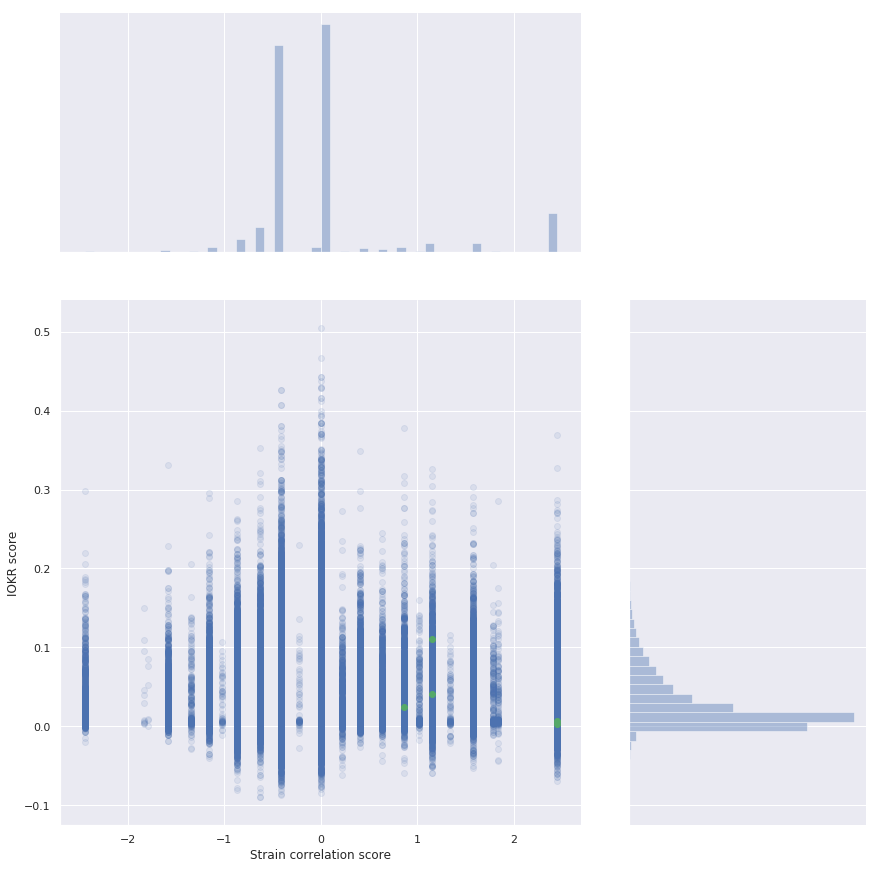

In [146]:
filename = '20200420_graph_combined_data_iokr_metcalf_gross'

plot = sns.jointplot([x[0] for x in all_score_pairs if x[1] != -100], [x[1] for x in all_score_pairs if x[1] != -100], alpha=0.1, ratio=2, height=12)
plot.ax_joint.plot([x[0] for x in verified_score_pairs if x[1] != -100], [x[1] for x in verified_score_pairs if x[1] != -100], 'ro', color='g')
plot.set_axis_labels('Strain correlation score', 'IOKR score')

data = (all_score_pairs, verified_score_pairs)

with open(filename + '.bin', 'wb') as f:
    pickle.dump(data, f)

plot.savefig(filename + '.png')

In [75]:
import matplotlib.gridspec as gridspec


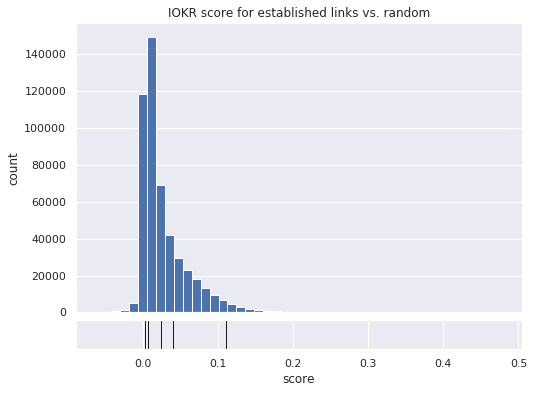

In [144]:
fig = plt.figure(figsize=(8, 6))

filename = '20200420_graph_iokr_paired_data_gross'

# ax_min = -0.15
ax_min = min(iokr_scores_all)
# ax_max = 0.35
ax_max = max(iokr_scores_all)

gs = gridspec.GridSpec(2, 1, height_ratios=[20, 2], hspace=0.05)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_title('IOKR score for established links vs. random')

ax1.hist(iokr_scores_all, bins=50, range=[ax_min, ax_max])

ax2.plot(iokr_scores_valid, [5000]*len(iokr_scores_valid), '|', color='k', markersize=50)
ax1.set_xlim([ax_min, ax_max])
ax2.set_xlim([ax_min, ax_max])
ax1.set_xticks([])
ax2.set_yticks([])

ax1.set_ylabel('count')
ax2.set_xlabel('score')

plt.tight_layout()

data = (iokr_scores_all, iokr_scores_valid)
with open(filename + '.bin', 'wb') as f:
    pickle.dump(data, f)

plt.savefig('20200420_graph_iokr_paired_data_gross.png')

In [133]:
metcalf_raw_all_scores = []
metcalf_raw_verified_scores = []

for i, gcf in enumerate(npl.gcfs):
    print("{} / {}".format(i, len(npl.gcfs)))
    
    for mf in npl.molfams:
        metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=False)
        
        metcalf_raw_all_scores.append(metcalf_score)
        for link_bgc, link_mf in verified_bgc_mf_links:
            if link_bgc in gcf.bgcs and link_mf == mf:
                print('add verified')
                metcalf_raw_verified_scores.append(metcalf_score)
                
metcalf_raw_all_scores = [x for x, y in zip(metcalf_raw_all_scores, all_score_pairs) if y[1] != -100]
metcalf_raw_verified_scores = [x for x, y in zip(metcalf_raw_verified_scores, verified_score_pairs) if y[1] != -100]

metcalf_raw_scores_all = metcalf_raw_all_scores
metcalf_raw_scores_valid = metcalf_raw_verified_scores


0 / 120
add verified
1 / 120
2 / 120
3 / 120
4 / 120
5 / 120
6 / 120
7 / 120
8 / 120
9 / 120
10 / 120
11 / 120
12 / 120
13 / 120
14 / 120
15 / 120
16 / 120
17 / 120
18 / 120
19 / 120
20 / 120
21 / 120
22 / 120
add verified
23 / 120
24 / 120
25 / 120
26 / 120
27 / 120
28 / 120
29 / 120
30 / 120
31 / 120
32 / 120
33 / 120
34 / 120
35 / 120
36 / 120
37 / 120
38 / 120
39 / 120
40 / 120
41 / 120
add verified
42 / 120
43 / 120
44 / 120
45 / 120
46 / 120
47 / 120
48 / 120
49 / 120
50 / 120
51 / 120
52 / 120
53 / 120
add verified
54 / 120
55 / 120
56 / 120
57 / 120
58 / 120
59 / 120
60 / 120
61 / 120
62 / 120
63 / 120
64 / 120
65 / 120
66 / 120
67 / 120
68 / 120
69 / 120
70 / 120
71 / 120
72 / 120
73 / 120
74 / 120
75 / 120
76 / 120
77 / 120
78 / 120
79 / 120
80 / 120
81 / 120
82 / 120
83 / 120
84 / 120
85 / 120
86 / 120
87 / 120
88 / 120
89 / 120
90 / 120
add verified
91 / 120
92 / 120
93 / 120
94 / 120
95 / 120
96 / 120
97 / 120
98 / 120
99 / 120
100 / 120
101 / 120
102 / 120
103 / 120
104 /

In [137]:
with open('20200420_gross_metcalf_iokr_verified.bin', 'wb') as f:
    pickle.dump((iokr_scores_all, 
                 iokr_scores_valid, 
                 metcalf_scores_all, 
                 metcalf_scores_valid, 
                 metcalf_raw_all_scores, 
                 metcalf_raw_verified_scores,
                 all_score_pairs,
                 verified_score_pairs), f)

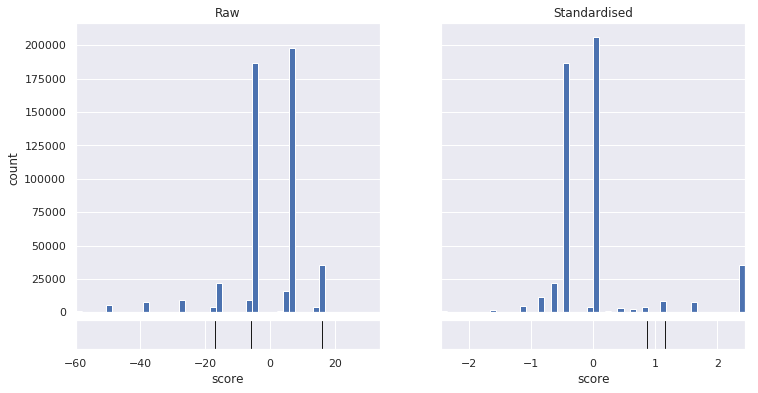

In [136]:
fig = plt.figure(figsize=(12, 6))

filename = '20200420_raw_vs_standardised_correlation_score_gross'

# ax_min = -0.15
raw_ax_min = min(metcalf_raw_scores_all)
# ax_max = 0.35
raw_ax_max = max(metcalf_raw_scores_all)

gs = gridspec.GridSpec(2, 2, height_ratios=[20, 2], hspace=0.05)
raw_hist = plt.subplot(gs[0])
raw_ticks = plt.subplot(gs[2])

raw_hist.set_title('Raw')

raw_hist.hist(metcalf_raw_all_scores, bins=50, range=[raw_ax_min, raw_ax_max])

raw_ticks.plot(metcalf_raw_verified_scores, [5000]*len(metcalf_raw_verified_scores), '|', color='k', markersize=50)
raw_hist.set_xlim([raw_ax_min, raw_ax_max])
raw_ticks.set_xlim([raw_ax_min, raw_ax_max])
raw_hist.set_xticks([])
raw_ticks.set_yticks([])

raw_hist.set_ylabel('count')
raw_ticks.set_xlabel('score')

# raw_hist.yaxis.tick_left()


# ax_min = -0.15
std_ax_min = min(metcalf_scores_all)
# ax_max = 0.35
std_ax_max = max(metcalf_scores_all)


std_hist = plt.subplot(gs[1])
std_ticks = plt.subplot(gs[3])

std_hist.set_title('Standardised')

std_hist.hist(metcalf_scores_all, bins=50, range=[std_ax_min, std_ax_max])

std_ticks.plot(metcalf_scores_valid, [5000]*len(metcalf_scores_valid), '|', color='k', markersize=50)
std_hist.set_xlim([std_ax_min, std_ax_max])
std_ticks.set_xlim([std_ax_min, std_ax_max])
std_hist.set_xticks([])
std_ticks.set_yticks([])

#ax1.set_yticks([])
#std_hist.yaxis.tick_right()
std_hist.set_yticklabels([])

# ax1.set_ylabel('count')
std_ticks.set_xlabel('score')

hist_max = max(std_hist.get_ylim()[1], raw_hist.get_ylim()[1])
std_hist.set_ylim(top=hist_max)
raw_hist.set_ylim(top=hist_max)


plt.tight_layout()

data = (metcalf_raw_all_scores, metcalf_raw_verified_scores, metcalf_scores_all, metcalf_scores_valid)
with open(filename + '.bin', 'wb') as f:
    pickle.dump(data, f)

plt.savefig(filename + '.png')

In [134]:

len(metcalf_scores_all)

501886

In [135]:
len(metcalf_raw_all_scores)

501886

In [140]:
verified_bgc_mf_links_labels = []
for bgc, kkb_hits in kkb_bgc_hits.items():
    for strain_id, mibig_id, molfam_id in established_links:
        if strain_id == bgc.strain.id or strain_id in bgc.strain.aliases:
            if mibig_id in [x[0] for x in kkb_hits if x[1] > 10000]:
                for molecular_family in npl.molfams:
                    if molecular_family.family_id == molfam_id:
                        verified_bgc_mf_links_labels.append(mibig_id)

In [141]:
scores_from_bgc = []
scores_from_bgc_idlist = []

for (valid_bgc, valid_mf), mibig_id in zip(verified_bgc_mf_links, verified_bgc_mf_links_labels):
    for gcf in npl.gcfs:
        if valid_bgc in gcf.bgcs:
            iokr_score_list = []
            metcalf_score_list = []
            raw_metcalf_score_list = []
            for mf in npl.molfams:
                iokr_score = get_iokr_score(mf, gcf)
                iokr_score_list.append(iokr_score)
                raw_metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=False)
                raw_metcalf_score_list.append(raw_metcalf_score)
                metcalf_score = misc.metcalf_scoring(mf, gcf, strains, standardised=True)
                metcalf_score_list.append(metcalf_score)
                if mf == valid_mf:
                    valid_iokr_score = iokr_score
                    valid_metcalf_score = metcalf_score
                    valid_raw_metcalf_score = raw_metcalf_score
            scores_from_bgc.append((
                (iokr_score_list, valid_iokr_score),
                (metcalf_score_list, valid_metcalf_score),
                (raw_metcalf_score_list, valid_raw_metcalf_score)
            ))
                
            scores_from_bgc_idlist.append((gcf, valid_bgc, mibig_id))

In [159]:
size_per_plot = 25.0 / 15
num_plots = 5

fig, axes = plt.subplots(nrows=num_plots, ncols=4, figsize=(9, num_plots * size_per_plot))

filename = '20200420_bgc_scores_gross'

#cols = ['IOKR', 'Standardised strain correlation', 'Raw strain correlation']
cols = ['Raw corr.', 'Std. corr.', 'IOKR', 'Corr. vs IOKR']
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for row_idx in range(len(scores_from_bgc)):
    gcf, bgc, mibig = scores_from_bgc_idlist[row_idx]
    axes[row_idx, 0].set_ylabel(mibig)


    initial_bgc = scores_from_bgc[row_idx]
    score_set_metcalf, actual_score_metcalf = initial_bgc[1]
    score_set_iokr, actual_score_iokr = initial_bgc[0]
    ax = axes[row_idx, 3]
    ax.scatter(score_set_metcalf, score_set_iokr, alpha=0.05)
    ax.scatter([actual_score_metcalf], [actual_score_iokr], color='r')
    ax.set_xticks([])
    ax.set_yticks([])
    
    max_ylim = 0
    min_ylim = 0
    for col_idx, (score_set, actual_score) in enumerate(initial_bgc):
        # invert col. order
        col_idx = 2 - col_idx
        ax = axes[row_idx, col_idx]
        ax.hist(score_set)
        ax.scatter([actual_score], [0], zorder=3, color='r')
        ax.set_xticks([])
        ax.set_yticks([])
        min_ylim = ax.get_ylim()[0]
        max_ylim = max(max_ylim, ax.get_ylim()[1])

    for col_idx, (score_set, actual_score) in enumerate(initial_bgc):
        ax = axes[row_idx, col_idx]
        ax.set_ylim(min_ylim, max_ylim)

fig.tight_layout()

plt.savefig(filename + '_all.png')

[autoreload of IPython.core.display failed: Traceback (most recent call last):
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    # If we've reached this point, we should try to reload the module
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 331, in update_generic
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 289, in update_class
    pass
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 331, in update_generic
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 265, in update_function
ValueError: __i

[autoreload of prompt_toolkit.key_binding.bindings.scroll failed: Traceback (most recent call last):
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    # If we've reached this point, we should try to reload the module
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module.__dict__['__name__'] = old_name
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/grimur/miniconda2/envs

[autoreload of prompt_toolkit.layout.containers failed: Traceback (most recent call last):
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    # If we've reached this point, we should try to reload the module
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module.__dict__['__name__'] = old_name
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/grimur/miniconda2/envs/jupyter-p

[autoreload of IPython.utils.generics failed: Traceback (most recent call last):
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    # If we've reached this point, we should try to reload the module
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 331, in update_generic
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 265, in update_function
ValueError: inspect_object() requires a code object with 2 free vars, not 4
]
[autoreload of IPython.terminal.ptutils failed: Traceback (most recent call last):
  File "/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    # If

AttributeError: 'ZMQInteractiveShell' object has no attribute 'transform_cell'